In [1]:
path = '/home/jln436/Internship_AUMC/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
#!pip install pandas
#!pip install pyreadstat
#!pip install --upgrade pytz

In [4]:
## Read in lists of individuals 
B_individuals = pd.read_csv(path + 'output/B_individuals.csv').respnr
C_individuals = pd.read_csv(path + 'output/C_individuals.csv').respnr
D_individuals = pd.read_csv(path + 'output/D_individuals.csv').respnr

In [5]:
def fix_na(df, na_col, x):
    df[na_col] = df[na_col].astype(str)
    for i in df.columns:
        if any(ele in list(df[na_col].astype(str).str.lower())[x] for ele in [i]):
            df[na_col][x] = df[i][x]

## LASA Variable 002
#### More detailed non-response 

In [ ]:
# Read in LASA 002 files
LASAB002 = pd.read_spss(path + "lasafiles/LASAB002.SAV")
LASAC002 = pd.read_spss(path + "lasafiles/LASAC002.SAV")
LASAD002 = pd.read_spss(path + "lasafiles/LASAD002.SAV")

In [ ]:
print(LASAB002.bresult.value_counts())
print(LASAC002.cresult.value_counts())
print(LASAD002.dresult.value_counts())

In [ ]:
LASAB002.drop(LASAB002[LASAB002.bresult != 'face to face interview'].index, inplace=True)
print(LASAB002.bresult.value_counts())
LASAC002.drop(LASAC002[LASAC002.cresult != 'Data present'].index, inplace=True)
print(LASAC002.cresult.value_counts())
LASAD002.drop(LASAD002[LASAD002.dresult != 'data'].index, inplace=True)
print(LASAD002.dresult.value_counts())

In [ ]:
LASAB002.reset_index(drop=True)
LASAC002.reset_index(drop=True)
LASAD002.reset_index(drop=True)
print()

In [ ]:
#### THIS DOESN"T REALLY MATTER BECAUSE IF THEY DON"T HAVE INFORMATION PROCESSING SPEED THEY WILL BE EXCLUDED ANYWAY ####
# List of individuals to include in the B Dataset
B_individuals_reported = LASAB002.respnr[LASAB002.respnr.isin(list(LASAC002.respnr))]

In [ ]:
# List of individuals to include in the C Dataset
C_individuals_reported = LASAC002.respnr[LASAC002.respnr.isin(list(LASAD002.respnr))]

In [ ]:
# List of individuals to include in the D Dataset
# This is just all of the individuals in D for now (don't remove any, all should be present in prior waves)

## Look at Information Processing Speed (Can only include individuals with those values):
#### LASA variable 155

In [ ]:
# Read in LASA 002 files
LASAB155 = pd.read_spss(path + "lasafiles/LASAB155.SAV")
LASAC155 = pd.read_spss(path + "lasafiles/LASAC155.SAV")
LASAD155 = pd.read_spss(path + "lasafiles/LASAD155.SAV")

In [ ]:
print(LASAB155.bmnotest.value_counts())
print(LASAC155.cmnotest.value_counts())
print(LASAD155.dmnotest.value_counts())

In [ ]:
# Only include individuals who have performed 3 trials
LASAB155.drop(LASAB155[LASAB155.bmnotest != '3 trials done'].index, inplace=True)
print(LASAB155.bmnotest.value_counts())
LASAC155.drop(LASAC155[LASAC155.cmnotest != '3 trials done'].index, inplace=True)
print(LASAC155.cmnotest.value_counts())
LASAD155.drop(LASAD155[LASAD155.dmnotest != '3 trials done'].index, inplace=True)
print(LASAD155.dmnotest.value_counts())

In [ ]:
# Create subset of C Dataset with values in B Wave (Some people were tested in the C wave, but not the B wave
LASAC155_trimmed = LASAC155[LASAC155.respnr.isin(list(LASAB155.respnr))]
C_individuals = LASAC155_trimmed.respnr

# Create subset of B Dataset with values in C Wave
LASAB155_trimmed = LASAB155[LASAB155.respnr.isin(list(LASAC155.respnr))]
B_individuals = LASAB155_trimmed.respnr

# Create subset of D Dataset with values in C Wave
LASAD155_trimmed = LASAD155[LASAD155.respnr.isin(list(LASAC155.respnr))]
D_individuals = LASAD155_trimmed.respnr

In [ ]:
# Remove unncessary variables (Same value for all individuals)
LASAB155_trimmed.drop(columns = ['bmcormis'], inplace = True)
LASAB155_trimmed.drop(columns = ['bmnotest'], inplace = True)
LASAC155_trimmed.drop(columns = ['cmcormis'], inplace = True)
LASAC155_trimmed.drop(columns = ['cmnotest'], inplace = True)
LASAD155_trimmed.drop(columns = ['dmcormis'], inplace = True)
LASAD155_trimmed.drop(columns = ['dmnotest'], inplace = True)

In [ ]:
## Dataset B
# Calculate Mean, Median, and SD score for the three trials
LASAB155_trimmed['bmcodt_mean'] = LASAB155_trimmed.loc[: , "bmcodt1":"bmcodt3"].mean(axis=1)
LASAB155_trimmed['bmcodt_median'] = LASAB155_trimmed.loc[: , "bmcodt1":"bmcodt3"].median(axis=1)
LASAB155_trimmed['bmcodt_std'] = LASAB155_trimmed.loc[: , "bmcodt1":"bmcodt3"].std(axis=1)

# Get mode of bmcodtp1-5 in order to simplify
LASAB155_trimmed['bmcodtp_mode'] = LASAB155_trimmed.loc[: , "bmcodtp1":"bmcodtp5"].mode(axis=1)
# Then Drop bmcodtp1:bmcodtp5
LASAB155_trimmed.drop(columns = ['bmcodtp1', 'bmcodtp2', 'bmcodtp3', 'bmcodtp4', 'bmcodtp5'], inplace = True)

## Dataset C
# Calculate Mean, Median, and SD score for the three trials
LASAC155_trimmed['cmcodt_mean'] = LASAC155_trimmed.loc[: , "cmcodt1":"cmcodt3"].mean(axis=1)
LASAC155_trimmed['cmcodt_median'] = LASAC155_trimmed.loc[: , "cmcodt1":"cmcodt3"].median(axis=1)
LASAC155_trimmed['cmcodt_std'] = LASAC155_trimmed.loc[: , "cmcodt1":"cmcodt3"].std(axis=1)

# Get mode of bmcodtp1-5 in order to simplify
LASAC155_trimmed['cmcodtp_mode'] = LASAC155_trimmed.loc[: , "cmcodtp1":"cmcodtp5"].mode(axis=1)
# Then Drop bmcodtp1:bmcodtp5
LASAC155_trimmed.drop(columns = ['cmcodtp1', 'cmcodtp2', 'cmcodtp3', 'cmcodtp4', 'cmcodtp5'], inplace = True)

## Dataset D
# Calculate Mean, Median, and SD score for the three trials
LASAD155_trimmed['dmcodt_mean'] = LASAD155_trimmed.loc[: , "dmcodt1":"dmcodt3"].mean(axis=1)
LASAD155_trimmed['dmcodt_median'] = LASAD155_trimmed.loc[: , "dmcodt1":"dmcodt3"].median(axis=1)
LASAD155_trimmed['dmcodt_std'] = LASAD155_trimmed.loc[: , "dmcodt1":"dmcodt3"].std(axis=1)

# Get mode of bmcodtp1-5 in order to simplify
LASAD155_trimmed['dmcodtp_mode'] = LASAD155_trimmed.loc[: , "dmcodtp1":"dmcodtp5"].mode(axis=1)
# Then Drop bmcodtp1:bmcodtp5
LASAD155_trimmed.drop(columns = ['dmcodtp1', 'dmcodtp2', 'dmcodtp3', 'dmcodtp4', 'dmcodtp5'], inplace = True)



In [ ]:
# Save files to output folder
LASAB155_trimmed.to_csv(path + 'output/LASAB155_trimmed.csv', index=False)
LASAC155_trimmed.to_csv(path + 'output/LASAC155_trimmed.csv', index=False)
LASAD155_trimmed.to_csv(path + 'output/LASAD155_trimmed.csv', index=False)
B_individuals.to_csv(path + 'output/B_individuals.csv', index = False)
C_individuals.to_csv(path + 'output/C_individuals.csv', index = False)
D_individuals.to_csv(path + 'output/D_individuals.csv', index = False)

In [6]:
LASAB155_trimmed=pd.read_csv(path + 'output/LASAB155_trimmed.csv')
LASAC155_trimmed=pd.read_csv(path + 'output/LASAC155_trimmed.csv')
target = LASAC155_trimmed['cmcodt_mean']

## LASA 011
#### Number of household members

In [ ]:
# Read in LASA 011 files
LASAB011 = pd.read_spss(path + "lasafiles/LASAB011.SAV")
LASAC011 = pd.read_spss(path + "lasafiles/LASAC011.SAV")
LASAD011 = pd.read_spss(path + "lasafiles/LASAD011.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB011_trimmed = LASAB011[LASAB011.respnr.isin(B_individuals)]
LASAB011_trimmed = LASAB011_trimmed.reset_index(drop = True)
# C
LASAC011_trimmed = LASAC011[LASAC011.respnr.isin(C_individuals)]
LASAC011_trimmed = LASAC011_trimmed.reset_index(drop = True)
# D
LASAD011_trimmed = LASAD011[LASAD011.respnr.isin(D_individuals)]
LASAD011_trimmed = LASAD011_trimmed.reset_index(drop = True)
print()

In [ ]:
# Convert None to 0
# Convert Na, not liv independently to Na
# Convert Na, wrong skip to Na
# Convert to Numeric
LASAB011_trimmed.replace('None', '0.0', inplace = True)
LASAB011_trimmed.replace('Na, not liv independently', 'Na', inplace = True)
LASAB011_trimmed.replace('Na, wrong skip', 'Na', inplace = True)

LASAB011_trimmed.bnupers = pd.to_numeric(LASAB011_trimmed['bnupers'], errors = 'coerce')

LASAC011_trimmed.replace('None', '0.0', inplace = True)
LASAC011_trimmed.replace('Na, see CHINDEP', 'Na', inplace = True)
LASAC011_trimmed.replace('Na, wrong skip', 'Na', inplace = True)
LASAC011_trimmed.replace('Na, asked', 'Na', inplace = True)

LASAC011_trimmed.cnupers = pd.to_numeric(LASAC011_trimmed['cnupers'], errors = 'coerce')

LASAD011_trimmed.replace('None', '0.0', inplace = True)
LASAD011_trimmed.replace('Na, see DHINDEP', 'Na', inplace = True)

LASAD011_trimmed.dnupers = pd.to_numeric(LASAD011_trimmed['dnupers'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB011_trimmed.to_csv(path + 'output/LASAB011_trimmed.csv', index=False)
LASAC011_trimmed.to_csv(path + 'output/LASAC011_trimmed.csv', index=False)
LASAD011_trimmed.to_csv(path + 'output/LASAD011_trimmed.csv', index=False)

## LASA 012
#### Pets in household

In [ ]:
# Read in LASA 012 files
LASAB012 = pd.read_spss(path + "lasafiles/LASAB012.SAV")
LASAC012 = pd.read_spss(path + "lasafiles/LASAC012.SAV")
LASAD012 = pd.read_spss(path + "lasafiles/LASAD012.SAV")

In [ ]:
# Rename differently named columns in C and D
LASAC012.rename(columns = {'cpetothe':'cpetsoth'}, inplace = True)
LASAD012.rename(columns = {'dpetothe':'dpetsoth'}, inplace = True)

In [ ]:
# Select appropriate individuals
# B
LASAB012_trimmed = LASAB012[LASAB012.respnr.isin(B_individuals)]
LASAB012_trimmed = LASAB012_trimmed.reset_index(drop = True)
# C
LASAC012_trimmed = LASAC012[LASAC012.respnr.isin(C_individuals)]
LASAC012_trimmed = LASAC012_trimmed.reset_index(drop = True)
# D
LASAD012_trimmed = LASAD012[LASAD012.respnr.isin(D_individuals)]
LASAD012_trimmed = LASAD012_trimmed.reset_index(drop = True)
print()

In [ ]:
# For B
# Replace NA string with NA value
LASAB012_trimmed['bnspecie'] = LASAB012_trimmed['bnspecie'].replace('Na, see BPETS', np.NaN)
# Convert to numeric
LASAB012_trimmed.bnspecie = pd.to_numeric(LASAB012_trimmed['bnspecie'])

# For C
# Replace NA string with NA value
LASAC012_trimmed['cnspecie'] = LASAC012_trimmed['cnspecie'].replace('Na, see CPETS', np.NaN)
# Convert to numeric
LASAC012_trimmed.cnspecie = pd.to_numeric(LASAC012_trimmed['cnspecie'])

# For D
# Replace NA string with NA value
LASAD012_trimmed['dnspecie'] = LASAD012_trimmed['dnspecie'].replace('Na, see dpets', np.NaN)
# Convert to numeric
LASAD012_trimmed.dnspecie = pd.to_numeric(LASAD012_trimmed['dnspecie'])

In [ ]:
# For B
# If bpets is No replcae values in other columns with not mentioned or 0.0
LASAB012_trimmed.loc[LASAB012_trimmed['bpets'] == 'No', ['bcat', 'bdog', 'bbird', 'bpetsoth']] = 'not mentioned'
LASAB012_trimmed.loc[LASAB012_trimmed['bpets'] == 'No', 'bnspecie'] = 0

# For C
# If bpets is No replcae values in other columns with not mentioned or 0.0
LASAC012_trimmed.loc[LASAC012_trimmed['cpets'] == 'No', ['ccat', 'cdog', 'cbird', 'cpetsoth']] = 'not mentioned'
LASAC012_trimmed.loc[LASAC012_trimmed['cpets'] == 'No', 'cnspecie'] = 0

# For D
# If bpets is No replcae values in other columns with not mentioned or 0.0
LASAD012_trimmed.loc[LASAD012_trimmed['dpets'] == 'No', ['dcat', 'ddog', 'dbird', 'dpetsoth']] = 'not mentioned'
LASAD012_trimmed.loc[LASAD012_trimmed['dpets'] == 'No', 'dnspecie'] = 0


In [ ]:
for na_col in LASAB012_trimmed.columns:
    for x in range(len(LASAB012_trimmed)):
        fix_na(LASAB012_trimmed, na_col, x)
for na_col in LASAC012_trimmed.columns:
    for x in range(len(LASAC012_trimmed)):
        fix_na(LASAC012_trimmed, na_col, x)
for na_col in LASAD012_trimmed.columns:
    for x in range(len(LASAD012_trimmed)):
        fix_na(LASAD012_trimmed, na_col, x)

In [ ]:
# Convert None to 0
# Convert Na, not liv independently to Na
# Convert Na, wrong skip to Na
# Convert to Numeric
LASAB012_trimmed.replace('not mentioned', '0.0', inplace = True)
LASAB012_trimmed.replace('No', '0.0', inplace = True)
LASAB012_trimmed.replace('Yes', '1.0', inplace = True)
LASAB012_trimmed.replace('mentioned', '1.0', inplace = True)
LASAB012_trimmed.replace('Na, short version', 'Na', inplace = True)
LASAB012_trimmed.bpets = pd.to_numeric(LASAB012_trimmed['bpets'], errors = 'coerce')
LASAB012_trimmed.bcat = pd.to_numeric(LASAB012_trimmed['bcat'], errors = 'coerce')
LASAB012_trimmed.bdog = pd.to_numeric(LASAB012_trimmed['bdog'], errors = 'coerce')
LASAB012_trimmed.bbird = pd.to_numeric(LASAB012_trimmed['bbird'], errors = 'coerce')
LASAB012_trimmed.bpetsoth = pd.to_numeric(LASAB012_trimmed['bpetsoth'], errors = 'coerce')

LASAC012_trimmed.replace('not mentioned', '0.0', inplace = True)
LASAC012_trimmed.replace('No', '0.0', inplace = True)
LASAC012_trimmed.replace('Yes', '1.0', inplace = True)
LASAC012_trimmed.replace('mentioned', '1.0', inplace = True)
LASAC012_trimmed.replace('Na, short version', 'Na', inplace = True)
LASAC012_trimmed.cpets = pd.to_numeric(LASAC012_trimmed['cpets'], errors = 'coerce')
LASAC012_trimmed.ccat = pd.to_numeric(LASAC012_trimmed['ccat'], errors = 'coerce')
LASAC012_trimmed.cdog = pd.to_numeric(LASAC012_trimmed['cdog'], errors = 'coerce')
LASAC012_trimmed.cbird = pd.to_numeric(LASAC012_trimmed['cbird'], errors = 'coerce')
LASAC012_trimmed.cpetsoth = pd.to_numeric(LASAC012_trimmed['cpetsoth'], errors = 'coerce')

LASAD012_trimmed.replace('not mentioned', '0.0', inplace = True)
LASAD012_trimmed.replace('No', '0.0', inplace = True)
LASAD012_trimmed.replace('Yes', '1.0', inplace = True)
LASAD012_trimmed.replace('mentioned', '1.0', inplace = True)
LASAD012_trimmed.replace('Na, short version', 'Na', inplace = True)
LASAD012_trimmed.dpets = pd.to_numeric(LASAD012_trimmed['dpets'], errors = 'coerce')
LASAD012_trimmed.dcat = pd.to_numeric(LASAD012_trimmed['dcat'], errors = 'coerce')
LASAD012_trimmed.ddog = pd.to_numeric(LASAD012_trimmed['ddog'], errors = 'coerce')
LASAD012_trimmed.dbird = pd.to_numeric(LASAD012_trimmed['dbird'], errors = 'coerce')
LASAD012_trimmed.dpetsoth = pd.to_numeric(LASAD012_trimmed['dpetsoth'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB012_trimmed.to_csv(path + 'output/LASAB012_trimmed.csv', index=False)
LASAC012_trimmed.to_csv(path + 'output/LASAC012_trimmed.csv', index=False)
LASAD012_trimmed.to_csv(path + 'output/LASAD012_trimmed.csv', index=False)

## LASA 013
#### Residence in 1944

In [ ]:
# Read in LASA 002 files
LASAB013 = pd.read_spss(path + "lasafiles/LASAB013.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB013_trimmed = LASAB013[LASAB013.respnr.isin(B_individuals)]
LASAB013_trimmed = LASAB013_trimmed.reset_index(drop = True)

In [ ]:
# Convert bremarks to numeric and for remarks add one otherwise 0
LASAB013_trimmed['bremarks'] = np.where(LASAB013_trimmed['bremarks'] == 'No remarks', '0.0', '1.0')
LASAB013_trimmed.bremarks = pd.to_numeric(LASAB013_trimmed['bremarks'], errors = 'coerce')

In [ ]:
# Convert country to two features bcountry_holland and bcountry_other
LASAB013_trimmed['bcountry_holland'] = (LASAB013_trimmed.bcountry == 'HOLLAND').astype(int)
LASAB013_trimmed['bcountry_other'] = (LASAB013_trimmed.bcountry != 'HOLLAND').astype(int)
LASAB013_trimmed.drop(columns = 'bcountry', inplace = True)

# Convert province to two features bprovince_noord_holland and bprovince_other
LASAB013_trimmed['bprovince_noord_holland'] = (LASAB013_trimmed.bprovinc == 'NOORD HOLLAND').astype(int)
LASAB013_trimmed['bprovince_other'] = (LASAB013_trimmed.bprovinc != 'NOORD HOLLAND').astype(int)
LASAB013_trimmed.drop(columns = 'bprovinc', inplace = True)

# Drop bcity
LASAB013_trimmed.drop(columns = 'bcity', inplace = True)

In [ ]:
# Save files to output folder
LASAB013_trimmed.to_csv(path + 'output/LASAB013_trimmed.csv', index=False)

## LASA 014
#### Relocation


#### I have no idea what's going on here

In [6]:
# Read in LASA 012 files
LASAB014 = pd.read_spss(path + "lasafiles/LASAB014.SAV")
LASAC014 = pd.read_spss(path + "lasafiles/LASAC014.SAV")
LASAD014 = pd.read_spss(path + "lasafiles/LASAD014.SAV")
# Select appropriate individuals
# B
LASAB014_trimmed = LASAB014[LASAB014.respnr.isin(B_individuals)]
LASAB014_trimmed = LASAB014_trimmed.reset_index(drop = True)
# C
LASAC014_trimmed = LASAC014[LASAC014.respnr.isin(C_individuals)]
LASAC014_trimmed = LASAC014_trimmed.reset_index(drop = True)
# D
LASAD014_trimmed = LASAD014[LASAD014.respnr.isin(D_individuals)]
LASAD014_trimmed = LASAD014_trimmed.reset_index(drop = True)
print()

In [7]:
# Select features present in all of the waves
a = np.intersect1d(LASAB014_trimmed.columns.str[1:], LASAC014_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD014_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB014_trimmed = LASAB014_trimmed[b_cols]
LASAC014_trimmed = LASAC014_trimmed[c_cols]
LASAD014_trimmed = LASAD014_trimmed[d_cols]

In [8]:
# Remove all bspec except bspecadj
LASAB014_trimmed.drop(columns = ['bspec01', 'bspec02', 'bspec03', 'bspec04', 'bspec05', 'bspec06', 'bspec07', 'bspec08', 'bspec09', 
                                 'bspec10', 'bspec11', 'bspec12', 'bspec13', 'bspec14', 'bspec15', 'bspec16', 'bspec17'], inplace = True)

LASAC014_trimmed.drop(columns = ['cspec01', 'cspec02', 'cspec03', 'cspec04', 'cspec05', 'cspec06', 'cspec07', 'cspec08', 'cspec09', 
                                 'cspec10', 'cspec11', 'cspec12', 'cspec13', 'cspec14', 'cspec15', 'cspec16', 'cspec17'], inplace = True)

LASAD014_trimmed.drop(columns = ['dspec01', 'dspec02', 'dspec03', 'dspec04', 'dspec05', 'dspec06', 'dspec07', 'dspec08', 'dspec09', 
                                 'dspec10', 'dspec11', 'dspec12', 'dspec13', 'dspec14', 'dspec15', 'dspec16', 'dspec17'], inplace = True)

In [10]:
for na_col in LASAB014_trimmed.columns:
    for x in range(len(LASAB014_trimmed)):
        fix_na(LASAB014_trimmed, na_col, x)
for na_col in LASAC014_trimmed.columns:
    for x in range(len(LASAC014_trimmed)):
        fix_na(LASAC014_trimmed, na_col, x)
for na_col in LASAD014_trimmed.columns:
    for x in range(len(LASAD014_trimmed)):
        fix_na(LASAD014_trimmed, na_col, x)

/tmp/ipykernel_3426601/2931094667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[na_col][x] = df[i][x]


In [11]:
# Convert bhindep to bhindependent and bhdependent, then remove bhindep 
LASAB014_trimmed['bhindependent'] = (LASAB014_trimmed.bhindep == 'Independent').astype(int)
LASAB014_trimmed['bhdependent'] = (LASAB014_trimmed.bhindep != 'Independent').astype(int)
LASAB014_trimmed.drop(columns = 'bhindep', inplace = True)

LASAC014_trimmed['chindependent'] = (LASAC014_trimmed.chindep == 'Independent').astype(int)
LASAC014_trimmed['chdependent'] = (LASAC014_trimmed.chindep != 'Independent').astype(int)
LASAC014_trimmed.drop(columns = 'chindep', inplace = True)

LASAD014_trimmed['dhindependent'] = (LASAD014_trimmed.dhindep == 'Independent').astype(int)
LASAD014_trimmed['dhdependent'] = (LASAD014_trimmed.dhindep != 'Independent').astype(int)
LASAD014_trimmed.drop(columns = 'dhindep', inplace = True)

In [12]:
# Remove bmomonth and bmoyear and bhousem and brfdoor
LASAB014_trimmed.drop(columns = ['bmomonth', 'bmoyear', 'bhousem', 'bhousem'], inplace = True)
LASAC014_trimmed.drop(columns = ['cmomonth', 'cmoyear', 'chousem', 'chousem'], inplace = True)
LASAD014_trimmed.drop(columns = ['dmomonth', 'dmoyear', 'dhousem', 'dhousem'], inplace = True)

In [13]:
# Convert all No to 0.0, Yes to 1.0, other to Na,
LASAB014_trimmed.replace('Na, short version', 'Na', inplace = True)
LASAB014_trimmed.replace('Residential home', 'Na', inplace = True)
LASAB014_trimmed.replace('Nursing h-somatic', 'Na', inplace = True)
LASAB014_trimmed.replace('institution', 'Na', inplace = True)
LASAB014_trimmed.replace('unknown', 'Na', inplace = True)
LASAB014_trimmed.replace('monastery', 'Na', inplace = True)
LASAB014_trimmed.replace('No', '0.0', inplace = True)
LASAB014_trimmed.replace('Yes', '1.0', inplace = True)
LASAB014_trimmed.blrooms = pd.to_numeric(LASAB014_trimmed['blrooms'], errors = 'coerce')
LASAB014_trimmed.bnrooms = pd.to_numeric(LASAB014_trimmed['bnrooms'], errors = 'coerce')
LASAB014_trimmed.bnroomsc = pd.to_numeric(LASAB014_trimmed['bnroomsc'], errors = 'coerce')
LASAB014_trimmed.bmoved = pd.to_numeric(LASAB014_trimmed['bmoved'], errors = 'coerce')
LASAB014_trimmed.bspecadj = pd.to_numeric(LASAB014_trimmed['bspecadj'], errors = 'coerce')

# Convert all No to 0.0, Yes to 1.0, other to Na,
LASAC014_trimmed.replace('Na, short version', 'Na', inplace = True)
LASAC014_trimmed.replace('Residential home', 'Na', inplace = True)
LASAC014_trimmed.replace('Nursing h-somatic', 'Na', inplace = True)
LASAC014_trimmed.replace('institution', 'Na', inplace = True)
LASAC014_trimmed.replace('unknown', 'Na', inplace = True)
LASAC014_trimmed.replace('monastery', 'Na', inplace = True)
LASAC014_trimmed.replace('No', '0.0', inplace = True)
LASAC014_trimmed.replace('Yes', '1.0', inplace = True)
LASAC014_trimmed.clrooms = pd.to_numeric(LASAC014_trimmed['clrooms'], errors = 'coerce')
LASAC014_trimmed.cnrooms = pd.to_numeric(LASAC014_trimmed['cnrooms'], errors = 'coerce')
LASAC014_trimmed.cnroomsc = pd.to_numeric(LASAC014_trimmed['cnroomsc'], errors = 'coerce')
LASAC014_trimmed.cmoved = pd.to_numeric(LASAC014_trimmed['cmoved'], errors = 'coerce')
LASAC014_trimmed.cspecadj = pd.to_numeric(LASAC014_trimmed['cspecadj'], errors = 'coerce')

# Convert all No to 0.0, Yes to 1.0, other to Na,
LASAD014_trimmed.replace('Na, short version', 'Na', inplace = True)
LASAD014_trimmed.replace('Residential home', 'Na', inplace = True)
LASAD014_trimmed.replace('Nursing h-somatic', 'Na', inplace = True)
LASAD014_trimmed.replace('institution', 'Na', inplace = True)
LASAD014_trimmed.replace('unknown', 'Na', inplace = True)
LASAD014_trimmed.replace('monastery', 'Na', inplace = True)
LASAD014_trimmed.replace('No', '0.0', inplace = True)
LASAD014_trimmed.replace('Yes', '1.0', inplace = True)
LASAD014_trimmed.dlrooms = pd.to_numeric(LASAD014_trimmed['dlrooms'], errors = 'coerce')
LASAD014_trimmed.dnrooms = pd.to_numeric(LASAD014_trimmed['dnrooms'], errors = 'coerce')
LASAD014_trimmed.dnroomsc = pd.to_numeric(LASAD014_trimmed['dnroomsc'], errors = 'coerce')
LASAD014_trimmed.dmoved = pd.to_numeric(LASAD014_trimmed['dmoved'], errors = 'coerce')
LASAD014_trimmed.dspecadj = pd.to_numeric(LASAD014_trimmed['dspecadj'], errors = 'coerce')


In [14]:
# Convert house-type to 4 one-hot encoded features (4 most common (combining high rise) + other)
LASAB014_trimmed['bhtype_attached_row'] = (LASAB014_trimmed.bhoustyp == 'attached row').astype(int)
LASAB014_trimmed['bhtype_detached'] = (LASAB014_trimmed.bhoustyp == 'detached').astype(int)
LASAB014_trimmed['bhtype_semidetached'] = (LASAB014_trimmed.bhoustyp == 'semi-detached').astype(int)
LASAB014_trimmed['bhtype_high_rise'] = (LASAB014_trimmed.bhoustyp == 'high rise (elevator)').astype(int) + (LASAB014_trimmed.bhoustyp == 'high rise (no elevator)').astype(int)
LASAB014_trimmed['bhtype_missing'] = (LASAB014_trimmed.bhoustyp == 'Na').astype(int)
LASAB014_trimmed['bhtype_other'] = 1-(LASAB014_trimmed['bhtype_attached_row']+LASAB014_trimmed['bhtype_detached']+LASAB014_trimmed['bhtype_semidetached']+LASAB014_trimmed['bhtype_high_rise']+LASAB014_trimmed['bhtype_missing'])


LASAB014_trimmed.drop(columns = 'bhoustyp', inplace = True)

LASAC014_trimmed['chtype_attached_row'] = (LASAC014_trimmed.choustyp == 'attached row').astype(int)
LASAC014_trimmed['chtype_detached'] = (LASAC014_trimmed.choustyp == 'detached').astype(int)
LASAC014_trimmed['chtype_semidetached'] = (LASAC014_trimmed.choustyp == 'semi-detached').astype(int)
LASAC014_trimmed['chtype_high_rise'] = (LASAC014_trimmed.choustyp == 'high rise (elevator)').astype(int) + (LASAC014_trimmed.choustyp == 'high rise (no elevator)').astype(int)
LASAC014_trimmed['chtype_missing'] = (LASAC014_trimmed.choustyp == 'Na').astype(int)
LASAC014_trimmed['chtype_other'] = 1-(LASAC014_trimmed['chtype_attached_row']+LASAC014_trimmed['chtype_detached']+LASAC014_trimmed['chtype_semidetached']+LASAC014_trimmed['chtype_high_rise']+LASAC014_trimmed['chtype_missing'])


LASAC014_trimmed.drop(columns = 'choustyp', inplace = True)

LASAD014_trimmed['dhtype_attached_row'] = (LASAD014_trimmed.dhoustyp == 'attached row').astype(int)
LASAD014_trimmed['dhtype_detached'] = (LASAD014_trimmed.dhoustyp == 'detached').astype(int)
LASAD014_trimmed['dhtype_semidetached'] = (LASAD014_trimmed.dhoustyp == 'semi-detached').astype(int)
LASAD014_trimmed['dhtype_high_rise'] = (LASAD014_trimmed.dhoustyp == 'high rise (elevator)').astype(int) + (LASAD014_trimmed.dhoustyp == 'high rise (no elevator)').astype(int)
LASAD014_trimmed['dhtype_missing'] = (LASAD014_trimmed.dhoustyp == 'Na').astype(int)
LASAD014_trimmed['dhtype_other'] = 1-(LASAD014_trimmed['dhtype_attached_row']+LASAD014_trimmed['dhtype_detached']+LASAD014_trimmed['dhtype_semidetached']+LASAD014_trimmed['dhtype_high_rise']+LASAD014_trimmed['dhtype_missing'])


LASAD014_trimmed.drop(columns = 'dhoustyp', inplace = True)

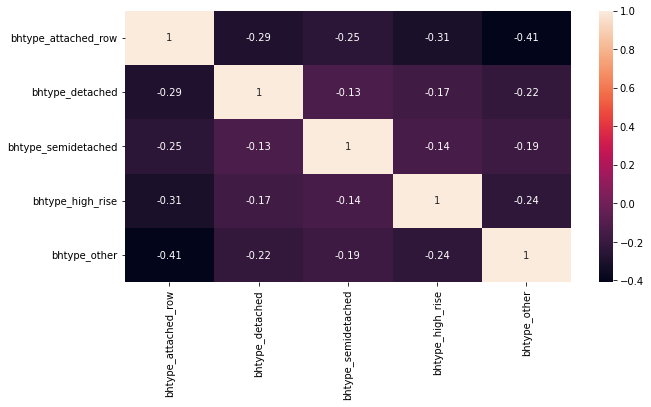

In [15]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAB014_trimmed[['bhtype_attached_row','bhtype_detached','bhtype_semidetached','bhtype_high_rise','bhtype_other']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [18]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAB014_trimmed.bhtype_attached_row))
print(target.corr(LASAB014_trimmed.bhtype_other))

0.04033649011895222
-0.11199979708666911


In [19]:
# Drop bhtype_attached_row
LASAB014_trimmed.drop(columns = 'bhtype_attached_row', inplace = True)
LASAC014_trimmed.drop(columns = 'chtype_attached_row', inplace = True)
LASAD014_trimmed.drop(columns = 'dhtype_attached_row', inplace = True)

In [20]:
# Convert bsatis to numeric
LASAB014_trimmed.replace('dissatisfied', '1.0', inplace = True)
LASAB014_trimmed.replace('not satisfied/dissatisfy', '2.0', inplace = True)
LASAB014_trimmed.replace('satisfied', '3.0', inplace = True)
LASAB014_trimmed.bsatis = pd.to_numeric(LASAB014_trimmed['bsatis'], errors = 'coerce')

LASAC014_trimmed.replace('dissatisfied', '1.0', inplace = True)
LASAC014_trimmed.replace('not satisfied/dissatisfy', '2.0', inplace = True)
LASAC014_trimmed.replace('satisfied', '3.0', inplace = True)
LASAC014_trimmed.csatis = pd.to_numeric(LASAC014_trimmed['csatis'], errors = 'coerce')

LASAD014_trimmed.replace('dissatisfied', '1.0', inplace = True)
LASAD014_trimmed.replace('not satisfied/dissatisfy', '2.0', inplace = True)
LASAD014_trimmed.replace('satisfied', '3.0', inplace = True)
LASAD014_trimmed.dsatis = pd.to_numeric(LASAD014_trimmed['dsatis'], errors = 'coerce')

In [21]:
for i in LASAB014_trimmed.columns:
    LASAB014_trimmed[i] = pd.to_numeric(LASAB014_trimmed[i], errors = 'coerce')
for i in LASAC014_trimmed.columns:
    LASAC014_trimmed[i] = pd.to_numeric(LASAC014_trimmed[i], errors = 'coerce')
for i in LASAD014_trimmed.columns:
    LASAD014_trimmed[i] = pd.to_numeric(LASAD014_trimmed[i], errors = 'coerce')

In [22]:
# Save files to output folder
LASAB014_trimmed.to_csv(path + 'output/LASAB014_trimmed.csv', index=False)
LASAC014_trimmed.to_csv(path + 'output/LASAC014_trimmed.csv', index=False)
LASAD014_trimmed.to_csv(path + 'output/LASAD014_trimmed.csv', index=False)

## LASA 015
#### More relocation

In [23]:
# Read in LASA 012 files
LASAB015 = pd.read_spss(path + "lasafiles/LASAB015.SAV")
LASAC015 = pd.read_spss(path + "lasafiles/LASAC015.SAV")
LASAD015 = pd.read_spss(path + "lasafiles/LASAD015.SAV")

In [24]:
# Select appropriate individuals
# B
LASAB015_trimmed = LASAB015[LASAB015.respnr.isin(B_individuals)]
LASAB015_trimmed = LASAB015_trimmed.reset_index(drop = True)
# C
LASAC015_trimmed = LASAC015[LASAC015.respnr.isin(C_individuals)]
LASAC015_trimmed = LASAC015_trimmed.reset_index(drop = True)
# D
LASAD015_trimmed = LASAD015[LASAD015.respnr.isin(D_individuals)]
LASAD015_trimmed = LASAD015_trimmed.reset_index(drop = True)
print()

In [25]:
# One-hot encode bhowner to tenant, owner and other
LASAB015_trimmed['bhowner_own'] = (LASAB015_trimmed.bhowner == 'owner').astype(int)
LASAB015_trimmed['bhowner_tenant'] = (LASAB015_trimmed.bhowner == 'tenant').astype(int)
LASAB015_trimmed['bhowner_missing'] = (LASAB015_trimmed.bhowner == 'Na, routing').astype(int) + (LASAB015_trimmed.bhowner == 'Na, wrong skip').astype(int)
LASAB015_trimmed['bhowner_other'] = 1-(LASAB015_trimmed['bhowner_own']+LASAB015_trimmed['bhowner_tenant']+LASAB015_trimmed['bhowner_missing'])
LASAB015_trimmed.drop(columns = 'bhowner', inplace = True)

LASAC015_trimmed['chowner_own'] = (LASAC015_trimmed.chowner == 'owner').astype(int)
LASAC015_trimmed['chowner_tenant'] = (LASAC015_trimmed.chowner == 'tenant').astype(int)
LASAC015_trimmed['chowner_missing'] = (LASAC015_trimmed.chowner == 'Na, wrong skip').astype(int) + (LASAC015_trimmed.chowner == 'Na, see CHINDEP').astype(int)
LASAC015_trimmed['chowner_other'] = 1-(LASAC015_trimmed['chowner_own']+LASAC015_trimmed['chowner_tenant']+LASAC015_trimmed['chowner_missing'])
LASAC015_trimmed.drop(columns = 'chowner', inplace = True)

LASAD015_trimmed['dhowner_own'] = (LASAD015_trimmed.dhowner == 'owner').astype(int)
LASAD015_trimmed['dhowner_tenant'] = (LASAD015_trimmed.dhowner == 'tenant').astype(int)
LASAD015_trimmed['dhowner_missing'] = (LASAD015_trimmed.dhowner == 'Na, see DHINDEP').astype(int)
LASAD015_trimmed['dhowner_other'] = 1-(LASAD015_trimmed['dhowner_own']+LASAD015_trimmed['dhowner_tenant']+LASAD015_trimmed['dhowner_missing'])
LASAD015_trimmed.drop(columns = 'dhowner', inplace = True)

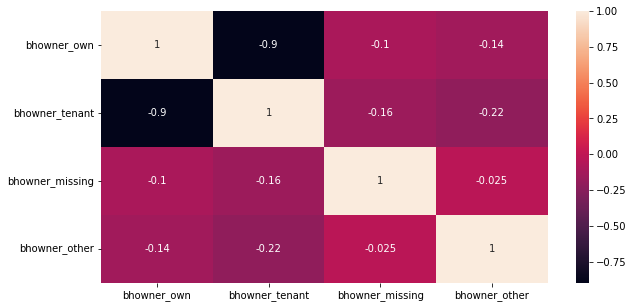

In [26]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAB015_trimmed[['bhowner_own','bhowner_tenant','bhowner_missing','bhowner_other']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [27]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAB015_trimmed.bhowner_own))
print(target.corr(LASAB015_trimmed.bhowner_tenant))

0.13929082382841082
-0.06677419035764136


In [28]:
# Drop bhowner_tenant
LASAB015_trimmed.drop(columns = 'bhowner_tenant', inplace = True)
LASAC015_trimmed.drop(columns = 'chowner_tenant', inplace = True)
LASAD015_trimmed.drop(columns = 'dhowner_tenant', inplace = True)

In [29]:
# Convert no mortgage to 0 and mortgage to 1 all others to Na,
LASAB015_trimmed.replace('no mortgage', '0.0', inplace = True)
LASAB015_trimmed.replace('mortgage', '1.0', inplace = True)
LASAB015_trimmed.bmortga = pd.to_numeric(LASAB015_trimmed['bmortga'], errors = 'coerce')

LASAC015_trimmed.replace('no mortgage', '0.0', inplace = True)
LASAC015_trimmed.replace('mortgage', '1.0', inplace = True)
LASAC015_trimmed.cmortga = pd.to_numeric(LASAC015_trimmed['cmortga'], errors = 'coerce')

LASAD015_trimmed.replace('no mortgage', '0.0', inplace = True)
LASAD015_trimmed.replace('mortgage', '1.0', inplace = True)
LASAD015_trimmed.dmortga = pd.to_numeric(LASAD015_trimmed['dmortga'], errors = 'coerce')

In [30]:
# Convert No to 0 and yes to 1 than convert columns to numeric
LASAB015_trimmed.replace('No', '0.0', inplace = True)
LASAB015_trimmed.replace('Yes', '1.0', inplace = True)

LASAB015_trimmed.bmovefut = pd.to_numeric(LASAB015_trimmed['bmovefut'], errors = 'coerce')
LASAB015_trimmed.bpleas = pd.to_numeric(LASAB015_trimmed['bpleas'], errors = 'coerce')
LASAB015_trimmed.bsafe = pd.to_numeric(LASAB015_trimmed['bsafe'], errors = 'coerce')
LASAB015_trimmed.byneigh = pd.to_numeric(LASAB015_trimmed['byneigh'], errors = 'coerce')

LASAC015_trimmed.replace('No', '0.0', inplace = True)
LASAC015_trimmed.replace('Yes', '1.0', inplace = True)

LASAC015_trimmed.cmovefut = pd.to_numeric(LASAC015_trimmed['cmovefut'], errors = 'coerce')
LASAC015_trimmed.cpleas = pd.to_numeric(LASAC015_trimmed['cpleas'], errors = 'coerce')
LASAC015_trimmed.csafe = pd.to_numeric(LASAC015_trimmed['csafe'], errors = 'coerce')
LASAC015_trimmed.cyneigh = pd.to_numeric(LASAC015_trimmed['cyneigh'], errors = 'coerce')

LASAB015_trimmed.replace('No', '0.0', inplace = True)
LASAB015_trimmed.replace('Yes', '1.0', inplace = True)

LASAD015_trimmed.dmovefut = pd.to_numeric(LASAD015_trimmed['dmovefut'], errors = 'coerce')
LASAD015_trimmed.dpleas = pd.to_numeric(LASAD015_trimmed['dpleas'], errors = 'coerce')
LASAD015_trimmed.dsafe = pd.to_numeric(LASAD015_trimmed['dsafe'], errors = 'coerce')
LASAD015_trimmed.dyneigh = pd.to_numeric(LASAD015_trimmed['dyneigh'], errors = 'coerce')

In [31]:
# Save files to output folder
LASAB015_trimmed.to_csv(path + 'output/LASAB015_trimmed.csv', index=False)
LASAC015_trimmed.to_csv(path + 'output/LASAC015_trimmed.csv', index=False)
LASAD015_trimmed.to_csv(path + 'output/LASAD015_trimmed.csv', index=False)

## LASA 016
#### Occupation

In [ ]:
# Read in LASA 016 files
LASAB016 = pd.read_spss(path + "lasafiles/LASAB016.SAV")
LASAC016 = pd.read_spss(path + "lasafiles/LASAC016.SAV")
LASAD016 = pd.read_spss(path + "lasafiles/LASAD016.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB016_trimmed = LASAB016[LASAB016.respnr.isin(B_individuals)]
LASAB016_trimmed = LASAB016_trimmed.reset_index(drop = True)
# C
LASAC016_trimmed = LASAC016[LASAC016.respnr.isin(C_individuals)]
LASAC016_trimmed = LASAC016_trimmed.reset_index(drop = True)
# D
LASAD016_trimmed = LASAD016[LASAD016.respnr.isin(D_individuals)]
LASAD016_trimmed = LASAD016_trimmed.reset_index(drop = True)
print()

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB016_trimmed.columns.str[1:], LASAC016_trimmed.columns.str[1:])
#print(a)
b = np.intersect1d(a, LASAD016_trimmed.columns.str[1:])
b = b.tolist()
b.remove('espnr')
b = np.array(b)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB016_trimmed = LASAB016_trimmed[b_cols]
LASAC016_trimmed = LASAC016_trimmed[c_cols]
LASAD016_trimmed = LASAD016_trimmed[d_cols]

In [ ]:
LASAB016_trimmed

In [ ]:
for na_col in LASAB016_trimmed.columns:
    for x in range(len(LASAB016_trimmed)):
        fix_na(LASAB016_trimmed, na_col, x)
for na_col in LASAC016_trimmed.columns:
    for x in range(len(LASAC016_trimmed)):
        fix_na(LASAC016_trimmed, na_col, x)
for na_col in LASAD016_trimmed.columns:
    for x in range(len(LASAD016_trimmed)):
        fix_na(LASAD016_trimmed, na_col, x)
        
# Need to Run twice because some are dependent on others in a stupid chain
for na_col in LASAB016_trimmed.columns:
    for x in range(len(LASAB016_trimmed)):
        fix_na(LASAB016_trimmed, na_col, x)
for na_col in LASAC016_trimmed.columns:
    for x in range(len(LASAC016_trimmed)):
        fix_na(LASAC016_trimmed, na_col, x)
for na_col in LASAD016_trimmed.columns:
    for x in range(len(LASAD016_trimmed)):
        fix_na(LASAD016_trimmed, na_col, x)

In [ ]:
# Replace all No answers with NA
LASAB016_trimmed.replace('No answer, routing', 'Na', inplace = True)
LASAB016_trimmed.replace('Na, short version', 'Na', inplace = True)
LASAB016_trimmed.replace('No answer, wrong skip', 'Na', inplace = True)
LASAB016_trimmed.replace('interview broken off', 'Na', inplace = True)

# C
LASAC016_trimmed.replace('No answer, routing', 'Na', inplace = True)
LASAC016_trimmed.replace('Na, short version', 'Na', inplace = True)
LASAC016_trimmed.replace('No answer, wrong skip', 'Na', inplace = True)
LASAC016_trimmed.replace('interview broken off', 'Na', inplace = True)


# D
LASAD016_trimmed.replace('No answer, routing', 'Na', inplace = True)
LASAD016_trimmed.replace('Na, short version', 'Na', inplace = True)
LASAD016_trimmed.replace('No answer, wrong skip', 'Na', inplace = True)
LASAD016_trimmed.replace('interview broken off', 'Na', inplace = True)


In [ ]:
# Remove cjclass (not enough info) and bcjsbc92 and bcjtype and bjob3 and bjob4 and bjob5
LASAB016_trimmed.drop(columns = ['bcjclass','bcjsbc92','bcjtype','bjob3','bjob4','bjob5'], inplace = True)
LASAC016_trimmed.drop(columns = ['ccjclass','ccjsbc92','ccjtype','cjob3','cjob4','cjob5'], inplace = True)
LASAD016_trimmed.drop(columns = ['dcjclass','dcjsbc92','dcjtype','djob3','djob4','djob5'], inplace = True)

In [ ]:
# Convert No and Yes to 0 and 1 respectively, yes completely and yes partly to 1 as well
LASAB016_trimmed.replace('No', '0.0', inplace = True)
LASAB016_trimmed.replace('Yes', '1.0', inplace = True)
LASAB016_trimmed.replace('Yes, completely', '1.0', inplace = True)
LASAB016_trimmed.replace('Yes, partly', '1.0', inplace = True)

LASAB016_trimmed.bcjlevel = pd.to_numeric(LASAB016_trimmed['bcjlevel'], errors = 'coerce')
LASAB016_trimmed.bcjpresi = pd.to_numeric(LASAB016_trimmed['bcjpresi'], errors = 'coerce')
LASAB016_trimmed.bdisabl = pd.to_numeric(LASAB016_trimmed['bdisabl'], errors = 'coerce')
LASAB016_trimmed.bdisablp = pd.to_numeric(LASAB016_trimmed['bdisablp'], errors = 'coerce')
LASAB016_trimmed.bemploy = pd.to_numeric(LASAB016_trimmed['bemploy'], errors = 'coerce')
LASAB016_trimmed.bjob6 = pd.to_numeric(LASAB016_trimmed['bjob6'], errors = 'coerce')
LASAB016_trimmed.bretifut = pd.to_numeric(LASAB016_trimmed['bretifut'], errors = 'coerce')
LASAB016_trimmed.bretired = pd.to_numeric(LASAB016_trimmed['bretired'], errors = 'coerce')
LASAB016_trimmed.bretirf1 = pd.to_numeric(LASAB016_trimmed['bretirf1'], errors = 'coerce')
LASAB016_trimmed.bretirf2 = pd.to_numeric(LASAB016_trimmed['bretirf2'], errors = 'coerce')
LASAB016_trimmed.bretirf3 = pd.to_numeric(LASAB016_trimmed['bretirf3'], errors = 'coerce')
LASAB016_trimmed.bretirf4 = pd.to_numeric(LASAB016_trimmed['bretirf4'], errors = 'coerce')
LASAB016_trimmed.bretirf5 = pd.to_numeric(LASAB016_trimmed['bretirf5'], errors = 'coerce')
LASAB016_trimmed.bretirf6 = pd.to_numeric(LASAB016_trimmed['bretirf6'], errors = 'coerce')

# Convert No and Yes to 0 and 1 respectively, yes completely and yes partly to 1 as well
LASAC016_trimmed.replace('No', '0.0', inplace = True)
LASAC016_trimmed.replace('Yes', '1.0', inplace = True)
LASAC016_trimmed.replace('Yes, completely', '1.0', inplace = True)
LASAC016_trimmed.replace('Yes, partly', '1.0', inplace = True)

LASAC016_trimmed.ccjlevel = pd.to_numeric(LASAC016_trimmed['ccjlevel'], errors = 'coerce')
LASAC016_trimmed.ccjpresi = pd.to_numeric(LASAC016_trimmed['ccjpresi'], errors = 'coerce')
LASAC016_trimmed.cdisabl = pd.to_numeric(LASAC016_trimmed['cdisabl'], errors = 'coerce')
LASAC016_trimmed.cdisablp = pd.to_numeric(LASAC016_trimmed['cdisablp'], errors = 'coerce')
LASAC016_trimmed.cemploy = pd.to_numeric(LASAC016_trimmed['cemploy'], errors = 'coerce')
LASAC016_trimmed.cjob6 = pd.to_numeric(LASAC016_trimmed['cjob6'], errors = 'coerce')
LASAC016_trimmed.cretifut = pd.to_numeric(LASAC016_trimmed['cretifut'], errors = 'coerce')
LASAC016_trimmed.cretired = pd.to_numeric(LASAC016_trimmed['cretired'], errors = 'coerce')
LASAC016_trimmed.cretirf1 = pd.to_numeric(LASAC016_trimmed['cretirf1'], errors = 'coerce')
LASAC016_trimmed.cretirf2 = pd.to_numeric(LASAC016_trimmed['cretirf2'], errors = 'coerce')
LASAC016_trimmed.cretirf3 = pd.to_numeric(LASAC016_trimmed['cretirf3'], errors = 'coerce')
LASAC016_trimmed.cretirf4 = pd.to_numeric(LASAC016_trimmed['cretirf4'], errors = 'coerce')
LASAC016_trimmed.cretirf5 = pd.to_numeric(LASAC016_trimmed['cretirf5'], errors = 'coerce')
LASAC016_trimmed.cretirf6 = pd.to_numeric(LASAC016_trimmed['cretirf6'], errors = 'coerce')

# Convert No and Yes to 0 and 1 respectively, yes completely and yes partly to 1 as well
LASAD016_trimmed.replace('No', '0.0', inplace = True)
LASAD016_trimmed.replace('Yes', '1.0', inplace = True)
LASAD016_trimmed.replace('Yes, completely', '1.0', inplace = True)
LASAD016_trimmed.replace('Yes, partly', '1.0', inplace = True)

LASAD016_trimmed.dcjlevel = pd.to_numeric(LASAD016_trimmed['dcjlevel'], errors = 'coerce')
LASAD016_trimmed.dcjpresi = pd.to_numeric(LASAD016_trimmed['dcjpresi'], errors = 'coerce')
LASAD016_trimmed.ddisabl = pd.to_numeric(LASAD016_trimmed['ddisabl'], errors = 'coerce')
LASAD016_trimmed.ddisablp = pd.to_numeric(LASAD016_trimmed['ddisablp'], errors = 'coerce')
LASAD016_trimmed.demploy = pd.to_numeric(LASAD016_trimmed['demploy'], errors = 'coerce')
LASAD016_trimmed.djob6 = pd.to_numeric(LASAD016_trimmed['djob6'], errors = 'coerce')
LASAD016_trimmed.dretifut = pd.to_numeric(LASAD016_trimmed['dretifut'], errors = 'coerce')
LASAD016_trimmed.dretired = pd.to_numeric(LASAD016_trimmed['dretired'], errors = 'coerce')
LASAD016_trimmed.dretirf1 = pd.to_numeric(LASAD016_trimmed['dretirf1'], errors = 'coerce')
LASAD016_trimmed.dretirf2 = pd.to_numeric(LASAD016_trimmed['dretirf2'], errors = 'coerce')
LASAD016_trimmed.dretirf3 = pd.to_numeric(LASAD016_trimmed['dretirf3'], errors = 'coerce')
LASAD016_trimmed.dretirf4 = pd.to_numeric(LASAD016_trimmed['dretirf4'], errors = 'coerce')
LASAD016_trimmed.dretirf5 = pd.to_numeric(LASAD016_trimmed['dretirf5'], errors = 'coerce')
LASAD016_trimmed.dretirf6 = pd.to_numeric(LASAD016_trimmed['dretirf6'], errors = 'coerce')


In [ ]:
print(LASAB016_trimmed.bjob7.value_counts())
print(LASAC016_trimmed.cjob7.value_counts())
print(LASAD016_trimmed.djob7.value_counts())

In [ ]:
# Convert bjob7 to regular hours vs non regular one hot-encoded
LASAB016_trimmed['b_regular_hours'] = (LASAB016_trimmed.bjob7 == 'regular hours (9 to 5)').astype(int)
LASAB016_trimmed['b_iregular_hours'] = (LASAB016_trimmed.bjob7 == 'regular hours including evening and weekend').astype(int) + \
                                        (LASAB016_trimmed.bjob7 == 'irregular hours, including weekend').astype(int) + \
                                        (LASAB016_trimmed.bjob7 == 'irregular hours, no weekend').astype(int) + \
                                        (LASAB016_trimmed.bjob7 == 'shift work, including weekend').astype(int)
LASAB016_trimmed['bjob7_missing'] = (LASAB016_trimmed.bjob7 == 'Na').astype(int) + (LASAB016_trimmed.bjob7 == 'Na, wrong skip').astype(int) + (LASAB016_trimmed.bjob7 == 'Na, asked').astype(int)

LASAB016_trimmed.drop(columns = 'bjob7', inplace = True)

LASAC016_trimmed['c_regular_hours'] = (LASAC016_trimmed.cjob7 == 'regular hours (9 to 5)').astype(int)
LASAC016_trimmed['c_iregular_hours'] = (LASAC016_trimmed.cjob7 == 'regular hours including evening and weekend').astype(int) + \
                                        (LASAC016_trimmed.cjob7 == 'irregular hours, including weekend').astype(int) + \
                                        (LASAC016_trimmed.cjob7 == 'irregular hours, no weekend').astype(int) + \
                                        (LASAC016_trimmed.cjob7 == 'shift work, including weekend').astype(int)
LASAC016_trimmed['cjob7_missing'] = (LASAC016_trimmed.cjob7 == 'Na, see CJOBC').astype(int) + (LASAC016_trimmed.cjob7 == 'Na, wrong skip').astype(int)

LASAC016_trimmed.drop(columns = 'cjob7', inplace = True)

LASAD016_trimmed['d_regular_hours'] = (LASAD016_trimmed.djob7 == 'regular hours (9 to 5)').astype(int)
LASAD016_trimmed['d_iregular_hours'] = (LASAD016_trimmed.djob7 == 'regular hours including evening and weekend').astype(int) + \
                                        (LASAD016_trimmed.djob7 == 'irregular hours, including weekend').astype(int) + \
                                        (LASAD016_trimmed.djob7 == 'irregular hours, no weekend').astype(int) + \
                                        (LASAD016_trimmed.djob7 == 'shift work, including weekend').astype(int)
LASAD016_trimmed['djob7_missing'] = (LASAD016_trimmed.djob7 == 'Na, see DJOBC').astype(int) + (LASAD016_trimmed.djob7 == 'Na, wrong skip').astype(int) + (LASAD016_trimmed.djob7 == 'Na, asked').astype(int)

LASAD016_trimmed.drop(columns = 'djob7', inplace = True)

In [ ]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAB016_trimmed[['b_regular_hours','b_iregular_hours','bjob7_missing']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [ ]:
# Don't need to remove any because low correlation due to the fact that No job is coded elsewhere and this just codes regular vs irregular hours

In [ ]:
LASAB016_trimmed.bjob1 = pd.to_numeric(LASAB016_trimmed['bjob1'], errors = 'coerce')
LASAC016_trimmed.cjob1 = pd.to_numeric(LASAC016_trimmed['cjob1'], errors = 'coerce')
LASAD016_trimmed.djob1 = pd.to_numeric(LASAD016_trimmed['djob1'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB016_trimmed.to_csv(path + 'output/LASAB016_trimmed.csv', index=False)
LASAC016_trimmed.to_csv(path + 'output/LASAC016_trimmed.csv', index=False)
LASAD016_trimmed.to_csv(path + 'output/LASAD016_trimmed.csv', index=False)

## LASA 017
#### Income

In [ ]:
# Read in LASA 016 files
LASAB017 = pd.read_spss(path + "lasafiles/LASAB017.SAV")
LASAC017 = pd.read_spss(path + "lasafiles/LASAC017.SAV")
LASAD017 = pd.read_spss(path + "lasafiles/LASAD017.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB017_trimmed = LASAB017[LASAB017.respnr.isin(B_individuals)]
LASAB017_trimmed = LASAB017_trimmed.reset_index(drop = True)
# C
LASAC017_trimmed = LASAC017[LASAC017.respnr.isin(C_individuals)]
LASAC017_trimmed = LASAC017_trimmed.reset_index(drop = True)
# D
LASAD017_trimmed = LASAD017[LASAD017.respnr.isin(D_individuals)]
LASAD017_trimmed = LASAD017_trimmed.reset_index(drop = True)
print()

In [ ]:
LASAB017_trimmed['binccat'] = np.where(LASAB017_trimmed['binccat'] == 'Na, see BINCF', LASAB017_trimmed['bincf'], LASAB017_trimmed['binccat'])
LASAC017_trimmed['cinccat'] = np.where(LASAC017_trimmed['cinccat'] == 'Na, see CINCF', LASAC017_trimmed['cincf'], LASAC017_trimmed['cinccat'])
LASAD017_trimmed['dinccat'] = np.where(LASAD017_trimmed['dinccat'] == 'Na, see DINCF', LASAD017_trimmed['dincf'], LASAD017_trimmed['dinccat'])

In [ ]:
LASAB017_trimmed.replace('Na, asked', 'Na', inplace = True)
LASAB017_trimmed.replace('Na, sort version', 'Na', inplace = True)
LASAB017_trimmed.replace('Na, refuse', 'Na', inplace = True)

LASAC017_trimmed.replace('Na, asked', 'Na', inplace = True)
LASAC017_trimmed.replace('Na, sort version', 'Na', inplace = True)
LASAC017_trimmed.replace('Na, refuse', 'Na', inplace = True)

LASAD017_trimmed.replace('Na, asked', 'Na', inplace = True)
LASAD017_trimmed.replace('Na, sort version', 'Na', inplace = True)
LASAD017_trimmed.replace('Na, refuse', 'Na', inplace = True)

In [ ]:
# Drop bincf
LASAB017_trimmed.drop(columns = 'bincf', inplace = True)
LASAC017_trimmed.drop(columns = 'cincf', inplace = True)
LASAD017_trimmed.drop(columns = 'dincf', inplace = True)

In [ ]:
# Convert Yes to 1 and No to 0
LASAB017_trimmed.replace('No', '0.0', inplace = True)
LASAB017_trimmed.replace('Yes', '1.0', inplace = True)
LASAB017_trimmed.brespinc = pd.to_numeric(LASAB017_trimmed['brespinc'], errors = 'coerce')
LASAB017_trimmed.bpartinc = pd.to_numeric(LASAB017_trimmed['bpartinc'], errors = 'coerce')

LASAC017_trimmed.replace('No', '0.0', inplace = True)
LASAC017_trimmed.replace('Yes', '1.0', inplace = True)
LASAC017_trimmed.crespinc = pd.to_numeric(LASAC017_trimmed['crespinc'], errors = 'coerce')
LASAC017_trimmed.cpartinc = pd.to_numeric(LASAC017_trimmed['cpartinc'], errors = 'coerce')

LASAD017_trimmed.replace('No', '0.0', inplace = True)
LASAD017_trimmed.replace('Yes', '1.0', inplace = True)
LASAD017_trimmed.drespinc = pd.to_numeric(LASAD017_trimmed['drespinc'], errors = 'coerce')
LASAD017_trimmed.dpartinc = pd.to_numeric(LASAD017_trimmed['dpartinc'], errors = 'coerce')


In [ ]:
# Map binccat values to numeric
map_list = {'ƒ       <  .999' : '500',
            'ƒ 1.000 - 1.250' : '1125',
            'ƒ 1.251 - 1.500' : '1375',
            'ƒ 1.501 - 1.750' : '1625',
            'ƒ 1.751 - 2.000' : '1875',
            'ƒ 2.001 - 2.250' : '2125',
            'ƒ 2.251 - 2.500' : '2375',
            'ƒ 2.501 - 3.000' : '2750',
            'ƒ 3.001 - 3.500' : '3250',
            'ƒ 3.501 - 4.000' : '3750',
            'ƒ 4.001 - 4.500' : '4250',
            'ƒ 4.501 - 5.000' : '4750',
            'ƒ 5.001 >' : '5000',
            'Na' : 'NaN'
            }

LASAB017_trimmed["binccat"] = LASAB017_trimmed["binccat"].map(map_list)
LASAB017_trimmed.binccat = pd.to_numeric(LASAB017_trimmed['binccat'], errors = 'coerce')

LASAC017_trimmed["cinccat"] = LASAC017_trimmed["cinccat"].map(map_list)
LASAC017_trimmed.cinccat = pd.to_numeric(LASAC017_trimmed['cinccat'], errors = 'coerce')

LASAD017_trimmed["dinccat"] = LASAD017_trimmed["dinccat"].map(map_list)
LASAD017_trimmed.dinccat = pd.to_numeric(LASAD017_trimmed['dinccat'], errors = 'coerce')


In [ ]:
# Save files to output folder
LASAB017_trimmed.to_csv(path + 'output/LASAB017_trimmed.csv', index=False)
LASAC017_trimmed.to_csv(path + 'output/LASAC017_trimmed.csv', index=False)
LASAD017_trimmed.to_csv(path + 'output/LASAD017_trimmed.csv', index=False)

## LASA 018
#### Health Insurance

In [32]:
# Read in LASA 016 files
LASAB018 = pd.read_spss(path + "lasafiles/LASAB018.SAV")

In [33]:
# Select appropriate individuals
# B
LASAB018_trimmed = LASAB018[LASAB018.respnr.isin(B_individuals)]
LASAB018_trimmed = LASAB018_trimmed.reset_index(drop = True)

In [34]:
# one hot encoding Sick-fund vs Private
LASAB018_trimmed['bhinsura_private'] = (LASAB018_trimmed.bhinsura == 'Private Insurance').astype(int)
LASAB018_trimmed['bhinsura_sfund'] = (LASAB018_trimmed.bhinsura == 'Sick-fund: mandatory').astype(int)+(LASAB018_trimmed.bhinsura == 'Sick-fund: voluntary').astype(int)
LASAB018_trimmed.drop(columns = 'bhinsura', inplace = True)

In [35]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAB018_trimmed.bhinsura_private))
print(target.corr(LASAB018_trimmed.bhinsura_sfund))

0.21234149421196577
-0.2092926938772299


In [36]:
# Drop bhinsura_sfund
LASAB018_trimmed.drop(columns = 'bhinsura_sfund', inplace = True)

In [37]:
# Save files to output folder
LASAB018_trimmed.to_csv(path + 'output/LASAB018_trimmed.csv', index=False)

## LASA 019
#### Income Decline/Evaluation

In [ ]:
# Read in LASA 019 files
LASAB019 = pd.read_spss(path + "lasafiles/LASAB019.SAV")
LASAC019 = pd.read_spss(path + "lasafiles/LASAC019.SAV")
LASAD019 = pd.read_spss(path + "lasafiles/LASAD019.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB019_trimmed = LASAB019[LASAB019.respnr.isin(B_individuals)]
LASAB019_trimmed = LASAB019_trimmed.reset_index(drop = True)
# C
LASAC019_trimmed = LASAC019[LASAC019.respnr.isin(C_individuals)]
LASAC019_trimmed = LASAC019_trimmed.reset_index(drop = True)
# D
LASAD019_trimmed = LASAD019[LASAD019.respnr.isin(D_individuals)]
LASAD019_trimmed = LASAD019_trimmed.reset_index(drop = True)
print()

In [ ]:
# For B
# Convert NA values to NA for all columns
LASAB019_trimmed['bincdecl'] = LASAB019_trimmed['bincdecl'].cat.add_categories(['Na'])
LASAB019_trimmed.loc[LASAB019_trimmed['bincdecl'].str.contains('Na'), 'bincdecl'] = 'Na'
LASAB019_trimmed['bincsat1'] = LASAB019_trimmed['bincsat1'].cat.add_categories(['Na'])
LASAB019_trimmed.loc[LASAB019_trimmed['bincsat1'].str.contains('Na'), 'bincsat1'] = 'Na'
LASAB019_trimmed['bincsat2'] = LASAB019_trimmed['bincsat2'].cat.add_categories(['Na'])
LASAB019_trimmed.loc[LASAB019_trimmed['bincsat2'].str.contains('Na'), 'bincsat2'] = 'Na'
LASAB019_trimmed['bincfutu'] = LASAB019_trimmed['bincfutu'].cat.add_categories(['Na'])
LASAB019_trimmed.loc[LASAB019_trimmed['bincfutu'].str.contains('Na'), 'bincfutu'] = 'Na'

# For C
# Convert NA values to NA for all columns
LASAC019_trimmed['cincdecl'] = LASAC019_trimmed['cincdecl'].cat.add_categories(['Na'])
LASAC019_trimmed.loc[LASAC019_trimmed['cincdecl'].str.contains('Na'), 'cincdecl'] = 'Na'
LASAC019_trimmed['cincsat1'] = LASAC019_trimmed['cincsat1'].cat.add_categories(['Na'])
LASAC019_trimmed.loc[LASAC019_trimmed['cincsat1'].str.contains('Na'), 'cincsat1'] = 'Na'
LASAC019_trimmed['cincsat2'] = LASAC019_trimmed['cincsat2'].cat.add_categories(['Na'])
LASAC019_trimmed.loc[LASAC019_trimmed['cincsat2'].str.contains('Na'), 'cincsat2'] = 'Na'
LASAC019_trimmed['cincfutu'] = LASAC019_trimmed['cincfutu'].cat.add_categories(['Na'])
LASAC019_trimmed.loc[LASAC019_trimmed['cincfutu'].str.contains('Na'), 'cincfutu'] = 'Na'

# For D
# Convert NA values to NA for all columns
LASAD019_trimmed['dincdecl'] = LASAD019_trimmed['dincdecl'].cat.add_categories(['Na'])
LASAD019_trimmed.loc[LASAD019_trimmed['dincdecl'].str.contains('Na'), 'dincdecl'] = 'Na'
LASAD019_trimmed['dincsat1'] = LASAD019_trimmed['dincsat1'].cat.add_categories(['Na'])
LASAD019_trimmed.loc[LASAD019_trimmed['dincsat1'].str.contains('Na'), 'dincsat1'] = 'Na'
LASAD019_trimmed['dincsat2'] = LASAD019_trimmed['dincsat2'].cat.add_categories(['Na'])
LASAD019_trimmed.loc[LASAD019_trimmed['dincsat2'].str.contains('Na'), 'dincsat2'] = 'Na'
LASAD019_trimmed['dincfutu'] = LASAD019_trimmed['dincfutu'].cat.add_categories(['Na'])
LASAD019_trimmed.loc[LASAD019_trimmed['dincfutu'].str.contains('Na'), 'dincfutu'] = 'Na'


In [ ]:
# Drop unneccesary features from C and D
LASAC019_trimmed.drop(columns = ['cincdclm', 'cincdcly'], inplace = True)
LASAD019_trimmed.drop(columns = ['dincdclm', 'dincdcly'], inplace = True)

In [ ]:
# Map binccat values to numeric
map_list = {'yes,     < 100' : '50',
            'yes, 100 - 200' : '150',
            'yes, 200 - 300' : '250',
            'yes, 300 - 400' : '350',
            'yes, 400 - 500' : '450',
            'yes,     > 500' : '550',
            'no' : '0',
            'Na' : 'Na',
            'Na, do not know' : 'Na',
            'Na, refused' : 'Na',
            'Na, short version' : 'Na'
            }

LASAB019_trimmed["bincdecl"] = LASAB019_trimmed["bincdecl"].map(map_list)
LASAB019_trimmed.bincdecl = pd.to_numeric(LASAB019_trimmed['bincdecl'], errors = 'coerce')

LASAC019_trimmed["cincdecl"] = LASAC019_trimmed["cincdecl"].map(map_list)
LASAC019_trimmed.cincdecl = pd.to_numeric(LASAC019_trimmed['cincdecl'], errors = 'coerce')

LASAD019_trimmed["dincdecl"] = LASAD019_trimmed["dincdecl"].map(map_list)
LASAD019_trimmed.dincdecl = pd.to_numeric(LASAD019_trimmed['dincdecl'], errors = 'coerce')


In [ ]:
# Convert satisfaction levels to numeric
LASAB019_trimmed.replace('dissatisfied', '1.0', inplace = True)
LASAB019_trimmed.replace('a little dissatisfied', '2.0', inplace = True)
LASAB019_trimmed.replace('not dissatisfied/satisfi', '3.0', inplace = True)
LASAB019_trimmed.replace('a little satisfied', '4.0', inplace = True)
LASAB019_trimmed.replace('satisfied', '5.0', inplace = True)

LASAB019_trimmed.bincsat1 = pd.to_numeric(LASAB019_trimmed['bincsat1'], errors = 'coerce')
LASAB019_trimmed.bincsat2 = pd.to_numeric(LASAB019_trimmed['bincsat2'], errors = 'coerce')

LASAC019_trimmed.replace('dissatisfied', '1.0', inplace = True)
LASAC019_trimmed.replace('a little dissatisfied', '2.0', inplace = True)
LASAC019_trimmed.replace('not dissatisfied/satisfi', '3.0', inplace = True)
LASAC019_trimmed.replace('a little satisfied', '4.0', inplace = True)
LASAC019_trimmed.replace('satisfied', '5.0', inplace = True)

LASAC019_trimmed.cincsat1 = pd.to_numeric(LASAC019_trimmed['cincsat1'], errors = 'coerce')
LASAC019_trimmed.cincsat2 = pd.to_numeric(LASAC019_trimmed['cincsat2'], errors = 'coerce')

LASAD019_trimmed.replace('dissatisfied', '1.0', inplace = True)
LASAD019_trimmed.replace('a little dissatisfied', '2.0', inplace = True)
LASAD019_trimmed.replace('not dissatisfied/satisfi', '3.0', inplace = True)
LASAD019_trimmed.replace('a little satisfied', '4.0', inplace = True)
LASAD019_trimmed.replace('satisfied', '5.0', inplace = True)

LASAD019_trimmed.dincsat1 = pd.to_numeric(LASAD019_trimmed['dincsat1'], errors = 'coerce')
LASAD019_trimmed.dincsat2 = pd.to_numeric(LASAD019_trimmed['dincsat2'], errors = 'coerce')

In [ ]:
# Convert decrease increase and same to numeric
LASAB019_trimmed.replace('decrease', '1.0', inplace = True)
LASAB019_trimmed.replace('same', '2.0', inplace = True)
LASAB019_trimmed.replace('increase', '3.0', inplace = True)

LASAB019_trimmed.bincfutu = pd.to_numeric(LASAB019_trimmed['bincfutu'], errors = 'coerce')

LASAC019_trimmed.replace('decrease', '1.0', inplace = True)
LASAC019_trimmed.replace('same', '2.0', inplace = True)
LASAC019_trimmed.replace('increase', '3.0', inplace = True)

LASAC019_trimmed.cincfutu = pd.to_numeric(LASAC019_trimmed['cincfutu'], errors = 'coerce')

LASAD019_trimmed.replace('decrease', '1.0', inplace = True)
LASAD019_trimmed.replace('same', '2.0', inplace = True)
LASAD019_trimmed.replace('increase', '3.0', inplace = True)

LASAD019_trimmed.dincfutu = pd.to_numeric(LASAD019_trimmed['dincfutu'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB019_trimmed.to_csv(path + 'output/LASAB019_trimmed.csv', index=False)
LASAC019_trimmed.to_csv(path + 'output/LASAC019_trimmed.csv', index=False)
LASAD019_trimmed.to_csv(path + 'output/LASAD019_trimmed.csv', index=False)

## LASA 021
#### MMSE

In [ ]:
# Read in LASA 021 files
LASAB021 = pd.read_spss(path + "lasafiles/LASAB021.SAV")
LASAC021 = pd.read_spss(path + "lasafiles/LASAC021.SAV")
LASAD021 = pd.read_spss(path + "lasafiles/LASAD021.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB021_trimmed = LASAB021[LASAB021.respnr.isin(B_individuals)]
LASAB021_trimmed = LASAB021_trimmed.reset_index(drop = True)
# C
LASAC021_trimmed = LASAC021[LASAC021.respnr.isin(C_individuals)]
LASAC021_trimmed = LASAC021_trimmed.reset_index(drop = True)
# D
LASAD021_trimmed = LASAD021[LASAD021.respnr.isin(D_individuals)]
LASAD021_trimmed = LASAD021_trimmed.reset_index(drop = True)
print()

In [ ]:
#### For now removing all features except memory1 and memory2 #### Might Re-evaluate
LASAB021_trimmed = LASAB021_trimmed[['respnr','bmemory1','bmemory2']]
LASAC021_trimmed = LASAC021_trimmed[['respnr','cmemory1','cmemory2']]
LASAD021_trimmed = LASAD021_trimmed[['respnr','dmemory1','dmemory2']]

In [ ]:
# Replace Na, see MEMORY1 with value in memory1
# B
LASAB021_trimmed['bmemory2'] = np.where(LASAB021_trimmed['bmemory2'] == 'Na, see BMEMORY1', LASAB021_trimmed['bmemory1'], LASAB021_trimmed['bmemory2'])
# C
LASAC021_trimmed['cmemory2'] = np.where(LASAC021_trimmed['cmemory2'] == 'Na, see CMEMORY1', LASAC021_trimmed['cmemory1'], LASAC021_trimmed['cmemory2'])
# D
LASAD021_trimmed['dmemory2'] = np.where(LASAD021_trimmed['dmemory2'] == 'Na, see DMEMORY1', LASAD021_trimmed['dmemory1'], LASAD021_trimmed['dmemory2'])

In [ ]:
# For B
# Convert remaining NA values to NA for all columns
LASAB021_trimmed['bmemory1'] = LASAB021_trimmed['bmemory1'].cat.add_categories(['Na'])
LASAB021_trimmed.loc[LASAB021_trimmed['bmemory1'].str.contains('Na'), 'bmemory1'] = 'Na'
LASAB021_trimmed.loc[LASAB021_trimmed['bmemory2'].str.contains('Na'), 'bmemory2'] = 'Na'

# For C
# Convert remaining NA values to NA for all columns
LASAC021_trimmed['cmemory1'] = LASAC021_trimmed['cmemory1'].cat.add_categories(['Na'])
LASAC021_trimmed.loc[LASAC021_trimmed['cmemory1'].str.contains('Na'), 'cmemory1'] = 'Na'
LASAC021_trimmed.loc[LASAC021_trimmed['cmemory2'].str.contains('Na'), 'cmemory2'] = 'Na'

# For D
# Convert remaining NA values to NA for all columns
LASAD021_trimmed['dmemory1'] = LASAD021_trimmed['dmemory1'].cat.add_categories(['Na'])
LASAD021_trimmed.loc[LASAD021_trimmed['dmemory1'].str.contains('Na'), 'dmemory1'] = 'Na'
LASAD021_trimmed.loc[LASAD021_trimmed['dmemory2'].str.contains('Na'), 'dmemory2'] = 'Na'

In [ ]:
# Convert columns to numeric 0 = no, 1 = yes
LASAB021_trimmed.replace('no', '0.0', inplace = True)
LASAB021_trimmed.replace('yes', '1.0', inplace = True)

LASAC021_trimmed.replace('no', '0.0', inplace = True)
LASAC021_trimmed.replace('yes', '1.0', inplace = True)

LASAD021_trimmed.replace('no', '0.0', inplace = True)
LASAD021_trimmed.replace('yes', '1.0', inplace = True)

In [ ]:
for i in LASAB021_trimmed.columns:
    LASAB021_trimmed[i] = pd.to_numeric(LASAB021_trimmed[i], errors = 'coerce')
for i in LASAC021_trimmed.columns:
    LASAC021_trimmed[i] = pd.to_numeric(LASAC021_trimmed[i], errors = 'coerce')
for i in LASAD021_trimmed.columns:
    LASAD021_trimmed[i] = pd.to_numeric(LASAD021_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB021_trimmed.to_csv(path + 'output/LASAB021_trimmed.csv', index=False)
LASAC021_trimmed.to_csv(path + 'output/LASAC021_trimmed.csv', index=False)
LASAD021_trimmed.to_csv(path + 'output/LASAD021_trimmed.csv', index=False)

## LASA 022
#### RAVEN Score unscaled

In [ ]:
# Read in LASA 022 files
LASAB022 = pd.read_spss(path + "lasafiles/LASAB022.SAV")
LASAC022 = pd.read_spss(path + "lasafiles/LASAC022.SAV")
LASAD022 = pd.read_spss(path + "lasafiles/LASAD022.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB022_trimmed = LASAB022[LASAB022.respnr.isin(B_individuals)]
LASAB022_trimmed = LASAB022_trimmed.reset_index(drop = True)
# C
LASAC022_trimmed = LASAC022[LASAC022.respnr.isin(C_individuals)]
LASAC022_trimmed = LASAC022_trimmed.reset_index(drop = True)
# D
LASAD022_trimmed = LASAD022[LASAD022.respnr.isin(D_individuals)]
LASAD022_trimmed = LASAD022_trimmed.reset_index(drop = True)
print()

In [ ]:
LASAB022_trimmed = LASAB022_trimmed[['respnr','bravamis','bravbmis','braabmis']]
LASAC022_trimmed = LASAC022_trimmed[['respnr','cravamis','cravbmis','craabmis']]
LASAD022_trimmed = LASAD022_trimmed[['respnr','dravamis','dravbmis','draabmis']]

In [ ]:
# Replace Na, see BRMCRAV with Na
LASAB022_trimmed.replace('Na, see BRMCRAV', 'Na', inplace = True)

# Convert to numeric
LASAB022_trimmed.bravamis = pd.to_numeric(LASAB022_trimmed['bravamis'], errors = 'coerce')
LASAB022_trimmed.bravbmis = pd.to_numeric(LASAB022_trimmed['bravbmis'], errors = 'coerce')
LASAB022_trimmed.braabmis = pd.to_numeric(LASAB022_trimmed['braabmis'], errors = 'coerce')

# Replace Na, see BRMCRAV with Na
LASAC022_trimmed.replace('Na, see CRMCRAV', 'Na', inplace = True)

# Convert to numeric
LASAC022_trimmed.cravamis = pd.to_numeric(LASAC022_trimmed['cravamis'], errors = 'coerce')
LASAC022_trimmed.cravbmis = pd.to_numeric(LASAC022_trimmed['cravbmis'], errors = 'coerce')
LASAC022_trimmed.craabmis = pd.to_numeric(LASAC022_trimmed['craabmis'], errors = 'coerce')

# Replace Na, see BRMCRAV with Na
LASAD022_trimmed.replace('Na, see DRMCRAV', 'Na', inplace = True)

# Convert to numeric
LASAD022_trimmed.dravamis = pd.to_numeric(LASAD022_trimmed['dravamis'], errors = 'coerce')
LASAD022_trimmed.dravbmis = pd.to_numeric(LASAD022_trimmed['dravbmis'], errors = 'coerce')
LASAD022_trimmed.draabmis = pd.to_numeric(LASAD022_trimmed['draabmis'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB022_trimmed.to_csv(path + 'output/LASAB022_trimmed.csv', index=False)
LASAC022_trimmed.to_csv(path + 'output/LASAC022_trimmed.csv', index=False)
LASAD022_trimmed.to_csv(path + 'output/LASAD022_trimmed.csv', index=False)

## LASA 024
#### Evaluation RAVEN

In [ ]:
# Read in LASA 024 files
LASAB024 = pd.read_spss(path + "lasafiles/LASAB024.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB024_trimmed = LASAB024[LASAB024.respnr.isin(B_individuals)]
LASAB024_trimmed = LASAB024_trimmed.reset_index(drop = True)

In [ ]:
# Save files to output folder
#LASAB024_trimmed.to_csv(path + 'output/LASAB024_trimmed.csv', index=False)

## LASA 025
#### Depressive Symptoms unscaled

In [7]:
# Read in LASA 025 files
LASAB025 = pd.read_spss(path + "lasafiles/LASAB025.SAV")
LASAC025 = pd.read_spss(path + "lasafiles/LASAC025.SAV")
LASAD025 = pd.read_spss(path + "lasafiles/LASAD025.SAV")

In [8]:
# Select appropriate individuals
# B
LASAB025_trimmed = LASAB025[LASAB025.respnr.isin(B_individuals)]
LASAB025_trimmed = LASAB025_trimmed.reset_index(drop = True)
# C
LASAC025_trimmed = LASAC025[LASAC025.respnr.isin(C_individuals)]
LASAC025_trimmed = LASAC025_trimmed.reset_index(drop = True)
# D
LASAD025_trimmed = LASAD025[LASAD025.respnr.isin(D_individuals)]
LASAD025_trimmed = LASAD025_trimmed.reset_index(drop = True)
print()

In [9]:
# Convert frequency values to numeric and all columns to numeric
LASAB025_trimmed.replace('rarely or never', '0.0', inplace = True)
LASAB025_trimmed.replace('some of the time', '1.0', inplace = True)
LASAB025_trimmed.replace('occasionally', '2.0', inplace = True)
LASAB025_trimmed.replace('mostly or always', '3.0', inplace = True)

for i in LASAB025_trimmed.columns:
    LASAB025_trimmed[i] = pd.to_numeric(LASAB025_trimmed[i], errors = 'coerce')
    
LASAC025_trimmed.replace('rarely or never', '0.0', inplace = True)
LASAC025_trimmed.replace('some of the time', '1.0', inplace = True)
LASAC025_trimmed.replace('occasionally', '2.0', inplace = True)
LASAC025_trimmed.replace('mostly or always', '3.0', inplace = True)

for i in LASAC025_trimmed.columns:
    LASAC025_trimmed[i] = pd.to_numeric(LASAC025_trimmed[i], errors = 'coerce')
    
LASAD025_trimmed.replace('rarely or never', '0.0', inplace = True)
LASAD025_trimmed.replace('some of the time', '1.0', inplace = True)
LASAD025_trimmed.replace('occasionally', '2.0', inplace = True)
LASAD025_trimmed.replace('mostly or always', '3.0', inplace = True)

for i in LASAD025_trimmed.columns:
    LASAD025_trimmed[i] = pd.to_numeric(LASAD025_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB025_trimmed.to_csv(path + 'output/LASAB025_trimmed.csv', index=False)
LASAC025_trimmed.to_csv(path + 'output/LASAC025_trimmed.csv', index=False)
LASAD025_trimmed.to_csv(path + 'output/LASAD025_trimmed.csv', index=False)

## LASA 026
#### Anxiety Symptoms

In [ ]:
# Read in LASA 026 files
LASAB026 = pd.read_spss(path + "lasafiles/LASAB026.SAV")
LASAC026 = pd.read_spss(path + "lasafiles/LASAC026.SAV")
LASAD026 = pd.read_spss(path + "lasafiles/LASAD026.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB026_trimmed = LASAB026[LASAB026.respnr.isin(B_individuals)]
LASAB026_trimmed = LASAB026_trimmed.reset_index(drop = True)
# C
LASAC026_trimmed = LASAC026[LASAC026.respnr.isin(C_individuals)]
LASAC026_trimmed = LASAC026_trimmed.reset_index(drop = True)
# D
LASAD026_trimmed = LASAD026[LASAD026.respnr.isin(D_individuals)]
LASAD026_trimmed = LASAD026_trimmed.reset_index(drop = True)
print()

In [ ]:
# Remove banxmv because only present in wave B
LASAB026_trimmed.drop(columns = 'banxmv', inplace = True)

In [ ]:
# Replace Na, see BRMANX with Na
LASAB026_trimmed.replace('Na, see BRMANX', 'Na', inplace = True)
LASAC026_trimmed.replace('Na, see CRMANX', 'Na', inplace = True)
LASAD026_trimmed.replace('Na, see DRMANX', 'Na', inplace = True)

In [ ]:
# Convert frequency values to numeric and all columns to numeric
LASAB026_trimmed.replace('rarely or never', '0.0', inplace = True)
LASAB026_trimmed.replace('some of the time', '1.0', inplace = True)
LASAB026_trimmed.replace('occasionally', '2.0', inplace = True)
LASAB026_trimmed.replace('mostly or always', '3.0', inplace = True)

for i in LASAB026_trimmed.columns:
    LASAB026_trimmed[i] = pd.to_numeric(LASAB026_trimmed[i], errors = 'coerce')
    
LASAC026_trimmed.replace('rarely or never', '0.0', inplace = True)
LASAC026_trimmed.replace('some of the time', '1.0', inplace = True)
LASAC026_trimmed.replace('occasionally', '2.0', inplace = True)
LASAC026_trimmed.replace('mostly or always', '3.0', inplace = True)

for i in LASAC026_trimmed.columns:
    LASAC026_trimmed[i] = pd.to_numeric(LASAC026_trimmed[i], errors = 'coerce')
    
LASAD026_trimmed.replace('rarely or never', '0.0', inplace = True)
LASAD026_trimmed.replace('some of the time', '1.0', inplace = True)
LASAD026_trimmed.replace('occasionally', '2.0', inplace = True)
LASAD026_trimmed.replace('mostly or always', '3.0', inplace = True)

for i in LASAD026_trimmed.columns:
    LASAD026_trimmed[i] = pd.to_numeric(LASAD026_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB026_trimmed.to_csv(path + 'output/LASAB026_trimmed.csv', index=False)
LASAC026_trimmed.to_csv(path + 'output/LASAC026_trimmed.csv', index=False)
LASAD026_trimmed.to_csv(path + 'output/LASAD026_trimmed.csv', index=False)

## LASA 027 
#### Mastery and Self Esteem non-Scaled

In [ ]:
# Read in LASA 027 files
LASAB027 = pd.read_spss(path + "lasafiles/LASAB027.SAV")
LASAC027 = pd.read_spss(path + "lasafiles/LASAC027.SAV")
LASAD027 = pd.read_spss(path + "lasafiles/LASAD027.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB027_trimmed = LASAB027[LASAB027.respnr.isin(B_individuals)]
LASAB027_trimmed = LASAB027_trimmed.reset_index(drop = True)
# C
LASAC027_trimmed = LASAC027[LASAC027.respnr.isin(C_individuals)]
LASAC027_trimmed = LASAC027_trimmed.reset_index(drop = True)
# D
LASAD027_trimmed = LASAD027[LASAD027.respnr.isin(D_individuals)]
LASAD027_trimmed = LASAD027_trimmed.reset_index(drop = True)
print()

In [ ]:
# Select only columns available at the baseline
LASAC027_trimmed = LASAC027_trimmed[['respnr','cmaster1','cmaster2','cmaster3','cmaster4','cmaster5','cmasmv','cselfes1']]
LASAD027_trimmed = LASAD027_trimmed[['respnr','dmaster1','dmaster2','dmaster3','dmaster4','dmaster5','dmasmv','dselfes1']]

In [ ]:
LASAB027_trimmed.replace('Na, see BRMALC', "Na", inplace = True)
LASAC027_trimmed.replace('Na, see CRMALC', "Na", inplace = True)
LASAD027_trimmed.replace('Na, see DRMALC', "Na", inplace = True)

In [ ]:
# Convert agreement to numeric
LASAB027_trimmed.replace('strongly disagree', '1.0', inplace = True)
LASAB027_trimmed.replace('disagree', '2.0', inplace = True)
LASAB027_trimmed.replace('no disagreement/agreement', '3.0', inplace = True)
LASAB027_trimmed.replace('agree', '4.0', inplace = True)
LASAB027_trimmed.replace('strongly agree', '5.0', inplace = True)

for i in LASAB027_trimmed.columns:
    LASAB027_trimmed[i] = pd.to_numeric(LASAB027_trimmed[i], errors = 'coerce')

LASAC027_trimmed.replace('strongly disagree', '1.0', inplace = True)
LASAC027_trimmed.replace('disagree', '2.0', inplace = True)
LASAC027_trimmed.replace('no disagreement/agreement', '3.0', inplace = True)
LASAC027_trimmed.replace('agree', '4.0', inplace = True)
LASAC027_trimmed.replace('strongly agree', '5.0', inplace = True)

for i in LASAC027_trimmed.columns:
    LASAC027_trimmed[i] = pd.to_numeric(LASAC027_trimmed[i], errors = 'coerce')
    
LASAD027_trimmed.replace('strongly disagree', '1.0', inplace = True)
LASAD027_trimmed.replace('disagree', '2.0', inplace = True)
LASAD027_trimmed.replace('no disagreement/agreement', '3.0', inplace = True)
LASAD027_trimmed.replace('agree', '4.0', inplace = True)
LASAD027_trimmed.replace('strongly agree', '5.0', inplace = True)

for i in LASAD027_trimmed.columns:
    LASAD027_trimmed[i] = pd.to_numeric(LASAD027_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB027_trimmed.to_csv(path + 'output/LASAB027_trimmed.csv', index=False)
LASAC027_trimmed.to_csv(path + 'output/LASAC027_trimmed.csv', index=False)
LASAD027_trimmed.to_csv(path + 'output/LASAD027_trimmed.csv', index=False)

## LASA 028
#### Perceived Self-Efficacy (non-scaled)

In [ ]:
# Read in LASA 028 files
LASAB028 = pd.read_spss(path + "lasafiles/LASAB028.SAV")
LASAC028 = pd.read_spss(path + "lasafiles/LASAC028.SAV")
LASAD028 = pd.read_spss(path + "lasafiles/LASAD028.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB028_trimmed = LASAB028[LASAB028.respnr.isin(B_individuals)]
LASAB028_trimmed = LASAB028_trimmed.reset_index(drop = True)
# C
LASAC028_trimmed = LASAC028[LASAC028.respnr.isin(C_individuals)]
LASAC028_trimmed = LASAC028_trimmed.reset_index(drop = True)
# D
LASAD028_trimmed = LASAD028[LASAD028.respnr.isin(D_individuals)]
LASAD028_trimmed = LASAD028_trimmed.reset_index(drop = True)
print()

In [ ]:
# Remove last 4 features regarding missing answers (pretty much all 0)
LASAB028_trimmed.drop(columns = ['balcmv', 'binitmv', 'badvemv', 'bcompmv'], inplace = True)
LASAC028_trimmed.drop(columns = ['calcmv', 'cinitmv', 'cadvemv', 'ccompmv'], inplace = True)
LASAD028_trimmed.drop(columns = ['dalcmv', 'dinitmv', 'dadvemv', 'dcompmv'], inplace = True)

In [ ]:
LASAB028_trimmed.replace('Na, see BRMALC', "Na", inplace = True)
LASAC028_trimmed.replace('Na, see CRMALC', "Na", inplace = True)
LASAD028_trimmed.replace('Na, see DRMALC', "Na", inplace = True)

In [ ]:
# Convert agreement to numeric
LASAB028_trimmed.replace('strongly disagree', '1.0', inplace = True)
LASAB028_trimmed.replace('disagree', '2.0', inplace = True)
LASAB028_trimmed.replace('no disagreement/agreement', '3.0', inplace = True)
LASAB028_trimmed.replace('agree', '4.0', inplace = True)
LASAB028_trimmed.replace('strongly agree', '5.0', inplace = True)

for i in LASAB028_trimmed.columns:
    LASAB028_trimmed[i] = pd.to_numeric(LASAB028_trimmed[i], errors = 'coerce')

LASAC028_trimmed.replace('strongly disagree', '1.0', inplace = True)
LASAC028_trimmed.replace('disagree', '2.0', inplace = True)
LASAC028_trimmed.replace('no disagreement/agreement', '3.0', inplace = True)
LASAC028_trimmed.replace('agree', '4.0', inplace = True)
LASAC028_trimmed.replace('strongly agree', '5.0', inplace = True)

for i in LASAC028_trimmed.columns:
    LASAC028_trimmed[i] = pd.to_numeric(LASAC028_trimmed[i], errors = 'coerce')
    
LASAD028_trimmed.replace('strongly disagree', '1.0', inplace = True)
LASAD028_trimmed.replace('disagree', '2.0', inplace = True)
LASAD028_trimmed.replace('no disagreement/agreement', '3.0', inplace = True)
LASAD028_trimmed.replace('agree', '4.0', inplace = True)
LASAD028_trimmed.replace('strongly agree', '5.0', inplace = True)

for i in LASAD028_trimmed.columns:
    LASAD028_trimmed[i] = pd.to_numeric(LASAD028_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB028_trimmed.to_csv(path + 'output/LASAB028_trimmed.csv', index=False)
LASAC028_trimmed.to_csv(path + 'output/LASAC028_trimmed.csv', index=False)
LASAD028_trimmed.to_csv(path + 'output/LASAD028_trimmed.csv', index=False)

## LASA 030
#### Functional limitations 

In [ ]:
# Read in LASA 030 files
LASAB030 = pd.read_spss(path + "lasafiles/LASAB030.SAV")
LASAC030 = pd.read_spss(path + "lasafiles/LASAC030.SAV")
LASAD030 = pd.read_spss(path + "lasafiles/LASAD030.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB030_trimmed = LASAB030[LASAB030.respnr.isin(B_individuals)]
LASAB030_trimmed = LASAB030_trimmed.reset_index(drop = True)
# C
LASAC030_trimmed = LASAC030[LASAC030.respnr.isin(C_individuals)]
LASAC030_trimmed = LASAC030_trimmed.reset_index(drop = True)
# D
LASAD030_trimmed = LASAD030[LASAD030.respnr.isin(D_individuals)]
LASAD030_trimmed = LASAD030_trimmed.reset_index(drop = True)
print()

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB030_trimmed.columns.str[1:], LASAC030_trimmed.columns.str[1:])
#print(a)
b = np.intersect1d(a, LASAD030_trimmed.columns.str[1:])
b = b.tolist()
b.remove('espnr')
b = np.array(b)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB030_trimmed = LASAB030_trimmed[b_cols]
LASAC030_trimmed = LASAC030_trimmed[c_cols]
LASAD030_trimmed = LASAD030_trimmed[d_cols]

In [ ]:
for na_col in LASAB030_trimmed.columns:
    for x in range(len(LASAB030_trimmed)):
        fix_na(LASAB030_trimmed, na_col, x)
for na_col in LASAC030_trimmed.columns:
    for x in range(len(LASAC030_trimmed)):
        fix_na(LASAC030_trimmed, na_col, x)
for na_col in LASAD030_trimmed.columns:
    for x in range(len(LASAD030_trimmed)):
        fix_na(LASAD030_trimmed, na_col, x)

In [ ]:
# Convert the b) ones cause they're coded differently (Of course)
LASAB030_trimmed['badl1b'] = LASAB030_trimmed['badl1b'].replace('No', '0.0')
LASAB030_trimmed['badl1b'] = LASAB030_trimmed['badl1b'].replace('No, I cannot', '0.0')
LASAB030_trimmed['badl1b'] = LASAB030_trimmed['badl1b'].replace('Yes', '1.0')

LASAB030_trimmed['badl6b'] = LASAB030_trimmed['badl6b'].replace('No', '0.0')
LASAB030_trimmed['badl6b'] = LASAB030_trimmed['badl6b'].replace('No, I cannot', '0.0')
LASAB030_trimmed['badl6b'] = LASAB030_trimmed['badl6b'].replace('Yes', '1.0')

LASAB030_trimmed['badl4b'] = LASAB030_trimmed['badl4b'].replace('No', '0.0')
LASAB030_trimmed['badl4b'] = LASAB030_trimmed['badl4b'].replace('No, I cannot', '0.0')
LASAB030_trimmed['badl4b'] = LASAB030_trimmed['badl4b'].replace('Yes', '1.0')

In [ ]:
# Convert Difficulty to numeric
LASAB030_trimmed.replace('No, I cannot', '1.0', inplace = True)
LASAB030_trimmed.replace('only with help', '2.0', inplace = True)
LASAB030_trimmed.replace('Yes, with difficulty', '3.0', inplace = True)
LASAB030_trimmed.replace('Yes, without help', '4.0', inplace = True)

for i in LASAB030_trimmed.columns:
    LASAB030_trimmed[i] = pd.to_numeric(LASAB030_trimmed[i], errors = 'coerce')

LASAC030_trimmed.replace('No, I cannot', '1.0', inplace = True)
LASAC030_trimmed.replace('only with help', '2.0', inplace = True)
LASAC030_trimmed.replace('Yes, with difficulty', '3.0', inplace = True)
LASAC030_trimmed.replace('Yes, without help', '4.0', inplace = True)

for i in LASAC030_trimmed.columns:
    LASAC030_trimmed[i] = pd.to_numeric(LASAC030_trimmed[i], errors = 'coerce')

LASAD030_trimmed.replace('No, I cannot', '1.0', inplace = True)
LASAD030_trimmed.replace('only with help', '2.0', inplace = True)
LASAD030_trimmed.replace('Yes, with difficulty', '3.0', inplace = True)
LASAD030_trimmed.replace('Yes, without help', '4.0', inplace = True)

for i in LASAD030_trimmed.columns:
    LASAD030_trimmed[i] = pd.to_numeric(LASAD030_trimmed[i], errors = 'coerce')


In [ ]:
# Save files to output folder
LASAB030_trimmed.to_csv(path + 'output/LASAB030_trimmed.csv', index=False)
LASAC030_trimmed.to_csv(path + 'output/LASAC030_trimmed.csv', index=False)
LASAD030_trimmed.to_csv(path + 'output/LASAD030_trimmed.csv', index=False)

## LASA 031
#### Senses

In [ ]:
# Read in LASA 031 files
LASAB031 = pd.read_spss(path + "lasafiles/LASAB031.SAV")
LASAC031 = pd.read_spss(path + "lasafiles/LASAC031.SAV")
LASAD031 = pd.read_spss(path + "lasafiles/LASAD031.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB031_trimmed = LASAB031[LASAB031.respnr.isin(B_individuals)]
LASAB031_trimmed = LASAB031_trimmed.reset_index(drop = True)
# C
LASAC031_trimmed = LASAC031[LASAC031.respnr.isin(C_individuals)]
LASAC031_trimmed = LASAC031_trimmed.reset_index(drop = True)
# D
LASAD031_trimmed = LASAD031[LASAD031.respnr.isin(D_individuals)]
LASAD031_trimmed = LASAD031_trimmed.reset_index(drop = True)
print()

In [ ]:
print(LASAB031_trimmed.bsense07.value_counts())
print(LASAB031_trimmed.bsense08.value_counts())
print(LASAB031_trimmed.bsense09.value_counts())
print(LASAB031_trimmed.bsense10.value_counts())
print(LASAB031_trimmed.bsense11.value_counts())
print(LASAB031_trimmed.bsense12.value_counts())
print(LASAB031_trimmed.bsense13.value_counts())
print(LASAB031_trimmed.bsense14.value_counts())

In [ ]:
for na_col in LASAB031_trimmed.columns:
    for x in range(len(LASAB031_trimmed)):
        fix_na(LASAB031_trimmed, na_col, x)
for na_col in LASAC031_trimmed.columns:
    for x in range(len(LASAC031_trimmed)):
        fix_na(LASAC031_trimmed, na_col, x)
for na_col in LASAD031_trimmed.columns:
    for x in range(len(LASAD031_trimmed)):
        fix_na(LASAD031_trimmed, na_col, x)

In [ ]:
# Convert Difficulty to numeric
LASAB031_trimmed.replace('yes, without difficulty', '1.0', inplace = True)
LASAB031_trimmed.replace('yes, with some difficulty', '2.0', inplace = True)
LASAB031_trimmed.replace('yes, with much difficulty', '3.0', inplace = True)
LASAB031_trimmed.replace('no, I cannot', '4.0', inplace = True)

LASAB031_trimmed.replace('no', '0.0', inplace = True)
LASAB031_trimmed.replace('yes', '1.0', inplace = True)

for i in LASAB031_trimmed.columns:
    LASAB031_trimmed[i] = pd.to_numeric(LASAB031_trimmed[i], errors = 'coerce')
    
LASAC031_trimmed.replace('yes, without difficulty', '1.0', inplace = True)
LASAC031_trimmed.replace('yes, with some difficulty', '2.0', inplace = True)
LASAC031_trimmed.replace('yes, with much difficulty', '3.0', inplace = True)
LASAC031_trimmed.replace('no, I cannot', '4.0', inplace = True)

LASAC031_trimmed.replace('no', '0.0', inplace = True)
LASAC031_trimmed.replace('yes', '1.0', inplace = True)

for i in LASAC031_trimmed.columns:
    LASAC031_trimmed[i] = pd.to_numeric(LASAC031_trimmed[i], errors = 'coerce')
    
LASAD031_trimmed.replace('yes, without difficulty', '1.0', inplace = True)
LASAD031_trimmed.replace('yes, with some difficulty', '2.0', inplace = True)
LASAD031_trimmed.replace('yes, with much difficulty', '3.0', inplace = True)
LASAD031_trimmed.replace('no, I cannot', '4.0', inplace = True)

LASAD031_trimmed.replace('no', '0.0', inplace = True)
LASAD031_trimmed.replace('yes', '1.0', inplace = True)

for i in LASAD031_trimmed.columns:
    LASAD031_trimmed[i] = pd.to_numeric(LASAD031_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB031_trimmed.to_csv(path + 'output/LASAB031_trimmed.csv', index=False)
LASAC031_trimmed.to_csv(path + 'output/LASAC031_trimmed.csv', index=False)
LASAD031_trimmed.to_csv(path + 'output/LASAD031_trimmed.csv', index=False)

## LASA 032
#### Attitudes about care

In [ ]:
# Read in LASA 031 files
LASAB032 = pd.read_spss(path + "lasafiles/LASAB032.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB032_trimmed = LASAB032[LASAB032.respnr.isin(B_individuals)]
LASAB032_trimmed = LASAB032_trimmed.reset_index(drop = True)

In [ ]:
# Remove columns after bprefe07, because they don't contain useful info
LASAB032_trimmed.drop(columns = ['bprefe08', 'bprefe09', 'bprefe10', 'bprefe11', 'bprefe12'], inplace = True)

In [ ]:
# Replace all No answers with NA
LASAB032_trimmed.replace('Na, short interview', 'Na', inplace = True)
LASAB032_trimmed.replace('Na, asked', 'Na', inplace = True)
LASAB032_trimmed.replace('Na, wrong skip', 'Na', inplace = True)
LASAB032_trimmed.replace('Na, interview terminated', 'Na', inplace = True)
LASAB032_trimmed.replace('Na, itechnical reason', 'Na', inplace = True)

In [ ]:
for na_col in LASAB032_trimmed.columns:
    for x in range(len(LASAB032_trimmed)):
        fix_na(LASAB032_trimmed, na_col, x)

In [ ]:
LASAB032_trimmed

In [ ]:
# Save files to output folder
#LASAB032_trimmed.to_csv(path + 'output/LASAB032_trimmed.csv', index=False)

## LASA033
#### Use of Personal Care

In [38]:
# Read in LASA 033 files
LASAB033 = pd.read_spss(path + "lasafiles/LASAB033.SAV")
LASAC033 = pd.read_spss(path + "lasafiles/LASAC033.SAV")
LASAD033 = pd.read_spss(path + "lasafiles/LASAD033.SAV")

In [39]:
# Select appropriate individuals
# B
LASAB033_trimmed = LASAB033[LASAB033.respnr.isin(B_individuals)]
LASAB033_trimmed = LASAB033_trimmed.reset_index(drop = True)
# C
LASAC033_trimmed = LASAC033[LASAC033.respnr.isin(C_individuals)]
LASAC033_trimmed = LASAC033_trimmed.reset_index(drop = True)
# D
LASAD033_trimmed = LASAD033[LASAD033.respnr.isin(D_individuals)]
LASAD033_trimmed = LASAD033_trimmed.reset_index(drop = True)
print()

In [40]:
# Select only y/n columns after health04 and the second to last feature regarding sufficient help that is present in all waves
LASAB033_trimmed = LASAB033_trimmed[['respnr','bhealth1','bhealth2','bhealth3','bhealth4','brhelpyn','bphelpyn','bdhelpyn','bsuffic']]
LASAC033_trimmed = LASAC033_trimmed[['respnr','chealth1','chealth2','chealth3','chealth4','crhelpyn','cphelpyn','cdhelpyn','csuffic']]
LASAD033_trimmed = LASAD033_trimmed[['respnr','dhealth1','dhealth2','dhealth3','dhealth4','drhelpyn','dphelpyn','ddhelpyn','dsuffic']]

In [41]:
for na_col in LASAB033_trimmed.columns:
    for x in range(len(LASAB033_trimmed)):
        fix_na(LASAB033_trimmed, na_col, x)
for na_col in LASAC033_trimmed.columns:
    for x in range(len(LASAC033_trimmed)):
        fix_na(LASAC033_trimmed, na_col, x)
for na_col in LASAD033_trimmed.columns:
    for x in range(len(LASAD033_trimmed)):
        fix_na(LASAD033_trimmed, na_col, x)

/tmp/ipykernel_3426601/2931094667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[na_col][x] = df[i][x]


In [42]:
LASAB033_trimmed.drop(columns = 'bsuffic', inplace = True)
LASAC033_trimmed.drop(columns = 'csuffic', inplace = True)
LASAD033_trimmed.drop(columns = 'dsuffic', inplace = True)

In [43]:
# Convert bheath1 to numeric
LASAB033_trimmed['bhealth1'] = LASAB033_trimmed['bhealth1'].replace('No', '3.0')
LASAB033_trimmed['bhealth1'] = LASAB033_trimmed['bhealth1'].replace('Yes, slightly', '2.0')
LASAB033_trimmed['bhealth1'] = LASAB033_trimmed['bhealth1'].replace('Yes, severely', '1.0')

LASAC033_trimmed['chealth1'] = LASAC033_trimmed['chealth1'].replace('No', '3.0')
LASAC033_trimmed['chealth1'] = LASAC033_trimmed['chealth1'].replace('Yes, slightly', '2.0')
LASAC033_trimmed['chealth1'] = LASAC033_trimmed['chealth1'].replace('Yes, severely', '1.0')

LASAD033_trimmed['dhealth1'] = LASAD033_trimmed['dhealth1'].replace('No', '3.0')
LASAD033_trimmed['dhealth1'] = LASAD033_trimmed['dhealth1'].replace('Yes, slightly', '2.0')
LASAD033_trimmed['dhealth1'] = LASAD033_trimmed['dhealth1'].replace('Yes, severely', '1.0')

In [44]:
print(LASAB033_trimmed.bhealth2.value_counts())
print(LASAC033_trimmed.chealth2.value_counts())
print(LASAD033_trimmed.dhealth2.value_counts())

No                          934
> 3 months                  329
< 3 months                   39
Na, asked                     4
Na, interview terminated      1
Na, wrong skip                1
Name: bhealth2, dtype: int64
No             804
> 3 months     464
< 3 months      38
Do not know      2
Name: chealth2, dtype: int64
No             590
> 3 months     428
< 3 months      17
Do not know      1
Name: dhealth2, dtype: int64


In [45]:
# Convert bhealth 2 to one-hot encoded >3months <3moths and No
LASAB033_trimmed['bhealth2_3plus'] = (LASAB033_trimmed.bhealth2 == '> 3 months').astype(int)
LASAB033_trimmed['bhealth2_3minus'] = (LASAB033_trimmed.bhealth2 == '< 3 months').astype(int)
LASAB033_trimmed['bhealth2_No'] = (LASAB033_trimmed.bhealth2 == 'No').astype(int)
LASAB033_trimmed['bhealth2_missing'] = 1 - (LASAB033_trimmed['bhealth2_3plus'] + LASAB033_trimmed['bhealth2_3minus'] + LASAB033_trimmed['bhealth2_No'])
LASAB033_trimmed.drop(columns = 'bhealth2', inplace = True)

LASAC033_trimmed['chealth2_3plus'] = (LASAC033_trimmed.chealth2 == '> 3 months').astype(int)
LASAC033_trimmed['chealth2_3minus'] = (LASAC033_trimmed.chealth2 == '< 3 months').astype(int)
LASAC033_trimmed['chealth2_No'] = (LASAC033_trimmed.chealth2 == 'No').astype(int)
LASAC033_trimmed['chealth2_missing'] = 1 - (LASAC033_trimmed['chealth2_3plus'] + LASAC033_trimmed['chealth2_3minus'] + LASAC033_trimmed['chealth2_No'])
LASAC033_trimmed.drop(columns = 'chealth2', inplace = True)

LASAD033_trimmed['dhealth2_3plus'] = (LASAD033_trimmed.dhealth2 == '> 3 months').astype(int)
LASAD033_trimmed['dhealth2_3minus'] = (LASAD033_trimmed.dhealth2 == '< 3 months').astype(int)
LASAD033_trimmed['dhealth2_No'] = (LASAD033_trimmed.dhealth2 == 'No').astype(int)
LASAD033_trimmed['dhealth2_missing'] = 1 - (LASAD033_trimmed['dhealth2_3plus'] + LASAD033_trimmed['dhealth2_3minus'] + LASAD033_trimmed['dhealth2_No'])
LASAD033_trimmed.drop(columns = 'dhealth2', inplace = True)

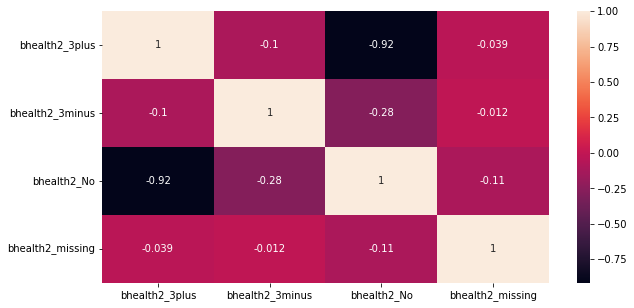

In [46]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAB033_trimmed[['bhealth2_3plus','bhealth2_3minus','bhealth2_No','bhealth2_missing']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [47]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAB033_trimmed.bhealth2_No))
print(target.corr(LASAB033_trimmed.bhealth2_3plus))

0.16248033273128187
-0.13543091173159869


In [48]:
# Drop bhealth2_3plus
LASAB033_trimmed.drop(columns = 'bhealth2_3plus', inplace = True)
LASAC033_trimmed.drop(columns = 'chealth2_3plus', inplace = True)
LASAD033_trimmed.drop(columns = 'dhealth2_3plus', inplace = True)

In [49]:
# Health 3 and 4
# Convert Difficulty to numeric
LASAB033_trimmed.replace('0 days', '1.0', inplace = True)
LASAB033_trimmed.replace('1-3 days', '2.0', inplace = True)
LASAB033_trimmed.replace('4-7 days', '3.0', inplace = True)
LASAB033_trimmed.replace('> 1 week but < 1 month', '4.0', inplace = True)
LASAB033_trimmed.replace('All the time', '5.0', inplace = True)

LASAC033_trimmed.replace('0 days', '1.0', inplace = True)
LASAC033_trimmed.replace('1-3 days', '2.0', inplace = True)
LASAC033_trimmed.replace('4-7 days', '3.0', inplace = True)
LASAC033_trimmed.replace('> 1 week but < 1 month', '4.0', inplace = True)
LASAC033_trimmed.replace('All the time', '5.0', inplace = True)

LASAD033_trimmed.replace('0 days', '1.0', inplace = True)
LASAD033_trimmed.replace('1-3 days', '2.0', inplace = True)
LASAD033_trimmed.replace('4-7 days', '3.0', inplace = True)
LASAD033_trimmed.replace('> 1 week but < 1 month', '4.0', inplace = True)
LASAD033_trimmed.replace('All the time', '5.0', inplace = True)


In [50]:
# Convert No and Yes to 0 and 1 respectively
LASAB033_trimmed.replace('No', '0.0', inplace = True)
LASAB033_trimmed.replace('Na, no partner', '0.0', inplace = True)
LASAB033_trimmed.replace('Na, p out hh', '0.0', inplace = True)
LASAB033_trimmed.replace('Yes', '1.0', inplace = True)

LASAC033_trimmed.replace('No', '0.0', inplace = True)
LASAC033_trimmed.replace('Na, No Partner', '0.0', inplace = True)
LASAC033_trimmed.replace('Na, P outside HH', '0.0', inplace = True)
LASAC033_trimmed.replace('Yes', '1.0', inplace = True)

LASAD033_trimmed.replace('No', '0.0', inplace = True)
LASAD033_trimmed.replace('Na, No Partner', '0.0', inplace = True)
LASAD033_trimmed.replace('Na, P out HH', '0.0', inplace = True)
LASAD033_trimmed.replace('Yes', '1.0', inplace = True)


In [51]:
for i in LASAB033_trimmed.columns:
    LASAB033_trimmed[i] = pd.to_numeric(LASAB033_trimmed[i], errors = 'coerce')
for i in LASAC033_trimmed.columns:
    LASAC033_trimmed[i] = pd.to_numeric(LASAC033_trimmed[i], errors = 'coerce')
for i in LASAD033_trimmed.columns:
    LASAD033_trimmed[i] = pd.to_numeric(LASAD033_trimmed[i], errors = 'coerce')

In [52]:
# Save files to output folder
LASAB033_trimmed.to_csv(path + 'output/LASAB033_trimmed.csv', index=False)
LASAC033_trimmed.to_csv(path + 'output/LASAC033_trimmed.csv', index=False)
LASAD033_trimmed.to_csv(path + 'output/LASAD033_trimmed.csv', index=False)

## LASA 034
#### Physical Performance

In [ ]:
# Read in LASA 034 files
LASAB034 = pd.read_spss(path + "lasafiles/LASAB034.SAV")
LASAC034 = pd.read_spss(path + "lasafiles/LASAC034.SAV")
LASAD034 = pd.read_spss(path + "lasafiles/LASAD034.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB034_trimmed = LASAB034[LASAB034.respnr.isin(B_individuals)]
LASAB034_trimmed = LASAB034_trimmed.reset_index(drop = True)
# C
LASAC034_trimmed = LASAC034[LASAC034.respnr.isin(C_individuals)]
LASAC034_trimmed = LASAC034_trimmed.reset_index(drop = True)
# D
LASAD034_trimmed = LASAD034[LASAD034.respnr.isin(D_individuals)]
LASAD034_trimmed = LASAD034_trimmed.reset_index(drop = True)
print()

In [ ]:
# Remove walk11-18 and walk08 (floor type)
LASAB034_trimmed.drop(columns = ['bwalk08', 'bwalk11', 'bwalk12', 'bwalk13', 'bwalk14', 'bwalk15', 'bwalk16', 'bwalk17', 'bwalk18'], inplace = True)
LASAC034_trimmed.drop(columns = ['cwalk08', 'cwalk11', 'cwalk12', 'cwalk13', 'cwalk14', 'cwalk15', 'cwalk16', 'cwalk17', 'cwalk18'], inplace = True)
LASAD034_trimmed.drop(columns = ['dwalk08', 'dwalk11', 'dwalk12', 'dwalk13', 'dwalk14', 'dwalk15', 'dwalk16', 'dwalk17', 'dwalk18'], inplace = True)

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB034_trimmed.columns.str[1:], LASAC034_trimmed.columns.str[1:])
#print(a)
b = np.intersect1d(a, LASAD034_trimmed.columns.str[1:])
b = b.tolist()
b.remove('espnr')
b = np.array(b)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB034_trimmed = LASAB034_trimmed[b_cols]
LASAC034_trimmed = LASAC034_trimmed[c_cols]
LASAD034_trimmed = LASAD034_trimmed[d_cols]

In [ ]:
LASAD034_trimmed

In [ ]:
for na_col in LASAB034_trimmed.columns:
    for x in range(len(LASAB034_trimmed)):
        fix_na(LASAB034_trimmed, na_col, x)
for na_col in LASAC034_trimmed.columns:
    for x in range(len(LASAC034_trimmed)):
        fix_na(LASAC034_trimmed, na_col, x)
for na_col in LASAD034_trimmed.columns:
    for x in range(len(LASAD034_trimmed)):
        fix_na(LASAD034_trimmed, na_col, x)

In [ ]:
# Remove brmpf
LASAB034_trimmed.drop(columns = 'brmpf', inplace = True)
LASAC034_trimmed.drop(columns = 'crmpf', inplace = True)
LASAD034_trimmed.drop(columns = 'drmpf', inplace = True)

# Remove bwalk06
LASAB034_trimmed.drop(columns = 'bwalk06', inplace = True)
LASAC034_trimmed.drop(columns = 'cwalk06', inplace = True)
LASAD034_trimmed.drop(columns = 'dwalk06', inplace = True)

In [ ]:
LASAB034_trimmed.replace('Na, see BBUTTON2', 'Na', inplace = True)
LASAC034_trimmed.replace('Na, see CBUTTON2', 'Na', inplace = True)
LASAD034_trimmed.replace('Na, see DBUTTON2', 'Na', inplace = True)

In [ ]:
# Convert Difficulty to numeric
LASAB034_trimmed.replace('Completed without help', '1.0', inplace = True)
LASAB034_trimmed.replace('Completed with help', '2.0', inplace = True)
LASAB034_trimmed.replace('Terminated', '3.0', inplace = True)

LASAC034_trimmed.replace('Completed without help', '1.0', inplace = True)
LASAC034_trimmed.replace('Completed with help', '2.0', inplace = True)
LASAC034_trimmed.replace('Terminated', '3.0', inplace = True)

LASAD034_trimmed.replace('Completed without help', '1.0', inplace = True)
LASAD034_trimmed.replace('Completed with help', '2.0', inplace = True)
LASAD034_trimmed.replace('Terminated', '3.0', inplace = True)

In [ ]:
# Convert No to 0.0 and Yes to 1.0
LASAB034_trimmed.replace('No', '0.0', inplace = True)
LASAB034_trimmed.replace('Yes', '1.0', inplace = True)

LASAC034_trimmed.replace('No', '0.0', inplace = True)
LASAC034_trimmed.replace('Yes', '1.0', inplace = True)

LASAD034_trimmed.replace('No', '0.0', inplace = True)
LASAD034_trimmed.replace('Yes', '1.0', inplace = True)

In [ ]:
# Chair3
LASAB034_trimmed.replace('slides forward without u', '1.0', inplace = True)
LASAB034_trimmed.replace('slides forward using arm', '2.0', inplace = True)
LASAB034_trimmed.replace('cannot slide forward', '3.0', inplace = True)
LASAB034_trimmed.replace('Not done/terminated', '4.0', inplace = True)
# Chair 4
LASAB034_trimmed.replace('succeeded without using', '1.0', inplace = True)
LASAB034_trimmed.replace('succeeded using arms', '2.0', inplace = True)
LASAB034_trimmed.replace('cannot', '3.0', inplace = True)

# Chair3
LASAC034_trimmed.replace('slides forward without u', '1.0', inplace = True)
LASAC034_trimmed.replace('slides forward using arm', '2.0', inplace = True)
LASAC034_trimmed.replace('cannot slide forward', '3.0', inplace = True)
LASAC034_trimmed.replace('Not done/terminated', '4.0', inplace = True)
# Chair 4
LASAC034_trimmed.replace('succeeded without using', '1.0', inplace = True)
LASAC034_trimmed.replace('succeeded using arms', '2.0', inplace = True)
LASAC034_trimmed.replace('cannot', '3.0', inplace = True)


# Chair3
LASAD034_trimmed.replace('slides forward without u', '1.0', inplace = True)
LASAD034_trimmed.replace('slides forward using arm', '2.0', inplace = True)
LASAD034_trimmed.replace('cannot slide forward', '3.0', inplace = True)
LASAD034_trimmed.replace('Not done/terminated', '4.0', inplace = True)
# Chair 4
LASAD034_trimmed.replace('succeeded without using', '1.0', inplace = True)
LASAD034_trimmed.replace('succeeded using arms', '2.0', inplace = True)
LASAD034_trimmed.replace('cannot', '3.0', inplace = True)



In [ ]:
# Chair 5
# Replace No with 4(in this case became 3.0 from conversions above and 0.0 as well)
LASAB034_trimmed['bchair5'] = LASAB034_trimmed['bchair5'].replace('3.0', '4.0')
LASAB034_trimmed['bchair5'] = LASAB034_trimmed['bchair5'].replace('0.0', '4.0')
LASAB034_trimmed['bchair5'] = LASAB034_trimmed['bchair5'].replace('No: five times completed', '1.0')
LASAB034_trimmed['bchair5'] = LASAB034_trimmed['bchair5'].replace('No: less than five times', '2.0')
LASAB034_trimmed['bchair5'] = LASAB034_trimmed['bchair5'].replace('Yes: less than five time', '3.0')

# Chair 5
# Replace No with 4(in this case became 3.0 from conversions above and 0.0 as well)
LASAC034_trimmed['cchair5'] = LASAC034_trimmed['cchair5'].replace('3.0', '4.0')
LASAC034_trimmed['cchair5'] = LASAC034_trimmed['cchair5'].replace('0.0', '4.0')
LASAC034_trimmed['cchair5'] = LASAC034_trimmed['cchair5'].replace('No: five times completed', '1.0')
LASAC034_trimmed['cchair5'] = LASAC034_trimmed['cchair5'].replace('No: less than five times', '2.0')
LASAC034_trimmed['cchair5'] = LASAC034_trimmed['cchair5'].replace('Yes: less than five time', '3.0')

# Chair 5
# Replace No with 4(in this case became 3.0 from conversions above and 0.0 as well)
LASAD034_trimmed['dchair5'] = LASAD034_trimmed['dchair5'].replace('3.0', '4.0')
LASAD034_trimmed['dchair5'] = LASAD034_trimmed['dchair5'].replace('0.0', '4.0')
LASAD034_trimmed['dchair5'] = LASAD034_trimmed['dchair5'].replace('No: five times completed', '1.0')
LASAD034_trimmed['dchair5'] = LASAD034_trimmed['dchair5'].replace('No: less than five times', '2.0')
LASAD034_trimmed['dchair5'] = LASAD034_trimmed['dchair5'].replace('Yes: less than five time', '3.0')


In [ ]:
# Convert bwalk01 to restrictions 0, no restrictions 1
LASAB034_trimmed['bwalk01'] = np.where(LASAB034_trimmed['bwalk01'] == 'no restrictions', 1.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk01'] = np.where(LASAB034_trimmed['bwalk01'] == 'other', 0.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk01'] = np.where(LASAB034_trimmed['bwalk01'] == 'recent surgery', 0.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk01'] = np.where(LASAB034_trimmed['bwalk01'] == 'recent accident', 0.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk01'] = np.where(LASAB034_trimmed['bwalk01'] == 'in wheelchair', 0.0, LASAB034_trimmed['bwalk01'])

# Convert bwalk01 to restrictions 0, no restrictions 1
LASAC034_trimmed['cwalk01'] = np.where(LASAC034_trimmed['cwalk01'] == 'no restrictions', 1.0, LASAC034_trimmed['cwalk01'])
LASAC034_trimmed['cwalk01'] = np.where(LASAC034_trimmed['cwalk01'] == 'other', 0.0, LASAC034_trimmed['cwalk01'])
LASAC034_trimmed['cwalk01'] = np.where(LASAC034_trimmed['cwalk01'] == 'recent surgery', 0.0, LASAC034_trimmed['cwalk01'])
LASAC034_trimmed['cwalk01'] = np.where(LASAC034_trimmed['cwalk01'] == 'recent accident', 0.0, LASAC034_trimmed['cwalk01'])
LASAC034_trimmed['cwalk01'] = np.where(LASAC034_trimmed['cwalk01'] == 'in wheelchair', 0.0, LASAC034_trimmed['cwalk01'])

# Convert bwalk01 to restrictions 0, no restrictions 1
LASAB034_trimmed['bwalk01'] = np.where(LASAB034_trimmed['bwalk01'] == 'no restrictions', 1.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk01'] = np.where(LASAB034_trimmed['bwalk01'] == 'other', 0.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk01'] = np.where(LASAB034_trimmed['bwalk01'] == 'recent surgery', 0.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk01'] = np.where(LASAB034_trimmed['bwalk01'] == 'recent accident', 0.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk01'] = np.where(LASAB034_trimmed['bwalk01'] == 'in wheelchair', 0.0, LASAB034_trimmed['bwalk01'])


In [ ]:
# Convert bwalk02 to restrictions 0, no restrictions 1
LASAB034_trimmed['bwalk02'] = np.where(LASAB034_trimmed['bwalk02'] == 'no restrictions', 1.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk02'] = np.where(LASAB034_trimmed['bwalk02'] == 'Respondent already walke', 1.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk02'] = np.where(LASAB034_trimmed['bwalk02'] == 'Can walk (with aid)', 2.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk02'] = np.where(LASAB034_trimmed['bwalk02'] == 'Can walk with aid not av', 3.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk02'] = np.where(LASAB034_trimmed['bwalk02'] == 'Cannot walk', 4.0, LASAB034_trimmed['bwalk01'])

# Convert bwalk02 to restrictions 0, no restrictions 1
LASAC034_trimmed['cwalk02'] = np.where(LASAC034_trimmed['cwalk02'] == 'no restrictions', 1.0, LASAC034_trimmed['cwalk01'])
LASAC034_trimmed['cwalk02'] = np.where(LASAC034_trimmed['cwalk02'] == 'Respondent already walke', 1.0, LASAC034_trimmed['cwalk01'])
LASAC034_trimmed['cwalk02'] = np.where(LASAC034_trimmed['cwalk02'] == 'Can walk (with aid)', 2.0, LASAC034_trimmed['cwalk01'])
LASAC034_trimmed['cwalk02'] = np.where(LASAC034_trimmed['cwalk02'] == 'Can walk with aid not av', 3.0, LASAC034_trimmed['cwalk01'])
LASAC034_trimmed['cwalk02'] = np.where(LASAC034_trimmed['cwalk02'] == 'Cannot walk', 4.0, LASAC034_trimmed['cwalk01'])

# Convert bwalk02 to restrictions 0, no restrictions 1
LASAD034_trimmed['dwalk02'] = np.where(LASAD034_trimmed['dwalk02'] == 'no restrictions', 1.0, LASAD034_trimmed['dwalk01'])
LASAD034_trimmed['dwalk02'] = np.where(LASAD034_trimmed['dwalk02'] == 'Respondent already walke', 1.0, LASAD034_trimmed['dwalk01'])
LASAD034_trimmed['dwalk02'] = np.where(LASAD034_trimmed['dwalk02'] == 'Can walk (with aid)', 2.0, LASAD034_trimmed['dwalk01'])
LASAD034_trimmed['dwalk02'] = np.where(LASAD034_trimmed['dwalk02'] == 'Can walk with aid not av', 3.0, LASAD034_trimmed['dwalk01'])
LASAD034_trimmed['dwalk02'] = np.where(LASAD034_trimmed['dwalk02'] == 'Cannot walk', 4.0, LASAD034_trimmed['dwalk01'])

In [ ]:
# Convert bwalk10 to not mentioned 0, mentioned 1
LASAB034_trimmed['bwalk10'] = np.where(LASAB034_trimmed['bwalk10'] == 'Not mentioned', 0.0, LASAB034_trimmed['bwalk01'])
LASAB034_trimmed['bwalk10'] = np.where(LASAB034_trimmed['bwalk10'] == 'Mentioned', 1.0, LASAB034_trimmed['bwalk01'])

# Convert bwalk10 to not mentioned 0, mentioned 1
LASAC034_trimmed['cwalk10'] = np.where(LASAC034_trimmed['cwalk10'] == 'Not mentioned', 0.0, LASAC034_trimmed['cwalk01'])
LASAC034_trimmed['cwalk10'] = np.where(LASAC034_trimmed['cwalk10'] == 'Mentioned', 1.0, LASAC034_trimmed['cwalk01'])

# Convert bwalk10 to not mentioned 0, mentioned 1
LASAD034_trimmed['dwalk10'] = np.where(LASAD034_trimmed['dwalk10'] == 'Not mentioned', 0.0, LASAD034_trimmed['dwalk01'])
LASAD034_trimmed['dwalk10'] = np.where(LASAD034_trimmed['dwalk10'] == 'Mentioned', 1.0, LASAD034_trimmed['dwalk01'])

In [ ]:
for i in LASAB034_trimmed.columns:
    LASAB034_trimmed[i] = pd.to_numeric(LASAB034_trimmed[i], errors = 'coerce')
for i in LASAC034_trimmed.columns:
    LASAC034_trimmed[i] = pd.to_numeric(LASAC034_trimmed[i], errors = 'coerce')
for i in LASAD034_trimmed.columns:
    LASAD034_trimmed[i] = pd.to_numeric(LASAD034_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB034_trimmed.to_csv(path + 'output/LASAB034_trimmed.csv', index=False)
LASAC034_trimmed.to_csv(path + 'output/LASAC034_trimmed.csv', index=False)
LASAD034_trimmed.to_csv(path + 'output/LASAD034_trimmed.csv', index=False)

# LASA 035
#### Chronic Diseases

In [90]:
# Read in LASA 035 files
LASAB035 = pd.read_spss(path + "lasafiles/LASAB035.SAV")
LASAC035 = pd.read_spss(path + "lasafiles/LASAC035.SAV")
LASAD035 = pd.read_spss(path + "lasafiles/LASAD035.SAV")

In [91]:
# Select appropriate individuals
# B
LASAB035_trimmed = LASAB035[LASAB035.respnr.isin(B_individuals)]
LASAB035_trimmed = LASAB035_trimmed.reset_index(drop = True)
# C
LASAC035_trimmed = LASAC035[LASAC035.respnr.isin(C_individuals)]
LASAC035_trimmed = LASAC035_trimmed.reset_index(drop = True)
# D
LASAD035_trimmed = LASAD035[LASAD035.respnr.isin(D_individuals)]
LASAD035_trimmed = LASAD035_trimmed.reset_index(drop = True)
print()

In [92]:
# Replace misnamed column in C and D cartvei8 and dartvei8 properly
LASAC035_trimmed = LASAC035_trimmed.rename(columns={"cartve8": "cartvei8"})
LASAD035_trimmed = LASAD035_trimmed.rename(columns={"dartve8": "dartvei8"}) 

In [93]:
# Select features present in all of the waves
a = np.intersect1d(LASAB035_trimmed.columns.str[1:], LASAC035_trimmed.columns.str[1:])
#print(a)
b = np.intersect1d(a, LASAD035_trimmed.columns.str[1:])
b = b.tolist()
b.remove('espnr')
b = np.array(b)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

#b_cols.insert(0, 'bartvei8')
b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB035_trimmed = LASAB035_trimmed[b_cols]
LASAC035_trimmed = LASAC035_trimmed[c_cols]
LASAD035_trimmed = LASAD035_trimmed[d_cols]

In [94]:
# When brmch value is Interview terminated set the value in that column to Na for all individuals
for i in range(len(LASAB035_trimmed.columns)-1):
    LASAB035_trimmed[LASAB035_trimmed.columns[i]] = np.where(LASAB035_trimmed['brmch'] == 'Terminated interview', 'Na', LASAB035_trimmed[LASAB035_trimmed.columns[i]])
    
for i in range(len(LASAC035_trimmed.columns)-1):
    LASAC035_trimmed[LASAC035_trimmed.columns[i]] = np.where(LASAC035_trimmed['crmch'] == 'Interview terminated', 'Na', LASAC035_trimmed[LASAC035_trimmed.columns[i]])
    
for i in range(len(LASAD035_trimmed.columns)-1):
    LASAD035_trimmed[LASAD035_trimmed.columns[i]] = np.where(LASAD035_trimmed['drmch'] == 'Terminated interview', 'Na', LASAD035_trimmed[LASAD035_trimmed.columns[i]])

#### Deal with artveis

In [95]:
# Simplify ccara01
LASAC035_trimmed['cartvei1'] = np.where(LASAC035_trimmed['cartvei1'] == 'No, never', 'No', LASAC035_trimmed['cartvei1'])
LASAC035_trimmed['cartvei1'] = np.where(LASAC035_trimmed['cartvei1'] == 'Yes, BARTVEI1 Yes', 'Yes', LASAC035_trimmed['cartvei1'])
LASAC035_trimmed['cartvei1'] = np.where(LASAC035_trimmed['cartvei1'] == 'Yes, BARTVEI1 No', 'Yes', LASAC035_trimmed['cartvei1'])
LASAC035_trimmed['cartvei1'] = np.where(LASAC035_trimmed['cartvei1'] == 'No, BARTVEI1 Yes', 'No', LASAC035_trimmed['cartvei1'])

# Simplify dcara01
LASAD035_trimmed['dartvei1'] = np.where(LASAD035_trimmed['dartvei1'] == 'No,', 'No', LASAD035_trimmed['dartvei1'])
LASAD035_trimmed['dartvei1'] = np.where(LASAD035_trimmed['dartvei1'] == 'Yes, CARTVEI1 Yes', 'Yes', LASAD035_trimmed['dartvei1'])
LASAD035_trimmed['dartvei1'] = np.where(LASAD035_trimmed['dartvei1'] == 'Yes, CARTVEI1 No', 'Yes', LASAD035_trimmed['dartvei1'])
LASAD035_trimmed['dartvei1'] = np.where(LASAD035_trimmed['dartvei1'] == 'No, CARTVEI1 Yes', 'No', LASAD035_trimmed['dartvei1'])
LASAD035_trimmed['dartvei1'] = np.where(LASAD035_trimmed['dartvei1'] == 'Na, asked', 'Na', LASAD035_trimmed['dartvei1'])

In [96]:
# Fix weird Na values
for i in ['dartvei2','dartvei3','dartvei4','dartvei5','dartvei8']:
    LASAD035_trimmed[i] = np.where(LASAD035_trimmed['dartvei1'] == 'Na', 'Na', LASAD035_trimmed[i])

In [97]:
# B
for i in ['bartvei6', 'bartvei7']:
    LASAB035_trimmed[i] = np.where(LASAB035_trimmed[i] == 'Na, see BARTVEI5', LASAB035_trimmed['bartvei5'], LASAB035_trimmed[i])

for i in ['bartve8a','bartve8b','bartve8c','bartve8d','bartve8e']:
    LASAB035_trimmed[i] = np.where(LASAB035_trimmed[i] == 'Na, see BARTVEI8', LASAB035_trimmed['bartvei8'], LASAB035_trimmed[i])

# C
for i in ['cartvei6', 'cartvei7']:
    LASAC035_trimmed[i] = np.where(LASAC035_trimmed[i] == 'Na, see CARTVEI5', LASAC035_trimmed['cartvei5'], LASAC035_trimmed[i])

for i in ['cartve8a','cartve8b','cartve8c','cartve8d','cartve8e']:
    LASAC035_trimmed[i] = np.where(LASAC035_trimmed[i] == 'Na, see CARTVEI8', LASAC035_trimmed['cartvei8'], LASAC035_trimmed[i])

# D
for i in ['dartvei6', 'dartvei7']:
    LASAD035_trimmed[i] = np.where(LASAD035_trimmed[i] == 'Na, see DARTVEI5', LASAD035_trimmed['dartvei5'], LASAD035_trimmed[i])

for i in ['dartve8a','dartve8b','dartve8c','dartve8d','dartve8e']:
    LASAD035_trimmed[i] = np.where(LASAD035_trimmed[i] == 'Na, see DARTVEI8', LASAD035_trimmed['dartvei8'], LASAD035_trimmed[i])

#### Cancer features

In [98]:
# Simplify ccara01
LASAC035_trimmed['ccancer1'] = np.where(LASAC035_trimmed['ccancer1'] == 'No, never', 'No', LASAC035_trimmed['ccancer1'])
LASAC035_trimmed['ccancer1'] = np.where(LASAC035_trimmed['ccancer1'] == 'Yes, BCANCER1 Yes', 'Yes', LASAC035_trimmed['ccancer1'])
LASAC035_trimmed['ccancer1'] = np.where(LASAC035_trimmed['ccancer1'] == 'Yes, BCANCER1 No', 'Yes', LASAC035_trimmed['ccancer1'])
LASAC035_trimmed['ccancer1'] = np.where(LASAC035_trimmed['ccancer1'] == 'No, BCANCER1 Yes', 'No', LASAC035_trimmed['ccancer1'])

# Simplify dcara01
LASAD035_trimmed['dcancer1'] = np.where(LASAD035_trimmed['dcancer1'] == 'No,', 'No', LASAD035_trimmed['dcancer1'])
LASAD035_trimmed['dcancer1'] = np.where(LASAD035_trimmed['dcancer1'] == 'Yes, CCANCER1 Yes', 'Yes', LASAD035_trimmed['dcancer1'])
LASAD035_trimmed['dcancer1'] = np.where(LASAD035_trimmed['dcancer1'] == 'Yes, CCANCER1 No', 'Yes', LASAD035_trimmed['dcancer1'])
LASAD035_trimmed['dcancer1'] = np.where(LASAD035_trimmed['dcancer1'] == 'No, CCANCER1 Yes', 'No', LASAD035_trimmed['dcancer1'])

In [99]:
for i in ['bcance6a','bcance6b','bcance6c','bcance6d','bcance6e']:
    LASAB035_trimmed[i] = np.where(LASAB035_trimmed[i] == 'Na, see BCANCER6', LASAB035_trimmed['bcancer6'], LASAB035_trimmed[i])
    
for i in ['ccance6a','ccance6b','ccance6c','ccance6d','ccance6e']:
    LASAC035_trimmed[i] = np.where(LASAC035_trimmed[i] == 'Na, see CCANCER6', LASAC035_trimmed['ccancer6'], LASAC035_trimmed[i])
    
for i in ['dcance6a','dcance6b','dcance6c','dcance6d','dcance6e']:
    LASAD035_trimmed[i] = np.where(LASAD035_trimmed[i] == 'Na, see DCANCER6', LASAD035_trimmed['dcancer6'], LASAD035_trimmed[i])

#### Deal with cara01-cara12 features

In [100]:
# Simplify ccara01
LASAC035_trimmed['ccara01'] = np.where(LASAC035_trimmed['ccara01'] == 'No, never', 'No', LASAC035_trimmed['ccara01'])
LASAC035_trimmed['ccara01'] = np.where(LASAC035_trimmed['ccara01'] == 'Yes, BCARA01 Yes', 'Yes', LASAC035_trimmed['ccara01'])
LASAC035_trimmed['ccara01'] = np.where(LASAC035_trimmed['ccara01'] == 'Yes, BCARA01 No', 'Yes', LASAC035_trimmed['ccara01'])
LASAC035_trimmed['ccara01'] = np.where(LASAC035_trimmed['ccara01'] == 'No, BCARA01 Yes', 'No', LASAC035_trimmed['ccara01'])
LASAC035_trimmed['ccara01'] = np.where(LASAC035_trimmed['ccara01'] == 'Na, see CRMCH', 'Na', LASAC035_trimmed['ccara01'])

# Simplify dcara01
LASAD035_trimmed['dcara01'] = np.where(LASAD035_trimmed['dcara01'] == 'No,', 'No', LASAD035_trimmed['dcara01'])
LASAD035_trimmed['dcara01'] = np.where(LASAD035_trimmed['dcara01'] == 'Yes, CCARA01 Yes', 'Yes', LASAD035_trimmed['dcara01'])
LASAD035_trimmed['dcara01'] = np.where(LASAD035_trimmed['dcara01'] == 'Yes, CCARA01 No', 'Yes', LASAD035_trimmed['dcara01'])
LASAD035_trimmed['dcara01'] = np.where(LASAD035_trimmed['dcara01'] == 'No, CCARA01 Yes', 'No', LASAD035_trimmed['dcara01'])
LASAD035_trimmed['dcara01'] = np.where(LASAD035_trimmed['dcara01'] == 'Na, see DRMCH', 'Na', LASAD035_trimmed['dcara01'])

#### Cva features

In [101]:
# Simplify ccara01
LASAC035_trimmed['ccva01'] = np.where(LASAC035_trimmed['ccva01'] == 'No, never', 'No', LASAC035_trimmed['ccva01'])
LASAC035_trimmed['ccva01'] = np.where(LASAC035_trimmed['ccva01'] == 'Yes, BCVA01 Yes', 'Yes', LASAC035_trimmed['ccva01'])
LASAC035_trimmed['ccva01'] = np.where(LASAC035_trimmed['ccva01'] == 'Yes, BCVA01 No', 'Yes', LASAC035_trimmed['ccva01'])
LASAC035_trimmed['ccva01'] = np.where(LASAC035_trimmed['ccva01'] == 'No, BCVA01 Yes', 'No', LASAC035_trimmed['ccva01'])

# Simplify dcara01
LASAD035_trimmed['dcva01'] = np.where(LASAD035_trimmed['dcva01'] == 'No,', 'No', LASAD035_trimmed['dcva01'])
LASAD035_trimmed['dcva01'] = np.where(LASAD035_trimmed['dcva01'] == 'Yes, CCVA01 Yes', 'Yes', LASAD035_trimmed['dcva01'])
LASAD035_trimmed['dcva01'] = np.where(LASAD035_trimmed['dcva01'] == 'Yes, CCVA01 No', 'Yes', LASAD035_trimmed['dcva01'])
LASAD035_trimmed['dcva01'] = np.where(LASAD035_trimmed['dcva01'] == 'No, CCVA01 Yes', 'No', LASAD035_trimmed['dcva01'])

#### diabe features

In [102]:
# Simplify ccara01
LASAC035_trimmed['cdiabe01'] = np.where(LASAC035_trimmed['cdiabe01'] == 'No, never', 'No', LASAC035_trimmed['cdiabe01'])
LASAC035_trimmed['cdiabe01'] = np.where(LASAC035_trimmed['cdiabe01'] == 'Yes, BDIABE01 Yes', 'Yes', LASAC035_trimmed['cdiabe01'])
LASAC035_trimmed['cdiabe01'] = np.where(LASAC035_trimmed['cdiabe01'] == 'Yes, BDIABE01 No', 'Yes', LASAC035_trimmed['cdiabe01'])
LASAC035_trimmed['cdiabe01'] = np.where(LASAC035_trimmed['cdiabe01'] == 'No, BDIABE01 Yes', 'No', LASAC035_trimmed['cdiabe01'])

# Simplify dcara01
LASAD035_trimmed['ddiabe01'] = np.where(LASAD035_trimmed['ddiabe01'] == 'No,', 'No', LASAD035_trimmed['ddiabe01'])
LASAD035_trimmed['ddiabe01'] = np.where(LASAD035_trimmed['ddiabe01'] == 'Yes, CDIABE01 Yes', 'Yes', LASAD035_trimmed['ddiabe01'])
LASAD035_trimmed['ddiabe01'] = np.where(LASAD035_trimmed['ddiabe01'] == 'Yes, CDIABE01 No', 'Yes', LASAD035_trimmed['ddiabe01'])
LASAD035_trimmed['ddiabe01'] = np.where(LASAD035_trimmed['ddiabe01'] == 'No, CDIABE01 Yes', 'No', LASAD035_trimmed['ddiabe01'])

#### hart

In [103]:
# Simplify ccara01
LASAC035_trimmed['chart01'] = np.where(LASAC035_trimmed['chart01'] == 'No, never', 'No', LASAC035_trimmed['chart01'])
LASAC035_trimmed['chart01'] = np.where(LASAC035_trimmed['chart01'] == 'Yes, BHART01 Yes', 'Yes', LASAC035_trimmed['chart01'])
LASAC035_trimmed['chart01'] = np.where(LASAC035_trimmed['chart01'] == 'Yes, BHART01 No', 'Yes', LASAC035_trimmed['chart01'])
LASAC035_trimmed['chart01'] = np.where(LASAC035_trimmed['chart01'] == 'No, BHART01 Yes', 'No', LASAC035_trimmed['chart01'])

# Simplify dcara01
LASAD035_trimmed['dhart01'] = np.where(LASAD035_trimmed['dhart01'] == 'No,', 'No', LASAD035_trimmed['dhart01'])
LASAD035_trimmed['dhart01'] = np.where(LASAD035_trimmed['dhart01'] == 'Yes, CHART01 Yes', 'Yes', LASAD035_trimmed['dhart01'])
LASAD035_trimmed['dhart01'] = np.where(LASAD035_trimmed['dhart01'] == 'Yes, CHART01 No', 'Yes', LASAD035_trimmed['dhart01'])
LASAD035_trimmed['dhart01'] = np.where(LASAD035_trimmed['dhart01'] == 'No, CHART01 Yes', 'No', LASAD035_trimmed['dhart01'])

In [104]:
for i in ['bhart15a','bhart15b','bhart15c','bhart15d','bhart15e']:
    LASAB035_trimmed[i] = np.where(LASAB035_trimmed[i] == 'Na, see BHART15', LASAB035_trimmed['bhart15'], LASAB035_trimmed[i])

for i in ['chart15a','chart15b','chart15c','chart15d','chart15e']:
    LASAC035_trimmed[i] = np.where(LASAC035_trimmed[i] == 'Na, see CHART15', LASAC035_trimmed['chart15'], LASAC035_trimmed[i])

for i in ['dhart15a','dhart15b','dhart15c','dhart15d','dhart15e']:
    LASAD035_trimmed[i] = np.where(LASAD035_trimmed[i] == 'Na, see DHART15', LASAD035_trimmed['dhart15'], LASAD035_trimmed[i])
    

#### bincon

In [105]:
# Simplify ccara01
LASAC035_trimmed['cincon1'] = np.where(LASAC035_trimmed['cincon1'] == 'No, never', 'No', LASAC035_trimmed['cincon1'])
LASAC035_trimmed['cincon1'] = np.where(LASAC035_trimmed['cincon1'] == 'Yes, BINCON1 Yes', 'Yes', LASAC035_trimmed['cincon1'])
LASAC035_trimmed['cincon1'] = np.where(LASAC035_trimmed['cincon1'] == 'Yes, BINCON1 No', 'Yes', LASAC035_trimmed['cincon1'])
LASAC035_trimmed['cincon1'] = np.where(LASAC035_trimmed['cincon1'] == 'No, BINCON1 Yes', 'No', LASAC035_trimmed['cincon1'])

# Simplify dcara01
LASAD035_trimmed['dincon1'] = np.where(LASAD035_trimmed['dincon1'] == 'No,', 'No', LASAD035_trimmed['dincon1'])
LASAD035_trimmed['dincon1'] = np.where(LASAD035_trimmed['dincon1'] == 'Yes, CINCON1 Yes', 'Yes', LASAD035_trimmed['dincon1'])
LASAD035_trimmed['dincon1'] = np.where(LASAD035_trimmed['dincon1'] == 'Yes, CINCON1 No', 'Yes', LASAD035_trimmed['dincon1'])
LASAD035_trimmed['dincon1'] = np.where(LASAD035_trimmed['dincon1'] == 'No, CINCON1 Yes', 'No', LASAD035_trimmed['dincon1'])

#### bothsi

In [106]:
for i in ['bothsi08','bothsi10','bothsi11','bothsi12']:
    LASAB035_trimmed[i] = np.where(LASAB035_trimmed[i] == 'Na, see BOTHSI07', LASAB035_trimmed['bothsi07'], LASAB035_trimmed[i])

for i in ['cothsi08','cothsi10','cothsi11','cothsi12']:
    LASAC035_trimmed[i] = np.where(LASAC035_trimmed[i] == 'Na, see COTH71', LASAC035_trimmed['cothsi07'], LASAC035_trimmed[i])

for i in ['dothsi08','dothsi10','dothsi11','dothsi12']:
    LASAD035_trimmed[i] = np.where(LASAD035_trimmed[i] == 'Na, see DOTHSI07', LASAD035_trimmed['dothsi07'], LASAD035_trimmed[i])


#### Rheum

In [107]:
# Simplify ccara01
LASAC035_trimmed['crheum01'] = np.where(LASAC035_trimmed['crheum01'] == 'No, never', 'No', LASAC035_trimmed['crheum01'])
LASAC035_trimmed['crheum01'] = np.where(LASAC035_trimmed['crheum01'] == 'Yes, BRHEUM01 Yes', 'Yes', LASAC035_trimmed['crheum01'])
LASAC035_trimmed['crheum01'] = np.where(LASAC035_trimmed['crheum01'] == 'Yes, BRHEUM01 No', 'Yes', LASAC035_trimmed['crheum01'])
LASAC035_trimmed['crheum01'] = np.where(LASAC035_trimmed['crheum01'] == 'No, BRHEUM01 Yes', 'No', LASAC035_trimmed['crheum01'])

# Simplify dcara01
LASAD035_trimmed['drheum01'] = np.where(LASAD035_trimmed['drheum01'] == 'No,', 'No', LASAD035_trimmed['drheum01'])
LASAD035_trimmed['drheum01'] = np.where(LASAD035_trimmed['drheum01'] == 'Yes, CRHEUM01 Yes', 'Yes', LASAD035_trimmed['drheum01'])
LASAD035_trimmed['drheum01'] = np.where(LASAD035_trimmed['drheum01'] == 'Yes, CRHEUM01 No', 'Yes', LASAD035_trimmed['drheum01'])
LASAD035_trimmed['drheum01'] = np.where(LASAD035_trimmed['drheum01'] == 'No, CRHEUM01 Yes', 'No', LASAD035_trimmed['drheum01'])

In [108]:
# Create feature rheum_01_and_02
## Yes if either of them is yes, no otherwise
LASAB035_trimmed['brheum_01_and_02'] = (LASAB035_trimmed['brheum01'] == 'Yes').astype(int)+(LASAB035_trimmed['brheum02'] == 'Yes').astype(int)
LASAB035_trimmed['brheum_01_and_02'] = np.where(LASAB035_trimmed['brheum_01_and_02'] > 0, 'Yes', 'No')

## Yes if either of them is yes, no otherwise
LASAC035_trimmed['crheum_01_and_02'] = (LASAC035_trimmed['crheum01'] == 'Yes').astype(int)+(LASAC035_trimmed['crheum02'] == 'Yes').astype(int)
LASAC035_trimmed['crheum_01_and_02'] = np.where(LASAC035_trimmed['crheum_01_and_02'] > 0, 'Yes', 'No')

## Yes if either of them is yes, no otherwise
LASAD035_trimmed['drheum_01_and_02'] = (LASAD035_trimmed['drheum01'] == 'Yes').astype(int)+(LASAD035_trimmed['drheum02'] == 'Yes').astype(int)
LASAD035_trimmed['drheum_01_and_02'] = np.where(LASAD035_trimmed['drheum_01_and_02'] > 0, 'Yes', 'No')

/tmp/ipykernel_3426601/1067810195.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  LASAB035_trimmed['brheum_01_and_02'] = (LASAB035_trimmed['brheum01'] == 'Yes').astype(int)+(LASAB035_trimmed['brheum02'] == 'Yes').astype(int)
/tmp/ipykernel_3426601/1067810195.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  LASAC035_trimmed['crheum_01_and_02'] = (LASAC035_trimmed['crheum01'] == 'Yes').astype(int)+(LASAC035_trimmed['crheum02'] == 'Yes').astype(int)
/tmp/ipykernel_3426601/1067810195.py:11: PerformanceWarning: DataFrame is hi

In [109]:
for i in ['brheum9a','brheum9b','brheum9c','brheum9d','brheum9e','brheum9f','brheum9g','brheum9h','brheum9i']:
    LASAB035_trimmed[i] = np.where(LASAB035_trimmed[i] == 'Na, see BRHEUM09', LASAB035_trimmed['brheum09'], LASAB035_trimmed[i])
    
for i in ['crheum9a','crheum9b','crheum9c','crheum9d','crheum9e','crheum9f','crheum9g','crheum9h','crheum9i']:
    LASAC035_trimmed[i] = np.where(LASAC035_trimmed[i] == 'Na, see CRHEUM09', LASAC035_trimmed['crheum09'], LASAC035_trimmed[i])
    
for i in ['drheum9a','drheum9b','drheum9c','drheum9d','drheum9e','drheum9f','drheum9g','drheum9h','drheum9i']:
    LASAD035_trimmed[i] = np.where(LASAD035_trimmed[i] == 'Na, see DRHEUM09', LASAD035_trimmed['drheum09'], LASAD035_trimmed[i])

In [110]:
pd.set_option('display.max_rows', 945)
LASAD035_trimmed.drheum_01_and_02.groupby([LASAD035_trimmed.drheum_01_and_02, LASAD035_trimmed.drheum9b]).size()
# bartvei6 and 7 are stupid, bartve8a-8e are stupid as well
# Cancer 6a-e are stupid
# Check for fucking Nee (ccance6b for example)

drheum_01_and_02  drheum9b           
No                Mentioned                3
                  Na, see DRHEUM01&02    490
                  Na, short interview      1
                  No                      17
Yes               Mentioned                6
                  Na, short interview     21
                  Na, wrong skip          69
                  No                     376
                  Not mentioned           53
Name: drheum_01_and_02, dtype: int64

In [111]:
LASAB035_trimmed

,respnr,bartve8a,bartve8b,bartve8c,bartve8d,bartve8e,bartvei1,bartvei2,bartvei3,bartvei4,bartvei5,bartvei6,bartvei7,bartvei8,bartvei9,bcance5a,bcance5b,bcance5c,bcance5d,bcance5e,bcance5f,bcance5g,bcance5h,bcance5i,bcance5j,bcance5k,bcance5l,bcance6a,bcance6b,bcance6c,bcance6d,bcance6e,bcance7a,bcance7b,bcance7c,bcance7d,bcancer1,bcancer2,bcancer3,bcancer4,bcancer6,bcancer8,bcara01,bcara02,bcara03,bcara04,bcara05,bcara06,bcara07,bcara08,bcara09,bcara10,bcara11,bcara12,bcva01,bcva06,bcva07,bcva08,bcva09,bcva10,bcva11,bcva12,bdiabe01,bdiabe02,bdiabe03,bdiabe04,bdiabe05,bdiabe07,bdiabe08,bdiabe09,bdiabe10,bdiabe11,bdiabe12,bdiabe13,bhart01,bhart02,bhart03,bhart04,bhart05,bhart06,bhart10,bhart11,bhart12,bhart13,bhart14,bhart15,bhart15a,bhart15b,bhart15c,bhart15d,bhart15e,bhart16,bincon1,bincon2,bincon3,bincon4,bincon5,bincon6,bincon7,bincon8,bothsi01,bothsi02,bothsi04,bothsi05,bothsi06,bothsi07,bothsi08,bothsi10,bothsi11,bothsi12,brheum01,brheum02,brheum03,brheum04,brheum05,brheum06,brheum07,brheum08,brheum09,brheum10,brheum11,brheum12,brheum8a,brheum8b,brheum8c,brheum8d,brheum8e,brheum8f,brheum8g,brheum8h,brheum8i,brheum9a,brheum9b,brheum9c,brheum9d,brheum9e,brheum9f,brheum9g,brheum9h,brheum9i,brmch,brheum_01_and_02
0,11471.0,"Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1",No,"Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1",No,"Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1","Na, see BCANCER1",No,"Na, see BCARA01","Na, see BCARA01","Na, see BCARA01","Na, see BCARA01","Na, see BCARA01","Na, see BCARA01","Na, see BCARA01","Na, see BCARA01","Na, see BCARA01","Na, see BCARA01","Na, see BCARA01",No,"Na, see BCVA01","Na, see BCVA01","Na, see BCVA01","Na, see BCVA01","Na, see BCVA01","Na, see BCVA01","Na, see BCVA01",No,"Na, see BDIABE01","Na, see BDIABE01","Na, see BDIABE01","Na, see BDIABE01","Na, see BDIABE01","Na, see BDIABE07","Na, see BDIABE07","Na, see BDIABE01","Na, see BDIABE01","Na, see BDIABE11","Na, see BDIABE01",No,"Na, see BHART01","Na, see BHART01","Na, see BHART01","Na, see BHART01","Na, see BHART05","Na, see BHART01","Na, see BHART10","Na, see BHART01","Na, see BHART01","Na, see BHART01","Na, see BHART01","Na, see BHART01","Na, see BHART01","Na, see BHART01","Na, see BHART01","Na, see BHART01","Na, see BHART01",No,"Na, see BINCON1","Na, see BINCON1","Na, see BINCON1","Na, see BINCON1","Na, see BINCON1","Na, see BINCON1","Na, see BINCON1",No,"Na, see BOTHSI01","Na, see BOTHSI01","Na, see BOTHSI01","Na, see BOTHSI01","Na, see BOTHSI01","Na, see BOTHSI01","Na, see BOTHSI01","Na, see BOTHSI01","Na, see BOTHSI01",No,No,"Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM09","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02","Na, see BRHEUM01&02",Short interview,No
1,11474.0,"Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1",No,"Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na, see BARTVEI1","Na

In [112]:
# Convert all NA, see previous to No (now that we have fixed the other areas manually
LASAB035_trimmed.replace('Na, see BARTVEI8', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BARTVEI1', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BARTVEI5', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BCANCER1', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BCANCER6', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BCARA01', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BCVA01', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BDIABE01', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BDIABE07', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BDIABE11', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BHART01', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BHART05', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BHART10', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BHART15', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BINCON1', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BOTHSI01', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BOTHSI07', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BRHEUM01&02', 'No', inplace = True)
LASAB035_trimmed.replace('Na, see BRHEUM09', 'No', inplace = True)
LASAB035_trimmed.replace('Terminated Interview', 'Na', inplace = True)

# C
LASAC035_trimmed.replace('Na, see CARTVEI8', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CARTVEI1', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CARTVEI5', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CCANCER1', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CCANCER6', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CCARA01', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CCVA01', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CDIABE01', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CDIABE07', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CDIABE11', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CHART01', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CHART05', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CHART10', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CHART15', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CINCON1', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see COTHSI01', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see COTH71', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see COTH1', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see COTHSI07', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CRHEUM01&02', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CRHEUM09', 'No', inplace = True)
LASAC035_trimmed.replace('Na, see CRHEUM01', 'No', inplace = True)
LASAC035_trimmed.replace('Interview terminated', 'Na', inplace = True)

# D
LASAD035_trimmed.replace('Na, see DARTVEI8', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DARTVEI1', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DARTVEI5', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DCANCER1', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DCANCER6', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DCARA01', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DCVA01', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DDIABE01', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DDIABE07', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DDIABE11', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DHART01', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DHART05', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DHART10', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DHART15', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DINCON1', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DOTHSI01', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DOTHSI07', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DRHEUM01&02', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DRHEUM09', 'No', inplace = True)
LASAD035_trimmed.replace('Na, see DRHEUM01', 'No', inplace = True)
LASAD035_trimmed.replace('Terminated Interview', 'Na', inplace = True)

In [114]:
# Remove brmch
LASAB035_trimmed.drop(columns = 'brmch', inplace = True)
LASAC035_trimmed.drop(columns = 'crmch', inplace = True)
LASAD035_trimmed.drop(columns = 'drmch', inplace = True)

In [115]:
### Notes bcara02 and others with numbers the No, should not be converted to 0.0 because that doesn't make logical sense (Should convert to 99 or a high number)
# bcara02
# bhart02
# bincon2
# bothsi04
# bcancer2
# bartvei2
# bdiabe02
LASAB035_trimmed['bartvei2'] = np.where(LASAB035_trimmed['bartvei2'] == 'No', 99.0, LASAB035_trimmed['bartvei2'])
LASAB035_trimmed['bdiabe02'] = np.where(LASAB035_trimmed['bdiabe02'] == 'No', 99.0, LASAB035_trimmed['bdiabe02'])
LASAB035_trimmed['bcancer2'] = np.where(LASAB035_trimmed['bcancer2'] == 'No', 99.0, LASAB035_trimmed['bcancer2'])
LASAB035_trimmed['bcara02'] = np.where(LASAB035_trimmed['bcara02'] == 'No', 99.0, LASAB035_trimmed['bcara02'])
LASAB035_trimmed['bhart02'] = np.where(LASAB035_trimmed['bhart02'] == 'No', 99.0, LASAB035_trimmed['bhart02'])
LASAB035_trimmed['bincon2'] = np.where(LASAB035_trimmed['bincon2'] == 'No', 99.0, LASAB035_trimmed['bincon2'])
LASAB035_trimmed['bothsi04'] = np.where(LASAB035_trimmed['bothsi04'] == 'No', 99.0, LASAB035_trimmed['bothsi04'])

LASAC035_trimmed['cdiabe02'] = np.where(LASAC035_trimmed['cdiabe02'] == 'No', 99.0, LASAC035_trimmed['cdiabe02'])
LASAC035_trimmed['cartvei2'] = np.where(LASAC035_trimmed['cartvei2'] == 'No', 99.0, LASAC035_trimmed['cartvei2'])
LASAC035_trimmed['ccancer2'] = np.where(LASAC035_trimmed['ccancer2'] == 'No', 99.0, LASAC035_trimmed['ccancer2'])
LASAC035_trimmed['ccara02'] = np.where(LASAC035_trimmed['ccara02'] == 'No', 99.0, LASAC035_trimmed['ccara02'])
LASAC035_trimmed['chart02'] = np.where(LASAC035_trimmed['chart02'] == 'No', 99.0, LASAC035_trimmed['chart02'])
LASAC035_trimmed['cincon2'] = np.where(LASAC035_trimmed['cincon2'] == 'No', 99.0, LASAC035_trimmed['cincon2'])
LASAC035_trimmed['cothsi04'] = np.where(LASAC035_trimmed['cothsi04'] == 'No', 99.0, LASAC035_trimmed['cothsi04'])

LASAD035_trimmed['dartvei2'] = np.where(LASAD035_trimmed['dartvei2'] == 'No', 99.0, LASAD035_trimmed['dartvei2'])
LASAD035_trimmed['ddiabe02'] = np.where(LASAD035_trimmed['ddiabe02'] == 'No', 99.0, LASAD035_trimmed['ddiabe02'])
LASAD035_trimmed['dcancer2'] = np.where(LASAD035_trimmed['dcancer2'] == 'No', 99.0, LASAD035_trimmed['dcancer2'])
LASAD035_trimmed['dcara02'] = np.where(LASAD035_trimmed['dcara02'] == 'No', 99.0, LASAD035_trimmed['dcara02'])
LASAD035_trimmed['dhart02'] = np.where(LASAD035_trimmed['dhart02'] == 'No', 99.0, LASAD035_trimmed['dhart02'])
LASAD035_trimmed['dincon2'] = np.where(LASAD035_trimmed['dincon2'] == 'No', 99.0, LASAD035_trimmed['dincon2'])
LASAD035_trimmed['dothsi04'] = np.where(LASAD035_trimmed['dothsi04'] == 'No', 99.0, LASAD035_trimmed['dothsi04'])

In [116]:
# One hot encode bothsi02 so that they are separated into different categories
# Top 5 diseases
# bothsi02_none
# bothsi02_Hypertension
# bothsi02_Backproblems, hernia
# bothsi02_intestinal_and_stomach
# bothsi02_Eye_disease
# bothsi02_other
LASAB035_trimmed['bothsi02_none'] = (LASAB035_trimmed.bothsi02 == 'No').astype(int)
LASAB035_trimmed['bothsi02_Hypertension'] = (LASAB035_trimmed.bothsi02 == 'Hypertension').astype(int)
LASAB035_trimmed['bothsi02_Backproblems'] = (LASAB035_trimmed.bothsi02 == 'Backproblems, hernia').astype(int)
LASAB035_trimmed['bothsi02_intestinal_and_stomach'] = (LASAB035_trimmed.bothsi02 == 'Serious intestinal disease').astype(int) + (LASAB035_trimmed.bothsi02 == 'Ulcer stomach or duodenum').astype(int)
LASAB035_trimmed['bothsi02_Eye_disease'] = (LASAB035_trimmed.bothsi02 == 'Eye diseases').astype(int)
LASAB035_trimmed['bothsi02_Na'] = (LASAB035_trimmed.bothsi02 == 'Na').astype(int)
LASAB035_trimmed['bothsi02_other'] = 1 - (LASAB035_trimmed['bothsi02_none']+LASAB035_trimmed['bothsi02_Hypertension']+LASAB035_trimmed['bothsi02_Backproblems']+LASAB035_trimmed['bothsi02_intestinal_and_stomach']+LASAB035_trimmed['bothsi02_Eye_disease']+LASAB035_trimmed['bothsi02_Na'])
LASAB035_trimmed.drop(columns = 'bothsi02_Na', inplace = True)

# C
LASAC035_trimmed['cothsi02_none'] = (LASAC035_trimmed.cothsi02 == 'No').astype(int)
LASAC035_trimmed['cothsi02_Hypertension'] = (LASAC035_trimmed.cothsi02 == 'Hypertension').astype(int)
LASAC035_trimmed['cothsi02_Backproblems'] = (LASAC035_trimmed.cothsi02 == 'Backproblems, hernia').astype(int)
LASAC035_trimmed['cothsi02_intestinal_and_stomach'] = (LASAC035_trimmed.cothsi02 == 'Serious intestinal disea').astype(int) + (LASAC035_trimmed.cothsi02 == 'Ulcer stomach or duodenu').astype(int)
LASAC035_trimmed['cothsi02_Eye_disease'] = (LASAC035_trimmed.cothsi02 == 'Eye diseases').astype(int)
LASAC035_trimmed['cothsi02_Na'] = (LASAC035_trimmed.cothsi02 == 'Na').astype(int)
LASAC035_trimmed['cothsi02_other'] = 1 - (LASAC035_trimmed['cothsi02_none']+LASAC035_trimmed['cothsi02_Hypertension']+LASAC035_trimmed['cothsi02_Backproblems']+LASAC035_trimmed['cothsi02_intestinal_and_stomach']+LASAC035_trimmed['cothsi02_Eye_disease']+LASAC035_trimmed['cothsi02_Na'])
LASAC035_trimmed.drop(columns = 'cothsi02_Na', inplace = True)

# D
LASAD035_trimmed['dothsi02_none'] = (LASAD035_trimmed.dothsi02 == 'No').astype(int)
LASAD035_trimmed['dothsi02_Hypertension'] = (LASAD035_trimmed.dothsi02 == 'Hypertension').astype(int)
LASAD035_trimmed['dothsi02_Backproblems'] = (LASAD035_trimmed.dothsi02 == 'Backproblems, hernia').astype(int)
LASAD035_trimmed['dothsi02_intestinal_and_stomach'] = (LASAD035_trimmed.dothsi02 == 'Serious intestinal disea').astype(int) + (LASAD035_trimmed.dothsi02 == 'Ulcer stomach or duodenu').astype(int)
LASAD035_trimmed['dothsi02_Eye_disease'] = (LASAD035_trimmed.dothsi02 == '-> to be coded  <- (Eye)').astype(int)
LASAD035_trimmed['dothsi02_Na'] = (LASAD035_trimmed.dothsi02 == 'Na').astype(int)
LASAD035_trimmed['dothsi02_other'] = 1 - (LASAD035_trimmed['dothsi02_none']+LASAD035_trimmed['dothsi02_Hypertension']+LASAD035_trimmed['dothsi02_Backproblems']+LASAD035_trimmed['dothsi02_intestinal_and_stomach']+LASAD035_trimmed['dothsi02_Eye_disease']+LASAD035_trimmed['dothsi02_Na'])
LASAD035_trimmed.drop(columns = 'dothsi02_Na', inplace = True)

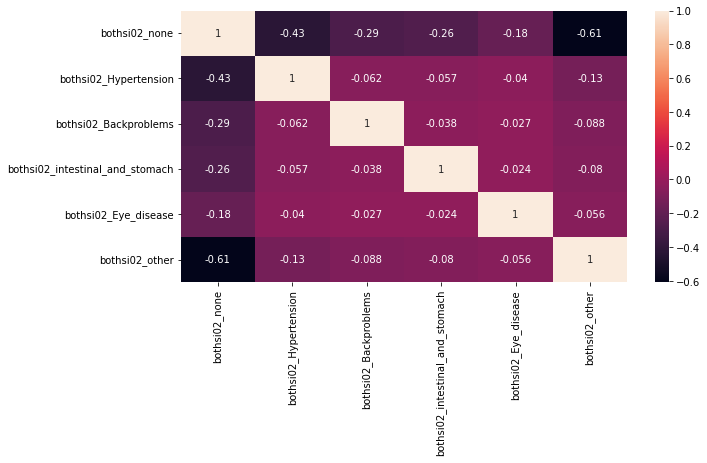

In [117]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAB035_trimmed[['bothsi02_none','bothsi02_Hypertension','bothsi02_Backproblems','bothsi02_intestinal_and_stomach','bothsi02_Eye_disease','bothsi02_other']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [118]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAB035_trimmed.bothsi02_none))
print(target.corr(LASAB035_trimmed.bothsi02_other)) # keep

0.02939491847671546
-0.0627576856962957


In [119]:
# Drop bothsi02_none and bothsi02
LASAB035_trimmed.drop(columns = ['bothsi02_none','bothsi02'], inplace = True)
LASAC035_trimmed.drop(columns = ['cothsi02_none','cothsi02'], inplace = True)
LASAD035_trimmed.drop(columns = ['dothsi02_none','dothsi02'], inplace = True)


In [120]:
# One hot encode bothsi08 so that they are separated into different categories
# Top 5 diseases
# bothsi08_none
# bothsi08_Hypertension
# bothsi08_Backproblems, hernia
# bothsi08_intestinal_and_stomach
# bothsi08_Eye_disease
# bothsi08_other
LASAB035_trimmed['bothsi08_none'] = (LASAB035_trimmed.bothsi08 == 'No').astype(int)
LASAB035_trimmed['bothsi08_Hypertension'] = (LASAB035_trimmed.bothsi08 == 'Hypertension').astype(int)
LASAB035_trimmed['bothsi08_Backproblems'] = (LASAB035_trimmed.bothsi08 == 'Backproblems, hernia').astype(int)
LASAB035_trimmed['bothsi08_intestinal_and_stomach'] = (LASAB035_trimmed.bothsi08 == 'Serious intestinal disease').astype(int) + (LASAB035_trimmed.bothsi08 == 'Ulcer stomach or duodenum').astype(int)
LASAB035_trimmed['bothsi08_Eye_disease'] = (LASAB035_trimmed.bothsi08 == 'Eye diseases').astype(int)
LASAB035_trimmed['bothsi08_Na'] = (LASAB035_trimmed.bothsi08 == 'Na').astype(int)
LASAB035_trimmed['bothsi08_other'] = 1 - (LASAB035_trimmed['bothsi08_none']+LASAB035_trimmed['bothsi08_Hypertension']+LASAB035_trimmed['bothsi08_Backproblems']+LASAB035_trimmed['bothsi08_intestinal_and_stomach']+LASAB035_trimmed['bothsi08_Eye_disease']+LASAB035_trimmed['bothsi08_Na'])
LASAB035_trimmed.drop(columns = 'bothsi08_Na', inplace = True)

# C
LASAC035_trimmed['cothsi08_none'] = (LASAC035_trimmed.cothsi08 == 'No').astype(int)
LASAC035_trimmed['cothsi08_Hypertension'] = (LASAC035_trimmed.cothsi08 == 'Hypertension').astype(int)
LASAC035_trimmed['cothsi08_Backproblems'] = (LASAC035_trimmed.cothsi08 == 'Backproblems, hernia').astype(int)
LASAC035_trimmed['cothsi08_intestinal_and_stomach'] = (LASAC035_trimmed.cothsi08 == 'Serious intestinal disea').astype(int) + (LASAC035_trimmed.cothsi08 == 'Ulcer stomach or duodenu').astype(int)
LASAC035_trimmed['cothsi08_Eye_disease'] = (LASAC035_trimmed.cothsi08 == 'Eye diseases').astype(int)
LASAC035_trimmed['cothsi08_Na'] = (LASAC035_trimmed.cothsi08 == 'Na').astype(int)
LASAC035_trimmed['cothsi08_other'] = 1 - (LASAC035_trimmed['cothsi08_none']+LASAC035_trimmed['cothsi08_Hypertension']+LASAC035_trimmed['cothsi08_Backproblems']+LASAC035_trimmed['cothsi08_intestinal_and_stomach']+LASAC035_trimmed['cothsi08_Eye_disease']+LASAC035_trimmed['cothsi08_Na'])
LASAC035_trimmed.drop(columns = 'cothsi08_Na', inplace = True)

# D
LASAD035_trimmed['dothsi08_none'] = (LASAD035_trimmed.dothsi08 == 'No').astype(int)
LASAD035_trimmed['dothsi08_Hypertension'] = (LASAD035_trimmed.dothsi08 == 'Hypertension').astype(int)
LASAD035_trimmed['dothsi08_Backproblems'] = (LASAD035_trimmed.dothsi08 == 'Backproblems, hernia').astype(int)
LASAD035_trimmed['dothsi08_intestinal_and_stomach'] = (LASAD035_trimmed.dothsi08 == 'Serious intestinal disea').astype(int) + (LASAD035_trimmed.dothsi08 == 'Ulcer stomach or duodenu').astype(int)
LASAD035_trimmed['dothsi08_Eye_disease'] = (LASAD035_trimmed.dothsi08 == '-> to be coded  <- (Eye)').astype(int)
LASAD035_trimmed['dothsi08_Na'] = (LASAD035_trimmed.dothsi08 == 'Na').astype(int)
LASAD035_trimmed['dothsi08_other'] = 1 - (LASAD035_trimmed['dothsi08_none']+LASAD035_trimmed['dothsi08_Hypertension']+LASAD035_trimmed['dothsi08_Backproblems']+LASAD035_trimmed['dothsi08_intestinal_and_stomach']+LASAD035_trimmed['dothsi08_Eye_disease']+LASAD035_trimmed['dothsi08_Na'])
LASAD035_trimmed.drop(columns = 'dothsi08_Na', inplace = True)

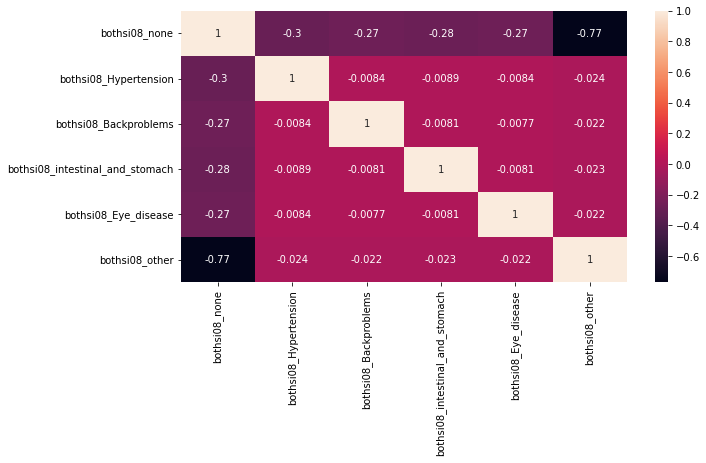

In [121]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAB035_trimmed[['bothsi08_none','bothsi08_Hypertension','bothsi08_Backproblems','bothsi08_intestinal_and_stomach','bothsi08_Eye_disease','bothsi08_other']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [122]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAB035_trimmed.bothsi08_none)) # keep
print(target.corr(LASAB035_trimmed.bothsi08_other))

0.04728486135562424
-0.04090101245139177


In [125]:
# Drop bothsi08_other and bothsi08
LASAB035_trimmed.drop(columns = ['bothsi08_other','bothsi08'], inplace = True)
LASAC035_trimmed.drop(columns = ['cothsi08_other','cothsi08'], inplace = True)
LASAD035_trimmed.drop(columns = ['dothsi08_other','dothsi08'], inplace = True)


In [126]:
## Convert Any Yes, to 1.0 don't take into account specialist vs family physician for now
LASAB035_trimmed.replace('Yes', '1.0', inplace = True)
LASAB035_trimmed.replace('mentioned', '1.0', inplace = True)
LASAB035_trimmed.replace('Yes, specialist', '1.0', inplace = True)
LASAB035_trimmed.replace('Yes, family physician', '1.0', inplace = True)
LASAB035_trimmed.replace('No', '0.0', inplace = True)
LASAB035_trimmed.replace('Nee', '0.0', inplace = True)
LASAB035_trimmed.replace('not mentioned', '0.0', inplace = True)

# Convert 
LASAB035_trimmed.replace('Yes, with heavy exertion', '1.0', inplace = True)
LASAB035_trimmed.replace('Yes, with light exertion', '2.0', inplace = True)
LASAB035_trimmed.replace('Yes, at rest', '3.0', inplace = True)

# Convert
LASAB035_trimmed.replace('Not at all', '0.0', inplace = True)
LASAB035_trimmed.replace('Sometimes', '1.0', inplace = True)
LASAB035_trimmed.replace('Often', '2.0', inplace = True)
LASAB035_trimmed.replace('Always', '3.0', inplace = True)

# Convert 
LASAB035_trimmed.replace('Once', '1.0', inplace = True)
LASAB035_trimmed.replace('Two times or more', '2.0', inplace = True)

# Convert 
LASAB035_trimmed.replace('2 times a month or less', '1.0', inplace = True)
LASAB035_trimmed.replace('3-4 times a month', '2.0', inplace = True)
LASAB035_trimmed.replace('a few times a week', '3.0', inplace = True)
LASAB035_trimmed.replace('daily', '4.0', inplace = True)

# Convert
LASAB035_trimmed.replace('no rheumatic hands', '0.0', inplace = True)
LASAB035_trimmed.replace('rheumatic hands', '1.0', inplace = True)

# Convert 
LASAB035_trimmed.replace('Only by certain occassio', '1.0', inplace = True)
LASAB035_trimmed.replace('Yes, most of the time', '2.0', inplace = True)

# C
## Convert Any Yes, to 1.0 don't take into account specialist vs family physician for now
LASAC035_trimmed.replace('Yes', '1.0', inplace = True)
LASAC035_trimmed.replace('Ja', '1.0', inplace = True)
LASAC035_trimmed.replace('mentioned', '1.0', inplace = True)
LASAC035_trimmed.replace('Mentioned', '1.0', inplace = True)
LASAC035_trimmed.replace('Yes, specialist', '1.0', inplace = True)
LASAC035_trimmed.replace('Yes, family physician', '1.0', inplace = True)

LASAC035_trimmed.replace('No', '0.0', inplace = True)
LASAC035_trimmed.replace('Nee', '0.0', inplace = True)
LASAC035_trimmed.replace('No, never', '0.0', inplace = True)
LASAC035_trimmed.replace('not mentioned', '0.0', inplace = True)
LASAC035_trimmed.replace('Not mentioned', '0.0', inplace = True)



# Convert 
LASAC035_trimmed.replace('Yes, with heavy exertion', '1.0', inplace = True)
LASAC035_trimmed.replace('Yes, with light exertion', '2.0', inplace = True)
LASAC035_trimmed.replace('Yes, at rest', '3.0', inplace = True)

# Convert
LASAC035_trimmed.replace('Not at all', '0.0', inplace = True)
LASAC035_trimmed.replace('Sometimes', '1.0', inplace = True)
LASAC035_trimmed.replace('Often', '2.0', inplace = True)
LASAC035_trimmed.replace('Always', '3.0', inplace = True)

# Convert 
LASAC035_trimmed.replace('Once', '1.0', inplace = True)
LASAC035_trimmed.replace('Two times or more', '2.0', inplace = True)

# Convert 
LASAC035_trimmed.replace('2 times a month or less', '1.0', inplace = True)
LASAC035_trimmed.replace('3-4 times a month', '2.0', inplace = True)
LASAC035_trimmed.replace('a few times a week', '3.0', inplace = True)
LASAC035_trimmed.replace('daily', '4.0', inplace = True)

# Convert
LASAC035_trimmed.replace('no rheumatic hands', '0.0', inplace = True)
LASAC035_trimmed.replace('rheumatic hands', '1.0', inplace = True)

# Convert 
LASAC035_trimmed.replace('Only on certain occasion', '1.0', inplace = True)
LASAC035_trimmed.replace('Yes, most of the time', '2.0', inplace = True)

# D
## Convert Any Yes, to 1.0 don't take into account specialist vs family physician for now
LASAD035_trimmed.replace('Yes', '1.0', inplace = True)
LASAD035_trimmed.replace('Ja', '1.0', inplace = True)
LASAD035_trimmed.replace('mentioned', '1.0', inplace = True)
LASAD035_trimmed.replace('Mentioned', '1.0', inplace = True)
LASAD035_trimmed.replace('Yes, specialist', '1.0', inplace = True)
LASAD035_trimmed.replace('Yes, family physician', '1.0', inplace = True)

LASAD035_trimmed.replace('No', '0.0', inplace = True)
LASAD035_trimmed.replace('Nee', '0.0', inplace = True)
LASAD035_trimmed.replace('No,', '0.0', inplace = True)
LASAD035_trimmed.replace('No, never', '0.0', inplace = True)
LASAD035_trimmed.replace('not mentioned', '0.0', inplace = True)
LASAD035_trimmed.replace('Not mentioned', '0.0', inplace = True)


# Convert 
LASAD035_trimmed.replace('Yes, with heavy exertion', '1.0', inplace = True)
LASAD035_trimmed.replace('Yes, with light exertion', '2.0', inplace = True)
LASAD035_trimmed.replace('Yes, at rest', '3.0', inplace = True)

# Convert
LASAD035_trimmed.replace('Not at all', '0.0', inplace = True)
LASAD035_trimmed.replace('Sometimes', '1.0', inplace = True)
LASAD035_trimmed.replace('Often', '2.0', inplace = True)
LASAD035_trimmed.replace('Always', '3.0', inplace = True)

# Convert 
LASAD035_trimmed.replace('Once', '1.0', inplace = True)
LASAD035_trimmed.replace('Two times or more', '2.0', inplace = True)

# Convert 
LASAD035_trimmed.replace('2 times a month or less', '1.0', inplace = True)
LASAD035_trimmed.replace('3-4 times a month', '2.0', inplace = True)
LASAD035_trimmed.replace('a few times a week', '3.0', inplace = True)
LASAD035_trimmed.replace('daily', '4.0', inplace = True)

# Convert
LASAD035_trimmed.replace('no rheumatic hands', '0.0', inplace = True)
LASAD035_trimmed.replace('rheumatic hands', '1.0', inplace = True)

# Convert 
LASAD035_trimmed.replace('Only by certain occassio', '1.0', inplace = True)
LASAD035_trimmed.replace('Yes, most of the time', '2.0', inplace = True)

In [127]:
# Convert all columns to numeric except bothsi02, bothsi08, 
for i in LASAB035_trimmed.columns:
    LASAB035_trimmed[i] = pd.to_numeric(LASAB035_trimmed[i], errors = 'coerce')
for i in LASAC035_trimmed.columns:
    LASAC035_trimmed[i] = pd.to_numeric(LASAC035_trimmed[i], errors = 'coerce')
for i in LASAD035_trimmed.columns:
    LASAD035_trimmed[i] = pd.to_numeric(LASAD035_trimmed[i], errors = 'coerce')

In [128]:
# Save files to output folder
LASAB035_trimmed.to_csv(path + 'output/LASAB035_trimmed.csv', index=False)
LASAC035_trimmed.to_csv(path + 'output/LASAC035_trimmed.csv', index=False)
LASAD035_trimmed.to_csv(path + 'output/LASAD035_trimmed.csv', index=False)

## LASA 036
#### Self-Perceived Health

In [ ]:
# Read in LASA 035 files
LASAB036 = pd.read_spss(path + "lasafiles/LASAB036.SAV")
LASAC036 = pd.read_spss(path + "lasafiles/LASAC036.SAV")
LASAD036 = pd.read_spss(path + "lasafiles/LASAD036.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB036_trimmed = LASAB036[LASAB036.respnr.isin(B_individuals)]
LASAB036_trimmed = LASAB036_trimmed.reset_index(drop = True)
# C
LASAC036_trimmed = LASAC036[LASAC036.respnr.isin(C_individuals)]
LASAC036_trimmed = LASAC036_trimmed.reset_index(drop = True)
# D
LASAD036_trimmed = LASAD036[LASAD036.respnr.isin(D_individuals)]
LASAD036_trimmed = LASAD036_trimmed.reset_index(drop = True)
print()

In [ ]:
# Fix Na Values:
# B
LASAB036_trimmed['bsubhea1'] = LASAB036_trimmed['bsubhea1'].replace('Na, interview terminated', 'Na')
LASAB036_trimmed['bsubhea1'] = LASAB036_trimmed['bsubhea1'].replace('Na, asked', 'Na')
LASAB036_trimmed['bsubhea2'] = LASAB036_trimmed['bsubhea2'].replace('Na, interview terminated', 'Na')
LASAB036_trimmed['bsubhea2'] = LASAB036_trimmed['bsubhea2'].replace('Na, asked', 'Na')
# C
LASAC036_trimmed['csubhea1'] = LASAC036_trimmed['csubhea1'].replace('Na, interview terminated', 'Na')
LASAC036_trimmed['csubhea1'] = LASAC036_trimmed['csubhea1'].replace('Na, asked', 'Na')
LASAC036_trimmed['csubhea2'] = LASAC036_trimmed['csubhea2'].replace('Na, interview terminated', 'Na')
LASAC036_trimmed['csubhea2'] = LASAC036_trimmed['csubhea2'].replace('Na, asked', 'Na')
# D
LASAD036_trimmed['dsubhea1'] = LASAD036_trimmed['dsubhea1'].replace('Na, interview terminated', 'Na')
LASAD036_trimmed['dsubhea1'] = LASAD036_trimmed['dsubhea1'].replace('Na, asked', 'Na')
LASAD036_trimmed['dsubhea2'] = LASAD036_trimmed['dsubhea2'].replace('Na, interview terminated', 'Na')
LASAD036_trimmed['dsubhea2'] = LASAD036_trimmed['dsubhea2'].replace('Na, asked', 'Na')

In [ ]:
# Recode bsubhea1 and bsubhea2
LASAB036_trimmed.replace('Excellent', '1.0', inplace = True)
LASAB036_trimmed.replace('Good', '2.0', inplace = True)
LASAB036_trimmed.replace('Fair', '3.0', inplace = True)
LASAB036_trimmed.replace('Sometimes good/bad', '4.0', inplace = True)
LASAB036_trimmed.replace('Poor', '5.0', inplace = True)

LASAB036_trimmed.replace('Much better', '1.0', inplace = True)
LASAB036_trimmed.replace('A little better', '2.0', inplace = True)
LASAB036_trimmed.replace('Do not know/just as good', '3.0', inplace = True)
LASAB036_trimmed.replace('A little worse', '4.0', inplace = True)
LASAB036_trimmed.replace('Much worse', '5.0', inplace = True)

# Recode bsubhea1 and bsubhea2
LASAC036_trimmed.replace('Excellent', '1.0', inplace = True)
LASAC036_trimmed.replace('Good', '2.0', inplace = True)
LASAC036_trimmed.replace('Fair', '3.0', inplace = True)
LASAC036_trimmed.replace('Sometimes good/bad', '4.0', inplace = True)
LASAC036_trimmed.replace('Poor', '5.0', inplace = True)

LASAC036_trimmed.replace('Much better', '1.0', inplace = True)
LASAC036_trimmed.replace('A little better', '2.0', inplace = True)
LASAC036_trimmed.replace('Do not know/just as good as other', '3.0', inplace = True)
LASAC036_trimmed.replace('A little worse', '4.0', inplace = True)
LASAC036_trimmed.replace('Much worse', '5.0', inplace = True)

# Recode bsubhea1 and bsubhea2
LASAD036_trimmed.replace('Excellent', '1.0', inplace = True)
LASAD036_trimmed.replace('Good', '2.0', inplace = True)
LASAD036_trimmed.replace('Fair', '3.0', inplace = True)
LASAD036_trimmed.replace('Sometimes good/bad', '4.0', inplace = True)
LASAD036_trimmed.replace('Poor', '5.0', inplace = True)

LASAD036_trimmed.replace('Much better', '1.0', inplace = True)
LASAD036_trimmed.replace('A little better', '2.0', inplace = True)
LASAD036_trimmed.replace('Do not know/just as good as other', '3.0', inplace = True)
LASAD036_trimmed.replace('A little worse', '4.0', inplace = True)
LASAD036_trimmed.replace('Much worse', '5.0', inplace = True)

In [ ]:
for i in LASAB036_trimmed.columns:
    LASAB036_trimmed[i] = pd.to_numeric(LASAB036_trimmed[i], errors = 'coerce')
for i in LASAC036_trimmed.columns:
    LASAC036_trimmed[i] = pd.to_numeric(LASAC036_trimmed[i], errors = 'coerce')
for i in LASAD036_trimmed.columns:
    LASAD036_trimmed[i] = pd.to_numeric(LASAD036_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB036_trimmed.to_csv(path + 'output/LASAB036_trimmed.csv', index=False)
LASAC036_trimmed.to_csv(path + 'output/LASAC036_trimmed.csv', index=False)
LASAD036_trimmed.to_csv(path + 'output/LASAD036_trimmed.csv', index=False)

## LASA 044
#### Contact Health and Social Services

In [ ]:
# Read in LASA 044 files
LASAB044 = pd.read_spss(path + "lasafiles/LASAB044.SAV")
LASAC044 = pd.read_spss(path + "lasafiles/LASAC044.SAV")
LASAD044 = pd.read_spss(path + "lasafiles/LASAD044.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB044_trimmed = LASAB044[LASAB044.respnr.isin(B_individuals)]
LASAB044_trimmed = LASAB044_trimmed.reset_index(drop = True)
# C
LASAC044_trimmed = LASAC044[LASAC044.respnr.isin(C_individuals)]
LASAC044_trimmed = LASAC044_trimmed.reset_index(drop = True)
# D
LASAD044_trimmed = LASAD044[LASAD044.respnr.isin(D_individuals)]
LASAD044_trimmed = LASAD044_trimmed.reset_index(drop = True)
print()

In [ ]:
LASAB044_trimmed.blst1k09.value_counts()

In [ ]:
LASAB044_trimmed

In [ ]:
# Fix LASAB before selecting columns, because some depend on columns only present in B
for na_col in LASAB044_trimmed.columns:
    for x in range(len(LASAB044_trimmed)):
        fix_na(LASAB044_trimmed, na_col, x)

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB044_trimmed.columns.str[1:], LASAC044_trimmed.columns.str[1:])
#print(a)
b = np.intersect1d(a, LASAD044_trimmed.columns.str[1:])
b = b.tolist()
b.remove('espnr')
b = np.array(b)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB044_trimmed = LASAB044_trimmed[b_cols]
LASAC044_trimmed = LASAC044_trimmed[c_cols]
LASAD044_trimmed = LASAD044_trimmed[d_cols]

In [ ]:
# Replace all No answers with NA
LASAB044_trimmed.replace('Na, short interview', 'Na', inplace = True)
LASAB044_trimmed.replace('no answer, short version', 'Na', inplace = True)
LASAB044_trimmed.replace('No answer, wrong skip', 'Na', inplace = True)

# C
LASAC044_trimmed.replace('Na, short interview', 'Na', inplace = True)
LASAC044_trimmed.replace('no answer, short version', 'Na', inplace = True)
LASAC044_trimmed.replace('No answer, wrong skip', 'Na', inplace = True)


# D
LASAD044_trimmed.replace('Na, short interview', 'Na', inplace = True)
LASAD044_trimmed.replace('no answer, short version', 'Na', inplace = True)
LASAD044_trimmed.replace('No answer, wrong skip', 'Na', inplace = True)


In [ ]:
for na_col in LASAC044_trimmed.columns:
    for x in range(len(LASAC044_trimmed)):
        fix_na(LASAC044_trimmed, na_col, x)
for na_col in LASAD044_trimmed.columns:
    for x in range(len(LASAD044_trimmed)):
        fix_na(LASAD044_trimmed, na_col, x)

In [ ]:
# Load Bhindep
# Read in LASA 012 files
LASAB014 = pd.read_spss(path + "lasafiles/LASAB014.SAV")
LASAC014 = pd.read_spss(path + "lasafiles/LASAC014.SAV")
LASAD014 = pd.read_spss(path + "lasafiles/LASAD014.SAV")
# Select appropriate individuals
# B
LASAB014_trimmed = LASAB014[LASAB014.respnr.isin(B_individuals)]
LASAB014_trimmed = LASAB014_trimmed.reset_index(drop = True)
# C
LASAC014_trimmed = LASAC014[LASAC014.respnr.isin(C_individuals)]
LASAC014_trimmed = LASAC014_trimmed.reset_index(drop = True)
# D
LASAD014_trimmed = LASAD014[LASAD014.respnr.isin(D_individuals)]
LASAD014_trimmed = LASAD014_trimmed.reset_index(drop = True)
print()

In [ ]:
# Replace values in 44 with values from bhindep
for i in LASAB044_trimmed.columns:
    LASAB044_trimmed[i] = np.where(LASAB044_trimmed[i] == 'Na, see BHINDEP', '1.0', LASAB044_trimmed[i])
# Replace values in 44 with values from bhindep
for i in LASAC044_trimmed.columns:
    LASAC044_trimmed[i] = np.where(LASAC044_trimmed[i] == 'Na, see CHINDEP', '1.0', LASAC044_trimmed[i])
# Replace values in 44 with values from bhindep
for i in LASAD044_trimmed.columns:
    LASAD044_trimmed[i] = np.where(LASAD044_trimmed[i] == 'Na, see DHINDEP', '1.0', LASAD044_trimmed[i])

In [ ]:
# Convert Not mentioned and Mentioned to 0.0 and 1.0
LASAB044_trimmed.replace('Not mentioned', '0.0', inplace = True)
LASAB044_trimmed.replace('Mentioned', '1.0', inplace = True)

# Convert Not mentioned and Mentioned to 0.0 and 1.0
LASAC044_trimmed.replace('Not mentioned', '0.0', inplace = True)
LASAC044_trimmed.replace('Mentioned', '1.0', inplace = True)

LASAD044_trimmed.replace('Not mentioned', '0.0', inplace = True)
LASAD044_trimmed.replace('Mentioned', '1.0', inplace = True)

In [ ]:
for i in LASAB044_trimmed.columns:
    LASAB044_trimmed[i] = pd.to_numeric(LASAB044_trimmed[i], errors = 'coerce')
for i in LASAC044_trimmed.columns:
    LASAC044_trimmed[i] = pd.to_numeric(LASAC044_trimmed[i], errors = 'coerce')
for i in LASAD044_trimmed.columns:
    LASAD044_trimmed[i] = pd.to_numeric(LASAD044_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB044_trimmed.to_csv(path + 'output/LASAB044_trimmed.csv', index=False)
LASAC044_trimmed.to_csv(path + 'output/LASAC044_trimmed.csv', index=False)
LASAD044_trimmed.to_csv(path + 'output/LASAD044_trimmed.csv', index=False)

## LASA 045
#### Hospital Admission

In [ ]:
# Read in LASA 045 files
LASAB045 = pd.read_spss(path + "lasafiles/LASAB045.SAV")
LASAC045 = pd.read_spss(path + "lasafiles/LASAC045.SAV")
LASAD045 = pd.read_spss(path + "lasafiles/LASAD045.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB045_trimmed = LASAB045[LASAB045.respnr.isin(B_individuals)]
LASAB045_trimmed = LASAB045_trimmed.reset_index(drop = True)
# C
LASAC045_trimmed = LASAC045[LASAC045.respnr.isin(C_individuals)]
LASAC045_trimmed = LASAC045_trimmed.reset_index(drop = True)
# D
LASAD045_trimmed = LASAD045[LASAD045.respnr.isin(D_individuals)]
LASAD045_trimmed = LASAD045_trimmed.reset_index(drop = True)
print()

In [ ]:
# Fix Na Values:
# B
LASAB045_trimmed['bmedspec'] = LASAB045_trimmed['bmedspec'].replace('Na, interview terminated', 'Na')
LASAB045_trimmed['bmedspec'] = LASAB045_trimmed['bmedspec'].replace('Na, asked', 'Na')
LASAB045_trimmed['bhosp'] = LASAB045_trimmed['bhosp'].replace('Na, asked', 'Na')
LASAB045_trimmed['bhosp'] = np.where(LASAB045_trimmed['bhosp'] == 'Na, see BMEDSPEC', LASAB045_trimmed['bmedspec'], LASAB045_trimmed['bhosp'])
LASAB045_trimmed['bpsych'] = LASAB045_trimmed['bpsych'].replace('Na, asked', 'Na')
LASAB045_trimmed['bpsych'] = np.where(LASAB045_trimmed['bpsych'] == 'Na, see BMEDSPEC', LASAB045_trimmed['bmedspec'], LASAB045_trimmed['bpsych'])
LASAB045_trimmed['bpsyhosp'] = LASAB045_trimmed['bpsyhosp'].replace('Na, asked', 'Na')
LASAB045_trimmed['bpsyhosp'] = np.where(LASAB045_trimmed['bpsyhosp'] == 'Na, see BPSYCH', LASAB045_trimmed['bpsych'], LASAB045_trimmed['bpsyhosp'])
# C
LASAC045_trimmed['cmedspec'] = LASAC045_trimmed['cmedspec'].replace('Na, interview terminated', 'Na')
LASAC045_trimmed['cmedspec'] = LASAC045_trimmed['cmedspec'].replace('Na, asked', 'Na')
LASAC045_trimmed['chosp'] = LASAC045_trimmed['chosp'].replace('Na, interview terminated', 'Na')
LASAC045_trimmed['chosp'] = LASAC045_trimmed['chosp'].replace('Na, asked', 'Na')
LASAC045_trimmed['chosp'] = np.where(LASAC045_trimmed['chosp'] == 'Na, see CMEDSPEC', LASAC045_trimmed['cmedspec'], LASAC045_trimmed['chosp'])
LASAC045_trimmed['cpsych'] = LASAC045_trimmed['cpsych'].replace('Na, interview terminated', 'Na')
LASAC045_trimmed['cpsych'] = LASAC045_trimmed['cpsych'].replace('Na, asked', 'Na')
LASAC045_trimmed['cpsych'] = np.where(LASAC045_trimmed['cpsych'] == 'Na, see CMEDSPEC', LASAC045_trimmed['cmedspec'], LASAC045_trimmed['cpsych'])
LASAC045_trimmed['cpsyhosp'] = LASAC045_trimmed['cpsyhosp'].replace('Na, interview terminated', 'Na')
LASAC045_trimmed['cpsyhosp'] = LASAC045_trimmed['cpsyhosp'].replace('Na, asked', 'Na')
LASAC045_trimmed['cpsyhosp'] = np.where(LASAC045_trimmed['cpsyhosp'] == 'Na, see CPSYCH', LASAC045_trimmed['cpsych'], LASAC045_trimmed['cpsyhosp'])
# D
LASAD045_trimmed['dmedspec'] = LASAD045_trimmed['dmedspec'].replace('Na, interview terminated', 'Na')
LASAD045_trimmed['dmedspec'] = LASAD045_trimmed['dmedspec'].replace('Na, asked', 'Na')
LASAD045_trimmed['dhosp'] = LASAD045_trimmed['dhosp'].replace('Na, interview terminated', 'Na')
LASAD045_trimmed['dhosp'] = LASAD045_trimmed['dhosp'].replace('Na, asked', 'Na')
LASAD045_trimmed['dhosp'] = np.where(LASAD045_trimmed['dhosp'] == 'Na, see DMEDSPEC', LASAD045_trimmed['dmedspec'], LASAD045_trimmed['dhosp'])
LASAD045_trimmed['dpsych'] = LASAD045_trimmed['dpsych'].replace('Na, interview terminated', 'Na')
LASAD045_trimmed['dpsych'] = LASAD045_trimmed['dpsych'].replace('Na, asked', 'Na')
LASAD045_trimmed['dpsych'] = np.where(LASAD045_trimmed['dpsych'] == 'Na, see DMEDSPEC', LASAD045_trimmed['dmedspec'], LASAD045_trimmed['dpsych'])
LASAD045_trimmed['dpsyhosp'] = LASAD045_trimmed['dpsyhosp'].replace('Na, interview terminated', 'Na')
LASAD045_trimmed['dpsyhosp'] = LASAD045_trimmed['dpsyhosp'].replace('Na, asked', 'Na')
LASAD045_trimmed['dpsyhosp'] = np.where(LASAD045_trimmed['dpsyhosp'] == 'Na, see DPSYCH', LASAD045_trimmed['dpsych'], LASAD045_trimmed['dpsyhosp'])


In [ ]:
# Replace No with 0.0 and Yes with 1.0
LASAB045_trimmed.replace('No', '0.0', inplace = True)
LASAB045_trimmed.replace('Yes', '1.0', inplace = True)

LASAC045_trimmed.replace('No', '0.0', inplace = True)
LASAC045_trimmed.replace('Yes', '1.0', inplace = True)

LASAD045_trimmed.replace('no', '0.0', inplace = True)
LASAD045_trimmed.replace('yes', '1.0', inplace = True)

In [ ]:
for i in LASAB045_trimmed.columns:
    LASAB045_trimmed[i] = pd.to_numeric(LASAB045_trimmed[i], errors = 'coerce')
for i in LASAC045_trimmed.columns:
    LASAC045_trimmed[i] = pd.to_numeric(LASAC045_trimmed[i], errors = 'coerce')
for i in LASAD045_trimmed.columns:
    LASAD045_trimmed[i] = pd.to_numeric(LASAD045_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB045_trimmed.to_csv(path + 'output/LASAB045_trimmed.csv', index=False)
LASAC045_trimmed.to_csv(path + 'output/LASAC045_trimmed.csv', index=False)
LASAD045_trimmed.to_csv(path + 'output/LASAD045_trimmed.csv', index=False)

## LASA 046
#### physical activity

In [132]:
# Read in LASA 045 files
LASAB046 = pd.read_spss(path + "lasafiles/LASAB046.SAV")
LASAC046 = pd.read_spss(path + "lasafiles/LASAC046.SAV")
LASAD046 = pd.read_spss(path + "lasafiles/LASAD046.SAV")

In [133]:
# Select appropriate individuals
# B
LASAB046_trimmed = LASAB046[LASAB046.respnr.isin(B_individuals)]
LASAB046_trimmed = LASAB046_trimmed.reset_index(drop = True)
# C
LASAC046_trimmed = LASAC046[LASAC046.respnr.isin(C_individuals)]
LASAC046_trimmed = LASAC046_trimmed.reset_index(drop = True)
# D
LASAD046_trimmed = LASAD046[LASAD046.respnr.isin(D_individuals)]
LASAD046_trimmed = LASAD046_trimmed.reset_index(drop = True)
print()

In [134]:
for na_col in LASAB046_trimmed.columns:
    for x in range(len(LASAB046_trimmed)):
        fix_na(LASAB046_trimmed, na_col, x)
for na_col in LASAC046_trimmed.columns:
    for x in range(len(LASAC046_trimmed)):
        fix_na(LASAC046_trimmed, na_col, x)
for na_col in LASAD046_trimmed.columns:
    for x in range(len(LASAD046_trimmed)):
        fix_na(LASAD046_trimmed, na_col, x)

/tmp/ipykernel_3426601/2931094667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[na_col][x] = df[i][x]


In [135]:
# Replace all No answers with NA
LASAB046_trimmed.replace('Na, asked', 'Na', inplace = True)
LASAB046_trimmed.replace('no answer, short version', 'Na', inplace = True)
LASAB046_trimmed.replace('No answer, wrong skip', 'Na', inplace = True)

# C
LASAC046_trimmed.replace('Na, asked', 'Na', inplace = True)
LASAC046_trimmed.replace('no answer, short version', 'Na', inplace = True)
LASAC046_trimmed.replace('No answer, wrong skip', 'Na', inplace = True)


# D
LASAD046_trimmed.replace('Na, asked', 'Na', inplace = True)
LASAD046_trimmed.replace('no answer, short version', 'Na', inplace = True)
LASAD046_trimmed.replace('No answer, wrong skip', 'Na', inplace = True)


In [136]:
# blphya01-05 are all the same, delete all except first one
LASAB046_trimmed.drop(columns = ['blphya02','blphya03','blphya04','blphya05', 'blphya22','blphya26'], inplace = True)
LASAC046_trimmed.drop(columns = ['clphya02','clphya03','clphya04','clphya05', 'clphya22','clphya26'], inplace = True)
LASAD046_trimmed.drop(columns = ['dlphya02','dlphya03','dlphya04','dlphya05', 'dlphya22','dlphya26'], inplace = True)

# Also remove 22 and 26 for now


In [137]:
print(LASAB046_trimmed.blphya01.value_counts())
print(LASAB046_trimmed.blphya01.value_counts())
print(LASAB046_trimmed.blphya01.value_counts())

not 1 2 or 3                1270
Na, short interview           23
Respondent bedridden           8
Na, interview terminated       3
Na                             2
Respondent in mech. whee       2
Name: blphya01, dtype: int64
not 1 2 or 3                1270
Na, short interview           23
Respondent bedridden           8
Na, interview terminated       3
Na                             2
Respondent in mech. whee       2
Name: blphya01, dtype: int64
not 1 2 or 3                1270
Na, short interview           23
Respondent bedridden           8
Na, interview terminated       3
Na                             2
Respondent in mech. whee       2
Name: blphya01, dtype: int64


In [138]:
# Convert blphya01 to one-hot encoded with able/not able
LASAB046_trimmed['blphya01_able'] = (LASAB046_trimmed.blphya01 == 'not 1 2 or 3').astype(int)
LASAB046_trimmed['blphya01_unable'] = (LASAB046_trimmed.blphya01 == 'Respondent bedridden').astype(int) + (LASAB046_trimmed.blphya01 == 'Respondent in mech. whee').astype(int) +\
                                        (LASAB046_trimmed.blphya01 == 'Respondent in elec. whee').astype(int)
LASAB046_trimmed['blphya01_missing'] = (LASAB046_trimmed.blphya01 == 'Na, interview terminated').astype(int) + (LASAB046_trimmed.blphya01 == 'Na').astype(int)
LASAB046_trimmed.drop(columns = 'blphya01', inplace = True)

LASAC046_trimmed['clphya01_able'] = (LASAC046_trimmed.clphya01 == 'not 1 2 or 3').astype(int)
LASAC046_trimmed['clphya01_unable'] = (LASAC046_trimmed.clphya01 == 'Respondent bedridden').astype(int) + (LASAC046_trimmed.clphya01 == 'Respondent in mech. whee').astype(int) +\
                                        (LASAC046_trimmed.clphya01 == 'Respondent in elec. whee').astype(int)
LASAC046_trimmed['clphya01_missing'] = (LASAC046_trimmed.clphya01 == 'Na, interview terminated').astype(int) + (LASAC046_trimmed.clphya01 == 'Na').astype(int)
LASAC046_trimmed.drop(columns = 'clphya01', inplace = True)

LASAD046_trimmed['dlphya01_able'] = (LASAD046_trimmed.dlphya01 == 'not 1 2 or 3').astype(int)
LASAD046_trimmed['dlphya01_unable'] = (LASAD046_trimmed.dlphya01 == 'Respondent bedridden').astype(int) + (LASAD046_trimmed.dlphya01 == 'R in mech. wheelchair').astype(int) +\
                                        (LASAD046_trimmed.dlphya01 == 'R in elec. wheelchair').astype(int)
LASAD046_trimmed['dlphya01_missing'] = (LASAD046_trimmed.dlphya01 == 'Na, interview terminated').astype(int) + (LASAD046_trimmed.dlphya01 == 'Na').astype(int)
LASAD046_trimmed.drop(columns = 'dlphya01', inplace = True)

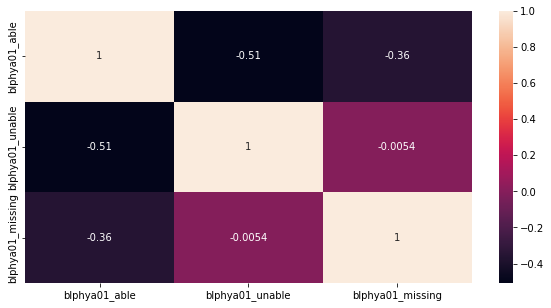

In [139]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAB046_trimmed[['blphya01_able','blphya01_unable','blphya01_missing']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [140]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAB046_trimmed.blphya01_able))
print(target.corr(LASAB046_trimmed.blphya01_unable))

0.11399305963504647
-0.029951881900601277


In [141]:
# Drop bhowner_tenant
LASAB046_trimmed.drop(columns = 'blphya01_unable', inplace = True)
LASAC046_trimmed.drop(columns = 'clphya01_unable', inplace = True)
LASAD046_trimmed.drop(columns = 'dlphya01_unable', inplace = True)

In [142]:
# Replace bedridden and other with No
LASAB046_trimmed.replace('Respondent bedridden', 'No', inplace = True)
LASAB046_trimmed.replace('R in elec. wheelchair', 'No', inplace = True)
LASAB046_trimmed.replace('R in mech. wheelchair', 'No', inplace = True)
LASAB046_trimmed.replace('Respondent in elec. whee', 'No', inplace = True)
LASAB046_trimmed.replace('Respondent in mech. whee', 'No', inplace = True)

# Replace bedridden and other with No
LASAC046_trimmed.replace('Respondent bedridden', 'No', inplace = True)
LASAC046_trimmed.replace('R in elec. wheelchair', 'No', inplace = True)
LASAC046_trimmed.replace('R in mech. wheelchair', 'No', inplace = True)
LASAC046_trimmed.replace('Respondent in elec. whee', 'No', inplace = True)
LASAC046_trimmed.replace('Respondent in mech. whee', 'No', inplace = True)

# Replace bedridden and other with No
LASAD046_trimmed.replace('Respondent bedridden', 'No', inplace = True)
LASAD046_trimmed.replace('R in elec. wheelchair', 'No', inplace = True)
LASAD046_trimmed.replace('R in mech. wheelchair', 'No', inplace = True)
LASAD046_trimmed.replace('Respondent in elec. whee', 'No', inplace = True)
LASAD046_trimmed.replace('Respondent in mech. whee', 'No', inplace = True)


In [143]:
# Replace all No with 0.0 and all Yes with 1.0
LASAB046_trimmed.replace('No', '0.0', inplace = True)
LASAB046_trimmed.replace('Yes', '1.0', inplace = True)
LASAB046_trimmed.replace('Not Mentioned', '0.0', inplace = True)
LASAB046_trimmed.replace('Mentioned', '1.0', inplace = True)

# Replace all No with 0.0 and all Yes with 1.0
LASAC046_trimmed.replace('No', '0.0', inplace = True)
LASAC046_trimmed.replace('Yes', '1.0', inplace = True)
LASAC046_trimmed.replace('Not Mentioned', '0.0', inplace = True)
LASAC046_trimmed.replace('Mentioned', '1.0', inplace = True)

# Replace all No with 0.0 and all Yes with 1.0
LASAD046_trimmed.replace('No', '0.0', inplace = True)
LASAD046_trimmed.replace('Yes', '1.0', inplace = True)
LASAD046_trimmed.replace('Not Mentioned', '0.0', inplace = True)
LASAD046_trimmed.replace('Mentioned', '1.0', inplace = True)



In [144]:
for i in LASAB046_trimmed.columns:
    LASAB046_trimmed[i] = pd.to_numeric(LASAB046_trimmed[i], errors = 'coerce')
for i in LASAC046_trimmed.columns:
    LASAC046_trimmed[i] = pd.to_numeric(LASAC046_trimmed[i], errors = 'coerce')
for i in LASAD046_trimmed.columns:
    LASAD046_trimmed[i] = pd.to_numeric(LASAD046_trimmed[i], errors = 'coerce')

In [145]:
# Save files to output folder
LASAB046_trimmed.to_csv(path + 'output/LASAB046_trimmed.csv', index=False)
LASAC046_trimmed.to_csv(path + 'output/LASAC046_trimmed.csv', index=False)
LASAD046_trimmed.to_csv(path + 'output/LASAD046_trimmed.csv', index=False)

## LASA 047
#### Network Identification

In [ ]:
# Read in LASA 045 files
LASAB047 = pd.read_spss(path + "lasafiles/LASAB047.SAV")
LASAC047 = pd.read_spss(path + "lasafiles/LASAC047.SAV")
LASAD047 = pd.read_spss(path + "lasafiles/LASAD047.SAV")

## LASA 070
#### Social Participation

In [ ]:
# Read in LASA 045 files
LASAB070 = pd.read_spss(path + "lasafiles/LASAB070.SAV")
LASAC070 = pd.read_spss(path + "lasafiles/LASAC070.SAV")
LASAD070 = pd.read_spss(path + "lasafiles/LASAD070.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB070_trimmed = LASAB070[LASAB070.respnr.isin(B_individuals)]
LASAB070_trimmed = LASAB070_trimmed.reset_index(drop = True)
# C
LASAC070_trimmed = LASAC070[LASAC070.respnr.isin(C_individuals)]
LASAC070_trimmed = LASAC070_trimmed.reset_index(drop = True)
# D
LASAD070_trimmed = LASAD070[LASAD070.respnr.isin(D_individuals)]
LASAD070_trimmed = LASAD070_trimmed.reset_index(drop = True)
print()

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB070_trimmed.columns.str[1:], LASAC070_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD070_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB070_trimmed = LASAB070_trimmed[b_cols]
LASAC070_trimmed = LASAC070_trimmed[c_cols]
LASAD070_trimmed = LASAD070_trimmed[d_cols]

In [ ]:
# Replace all No answers with NA
LASAB070_trimmed.replace('No answer, routing', 'Na', inplace = True)
LASAB070_trimmed.replace('no answer, short version', 'Na', inplace = True)
LASAB070_trimmed.replace('No answer, wrong skip', 'Na', inplace = True)
LASAB070_trimmed.replace('interview broken off', 'Na', inplace = True)

# C
LASAC070_trimmed.replace('No answer, routing', 'Na', inplace = True)
LASAC070_trimmed.replace('no answer, short version', 'Na', inplace = True)
LASAC070_trimmed.replace('No answer, wrong skip', 'Na', inplace = True)
LASAC070_trimmed.replace('interview broken off', 'Na', inplace = True)


# D
LASAD070_trimmed.replace('No answer, routing', 'Na', inplace = True)
LASAD070_trimmed.replace('no answer, short version', 'Na', inplace = True)
LASAD070_trimmed.replace('No answer, wrong skip', 'Na', inplace = True)
LASAD070_trimmed.replace('interview broken off', 'Na', inplace = True)


In [ ]:
LASAD070_trimmed

In [ ]:
# If socpyn (are they a member of associations) is no, fill the rest of the columns with No or 0
# If socpyn is Na, fill the rest of columns with Na
for na_col in LASAB070_trimmed.columns:
    for x in range(len(LASAB070_trimmed)):
        fix_na(LASAB070_trimmed, na_col, x)
for na_col in LASAC070_trimmed.columns:
    for x in range(len(LASAC070_trimmed)):
        fix_na(LASAC070_trimmed, na_col, x)
for na_col in LASAD070_trimmed.columns:
    for x in range(len(LASAD070_trimmed)):
        fix_na(LASAD070_trimmed, na_col, x)

In [ ]:
# del var bsocp01 to bsocp26
# bsocp34 to bsocp45
# bsocp56 to bsocp71.
LASAB070_trimmed = LASAB070_trimmed[['respnr', 'bsocp27', 'bsocp28', 'bsocp30', 'bsocp31', 'bsocp33',
       'bsocp46', 'bsocp47', 'bsocp48', 'bsocp49', 'bsocp50', 'bsocp51','bsocp52', 'bsocp54', 'bsocp55', 'bsocpyn']]
LASAC070_trimmed = LASAC070_trimmed[['respnr', 'csocp27', 'csocp28', 'csocp30', 'csocp31', 'csocp33',
       'csocp46', 'csocp47', 'csocp48', 'csocp49', 'csocp50', 'csocp51','csocp52', 'csocp54', 'csocp55', 'csocpyn']]
LASAD070_trimmed = LASAD070_trimmed[['respnr', 'dsocp27', 'dsocp28', 'dsocp30', 'dsocp31', 'dsocp33',
       'dsocp46', 'dsocp47', 'dsocp48', 'dsocp49', 'dsocp50', 'dsocp51','dsocp52', 'dsocp54', 'dsocp55', 'dsocpyn']]

In [ ]:
# if (bsocpyn=1) bsocp27=0.
LASAB070_trimmed['bsocp27'] = np.where(LASAB070_trimmed['bsocpyn'] != 'No', LASAB070_trimmed['bsocp27'], '0')
LASAC070_trimmed['csocp27'] = np.where(LASAC070_trimmed['csocpyn'] != 'No', LASAC070_trimmed['csocp27'], '0')
LASAD070_trimmed['dsocp27'] = np.where(LASAD070_trimmed['dsocpyn'] != 'No', LASAD070_trimmed['dsocp27'], '0')

In [ ]:
# Recode bsocp27 to new variable
LASAB070_trimmed['borg'] = LASAB070_trimmed.bsocp27
LASAB070_trimmed['borg'] = LASAB070_trimmed['borg'].replace('Does not visit', '0')
LASAB070_trimmed['borg'] = LASAB070_trimmed['borg'].replace('Almost never', '1')
LASAB070_trimmed['borg'] = LASAB070_trimmed['borg'].replace('A few times a year', '2')
LASAB070_trimmed['borg'] = LASAB070_trimmed['borg'].replace('Every month', '4')
LASAB070_trimmed['borg'] = LASAB070_trimmed['borg'].replace('A few times a month', '11')
LASAB070_trimmed['borg'] = LASAB070_trimmed['borg'].replace('Every week', '17')
LASAB070_trimmed['borg'] = LASAB070_trimmed['borg'].replace('A few times a week', '59')
LASAB070_trimmed['borg'] = LASAB070_trimmed['borg'].replace('Every day', '100')
LASAB070_trimmed['borg'] = pd.to_numeric(LASAB070_trimmed['borg'], errors='coerce')

# Recode csocp27 to new variable
LASAC070_trimmed['corg'] = LASAC070_trimmed.csocp27
LASAC070_trimmed['corg'] = LASAC070_trimmed['corg'].replace('Does not visit', '0')
LASAC070_trimmed['corg'] = LASAC070_trimmed['corg'].replace('Almost never', '1')
LASAC070_trimmed['corg'] = LASAC070_trimmed['corg'].replace('A few times a year', '2')
LASAC070_trimmed['corg'] = LASAC070_trimmed['corg'].replace('Every month', '4')
LASAC070_trimmed['corg'] = LASAC070_trimmed['corg'].replace('A few times a month', '11')
LASAC070_trimmed['corg'] = LASAC070_trimmed['corg'].replace('Every week', '17')
LASAC070_trimmed['corg'] = LASAC070_trimmed['corg'].replace('A few times a week', '59')
LASAC070_trimmed['corg'] = LASAC070_trimmed['corg'].replace('Every day', '100')
LASAC070_trimmed['corg'] = pd.to_numeric(LASAC070_trimmed['corg'], errors='coerce')

# Recode bsocp27 to new variable
LASAD070_trimmed['dorg'] = LASAD070_trimmed.dsocp27
LASAD070_trimmed['dorg'] = LASAD070_trimmed['dorg'].replace('Does not visit', '0')
LASAD070_trimmed['dorg'] = LASAD070_trimmed['dorg'].replace('Almost never', '1')
LASAD070_trimmed['dorg'] = LASAD070_trimmed['dorg'].replace('A few times a year', '2')
LASAD070_trimmed['dorg'] = LASAD070_trimmed['dorg'].replace('Every month', '4')
LASAD070_trimmed['dorg'] = LASAD070_trimmed['dorg'].replace('A few times a month', '11')
LASAD070_trimmed['dorg'] = LASAD070_trimmed['dorg'].replace('Every week', '17')
LASAD070_trimmed['dorg'] = LASAD070_trimmed['dorg'].replace('A few times a week', '59')
LASAD070_trimmed['dorg'] = LASAD070_trimmed['dorg'].replace('Every day', '100')
LASAD070_trimmed['dorg'] = pd.to_numeric(LASAD070_trimmed['dorg'], errors='coerce')

In [ ]:
LASAB070_trimmed.replace('No answer, asked', 'Na', inplace = True)
LASAC070_trimmed.replace('No answer, asked', 'Na', inplace = True)
LASAD070_trimmed.replace('No answer, asked', 'Na', inplace = True)

# Convert bsocp30 to numeric and replace NaN with 0 hours
# 
LASAB070_trimmed['bsocp30'] = LASAB070_trimmed['bsocp30'].replace('Na', '0.0')
LASAC070_trimmed['csocp30'] = LASAC070_trimmed['csocp30'].replace('Na', '0.0')
LASAD070_trimmed['dsocp30'] = LASAD070_trimmed['dsocp30'].replace('Na', '0.0')


LASAB070_trimmed.bsocp30 = pd.to_numeric(LASAB070_trimmed['bsocp30'], errors = 'coerce')
LASAC070_trimmed.csocp30 = pd.to_numeric(LASAC070_trimmed['csocp30'], errors = 'coerce')
LASAD070_trimmed.dsocp30 = pd.to_numeric(LASAD070_trimmed['dsocp30'], errors = 'coerce')

In [ ]:
#**Minutes administrative work per week recoded to hours per week.
LASAB070_trimmed['badm'] = (LASAB070_trimmed.bsocp30/60)
LASAC070_trimmed['cadm'] = (LASAC070_trimmed.csocp30/60)
LASAD070_trimmed['dadm'] = (LASAD070_trimmed.dsocp30/60)

In [ ]:
# **Minutes volunteer work per week recoded to hours per week.
# if (bsocp27=0 or bsocp31=1) bsocp33=0.
# recode bsocp33 (lowest thru -1=sysmis) (else=copy) into bvol.
# compute bvol = bvol/60. exe.
# var lab bvol Volunteer work hours per week.
# desc bvol
# Replace Na with 0
LASAB070_trimmed['bsocp33'] = LASAB070_trimmed['bsocp33'].replace('Na', '0.0')
LASAC070_trimmed['csocp33'] = LASAC070_trimmed['csocp33'].replace('Na', '0.0')
LASAD070_trimmed['dsocp33'] = LASAD070_trimmed['dsocp33'].replace('Na', '0.0')

LASAB070_trimmed.bsocp33 = pd.to_numeric(LASAB070_trimmed['bsocp33'], errors = 'coerce')
LASAC070_trimmed.csocp33 = pd.to_numeric(LASAC070_trimmed['csocp33'], errors = 'coerce')
LASAD070_trimmed.dsocp33 = pd.to_numeric(LASAD070_trimmed['dsocp33'], errors = 'coerce')

#**Minutes volunteer work per week recoded to hours per week.
LASAB070_trimmed['bvol'] = (LASAB070_trimmed.bsocp33/60)
LASAC070_trimmed['cvol'] = (LASAC070_trimmed.csocp33/60)
LASAD070_trimmed['dvol'] = (LASAD070_trimmed.dsocp33/60)



In [ ]:
#**Frequency of cultural participation based on 7 activities rescaled to 0-100.
#recode bsocp46 to bsocp52 (0=0) (1=1) (2=2) (3=4) (4=11) (5=17) (6=59) (7=100) (else=sysmis).

# Recode bscop46-52 to new variable
LASAB070_trimmed['bsocp46'] = LASAB070_trimmed['bsocp46'].replace('Does not visit', '0')
LASAB070_trimmed['bsocp46'] = LASAB070_trimmed['bsocp46'].replace('Almost never', '1')
LASAB070_trimmed['bsocp46'] = LASAB070_trimmed['bsocp46'].replace('A few times a year', '2')
LASAB070_trimmed['bsocp46'] = LASAB070_trimmed['bsocp46'].replace('Every month', '4')
LASAB070_trimmed['bsocp46'] = LASAB070_trimmed['bsocp46'].replace('A few times a month', '11')
LASAB070_trimmed['bsocp46'] = LASAB070_trimmed['bsocp46'].replace('Every week', '17')
LASAB070_trimmed['bsocp46'] = LASAB070_trimmed['bsocp46'].replace('A few times a week', '59')
LASAB070_trimmed['bsocp46'] = LASAB070_trimmed['bsocp46'].replace('Every day', '100')
LASAB070_trimmed['bsocp46'] = pd.to_numeric(LASAB070_trimmed['bsocp46'], errors='coerce')

LASAB070_trimmed['bsocp47'] = LASAB070_trimmed['bsocp47'].replace('Does not visit', '0')
LASAB070_trimmed['bsocp47'] = LASAB070_trimmed['bsocp47'].replace('Almost never', '1')
LASAB070_trimmed['bsocp47'] = LASAB070_trimmed['bsocp47'].replace('A few times a year', '2')
LASAB070_trimmed['bsocp47'] = LASAB070_trimmed['bsocp47'].replace('Every month', '4')
LASAB070_trimmed['bsocp47'] = LASAB070_trimmed['bsocp47'].replace('A few times a month', '11')
LASAB070_trimmed['bsocp47'] = LASAB070_trimmed['bsocp47'].replace('Every week', '17')
LASAB070_trimmed['bsocp47'] = LASAB070_trimmed['bsocp47'].replace('A few times a week', '59')
LASAB070_trimmed['bsocp47'] = LASAB070_trimmed['bsocp47'].replace('Every day', '100')
LASAB070_trimmed['bsocp47'] = pd.to_numeric(LASAB070_trimmed['bsocp47'], errors='coerce')

LASAB070_trimmed['bsocp48'] = LASAB070_trimmed['bsocp48'].replace('Does not visit', '0')
LASAB070_trimmed['bsocp48'] = LASAB070_trimmed['bsocp48'].replace('Almost never', '1')
LASAB070_trimmed['bsocp48'] = LASAB070_trimmed['bsocp48'].replace('A few times a year', '2')
LASAB070_trimmed['bsocp48'] = LASAB070_trimmed['bsocp48'].replace('Every month', '4')
LASAB070_trimmed['bsocp48'] = LASAB070_trimmed['bsocp48'].replace('A few times a month', '11')
LASAB070_trimmed['bsocp48'] = LASAB070_trimmed['bsocp48'].replace('Every week', '17')
LASAB070_trimmed['bsocp48'] = LASAB070_trimmed['bsocp48'].replace('A few times a week', '59')
LASAB070_trimmed['bsocp48'] = LASAB070_trimmed['bsocp48'].replace('Every day', '100')
LASAB070_trimmed['bsocp48'] = pd.to_numeric(LASAB070_trimmed['bsocp48'], errors='coerce')

LASAB070_trimmed['bsocp49'] = LASAB070_trimmed['bsocp49'].replace('Does not visit', '0')
LASAB070_trimmed['bsocp49'] = LASAB070_trimmed['bsocp49'].replace('Almost never', '1')
LASAB070_trimmed['bsocp49'] = LASAB070_trimmed['bsocp49'].replace('A few times a year', '2')
LASAB070_trimmed['bsocp49'] = LASAB070_trimmed['bsocp49'].replace('Every month', '4')
LASAB070_trimmed['bsocp49'] = LASAB070_trimmed['bsocp49'].replace('A few times a month', '11')
LASAB070_trimmed['bsocp49'] = LASAB070_trimmed['bsocp49'].replace('Every week', '17')
LASAB070_trimmed['bsocp49'] = LASAB070_trimmed['bsocp49'].replace('A few times a week', '59')
LASAB070_trimmed['bsocp49'] = LASAB070_trimmed['bsocp49'].replace('Every day', '100')
LASAB070_trimmed['bsocp49'] = pd.to_numeric(LASAB070_trimmed['bsocp49'], errors='coerce')

LASAB070_trimmed['bsocp50'] = LASAB070_trimmed['bsocp50'].replace('Does not visit', '0')
LASAB070_trimmed['bsocp50'] = LASAB070_trimmed['bsocp50'].replace('Almost never', '1')
LASAB070_trimmed['bsocp50'] = LASAB070_trimmed['bsocp50'].replace('A few times a year', '2')
LASAB070_trimmed['bsocp50'] = LASAB070_trimmed['bsocp50'].replace('Every month', '4')
LASAB070_trimmed['bsocp50'] = LASAB070_trimmed['bsocp50'].replace('A few times a month', '11')
LASAB070_trimmed['bsocp50'] = LASAB070_trimmed['bsocp50'].replace('Every week', '17')
LASAB070_trimmed['bsocp50'] = LASAB070_trimmed['bsocp50'].replace('A few times a week', '59')
LASAB070_trimmed['bsocp50'] = LASAB070_trimmed['bsocp50'].replace('Every day', '100')
LASAB070_trimmed['bsocp50'] = pd.to_numeric(LASAB070_trimmed['bsocp50'], errors='coerce')

LASAB070_trimmed['bsocp51'] = LASAB070_trimmed['bsocp51'].replace('Does not visit', '0')
LASAB070_trimmed['bsocp51'] = LASAB070_trimmed['bsocp51'].replace('Almost never', '1')
LASAB070_trimmed['bsocp51'] = LASAB070_trimmed['bsocp51'].replace('A few times a year', '2')
LASAB070_trimmed['bsocp51'] = LASAB070_trimmed['bsocp51'].replace('Every month', '4')
LASAB070_trimmed['bsocp51'] = LASAB070_trimmed['bsocp51'].replace('A few times a month', '11')
LASAB070_trimmed['bsocp51'] = LASAB070_trimmed['bsocp51'].replace('Every week', '17')
LASAB070_trimmed['bsocp51'] = LASAB070_trimmed['bsocp51'].replace('A few times a week', '59')
LASAB070_trimmed['bsocp51'] = LASAB070_trimmed['bsocp51'].replace('Every day', '100')
LASAB070_trimmed['bsocp51'] = pd.to_numeric(LASAB070_trimmed['bsocp51'], errors='coerce')

LASAB070_trimmed['bsocp52'] = LASAB070_trimmed['bsocp52'].replace('Does not visit', '0')
LASAB070_trimmed['bsocp52'] = LASAB070_trimmed['bsocp52'].replace('Almost never', '1')
LASAB070_trimmed['bsocp52'] = LASAB070_trimmed['bsocp52'].replace('A few times a year', '2')
LASAB070_trimmed['bsocp52'] = LASAB070_trimmed['bsocp52'].replace('Every month', '4')
LASAB070_trimmed['bsocp52'] = LASAB070_trimmed['bsocp52'].replace('A few times a month', '11')
LASAB070_trimmed['bsocp52'] = LASAB070_trimmed['bsocp52'].replace('Every week', '17')
LASAB070_trimmed['bsocp52'] = LASAB070_trimmed['bsocp52'].replace('A few times a week', '59')
LASAB070_trimmed['bsocp52'] = LASAB070_trimmed['bsocp52'].replace('Every day', '100')
LASAB070_trimmed['bsocp52'] = pd.to_numeric(LASAB070_trimmed['bsocp52'], errors='coerce')

# C

LASAC070_trimmed['csocp46'] = LASAC070_trimmed['csocp46'].replace('Does not visit', '0')
LASAC070_trimmed['csocp46'] = LASAC070_trimmed['csocp46'].replace('Almost never', '1')
LASAC070_trimmed['csocp46'] = LASAC070_trimmed['csocp46'].replace('A few times a year', '2')
LASAC070_trimmed['csocp46'] = LASAC070_trimmed['csocp46'].replace('Every month', '4')
LASAC070_trimmed['csocp46'] = LASAC070_trimmed['csocp46'].replace('A few times a month', '11')
LASAC070_trimmed['csocp46'] = LASAC070_trimmed['csocp46'].replace('Every week', '17')
LASAC070_trimmed['csocp46'] = LASAC070_trimmed['csocp46'].replace('A few times a week', '59')
LASAC070_trimmed['csocp46'] = LASAC070_trimmed['csocp46'].replace('Every day', '100')
LASAC070_trimmed['csocp46'] = pd.to_numeric(LASAC070_trimmed['csocp46'], errors='coerce')

LASAC070_trimmed['csocp47'] = LASAC070_trimmed['csocp47'].replace('Does not visit', '0')
LASAC070_trimmed['csocp47'] = LASAC070_trimmed['csocp47'].replace('Almost never', '1')
LASAC070_trimmed['csocp47'] = LASAC070_trimmed['csocp47'].replace('A few times a year', '2')
LASAC070_trimmed['csocp47'] = LASAC070_trimmed['csocp47'].replace('Every month', '4')
LASAC070_trimmed['csocp47'] = LASAC070_trimmed['csocp47'].replace('A few times a month', '11')
LASAC070_trimmed['csocp47'] = LASAC070_trimmed['csocp47'].replace('Every week', '17')
LASAC070_trimmed['csocp47'] = LASAC070_trimmed['csocp47'].replace('A few times a week', '59')
LASAC070_trimmed['csocp47'] = LASAC070_trimmed['csocp47'].replace('Every day', '100')
LASAC070_trimmed['csocp47'] = pd.to_numeric(LASAC070_trimmed['csocp47'], errors='coerce')

LASAC070_trimmed['csocp48'] = LASAC070_trimmed['csocp48'].replace('Does not visit', '0')
LASAC070_trimmed['csocp48'] = LASAC070_trimmed['csocp48'].replace('Almost never', '1')
LASAC070_trimmed['csocp48'] = LASAC070_trimmed['csocp48'].replace('A few times a year', '2')
LASAC070_trimmed['csocp48'] = LASAC070_trimmed['csocp48'].replace('Every month', '4')
LASAC070_trimmed['csocp48'] = LASAC070_trimmed['csocp48'].replace('A few times a month', '11')
LASAC070_trimmed['csocp48'] = LASAC070_trimmed['csocp48'].replace('Every week', '17')
LASAC070_trimmed['csocp48'] = LASAC070_trimmed['csocp48'].replace('A few times a week', '59')
LASAC070_trimmed['csocp48'] = LASAC070_trimmed['csocp48'].replace('Every day', '100')
LASAC070_trimmed['csocp48'] = pd.to_numeric(LASAC070_trimmed['csocp48'], errors='coerce')

LASAC070_trimmed['csocp49'] = LASAC070_trimmed['csocp49'].replace('Does not visit', '0')
LASAC070_trimmed['csocp49'] = LASAC070_trimmed['csocp49'].replace('Almost never', '1')
LASAC070_trimmed['csocp49'] = LASAC070_trimmed['csocp49'].replace('A few times a year', '2')
LASAC070_trimmed['csocp49'] = LASAC070_trimmed['csocp49'].replace('Every month', '4')
LASAC070_trimmed['csocp49'] = LASAC070_trimmed['csocp49'].replace('A few times a month', '11')
LASAC070_trimmed['csocp49'] = LASAC070_trimmed['csocp49'].replace('Every week', '17')
LASAC070_trimmed['csocp49'] = LASAC070_trimmed['csocp49'].replace('A few times a week', '59')
LASAC070_trimmed['csocp49'] = LASAC070_trimmed['csocp49'].replace('Every day', '100')
LASAC070_trimmed['csocp49'] = pd.to_numeric(LASAC070_trimmed['csocp49'], errors='coerce')

LASAC070_trimmed['csocp50'] = LASAC070_trimmed['csocp50'].replace('Does not visit', '0')
LASAC070_trimmed['csocp50'] = LASAC070_trimmed['csocp50'].replace('Almost never', '1')
LASAC070_trimmed['csocp50'] = LASAC070_trimmed['csocp50'].replace('A few times a year', '2')
LASAC070_trimmed['csocp50'] = LASAC070_trimmed['csocp50'].replace('Every month', '4')
LASAC070_trimmed['csocp50'] = LASAC070_trimmed['csocp50'].replace('A few times a month', '11')
LASAC070_trimmed['csocp50'] = LASAC070_trimmed['csocp50'].replace('Every week', '17')
LASAC070_trimmed['csocp50'] = LASAC070_trimmed['csocp50'].replace('A few times a week', '59')
LASAC070_trimmed['csocp50'] = LASAC070_trimmed['csocp50'].replace('Every day', '100')
LASAC070_trimmed['csocp50'] = pd.to_numeric(LASAC070_trimmed['csocp50'], errors='coerce')

LASAC070_trimmed['csocp51'] = LASAC070_trimmed['csocp51'].replace('Does not visit', '0')
LASAC070_trimmed['csocp51'] = LASAC070_trimmed['csocp51'].replace('Almost never', '1')
LASAC070_trimmed['csocp51'] = LASAC070_trimmed['csocp51'].replace('A few times a year', '2')
LASAC070_trimmed['csocp51'] = LASAC070_trimmed['csocp51'].replace('Every month', '4')
LASAC070_trimmed['csocp51'] = LASAC070_trimmed['csocp51'].replace('A few times a month', '11')
LASAC070_trimmed['csocp51'] = LASAC070_trimmed['csocp51'].replace('Every week', '17')
LASAC070_trimmed['csocp51'] = LASAC070_trimmed['csocp51'].replace('A few times a week', '59')
LASAC070_trimmed['csocp51'] = LASAC070_trimmed['csocp51'].replace('Every day', '100')
LASAC070_trimmed['csocp51'] = pd.to_numeric(LASAC070_trimmed['csocp51'], errors='coerce')

LASAC070_trimmed['csocp52'] = LASAC070_trimmed['csocp52'].replace('Does not visit', '0')
LASAC070_trimmed['csocp52'] = LASAC070_trimmed['csocp52'].replace('Almost never', '1')
LASAC070_trimmed['csocp52'] = LASAC070_trimmed['csocp52'].replace('A few times a year', '2')
LASAC070_trimmed['csocp52'] = LASAC070_trimmed['csocp52'].replace('Every month', '4')
LASAC070_trimmed['csocp52'] = LASAC070_trimmed['csocp52'].replace('A few times a month', '11')
LASAC070_trimmed['csocp52'] = LASAC070_trimmed['csocp52'].replace('Every week', '17')
LASAC070_trimmed['csocp52'] = LASAC070_trimmed['csocp52'].replace('A few times a week', '59')
LASAC070_trimmed['csocp52'] = LASAC070_trimmed['csocp52'].replace('Every day', '100')
LASAC070_trimmed['csocp52'] = pd.to_numeric(LASAC070_trimmed['csocp52'], errors='coerce')

# C

LASAD070_trimmed['dsocp46'] = LASAD070_trimmed['dsocp46'].replace('Does not visit', '0')
LASAD070_trimmed['dsocp46'] = LASAD070_trimmed['dsocp46'].replace('Almost never', '1')
LASAD070_trimmed['dsocp46'] = LASAD070_trimmed['dsocp46'].replace('A few times a year', '2')
LASAD070_trimmed['dsocp46'] = LASAD070_trimmed['dsocp46'].replace('Every month', '4')
LASAD070_trimmed['dsocp46'] = LASAD070_trimmed['dsocp46'].replace('A few times a month', '11')
LASAD070_trimmed['dsocp46'] = LASAD070_trimmed['dsocp46'].replace('Every week', '17')
LASAD070_trimmed['dsocp46'] = LASAD070_trimmed['dsocp46'].replace('A few times a week', '59')
LASAD070_trimmed['dsocp46'] = LASAD070_trimmed['dsocp46'].replace('Every day', '100')
LASAD070_trimmed['dsocp46'] = pd.to_numeric(LASAD070_trimmed['dsocp46'], errors='coerce')

LASAD070_trimmed['dsocp47'] = LASAD070_trimmed['dsocp47'].replace('Does not visit', '0')
LASAD070_trimmed['dsocp47'] = LASAD070_trimmed['dsocp47'].replace('Almost never', '1')
LASAD070_trimmed['dsocp47'] = LASAD070_trimmed['dsocp47'].replace('A few times a year', '2')
LASAD070_trimmed['dsocp47'] = LASAD070_trimmed['dsocp47'].replace('Every month', '4')
LASAD070_trimmed['dsocp47'] = LASAD070_trimmed['dsocp47'].replace('A few times a month', '11')
LASAD070_trimmed['dsocp47'] = LASAD070_trimmed['dsocp47'].replace('Every week', '17')
LASAD070_trimmed['dsocp47'] = LASAD070_trimmed['dsocp47'].replace('A few times a week', '59')
LASAD070_trimmed['dsocp47'] = LASAD070_trimmed['dsocp47'].replace('Every day', '100')
LASAD070_trimmed['dsocp47'] = pd.to_numeric(LASAD070_trimmed['dsocp47'], errors='coerce')

LASAD070_trimmed['dsocp48'] = LASAD070_trimmed['dsocp48'].replace('Does not visit', '0')
LASAD070_trimmed['dsocp48'] = LASAD070_trimmed['dsocp48'].replace('Almost never', '1')
LASAD070_trimmed['dsocp48'] = LASAD070_trimmed['dsocp48'].replace('A few times a year', '2')
LASAD070_trimmed['dsocp48'] = LASAD070_trimmed['dsocp48'].replace('Every month', '4')
LASAD070_trimmed['dsocp48'] = LASAD070_trimmed['dsocp48'].replace('A few times a month', '11')
LASAD070_trimmed['dsocp48'] = LASAD070_trimmed['dsocp48'].replace('Every week', '17')
LASAD070_trimmed['dsocp48'] = LASAD070_trimmed['dsocp48'].replace('A few times a week', '59')
LASAD070_trimmed['dsocp48'] = LASAD070_trimmed['dsocp48'].replace('Every day', '100')
LASAD070_trimmed['dsocp48'] = pd.to_numeric(LASAD070_trimmed['dsocp48'], errors='coerce')

LASAD070_trimmed['dsocp49'] = LASAD070_trimmed['dsocp49'].replace('Does not visit', '0')
LASAD070_trimmed['dsocp49'] = LASAD070_trimmed['dsocp49'].replace('Almost never', '1')
LASAD070_trimmed['dsocp49'] = LASAD070_trimmed['dsocp49'].replace('A few times a year', '2')
LASAD070_trimmed['dsocp49'] = LASAD070_trimmed['dsocp49'].replace('Every month', '4')
LASAD070_trimmed['dsocp49'] = LASAD070_trimmed['dsocp49'].replace('A few times a month', '11')
LASAD070_trimmed['dsocp49'] = LASAD070_trimmed['dsocp49'].replace('Every week', '17')
LASAD070_trimmed['dsocp49'] = LASAD070_trimmed['dsocp49'].replace('A few times a week', '59')
LASAD070_trimmed['dsocp49'] = LASAD070_trimmed['dsocp49'].replace('Every day', '100')
LASAD070_trimmed['dsocp49'] = pd.to_numeric(LASAD070_trimmed['dsocp49'], errors='coerce')

LASAD070_trimmed['dsocp50'] = LASAD070_trimmed['dsocp50'].replace('Does not visit', '0')
LASAD070_trimmed['dsocp50'] = LASAD070_trimmed['dsocp50'].replace('Almost never', '1')
LASAD070_trimmed['dsocp50'] = LASAD070_trimmed['dsocp50'].replace('A few times a year', '2')
LASAD070_trimmed['dsocp50'] = LASAD070_trimmed['dsocp50'].replace('Every month', '4')
LASAD070_trimmed['dsocp50'] = LASAD070_trimmed['dsocp50'].replace('A few times a month', '11')
LASAD070_trimmed['dsocp50'] = LASAD070_trimmed['dsocp50'].replace('Every week', '17')
LASAD070_trimmed['dsocp50'] = LASAD070_trimmed['dsocp50'].replace('A few times a week', '59')
LASAD070_trimmed['dsocp50'] = LASAD070_trimmed['dsocp50'].replace('Every day', '100')
LASAD070_trimmed['dsocp50'] = pd.to_numeric(LASAD070_trimmed['dsocp50'], errors='coerce')

LASAD070_trimmed['dsocp51'] = LASAD070_trimmed['dsocp51'].replace('Does not visit', '0')
LASAD070_trimmed['dsocp51'] = LASAD070_trimmed['dsocp51'].replace('Almost never', '1')
LASAD070_trimmed['dsocp51'] = LASAD070_trimmed['dsocp51'].replace('A few times a year', '2')
LASAD070_trimmed['dsocp51'] = LASAD070_trimmed['dsocp51'].replace('Every month', '4')
LASAD070_trimmed['dsocp51'] = LASAD070_trimmed['dsocp51'].replace('A few times a month', '11')
LASAD070_trimmed['dsocp51'] = LASAD070_trimmed['dsocp51'].replace('Every week', '17')
LASAD070_trimmed['dsocp51'] = LASAD070_trimmed['dsocp51'].replace('A few times a week', '59')
LASAD070_trimmed['dsocp51'] = LASAD070_trimmed['dsocp51'].replace('Every day', '100')
LASAD070_trimmed['dsocp51'] = pd.to_numeric(LASAD070_trimmed['dsocp51'], errors='coerce')

LASAD070_trimmed['dsocp52'] = LASAD070_trimmed['dsocp52'].replace('Does not visit', '0')
LASAD070_trimmed['dsocp52'] = LASAD070_trimmed['dsocp52'].replace('Almost never', '1')
LASAD070_trimmed['dsocp52'] = LASAD070_trimmed['dsocp52'].replace('A few times a year', '2')
LASAD070_trimmed['dsocp52'] = LASAD070_trimmed['dsocp52'].replace('Every month', '4')
LASAD070_trimmed['dsocp52'] = LASAD070_trimmed['dsocp52'].replace('A few times a month', '11')
LASAD070_trimmed['dsocp52'] = LASAD070_trimmed['dsocp52'].replace('Every week', '17')
LASAD070_trimmed['dsocp52'] = LASAD070_trimmed['dsocp52'].replace('A few times a week', '59')
LASAD070_trimmed['dsocp52'] = LASAD070_trimmed['dsocp52'].replace('Every day', '100')
LASAD070_trimmed['dsocp52'] = pd.to_numeric(LASAD070_trimmed['dsocp52'], errors='coerce')

In [ ]:
#  *sum score; require at least four activities present.
#compute bcult = sum.4 (bsocp46, bsocp47, bsocp48, bsocp49, bsocp50, bsocp51, bsocp52).
#  *about 20% of people have sum scores higher than 100; maximum observed is 298; rescale again to 0-100.
#compute bcult = bcult/2.98.
#var lab bcult Cultural participation frequency expressed from 0 to 100.
#desc bcult.

column_names = ['bsocp46', 'bsocp47', 'bsocp48', 'bsocp49', 'bsocp50', 'bsocp51', 'bsocp52']
LASAB070_trimmed['bcult'] = LASAB070_trimmed[column_names].sum(axis=1)
LASAB070_trimmed['bcult'] = LASAB070_trimmed['bcult']/max(LASAB070_trimmed['bcult'])*100

column_names = ['csocp46', 'csocp47', 'csocp48', 'csocp49', 'csocp50', 'csocp51', 'csocp52']
LASAC070_trimmed['ccult'] = LASAC070_trimmed[column_names].sum(axis=1)
LASAC070_trimmed['ccult'] = LASAC070_trimmed['ccult']/max(LASAC070_trimmed['ccult'])*100

column_names = ['dsocp46', 'dsocp47', 'dsocp48', 'dsocp49', 'dsocp50', 'dsocp51', 'dsocp52']
LASAD070_trimmed['dcult'] = LASAD070_trimmed[column_names].sum(axis=1)
LASAD070_trimmed['dcult'] = LASAD070_trimmed['dcult']/max(LASAD070_trimmed['dcult'])*100

In [ ]:
# **Hobbies recoded to hours per week.
# recode bsocp54 (lowest thru -1=sysmis).
# compute bhob = bsocp54/60*7.
# exe.
# var lab bhob Hobbies time in hours per week.
# desc bhob
LASAB070_trimmed['bsocp54'] = pd.to_numeric(LASAB070_trimmed['bsocp54'], errors='coerce')
LASAB070_trimmed['bhob'] = LASAB070_trimmed['bsocp54']/60*7

LASAC070_trimmed['csocp54'] = pd.to_numeric(LASAC070_trimmed['csocp54'], errors='coerce')
LASAC070_trimmed['chob'] = LASAC070_trimmed['csocp54']/60*7

LASAD070_trimmed['dsocp54'] = pd.to_numeric(LASAD070_trimmed['dsocp54'], errors='coerce')
LASAD070_trimmed['dhob'] = LASAD070_trimmed['dsocp54']/60*7



In [ ]:
# **Study yes/no.
# recode bsocp55 (2=1) (1=0) (else=sysmis) into bcourse.
# var lab bcourse Courses in past year yes or no.
# fre bcourse
LASAB070_trimmed['bcourse'] = LASAB070_trimmed['bsocp55']

LASAC070_trimmed['ccourse'] = LASAC070_trimmed['csocp55']

LASAD070_trimmed['dcourse'] = LASAD070_trimmed['dsocp55']



In [ ]:
LASAB070_trimmed = LASAB070_trimmed[['respnr', 'borg', 'badm', 'bvol','bcult','bhob','bcourse']]
LASAC070_trimmed = LASAC070_trimmed[['respnr', 'corg', 'cadm', 'cvol','ccult','chob','ccourse']]
LASAD070_trimmed = LASAD070_trimmed[['respnr', 'dorg', 'dadm', 'dvol','dcult','dhob','dcourse']]

In [ ]:
# Fix bcourse
LASAB070_trimmed['bcourse'] = LASAB070_trimmed['bcourse'].replace('No', '0.0')
LASAB070_trimmed['bcourse'] = LASAB070_trimmed['bcourse'].replace('Yes', '1.0')
LASAB070_trimmed['bcourse'] = pd.to_numeric(LASAB070_trimmed['bcourse'], errors = 'coerce')

LASAC070_trimmed['ccourse'] = LASAC070_trimmed['ccourse'].replace('No', '0.0')
LASAC070_trimmed['ccourse'] = LASAC070_trimmed['ccourse'].replace('Yes', '1.0')
LASAC070_trimmed['ccourse'] = pd.to_numeric(LASAC070_trimmed['ccourse'], errors = 'coerce')

LASAD070_trimmed['dcourse'] = LASAD070_trimmed['dcourse'].replace('No', '0.0')
LASAD070_trimmed['dcourse'] = LASAD070_trimmed['dcourse'].replace('Yes', '1.0')
LASAD070_trimmed['dcourse'] = pd.to_numeric(LASAD070_trimmed['dcourse'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB070_trimmed.to_csv(path + 'output/LASAB070_trimmed.csv', index=False)
LASAC070_trimmed.to_csv(path + 'output/LASAC070_trimmed.csv', index=False)
LASAD070_trimmed.to_csv(path + 'output/LASAD070_trimmed.csv', index=False)

## LASA 071
#### Attitude towards aging

In [ ]:
# Read in LASA 071 files
LASAB071 = pd.read_spss(path + "lasafiles/LASAB071.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB071_trimmed = LASAB071[LASAB071.respnr.isin(B_individuals)]
LASAB071_trimmed = LASAB071_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB071_trimmed.replace('no answer, short version', 'Na', inplace = True)
LASAB071_trimmed.replace('No answer, asked', 'Na', inplace = True)

In [ ]:
# Replace values with numbers
LASAB071_trimmed.replace('No', '1.0', inplace = True)
LASAB071_trimmed.replace('Yes', '2.0', inplace = True)
LASAB071_trimmed.replace('More or less', '3.0', inplace = True)
LASAB071_trimmed['beval01'] = pd.to_numeric(LASAB071_trimmed['beval01'], errors='coerce')
LASAB071_trimmed['beval02'] = pd.to_numeric(LASAB071_trimmed['beval02'], errors='coerce')
LASAB071_trimmed['beval03'] = pd.to_numeric(LASAB071_trimmed['beval03'], errors='coerce')
LASAB071_trimmed['beval04'] = pd.to_numeric(LASAB071_trimmed['beval04'], errors='coerce')

In [ ]:
LASAB071_trimmed

In [ ]:
# Save files to output folder
LASAB071_trimmed.to_csv(path + 'output/LASAB071_trimmed.csv', index=False)

## LASA 073
#### Loneliness

In [ ]:
# Read in LASA 073 files
LASAB073 = pd.read_spss(path + "lasafiles/LASAB073.SAV")
LASAC073 = pd.read_spss(path + "lasafiles/LASAC073.SAV")
LASAD073 = pd.read_spss(path + "lasafiles/LASAD073.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB073_trimmed = LASAB073[LASAB073.respnr.isin(B_individuals)]
LASAB073_trimmed = LASAB073_trimmed.reset_index(drop = True)
# C
LASAC073_trimmed = LASAC073[LASAC073.respnr.isin(C_individuals)]
LASAC073_trimmed = LASAC073_trimmed.reset_index(drop = True)
# D
LASAD073_trimmed = LASAD073[LASAD073.respnr.isin(D_individuals)]
LASAD073_trimmed = LASAD073_trimmed.reset_index(drop = True)
print()

In [ ]:
# Remove mode of test
LASAB073_trimmed.drop(columns = 'blo_mode', inplace = True)

In [ ]:
# Convert columns to numeric
LASAB073_trimmed.replace('no', '1.0', inplace = True)
LASAB073_trimmed.replace('more-or-less', '2.0', inplace = True)
LASAB073_trimmed.replace('yes', '3.0', inplace = True)

# Convert columns to numeric
LASAC073_trimmed.replace('no', '1.0', inplace = True)
LASAC073_trimmed.replace('more-or-less', '2.0', inplace = True)
LASAC073_trimmed.replace('yes', '3.0', inplace = True)

# Convert columns to numeric
LASAD073_trimmed.replace('no', '1.0', inplace = True)
LASAD073_trimmed.replace('more-or-less', '2.0', inplace = True)
LASAD073_trimmed.replace('yes', '3.0', inplace = True)

In [ ]:
for i in LASAB073_trimmed.columns:
    LASAB073_trimmed[i] = pd.to_numeric(LASAB073_trimmed[i], errors = 'coerce')
for i in LASAC073_trimmed.columns:
    LASAC073_trimmed[i] = pd.to_numeric(LASAC073_trimmed[i], errors = 'coerce')
for i in LASAD073_trimmed.columns:
    LASAD073_trimmed[i] = pd.to_numeric(LASAD073_trimmed[i], errors = 'coerce')

In [ ]:
# Create score for sum, mode, and mean score
LASAB073_trimmed['blo_sum'] = LASAB073_trimmed.iloc[:, 1:12].sum(axis=1)
LASAB073_trimmed['blo_mode'] = LASAB073_trimmed.iloc[:, 1:12].mode(axis =1)[0]
LASAB073_trimmed['blo_median'] = LASAB073_trimmed.iloc[:, 1:12].median(axis=1)

# Create score for sum, mode, and mean score
LASAC073_trimmed['clo_sum'] = LASAC073_trimmed.iloc[:, 1:12].sum(axis=1)
LASAC073_trimmed['clo_mode'] = LASAC073_trimmed.iloc[:, 1:12].mode(axis =1)[0]
LASAC073_trimmed['clo_median'] = LASAC073_trimmed.iloc[:, 1:12].median(axis=1)

# Create score for sum, mode, and mean score
LASAD073_trimmed['dlo_sum'] = LASAD073_trimmed.iloc[:, 1:12].sum(axis=1)
LASAD073_trimmed['dlo_mode'] = LASAD073_trimmed.iloc[:, 1:12].mode(axis =1)[0]
LASAD073_trimmed['dlo_median'] = LASAD073_trimmed.iloc[:, 1:12].median(axis=1)

In [ ]:
LASAD073_trimmed

In [ ]:
# Save files to output folder
LASAB073_trimmed.to_csv(path + 'output/LASAB073_trimmed.csv', index=False)
LASAC073_trimmed.to_csv(path + 'output/LASAC073_trimmed.csv', index=False)
LASAD073_trimmed.to_csv(path + 'output/LASAD073_trimmed.csv', index=False)

## LASA 078
#### Need for Affiliation

In [ ]:
# Read in LASA 078 files
LASAB078 = pd.read_spss(path + "lasafiles/LASAB078.SAV")
# Select appropriate individuals
# B
LASAB078_trimmed = LASAB078[LASAB078.respnr.isin(B_individuals)]
LASAB078_trimmed = LASAB078_trimmed.reset_index(drop = True)
print()

In [ ]:
# Replace all No answers with NA
LASAB078_trimmed.replace('short version Q', 'Na', inplace = True)
LASAB078_trimmed.replace('interview broken off', 'Na', inplace = True)
LASAB078_trimmed.replace('no answer', 'Na', inplace = True)
LASAB078_trimmed.replace('no valid data', 'Na', inplace = True)

In [ ]:
# Convert columns to numeric
LASAB078_trimmed.replace('no', '1.0', inplace = True)
LASAB078_trimmed.replace('more-or-less', '2.0', inplace = True)
LASAB078_trimmed.replace('yes', '3.0', inplace = True)

In [ ]:
for i in LASAB078_trimmed.columns:
    LASAB078_trimmed[i] = pd.to_numeric(LASAB078_trimmed[i], errors = 'coerce')

In [ ]:
# Create score for sum, mode, and mean score
LASAB078_trimmed['ban_sum'] = LASAB078_trimmed.iloc[:, 1:7].sum(axis=1)
LASAB078_trimmed['ban_mode'] = LASAB078_trimmed.iloc[:, 1:7].mode(axis =1)[0]
LASAB078_trimmed['ban_median'] = LASAB078_trimmed.iloc[:, 1:7].median(axis=1)

In [ ]:
LASAB078_trimmed

In [ ]:
# Save files to output folder
LASAB078_trimmed.to_csv(path + 'output/LASAB078_trimmed.csv', index=False)

## LASA 110
#### Satisfaction and Important life aspects

In [ ]:
# Read in LASA 110 files
LASAB110 = pd.read_spss(path + "lasafiles/LASAB110.SAV")
LASAC110 = pd.read_spss(path + "lasafiles/LASAC110.SAV")
LASAD110 = pd.read_spss(path + "lasafiles/LASAD110.SAV")
# Select appropriate individuals
# B
LASAB110_trimmed = LASAB110[LASAB110.respnr.isin(B_individuals)]
LASAB110_trimmed = LASAB110_trimmed.reset_index(drop = True)
# C
LASAC110_trimmed = LASAC110[LASAC110.respnr.isin(C_individuals)]
LASAC110_trimmed = LASAC110_trimmed.reset_index(drop = True)
# D
LASAD110_trimmed = LASAD110[LASAD110.respnr.isin(D_individuals)]
LASAD110_trimmed = LASAD110_trimmed.reset_index(drop = True)
print()

In [ ]:
# Replace all No answers with NA
LASAB110_trimmed.replace('no answer', 'Na', inplace = True)
LASAB110_trimmed.replace('none mentioned', '0 mentioned', inplace = True)

# C
LASAC110_trimmed.replace('no answer', 'Na', inplace = True)
LASAC110_trimmed.replace('none mentioned', '0 mentioned', inplace = True)

# D
LASAD110_trimmed.replace('no answer', 'Na', inplace = True)
LASAD110_trimmed.replace('none mentioned', '0 mentioned', inplace = True)

In [ ]:
# Convert qnansw to numeric by selecting only the number attached and converting
LASAB110_trimmed['bqnansw'] = pd.to_numeric(LASAB110_trimmed['bqnansw'].astype(str).str[0])
# C
LASAC110_trimmed['cqnansw'] = pd.to_numeric(LASAC110_trimmed['cqnansw'].astype(str).str[0])
# D
LASAD110_trimmed['dqnansw'] = pd.to_numeric(LASAD110_trimmed['dqnansw'].astype(str).str[0])

In [ ]:
# Convert satisfaction levels to numeric
LASAB110_trimmed.replace('very dissatisfied', '1.0', inplace = True)
LASAB110_trimmed.replace('dissatisfied', '2.0', inplace = True)
LASAB110_trimmed.replace('not dissatisfied/satisfi', '3.0', inplace = True)
LASAB110_trimmed.replace('satisfied', '4.0', inplace = True)
LASAB110_trimmed.replace('very satisfied', '5.0', inplace = True)

# Convert Mentioned/Not mentioned to 1.0/0.0
LASAB110_trimmed.replace('Not mentioned', '0.0', inplace = True)
LASAB110_trimmed.replace('Mentioned', '2.0', inplace = True)

# Convert satisfaction levels to numeric
LASAC110_trimmed.replace('very dissatisfied', '1.0', inplace = True)
LASAC110_trimmed.replace('dissatisfied', '2.0', inplace = True)
LASAC110_trimmed.replace('not dissatisfied/satisfi', '3.0', inplace = True)
LASAC110_trimmed.replace('satisfied', '4.0', inplace = True)
LASAC110_trimmed.replace('very satisfied', '5.0', inplace = True)

# Convert Mentioned/Not mentioned to 1.0/0.0
LASAC110_trimmed.replace('not mentioned', '0.0', inplace = True)
LASAC110_trimmed.replace('mentioned', '2.0', inplace = True)

# Convert satisfaction levels to numeric
LASAD110_trimmed.replace('very dissatisfied', '1.0', inplace = True)
LASAD110_trimmed.replace('dissatisfied', '2.0', inplace = True)
LASAD110_trimmed.replace('not dissatisfied/satisfied', '3.0', inplace = True)
LASAD110_trimmed.replace('satisfied', '4.0', inplace = True)
LASAD110_trimmed.replace('very satisfied', '5.0', inplace = True)

# Convert Mentioned/Not mentioned to 1.0/0.0
LASAD110_trimmed.replace('not mentioned', '0.0', inplace = True)
LASAD110_trimmed.replace('mentioned', '2.0', inplace = True)

In [ ]:
LASAD110_trimmed.dqsatis1.value_counts()

In [ ]:
LASAC110_trimmed.cqsatis1.value_counts()

In [ ]:
for i in LASAB110_trimmed.columns:
    LASAB110_trimmed[i] = pd.to_numeric(LASAB110_trimmed[i], errors = 'coerce')
for i in LASAC110_trimmed.columns:
    LASAC110_trimmed[i] = pd.to_numeric(LASAC110_trimmed[i], errors = 'coerce')
for i in LASAD110_trimmed.columns:
    LASAD110_trimmed[i] = pd.to_numeric(LASAD110_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB110_trimmed.to_csv(path + 'output/LASAB110_trimmed.csv', index=False)
LASAC110_trimmed.to_csv(path + 'output/LASAC110_trimmed.csv', index=False)
LASAD110_trimmed.to_csv(path + 'output/LASAD110_trimmed.csv', index=False)

## LASA 112
#### Opinion about Assistance

In [ ]:
# Read in LASA 112 files
LASAB112 = pd.read_spss(path + "lasafiles/LASAB112.SAV")
# Select appropriate individuals
# B
LASAB112_trimmed = LASAB112[LASAB112.respnr.isin(B_individuals)]
LASAB112_trimmed = LASAB112_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB112_trimmed.replace('No answer', 'Na', inplace = True)

In [ ]:
# Convert agreement to numeric
# Convert satisfaction levels to numeric
LASAB112_trimmed.replace('Strongly disagree', '1.0', inplace = True)
LASAB112_trimmed.replace('Disagree', '2.0', inplace = True)
LASAB112_trimmed.replace('No agreement/disagreement', '3.0', inplace = True)
LASAB112_trimmed.replace('Agree', '4.0', inplace = True)
LASAB112_trimmed.replace('Strongly agree', '5.0', inplace = True)

In [ ]:
for i in LASAB112_trimmed.columns:
    LASAB112_trimmed[i] = pd.to_numeric(LASAB112_trimmed[i], errors = 'coerce')

In [ ]:
LASAB112_trimmed

In [ ]:
# Save files to output folder
LASAB112_trimmed.to_csv(path + 'output/LASAB112_trimmed.csv', index=False)

## LASA 113
#### Health

In [ ]:
# Read in LASA 113 files
LASAB113 = pd.read_spss(path + "lasafiles/LASAB113.SAV")
LASAC113 = pd.read_spss(path + "lasafiles/LASAC113.SAV")
LASAD113 = pd.read_spss(path + "lasafiles/LASAD113.SAV")
# Select appropriate individuals
# B
LASAB113_trimmed = LASAB113[LASAB113.respnr.isin(B_individuals)]
LASAB113_trimmed = LASAB113_trimmed.reset_index(drop = True)
# C
LASAC113_trimmed = LASAC113[LASAC113.respnr.isin(C_individuals)]
LASAC113_trimmed = LASAC113_trimmed.reset_index(drop = True)
# D
LASAD113_trimmed = LASAD113[LASAD113.respnr.isin(D_individuals)]
LASAD113_trimmed = LASAD113_trimmed.reset_index(drop = True)
print()

In [ ]:
# Replace all No answers with NA
LASAB113_trimmed.replace('No answer', 'Na', inplace = True)
LASAC113_trimmed.replace('No answer', 'Na', inplace = True)
LASAD113_trimmed.replace('No answer', 'Na', inplace = True)

In [ ]:
# Convert agreement to numeric
LASAB113_trimmed.replace('Strongly disagree', '1.0', inplace = True)
LASAB113_trimmed.replace('Disagree', '2.0', inplace = True)
LASAB113_trimmed.replace('No agreement/disagreement', '3.0', inplace = True)
LASAB113_trimmed.replace('Agree', '4.0', inplace = True)
LASAB113_trimmed.replace('Strongly agree', '5.0', inplace = True)

# Convert agreement to numeric
LASAC113_trimmed.replace('Strongly disagree', '1.0', inplace = True)
LASAC113_trimmed.replace('Disagree', '2.0', inplace = True)
LASAC113_trimmed.replace('No agreement/disagreemen', '3.0', inplace = True)
LASAC113_trimmed.replace('Agree', '4.0', inplace = True)
LASAC113_trimmed.replace('Strongly agree', '5.0', inplace = True)

# Convert agreement to numeric
LASAD113_trimmed.replace('Strongly disagree', '1.0', inplace = True)
LASAD113_trimmed.replace('Disagree', '2.0', inplace = True)
LASAD113_trimmed.replace('No agreement/disagreemen', '3.0', inplace = True)
LASAD113_trimmed.replace('Agree', '4.0', inplace = True)
LASAD113_trimmed.replace('Strongly agree', '5.0', inplace = True)

In [ ]:
for i in LASAB113_trimmed.columns:
    LASAB113_trimmed[i] = pd.to_numeric(LASAB113_trimmed[i], errors = 'coerce')
for i in LASAC113_trimmed.columns:
    LASAC113_trimmed[i] = pd.to_numeric(LASAC113_trimmed[i], errors = 'coerce')
for i in LASAD113_trimmed.columns:
    LASAD113_trimmed[i] = pd.to_numeric(LASAD113_trimmed[i], errors = 'coerce')

In [ ]:
LASAD113_trimmed

In [ ]:
# Save files to output folder
LASAB113_trimmed.to_csv(path + 'output/LASAB113_trimmed.csv', index=False)
LASAC113_trimmed.to_csv(path + 'output/LASAC113_trimmed.csv', index=False)
LASAD113_trimmed.to_csv(path + 'output/LASAD113_trimmed.csv', index=False)

## LASA 114
#### Perceived Physical Activity

In [ ]:
# Read in LASA 114 files
LASAB114 = pd.read_spss(path + "lasafiles/LASAB114.SAV")
LASAC114 = pd.read_spss(path + "lasafiles/LASAC114.SAV")
LASAD114 = pd.read_spss(path + "lasafiles/LASAD114.SAV")

In [ ]:
# Select appropriate individuals
# B
LASAB114_trimmed = LASAB114[LASAB114.respnr.isin(B_individuals)]
LASAB114_trimmed = LASAB114_trimmed.reset_index(drop = True)
# C
LASAC114_trimmed = LASAC114[LASAC114.respnr.isin(C_individuals)]
LASAC114_trimmed = LASAC114_trimmed.reset_index(drop = True)
# D
LASAD114_trimmed = LASAD114[LASAD114.respnr.isin(D_individuals)]
LASAD114_trimmed = LASAD114_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB114_trimmed.replace('no answer', 'Na', inplace = True)
LASAC114_trimmed.replace('no answer', 'Na', inplace = True)
LASAD114_trimmed.replace('no answer', 'Na', inplace = True)

In [ ]:
# Convert all values to numeric
LASAB114_trimmed.replace('much more flexible', '1.0', inplace = True)
LASAB114_trimmed.replace('more flexible', '2.0', inplace = True)
LASAB114_trimmed.replace('just as flexible', '3.0', inplace = True)
LASAB114_trimmed.replace('less flexible', '4.0', inplace = True)
LASAB114_trimmed.replace('much less flexible', '5.0', inplace = True)

LASAB114_trimmed.replace('much better', '1.0', inplace = True)
LASAB114_trimmed.replace('better', '2.0', inplace = True)
LASAB114_trimmed.replace('just as good', '3.0', inplace = True)
LASAB114_trimmed.replace('worse', '4.0', inplace = True)
LASAB114_trimmed.replace('much worse', '5.0', inplace = True)

LASAB114_trimmed.replace('much luss strong', '1.0', inplace = True)
LASAB114_trimmed.replace('less strong', '2.0', inplace = True)
LASAB114_trimmed.replace('just as strong', '3.0', inplace = True)
LASAB114_trimmed.replace('stronger', '4.0', inplace = True)
LASAB114_trimmed.replace('much stronger', '5.0', inplace = True)

LASAB114_trimmed.replace('much less smooth', '1.0', inplace = True)
LASAB114_trimmed.replace('less smooth', '2.0', inplace = True)
LASAB114_trimmed.replace('just as smooth', '3.0', inplace = True)
LASAB114_trimmed.replace('more smooth', '4.0', inplace = True)
LASAB114_trimmed.replace('much more smooth', '5.0', inplace = True)

LASAB114_trimmed.replace('much more easy', '1.0', inplace = True)
LASAB114_trimmed.replace('more easy', '2.0', inplace = True)
LASAB114_trimmed.replace('just as easy', '3.0', inplace = True)
LASAB114_trimmed.replace('more difficult', '4.0', inplace = True)
LASAB114_trimmed.replace('much more difficult', '5.0', inplace = True)

LASAB114_trimmed.replace('much greater', '1.0', inplace = True)
LASAB114_trimmed.replace('greater', '2.0', inplace = True)
LASAB114_trimmed.replace('smaller', '3.0', inplace = True)
LASAB114_trimmed.replace('less', '4.0', inplace = True)
LASAB114_trimmed.replace('much smaller', '5.0', inplace = True)

LASAB114_trimmed.replace('much slower', '1.0', inplace = True)
LASAB114_trimmed.replace('slower', '2.0', inplace = True)
LASAB114_trimmed.replace('just as fast', '3.0', inplace = True)
LASAB114_trimmed.replace('faster', '4.0', inplace = True)
LASAB114_trimmed.replace('much faster', '5.0', inplace = True)

LASAB114_trimmed.replace('much less active', '1.0', inplace = True)
LASAB114_trimmed.replace('less active', '2.0', inplace = True)
LASAB114_trimmed.replace('just as active', '3.0', inplace = True)
LASAB114_trimmed.replace('more active', '4.0', inplace = True)
LASAB114_trimmed.replace('much more active', '5.0', inplace = True)

# C
# Convert all values to numeric
LASAC114_trimmed.replace('much more flexible', '1.0', inplace = True)
LASAC114_trimmed.replace('more flexible', '2.0', inplace = True)
LASAC114_trimmed.replace('just as flexible', '3.0', inplace = True)
LASAC114_trimmed.replace('less flexible', '4.0', inplace = True)
LASAC114_trimmed.replace('much less flexible', '5.0', inplace = True)

LASAC114_trimmed.replace('much better', '1.0', inplace = True)
LASAC114_trimmed.replace('better', '2.0', inplace = True)
LASAC114_trimmed.replace('just as good', '3.0', inplace = True)
LASAC114_trimmed.replace('worse', '4.0', inplace = True)
LASAC114_trimmed.replace('much worse', '5.0', inplace = True)

LASAC114_trimmed.replace('much less strong', '1.0', inplace = True)
LASAC114_trimmed.replace('less strong', '2.0', inplace = True)
LASAC114_trimmed.replace('just as strong', '3.0', inplace = True)
LASAC114_trimmed.replace('stronger', '4.0', inplace = True)
LASAC114_trimmed.replace('much stronger', '5.0', inplace = True)

LASAC114_trimmed.replace('much less smoothly', '1.0', inplace = True)
LASAC114_trimmed.replace('less smoothly', '2.0', inplace = True)
LASAC114_trimmed.replace('just as smoothly', '3.0', inplace = True)
LASAC114_trimmed.replace('more smoothly', '4.0', inplace = True)
LASAC114_trimmed.replace('much more smoothly', '5.0', inplace = True)

LASAC114_trimmed.replace('much more easy', '1.0', inplace = True)
LASAC114_trimmed.replace('more easy', '2.0', inplace = True)
LASAC114_trimmed.replace('just as easy', '3.0', inplace = True)
LASAC114_trimmed.replace('more difficult', '4.0', inplace = True)
LASAC114_trimmed.replace('much more difficult', '5.0', inplace = True)

LASAC114_trimmed.replace('much greater', '1.0', inplace = True)
LASAC114_trimmed.replace('greater', '2.0', inplace = True)
LASAC114_trimmed.replace('smaller', '3.0', inplace = True)
LASAC114_trimmed.replace('less', '4.0', inplace = True)
LASAC114_trimmed.replace('much smaller', '5.0', inplace = True)

LASAC114_trimmed.replace('much slower', '1.0', inplace = True)
LASAC114_trimmed.replace('slower', '2.0', inplace = True)
LASAC114_trimmed.replace('just as fast', '3.0', inplace = True)
LASAC114_trimmed.replace('faster', '4.0', inplace = True)
LASAC114_trimmed.replace('much faster', '5.0', inplace = True)

LASAC114_trimmed.replace('much less active', '1.0', inplace = True)
LASAC114_trimmed.replace('less active', '2.0', inplace = True)
LASAC114_trimmed.replace('just as active', '3.0', inplace = True)
LASAC114_trimmed.replace('more active', '4.0', inplace = True)
LASAC114_trimmed.replace('much more active', '5.0', inplace = True)

# D
# Convert all values to numeric
LASAD114_trimmed.replace('much more flexible', '1.0', inplace = True)
LASAD114_trimmed.replace('more flexible', '2.0', inplace = True)
LASAD114_trimmed.replace('just as flexible', '3.0', inplace = True)
LASAD114_trimmed.replace('less flexible', '4.0', inplace = True)
LASAD114_trimmed.replace('much less flexible', '5.0', inplace = True)

LASAD114_trimmed.replace('much better', '1.0', inplace = True)
LASAD114_trimmed.replace('better', '2.0', inplace = True)
LASAD114_trimmed.replace('just as good', '3.0', inplace = True)
LASAD114_trimmed.replace('worse', '4.0', inplace = True)
LASAD114_trimmed.replace('much worse', '5.0', inplace = True)

LASAD114_trimmed.replace('much less strong', '1.0', inplace = True)
LASAD114_trimmed.replace('less strong', '2.0', inplace = True)
LASAD114_trimmed.replace('just as strong', '3.0', inplace = True)
LASAD114_trimmed.replace('stronger', '4.0', inplace = True)
LASAD114_trimmed.replace('much stronger', '5.0', inplace = True)

LASAD114_trimmed.replace('much less smoothly', '1.0', inplace = True)
LASAD114_trimmed.replace('less smoothly', '2.0', inplace = True)
LASAD114_trimmed.replace('just as smoothly', '3.0', inplace = True)
LASAD114_trimmed.replace('more smoothly', '4.0', inplace = True)
LASAD114_trimmed.replace('much more smoothly', '5.0', inplace = True)

LASAD114_trimmed.replace('much more easy', '1.0', inplace = True)
LASAD114_trimmed.replace('more easy', '2.0', inplace = True)
LASAD114_trimmed.replace('just as easy', '3.0', inplace = True)
LASAD114_trimmed.replace('more difficult', '4.0', inplace = True)
LASAD114_trimmed.replace('much more difficult', '5.0', inplace = True)

LASAD114_trimmed.replace('much greater', '1.0', inplace = True)
LASAD114_trimmed.replace('greater', '2.0', inplace = True)
LASAD114_trimmed.replace('smaller', '3.0', inplace = True)
LASAD114_trimmed.replace('less', '4.0', inplace = True)
LASAD114_trimmed.replace('much smaller', '5.0', inplace = True)

LASAD114_trimmed.replace('much slower', '1.0', inplace = True)
LASAD114_trimmed.replace('slower', '2.0', inplace = True)
LASAD114_trimmed.replace('just as fast', '3.0', inplace = True)
LASAD114_trimmed.replace('faster', '4.0', inplace = True)
LASAD114_trimmed.replace('much faster', '5.0', inplace = True)

LASAD114_trimmed.replace('much less active', '1.0', inplace = True)
LASAD114_trimmed.replace('less active', '2.0', inplace = True)
LASAD114_trimmed.replace('just as active', '3.0', inplace = True)
LASAD114_trimmed.replace('more active', '4.0', inplace = True)
LASAD114_trimmed.replace('much more active', '5.0', inplace = True)

In [ ]:
for i in LASAB114_trimmed.columns:
    LASAB114_trimmed[i] = pd.to_numeric(LASAB114_trimmed[i], errors = 'coerce')
for i in LASAC114_trimmed.columns:
    LASAC114_trimmed[i] = pd.to_numeric(LASAC114_trimmed[i], errors = 'coerce')
for i in LASAD114_trimmed.columns:
    LASAD114_trimmed[i] = pd.to_numeric(LASAD114_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB114_trimmed.to_csv(path + 'output/LASAB114_trimmed.csv', index=False)
LASAC114_trimmed.to_csv(path + 'output/LASAC114_trimmed.csv', index=False)
LASAD114_trimmed.to_csv(path + 'output/LASAD114_trimmed.csv', index=False)

## LASA 115
#### Subjective Pain

In [ ]:
# Read in LASA 115 files
LASAB115 = pd.read_spss(path + "lasafiles/LASAB115.SAV")
LASAC115 = pd.read_spss(path + "lasafiles/LASAC115.SAV")
LASAD115 = pd.read_spss(path + "lasafiles/LASAD115.SAV")
# Select appropriate individuals
# B
LASAB115_trimmed = LASAB115[LASAB115.respnr.isin(B_individuals)]
LASAB115_trimmed = LASAB115_trimmed.reset_index(drop = True)
# C
LASAC115_trimmed = LASAC115[LASAC115.respnr.isin(C_individuals)]
LASAC115_trimmed = LASAC115_trimmed.reset_index(drop = True)
# D
LASAD115_trimmed = LASAD115[LASAD115.respnr.isin(D_individuals)]
LASAD115_trimmed = LASAD115_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB115_trimmed.replace('No answer', 'Na', inplace = True)
LASAC115_trimmed.replace('No answer', 'Na', inplace = True)
LASAD115_trimmed.replace('No answer', 'Na', inplace = True)

In [ ]:
# Convert Yes/No to numeric
LASAB115_trimmed.replace('No', '0.0', inplace = True)
LASAB115_trimmed.replace('Yes', '1.0', inplace = True)

LASAC115_trimmed.replace('No', '0.0', inplace = True)
LASAC115_trimmed.replace('Yes', '1.0', inplace = True)

LASAD115_trimmed.replace('No', '0.0', inplace = True)
LASAD115_trimmed.replace('Yes', '1.0', inplace = True)

In [ ]:
for i in LASAB115_trimmed.columns:
    LASAB115_trimmed[i] = pd.to_numeric(LASAB115_trimmed[i], errors = 'coerce')
for i in LASAC115_trimmed.columns:
    LASAC115_trimmed[i] = pd.to_numeric(LASAC115_trimmed[i], errors = 'coerce')
for i in LASAD115_trimmed.columns:
    LASAD115_trimmed[i] = pd.to_numeric(LASAD115_trimmed[i], errors = 'coerce')

In [ ]:
LASAD115_trimmed

In [ ]:
# Save files to output folder
LASAB115_trimmed.to_csv(path + 'output/LASAB115_trimmed.csv', index=False)
LASAC115_trimmed.to_csv(path + 'output/LASAC115_trimmed.csv', index=False)
LASAD115_trimmed.to_csv(path + 'output/LASAD115_trimmed.csv', index=False)

## LASA 116
#### Decubitus

In [ ]:
# Read in LASA 116 files
LASAB116 = pd.read_spss(path + "lasafiles/LASAB116.SAV")
# Select appropriate individuals
# B
LASAB116_trimmed = LASAB116[LASAB116.respnr.isin(B_individuals)]
LASAB116_trimmed = LASAB116_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB116_trimmed.replace('No answer', 'Na', inplace = True)

In [ ]:
# Convert Yes/No to numeric
LASAB116_trimmed.replace('No', '0.0', inplace = True)
LASAB116_trimmed.replace('Yes', '1.0', inplace = True)
LASAB116_trimmed.replace('Yes, 2wks><3 mths', '1.0', inplace = True)
LASAB116_trimmed.replace('Yes, > 3 months', '1.0', inplace = True)

In [ ]:
for i in LASAB115_trimmed.columns:
    LASAB115_trimmed[i] = pd.to_numeric(LASAB115_trimmed[i], errors = 'coerce')

In [ ]:
LASAB116_trimmed

In [ ]:
# Save files to output folder
LASAB116_trimmed.to_csv(path + 'output/LASAB116_trimmed.csv', index=False)

## LASA 117
#### Sleep Quality

In [146]:
# Read in LASA 117 files
LASAB117 = pd.read_spss(path + "lasafiles/LASAB117.SAV")
LASAC117 = pd.read_spss(path + "lasafiles/LASAC117.SAV")
LASAD117 = pd.read_spss(path + "lasafiles/LASAD117.SAV")
# Select appropriate individuals
# B
LASAB117_trimmed = LASAB117[LASAB117.respnr.isin(B_individuals)]
LASAB117_trimmed = LASAB117_trimmed.reset_index(drop = True)
# C
LASAC117_trimmed = LASAC117[LASAC117.respnr.isin(C_individuals)]
LASAC117_trimmed = LASAC117_trimmed.reset_index(drop = True)
# D
LASAD117_trimmed = LASAD117[LASAD117.respnr.isin(D_individuals)]
LASAD117_trimmed = LASAD117_trimmed.reset_index(drop = True)

In [147]:
# Replace all No answers with NA
LASAB117_trimmed.replace('No answer', 'Na', inplace = True)
LASAC117_trimmed.replace('No answer', 'Na', inplace = True)
LASAD117_trimmed.replace('No answer', 'Na', inplace = True)

In [148]:
# Convert time scale to numeric
LASAB117_trimmed.replace('Almost Never', '1.0', inplace = True)
LASAB117_trimmed.replace('Some of the time', '2.0', inplace = True)
LASAB117_trimmed.replace('Often', '3.0', inplace = True)
LASAB117_trimmed.replace('Most of the time', '4.0', inplace = True)

LASAC117_trimmed.replace('Almost Never', '1.0', inplace = True)
LASAC117_trimmed.replace('Some of the time', '2.0', inplace = True)
LASAC117_trimmed.replace('Often', '3.0', inplace = True)
LASAC117_trimmed.replace('Most of the time', '4.0', inplace = True)

LASAD117_trimmed.replace('Almost Never', '1.0', inplace = True)
LASAD117_trimmed.replace('Some of the time', '2.0', inplace = True)
LASAD117_trimmed.replace('Often', '3.0', inplace = True)
LASAD117_trimmed.replace('Most of the time', '4.0', inplace = True)


In [150]:
for i in LASAB117_trimmed.columns:
    LASAB117_trimmed[i] = pd.to_numeric(LASAB117_trimmed[i], errors = 'coerce')
for i in LASAC117_trimmed.columns:
    LASAC117_trimmed[i] = pd.to_numeric(LASAC117_trimmed[i], errors = 'coerce')
for i in LASAD117_trimmed.columns:
    LASAD117_trimmed[i] = pd.to_numeric(LASAD117_trimmed[i], errors = 'coerce')

In [151]:
# Sleep duration was measured in hours/night and classified into low (< 7 hours), normal (7-9 hours) or high (9 or more hours). 
# bqsleep1
LASAB117_trimmed['blow_sleep'] = (LASAB117_trimmed.bqsleep1 < 7.0).astype(int)
LASAB117_trimmed['bnormal_sleep'] = (LASAB117_trimmed.bqsleep1 == 7.0).astype(int) + (LASAB117_trimmed.bqsleep1 == 8.0).astype(int) + (LASAB117_trimmed.bqsleep1 == 9.0).astype(int)
LASAB117_trimmed['bhigh_sleep'] = (LASAB117_trimmed.bqsleep1 > 9.0).astype(int)

# cqsleep1
LASAC117_trimmed['clow_sleep'] = (LASAC117_trimmed.cqsleep1 < 7.0).astype(int)
LASAC117_trimmed['cnormal_sleep'] = (LASAC117_trimmed.cqsleep1 == 7.0).astype(int) + (LASAC117_trimmed.cqsleep1 == 8.0).astype(int) + (LASAC117_trimmed.cqsleep1 == 9.0).astype(int)
LASAC117_trimmed['chigh_sleep'] = (LASAC117_trimmed.cqsleep1 > 9.0).astype(int)

# cqsleep1
LASAD117_trimmed['dlow_sleep'] = (LASAD117_trimmed.dqsleep1 < 7.0).astype(int)
LASAD117_trimmed['dnormal_sleep'] = (LASAD117_trimmed.dqsleep1 == 7.0).astype(int) + (LASAD117_trimmed.dqsleep1 == 8.0).astype(int) + (LASAD117_trimmed.dqsleep1 == 9.0).astype(int)
LASAD117_trimmed['dhigh_sleep'] = (LASAD117_trimmed.dqsleep1 > 9.0).astype(int)

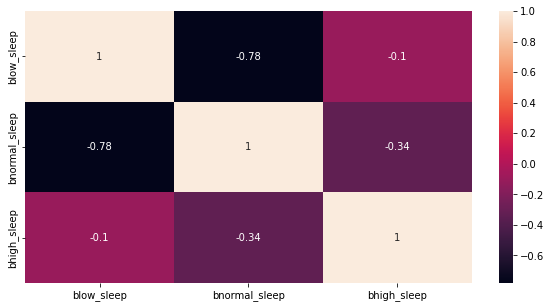

In [152]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAB117_trimmed[['blow_sleep','bnormal_sleep','bhigh_sleep']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [153]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAB117_trimmed.blow_sleep))
print(target.corr(LASAB117_trimmed.bnormal_sleep)) # keep

-0.004693529433024648
0.009907292773971704


In [154]:
LASAB117_trimmed.drop(columns = 'blow_sleep', inplace = True)
LASAC117_trimmed.drop(columns = 'clow_sleep', inplace = True)
LASAD117_trimmed.drop(columns = 'dlow_sleep', inplace = True)

In [155]:
# Save files to output folder
LASAB117_trimmed.to_csv(path + 'output/LASAB117_trimmed.csv', index=False)
LASAC117_trimmed.to_csv(path + 'output/LASAC117_trimmed.csv', index=False)
LASAD117_trimmed.to_csv(path + 'output/LASAD117_trimmed.csv', index=False)

## LASA 118
#### Diet/Food Quality

In [14]:
# Read in LASA 118 files
LASAB118 = pd.read_spss(path + "lasafiles/LASAB118.SAV")
LASAC118 = pd.read_spss(path + "lasafiles/LASAC118.SAV")
LASAD118 = pd.read_spss(path + "lasafiles/LASAD118.SAV")
# Select appropriate individuals
# B
LASAB118_trimmed = LASAB118[LASAB118.respnr.isin(B_individuals)]
LASAB118_trimmed = LASAB118_trimmed.reset_index(drop = True)
# C
LASAC118_trimmed = LASAC118[LASAC118.respnr.isin(C_individuals)]
LASAC118_trimmed = LASAC118_trimmed.reset_index(drop = True)
# D
LASAD118_trimmed = LASAD118[LASAD118.respnr.isin(D_individuals)]
LASAD118_trimmed = LASAD118_trimmed.reset_index(drop = True)

In [15]:
# Replace all No answers with NA
LASAB118_trimmed.replace('No answer', 'Na', inplace = True)
LASAC118_trimmed.replace('No answer', 'Na', inplace = True)
LASAD118_trimmed.replace('No answer', 'Na', inplace = True)

In [16]:
# Convert frequency to numeric
LASAB118_trimmed.replace('Almost Never', '1.0', inplace = True)
LASAB118_trimmed.replace('Some of the time', '2.0', inplace = True)
LASAB118_trimmed.replace('Often', '3.0', inplace = True)
LASAB118_trimmed.replace('Most of the time', '4.0', inplace = True)

# Convert Yes/No to 1.0/0.0
LASAB118_trimmed.replace('No', '0.0', inplace = True)
LASAB118_trimmed.replace('Yes', '1.0', inplace = True)

In [17]:
for i in LASAB118_trimmed.columns:
    LASAB118_trimmed[i] = pd.to_numeric(LASAB118_trimmed[i], errors = 'coerce')

In [18]:
LASAB118_trimmed

,respnr,bqfood01,bqfood02,bqfood03,bqfood04,bqfood05,bqfood06,bqfood07,bqfood08,bqfood09,bqfood10,bqfood11,bqfood12,bqfood13,bqfood14,bqfood15,bqfood16,bqfood17,bqfood18,bqfood19,bqfood20
0,11471.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,7.0,2.0,7.0,2.0,6.0,1.0,6.0,1.0
1,11474.0,1.0,2.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,3.0,1.0,5.0,1.0,5.0,1.0
2,11476.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,2.0,NaN,5.0,1.0,5.0,1.0
3,11496.0,4.0,1.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,3.0,7.0,3.0,7.0,1.0,7.0,1.0
4,11497.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,7.0,2.0,7.0,1.0,7.0,1.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,34380.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,1.0,1.0,7.0,1.0,7.0,1.0
1114,34381.0,4.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,1.0,7.0,1.0,7.0,1.0,7.0,1.0
1115,34394.0,4.0,1.0,1.0,1.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1116,34400.0,1.0,2.0,1.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,1.0,7.0,1.0,7.0,1.0,7.0,1.0


In [21]:
LASAD118_trimmed

,respnr,dqfood01
0,11496.0,"Yes, with some trouble"
1,11499.0,"Yes, with much trouble"
2,11540.0,"No, I cannot"
3,11541.0,"Yes, with some trouble"
4,11571.0,"Yes, with some trouble"
...,...,...
991,34379.0,"Yes, without trouble"
992,34381.0,"Yes, without trouble"
993,34394.0,"Yes, with some trouble"
994,34400.0,"Yes, with much trouble"


In [ ]:
# Save files to output folder
LASAB118_trimmed.to_csv(path + 'output/LASAB118_trimmed.csv', index=False)
LASAC118_trimmed.to_csv(path + 'output/LASAC118_trimmed.csv', index=False)
LASAD118_trimmed.to_csv(path + 'output/LASAD118_trimmed.csv', index=False)

## LASA 119
#### Fertility
# Don't Include

In [ ]:
# Might not use, because only for women, so don't spend too much time on this

In [ ]:
# Read in LASA 119 files
LASAB119 = pd.read_spss(path + "lasafiles/LASAB119.SAV")
# Select appropriate individuals
# B
LASAB119_trimmed = LASAB119[LASAB119.respnr.isin(B_individuals)]
LASAB119_trimmed = LASAB119_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB119_trimmed.replace('No answer', 'Na', inplace = True)
LASAB119_trimmed.replace('No answer, skipped', 'Na', inplace = True)

In [ ]:
# Save files to output folder
LASAB119_trimmed.to_csv(path + 'output/LASAB119_trimmed.csv', index=False)

## LASA 120
#### Sexuality

In [ ]:
# Read in LASA 120 files
LASAB120 = pd.read_spss(path + "lasafiles/LASAB120.SAV")
# Select appropriate individuals
# B
LASAB120_trimmed = LASAB120[LASAB120.respnr.isin(B_individuals)]
LASAB120_trimmed = LASAB120_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB120_trimmed.replace('No answer', 'Na', inplace = True)

In [ ]:
# Convert impression to numeric
LASAB120_trimmed.replace('Very unpleasant', '1.0', inplace = True)
LASAB120_trimmed.replace('Unpleasant', '2.0', inplace = True)
LASAB120_trimmed.replace('Not unpleasant/pleasant', '3.0', inplace = True)
LASAB120_trimmed.replace('Pleasant', '4.0', inplace = True)
LASAB120_trimmed.replace('Very pleasant', '5.0', inplace = True)

#Convert importance to numeric
LASAB120_trimmed.replace('Very unimportant', '1.0', inplace = True)
LASAB120_trimmed.replace('Unimportant', '2.0', inplace = True)
LASAB120_trimmed.replace('Not unimportant/important', '3.0', inplace = True)
LASAB120_trimmed.replace('Important', '4.0', inplace = True)
LASAB120_trimmed.replace('Very important', '5.0', inplace = True)

In [ ]:
for i in LASAB120_trimmed.columns:
    LASAB120_trimmed[i] = pd.to_numeric(LASAB120_trimmed[i], errors = 'coerce')

In [ ]:
LASAB120_trimmed

In [ ]:
# Save files to output folder
LASAB120_trimmed.to_csv(path + 'output/LASAB120_trimmed.csv', index=False)

## LASA 121
#### Environmental Influence - Social Participation

In [ ]:
# Read in LASA 121 files
LASAB121 = pd.read_spss(path + "lasafiles/LASAB121.SAV")
LASAC121 = pd.read_spss(path + "lasafiles/LASAC121.SAV")
LASAD121 = pd.read_spss(path + "lasafiles/LASAD121.SAV")
# Select appropriate individuals
# B
LASAB121_trimmed = LASAB121[LASAB121.respnr.isin(B_individuals)]
LASAB121_trimmed = LASAB121_trimmed.reset_index(drop = True)
# C
LASAC121_trimmed = LASAC121[LASAC121.respnr.isin(C_individuals)]
LASAC121_trimmed = LASAC121_trimmed.reset_index(drop = True)
# D
LASAD121_trimmed = LASAD121[LASAD121.respnr.isin(D_individuals)]
LASAD121_trimmed = LASAD121_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB121_trimmed.replace('no answer', 'Na', inplace = True)
LASAC121_trimmed.replace('no answer', 'Na', inplace = True)
LASAD121_trimmed.replace('no answer', 'Na', inplace = True)

In [ ]:
# Convert frequency to numeric
LASAB121_trimmed.replace('rarely or never', '1.0', inplace = True)
LASAB121_trimmed.replace('monthly', '2.0', inplace = True)
LASAB121_trimmed.replace('weekly or more often', '3.0', inplace = True)

LASAC121_trimmed.replace('rarely or never', '1.0', inplace = True)
LASAC121_trimmed.replace('monthly', '2.0', inplace = True)
LASAC121_trimmed.replace('weekly or more often', '3.0', inplace = True)

LASAD121_trimmed.replace('rarely or never', '1.0', inplace = True)
LASAD121_trimmed.replace('monthly', '2.0', inplace = True)
LASAD121_trimmed.replace('weekly or more often', '3.0', inplace = True)

In [ ]:
for i in LASAB121_trimmed.columns:
    LASAB121_trimmed[i] = pd.to_numeric(LASAB121_trimmed[i], errors = 'coerce')
for i in LASAC121_trimmed.columns:
    LASAC121_trimmed[i] = pd.to_numeric(LASAC121_trimmed[i], errors = 'coerce')
for i in LASAD121_trimmed.columns:
    LASAD121_trimmed[i] = pd.to_numeric(LASAD121_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB121_trimmed.to_csv(path + 'output/LASAB121_trimmed.csv', index=False)
LASAC121_trimmed.to_csv(path + 'output/LASAC121_trimmed.csv', index=False)
LASAD121_trimmed.to_csv(path + 'output/LASAD121_trimmed.csv', index=False)

## LASA 122
#### Values

In [ ]:
# Read in LASA 122 files
LASAB122 = pd.read_spss(path + "lasafiles/LASAB122.SAV")
LASAC122 = pd.read_spss(path + "lasafiles/LASAC122.SAV")
LASAD122 = pd.read_spss(path + "lasafiles/LASAD122.SAV")
# Select appropriate individuals
# B
LASAB122_trimmed = LASAB122[LASAB122.respnr.isin(B_individuals)]
LASAB122_trimmed = LASAB122_trimmed.reset_index(drop = True)
# C
LASAC122_trimmed = LASAC122[LASAC122.respnr.isin(C_individuals)]
LASAC122_trimmed = LASAC122_trimmed.reset_index(drop = True)
# D
LASAD122_trimmed = LASAD122[LASAD122.respnr.isin(D_individuals)]
LASAD122_trimmed = LASAD122_trimmed.reset_index(drop = True)

In [ ]:
LASAB122_trimmed = LASAB122_trimmed[['respnr', 'bqvalu01', 'bqvalu02', 'bqvalu03']]
LASAC122_trimmed = LASAC122_trimmed[['respnr', 'cqvalu01', 'cqvalu02', 'cqvalu03']]
LASAD122_trimmed = LASAD122_trimmed[['respnr', 'dqvalu01', 'dqvalu02', 'dqvalu03']]

In [ ]:
# Replace all No answers with NA
LASAB122_trimmed.replace('No answer', 'Na', inplace = True)
LASAC122_trimmed.replace('No answer', 'Na', inplace = True)
LASAD122_trimmed.replace('No answer', 'Na', inplace = True)
LASAB122_trimmed.replace('no answer', 'Na', inplace = True)
LASAC122_trimmed.replace('no answer', 'Na', inplace = True)
LASAD122_trimmed.replace('no answer', 'Na', inplace = True)

In [ ]:
# Convert to numeric
# Convert no opinion of bqvalu02 first because it is dumb
LASAB122_trimmed.replace('yes, there are', '1.0', inplace = True)
LASAB122_trimmed.replace('no, there are not', '2.0', inplace = True)
LASAB122_trimmed['bqvalu02'] = LASAB122_trimmed['bqvalu02'].replace('no opinion', '3.0')

LASAB122_trimmed.replace('acceptable', '1.0', inplace = True)
LASAB122_trimmed.replace('not acceptable', '2.0', inplace = True)
LASAB122_trimmed.replace('opposed', '3.0', inplace = True)
LASAB122_trimmed.replace('no opinion', '4.0', inplace = True)
LASAB122_trimmed.replace('no, he should not', '3.0', inplace = True)
LASAB122_trimmed.replace('it depends', '2.0', inplace = True)
LASAB122_trimmed.replace('yes, he should', '1.0', inplace = True)

LASAC122_trimmed.replace('yes, there are', '1.0', inplace = True)
LASAC122_trimmed.replace('no, there are not', '2.0', inplace = True)
LASAC122_trimmed['cqvalu02'] = LASAC122_trimmed['cqvalu02'].replace('no opinion', '3.0')

LASAC122_trimmed.replace('acceptable', '1.0', inplace = True)
LASAC122_trimmed.replace('not acceptable', '2.0', inplace = True)
LASAC122_trimmed.replace('opposed', '3.0', inplace = True)
LASAC122_trimmed.replace('no opinion', '4.0', inplace = True)
LASAC122_trimmed.replace('no, he should not', '3.0', inplace = True)
LASAC122_trimmed.replace('it depends', '2.0', inplace = True)
LASAC122_trimmed.replace('yes, he should', '1.0', inplace = True)

LASAD122_trimmed.replace('yes, there are', '1.0', inplace = True)
LASAD122_trimmed.replace('no, there are not', '2.0', inplace = True)
LASAD122_trimmed['dqvalu02'] = LASAD122_trimmed['dqvalu02'].replace('no opinion', '3.0')

LASAD122_trimmed.replace('acceptable', '1.0', inplace = True)
LASAD122_trimmed.replace('not acceptable', '2.0', inplace = True)
LASAD122_trimmed.replace('opposed', '3.0', inplace = True)
LASAD122_trimmed.replace('no opinion', '4.0', inplace = True)
LASAD122_trimmed.replace('no, he should not', '3.0', inplace = True)
LASAD122_trimmed.replace('it depends', '2.0', inplace = True)
LASAD122_trimmed.replace('yes, he should', '1.0', inplace = True)


In [ ]:
for i in LASAB122_trimmed.columns:
    LASAB122_trimmed[i] = pd.to_numeric(LASAB122_trimmed[i], errors = 'coerce')
for i in LASAC122_trimmed.columns:
    LASAC122_trimmed[i] = pd.to_numeric(LASAC122_trimmed[i], errors = 'coerce')
for i in LASAD122_trimmed.columns:
    LASAD122_trimmed[i] = pd.to_numeric(LASAD122_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB122_trimmed.to_csv(path + 'output/LASAB122_trimmed.csv', index=False)
LASAC122_trimmed.to_csv(path + 'output/LASAC122_trimmed.csv', index=False)
LASAD122_trimmed.to_csv(path + 'output/LASAD122_trimmed.csv', index=False)

## LASA 123
#### Neuroticism

In [ ]:
# Read in LASA 123 files
LASAB123 = pd.read_spss(path + "lasafiles/LASAB123.SAV")
LASAC123 = pd.read_spss(path + "lasafiles/LASAC123.SAV")
LASAD123 = pd.read_spss(path + "lasafiles/LASAD123.SAV")
# Select appropriate individuals
# B
LASAB123_trimmed = LASAB123[LASAB123.respnr.isin(B_individuals)]
LASAB123_trimmed = LASAB123_trimmed.reset_index(drop = True)
# C
LASAC123_trimmed = LASAC123[LASAC123.respnr.isin(C_individuals)]
LASAC123_trimmed = LASAC123_trimmed.reset_index(drop = True)
# D
LASAD123_trimmed = LASAD123[LASAD123.respnr.isin(D_individuals)]
LASAD123_trimmed = LASAD123_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB123_trimmed.replace('No answer', 'Na', inplace = True)
LASAC123_trimmed.replace('No answer', 'Na', inplace = True)
LASAD123_trimmed.replace('No answer', 'Na', inplace = True)
LASAB123_trimmed.replace('no answer', 'Na', inplace = True)
LASAC123_trimmed.replace('no answer', 'Na', inplace = True)
LASAD123_trimmed.replace('no answer', 'Na', inplace = True)
LASAB123_trimmed.replace('?', 'Na', inplace = True)
LASAC123_trimmed.replace('?', 'Na', inplace = True)
LASAD123_trimmed.replace('?', 'Na', inplace = True)

In [ ]:
# Maybe will stick with scaled version

In [ ]:
# Save files to output folder
#LASAB123_trimmed.to_csv(path + 'output/LASAB123_trimmed.csv', index=False)
#LASAC123_trimmed.to_csv(path + 'output/LASAC123_trimmed.csv', index=False)
#LASAD123_trimmed.to_csv(path + 'output/LASAD123_trimmed.csv', index=False)

## LASA 124
#### Meta-Memory

In [ ]:
# Read in LASA 124 files
LASAB124 = pd.read_spss(path + "lasafiles/LASAB124.SAV")
LASAC124 = pd.read_spss(path + "lasafiles/LASAC124.SAV")
LASAD124 = pd.read_spss(path + "lasafiles/LASAD124.SAV")
# Select appropriate individuals
# B
LASAB124_trimmed = LASAB124[LASAB124.respnr.isin(B_individuals)]
LASAB124_trimmed = LASAB124_trimmed.reset_index(drop = True)
# C
LASAC124_trimmed = LASAC124[LASAC124.respnr.isin(C_individuals)]
LASAC124_trimmed = LASAC124_trimmed.reset_index(drop = True)
# D
LASAD124_trimmed = LASAD124[LASAD124.respnr.isin(D_individuals)]
LASAD124_trimmed = LASAD124_trimmed.reset_index(drop = True)

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB124_trimmed.columns.str[1:], LASAC124_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD124_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB124_trimmed = LASAB124_trimmed[b_cols]
LASAC124_trimmed = LASAC124_trimmed[c_cols]
LASAD124_trimmed = LASAD124_trimmed[d_cols]

In [ ]:
# Replace all No answers with NA
LASAB124_trimmed.replace('No answer', 'Na', inplace = True)
LASAC124_trimmed.replace('No answer', 'Na', inplace = True)
LASAD124_trimmed.replace('No answer', 'Na', inplace = True)
LASAB124_trimmed.replace('no answer', 'Na', inplace = True)
LASAC124_trimmed.replace('no answer', 'Na', inplace = True)
LASAD124_trimmed.replace('no answer', 'Na', inplace = True)

In [ ]:
# Use only scaled values

In [ ]:
# Save files to output folder
#LASAB124_trimmed.to_csv(path + 'output/LASAB124_trimmed.csv', index=False)
#LASAC124_trimmed.to_csv(path + 'output/LASAC124_trimmed.csv', index=False)
#LASAD124_trimmed.to_csv(path + 'output/LASAD124_trimmed.csv', index=False)

## LASA 125
#### Social Participation

In [ ]:
# Read in LASA 125 files
LASAB125 = pd.read_spss(path + "lasafiles/LASAB125.SAV")
LASAC125 = pd.read_spss(path + "lasafiles/LASAC125.SAV")
LASAD125 = pd.read_spss(path + "lasafiles/LASAD125.SAV")
# Select appropriate individuals
# B
LASAB125_trimmed = LASAB125[LASAB125.respnr.isin(B_individuals)]
LASAB125_trimmed = LASAB125_trimmed.reset_index(drop = True)
# C
LASAC125_trimmed = LASAC125[LASAC125.respnr.isin(C_individuals)]
LASAC125_trimmed = LASAC125_trimmed.reset_index(drop = True)
# D
LASAD125_trimmed = LASAD125[LASAD125.respnr.isin(D_individuals)]
LASAD125_trimmed = LASAD125_trimmed.reset_index(drop = True)

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB125_trimmed.columns.str[1:], LASAC125_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD125_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB125_trimmed = LASAB125_trimmed[b_cols]
LASAC125_trimmed = LASAC125_trimmed[c_cols]
LASAD125_trimmed = LASAD125_trimmed[d_cols]

In [ ]:
# Replace all No answers with NA
LASAB125_trimmed.replace('No answer', 'Na', inplace = True)
LASAC125_trimmed.replace('No answer', 'Na', inplace = True)
LASAD125_trimmed.replace('No answer', 'Na', inplace = True)
LASAB125_trimmed.replace('no answer', 'Na', inplace = True)
LASAC125_trimmed.replace('no answer', 'Na', inplace = True)
LASAD125_trimmed.replace('no answer', 'Na', inplace = True)

In [ ]:
# Convert frequency to numeric
LASAB125_trimmed.replace('very often', '1.0', inplace = True)
LASAB125_trimmed.replace('often', '2.0', inplace = True)
LASAB125_trimmed.replace('some of the time', '3.0', inplace = True)
LASAB125_trimmed.replace('never', '4.0', inplace = True)

#and 
LASAB125_trimmed.replace('every day', '1.0', inplace = True)
LASAB125_trimmed.replace('4-5 times a week', '2.0', inplace = True)
LASAB125_trimmed.replace('2-3 times a week', '3.0', inplace = True)
LASAB125_trimmed.replace('< 2 times a week', '4.0', inplace = True)
LASAB125_trimmed.replace('never', '5.0', inplace = True)

LASAC125_trimmed.replace('very often', '1.0', inplace = True)
LASAC125_trimmed.replace('often', '2.0', inplace = True)
LASAC125_trimmed.replace('some of the time', '3.0', inplace = True)
LASAC125_trimmed.replace('never', '4.0', inplace = True)

#and 
LASAC125_trimmed.replace('every day', '1.0', inplace = True)
LASAC125_trimmed.replace('4-5 times a week', '2.0', inplace = True)
LASAC125_trimmed.replace('2-3 times a week', '3.0', inplace = True)
LASAC125_trimmed.replace('< 2 times a week', '4.0', inplace = True)
LASAC125_trimmed.replace('never', '5.0', inplace = True)

LASAD125_trimmed.replace('very often', '1.0', inplace = True)
LASAD125_trimmed.replace('often', '2.0', inplace = True)
LASAD125_trimmed.replace('some of the time', '3.0', inplace = True)
LASAD125_trimmed.replace('never', '4.0', inplace = True)

#and 
LASAD125_trimmed.replace('every day', '1.0', inplace = True)
LASAD125_trimmed.replace('4-5 times a week', '2.0', inplace = True)
LASAD125_trimmed.replace('2-3 times a week', '3.0', inplace = True)
LASAD125_trimmed.replace('< 2 times a week', '4.0', inplace = True)
LASAD125_trimmed.replace('never', '5.0', inplace = True)


In [ ]:
for i in LASAB125_trimmed.columns:
    LASAB125_trimmed[i] = pd.to_numeric(LASAB125_trimmed[i], errors = 'coerce')
for i in LASAC125_trimmed.columns:
    LASAC125_trimmed[i] = pd.to_numeric(LASAC125_trimmed[i], errors = 'coerce')
for i in LASAD125_trimmed.columns:
    LASAD125_trimmed[i] = pd.to_numeric(LASAD125_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB125_trimmed.to_csv(path + 'output/LASAB125_trimmed.csv', index=False)
LASAC125_trimmed.to_csv(path + 'output/LASAC125_trimmed.csv', index=False)
LASAD125_trimmed.to_csv(path + 'output/LASAD125_trimmed.csv', index=False)

## LASA 151
#### Blood Pressure/pulse

In [ ]:
# Read in LASA 151 files
LASAB151 = pd.read_spss(path + "lasafiles/LASAB151.SAV")
LASAC151 = pd.read_spss(path + "lasafiles/LASAC151.SAV")
LASAD151 = pd.read_spss(path + "lasafiles/LASAD151.SAV")
# Select appropriate individuals
# B
LASAB151_trimmed = LASAB151[LASAB151.respnr.isin(B_individuals)]
LASAB151_trimmed = LASAB151_trimmed.reset_index(drop = True)
# C
LASAC151_trimmed = LASAC151[LASAC151.respnr.isin(C_individuals)]
LASAC151_trimmed = LASAC151_trimmed.reset_index(drop = True)
# D
LASAD151_trimmed = LASAD151[LASAD151.respnr.isin(D_individuals)]
LASAD151_trimmed = LASAD151_trimmed.reset_index(drop = True)

In [ ]:
LASAC151_trimmed

In [ ]:
# If socpyn (are they a member of associations) is no, fill the rest of the columns with No or 0
# If socpyn is Na, fill the rest of columns with Na
for na_col in LASAC151_trimmed.columns:
    for x in range(len(LASAC151_trimmed)):
        fix_na(LASAC151_trimmed, na_col, x)
for na_col in LASAD151_trimmed.columns:
    for x in range(len(LASAD151_trimmed)):
        fix_na(LASAD151_trimmed, na_col, x)

In [ ]:
LASAC151_trimmed['cmfinss1'] = pd.to_numeric(LASAC151_trimmed['cmfinss1'], errors = 'coerce')

In [ ]:
LASAC151_trimmed

In [ ]:
# Get systolic blood pressure from C for B
# cmfinss1


In [ ]:
# Save files to output folder
#LASAB151_trimmed.to_csv(path + 'output/LASAB151_trimmed.csv', index=False)
LASAC151_trimmed.to_csv(path + 'output/LASAC151_trimmed.csv', index=False)
#LASAD151_trimmed.to_csv(path + 'output/LASAD151_trimmed.csv', index=False)

## LASA 152
#### Medication and Food Supplement Use

In [ ]:
# Read in LASA 152 files
LASAB152 = pd.read_spss(path + "lasafiles/LASAB152.SAV")
LASAC152 = pd.read_spss(path + "lasafiles/LASAC152.SAV")
LASAD152 = pd.read_spss(path + "lasafiles/LASAD152.SAV")
# Select appropriate individuals
# B
LASAB152_trimmed = LASAB152[LASAB152.respnr.isin(B_individuals)]
LASAB152_trimmed = LASAB152_trimmed.reset_index(drop = True)
# C
LASAC152_trimmed = LASAC152[LASAC152.respnr.isin(C_individuals)]
LASAC152_trimmed = LASAC152_trimmed.reset_index(drop = True)
# D
LASAD152_trimmed = LASAD152[LASAD152.respnr.isin(D_individuals)]
LASAD152_trimmed = LASAD152_trimmed.reset_index(drop = True)

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB152_trimmed.columns.str[1:], LASAC152_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD152_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB152_trimmed = LASAB152_trimmed[b_cols]
LASAC152_trimmed = LASAC152_trimmed[c_cols]
LASAD152_trimmed = LASAD152_trimmed[d_cols]

In [ ]:
# Replace empty space with Na
LASAB152_trimmed.replace('       ', 'Na', inplace = True)
LASAC152_trimmed.replace('       ', 'Na', inplace = True)
LASAD152_trimmed.replace('       ', 'Na', inplace = True)

In [ ]:
for na_col in LASAB152_trimmed.columns:
    for x in range(len(LASAB152_trimmed)):
        fix_na(LASAB152_trimmed, na_col, x)
for na_col in LASAC152_trimmed.columns:
    for x in range(len(LASAC152_trimmed)):
        fix_na(LASAC152_trimmed, na_col, x)
for na_col in LASAD152_trimmed.columns:
    for x in range(len(LASAD152_trimmed)):
        fix_na(LASAD152_trimmed, na_col, x)

In [ ]:
# Only keep certain from this, the rest remove and use the constructed scores from LASA352
# Keep bm#med, bmmeduse, bmmedvittab, bmmedcaltab
LASAB152_trimmed = LASAB152_trimmed[['respnr', 'bm#med','bmmeduse','bmmedvittab','bmmedcaltab']]
LASAC152_trimmed = LASAC152_trimmed[['respnr', 'cm#med','cmmeduse','cmmedvittab','cmmedcaltab']]
LASAD152_trimmed = LASAD152_trimmed[['respnr', 'dm#med','dmmeduse','dmmedvittab','dmmedcaltab']]

In [ ]:
LASAB152_trimmed['bm#med'] = np.where(LASAB152_trimmed['bm#med'] == 'Na, see BMVAR13', LASAB152_trimmed['bmmeduse'], LASAB152_trimmed['bm#med'])
LASAC152_trimmed['cm#med'] = np.where(LASAC152_trimmed['cm#med'] == 'Na, see [LASAC152]CMVAR1', LASAC152_trimmed['cmmeduse'], LASAC152_trimmed['cm#med'])
LASAD152_trimmed['dm#med'] = np.where(LASAD152_trimmed['dm#med'] == 'no medicines', LASAD152_trimmed['dmmeduse'], LASAD152_trimmed['dm#med'])

In [ ]:
# Convert Yes to 1.0 and no to 0.0
LASAB152_trimmed.replace('No', '0.0', inplace = True)
LASAB152_trimmed.replace('Yes', '1.0', inplace = True)

# Convert Yes to 1.0 and no to 0.0
LASAC152_trimmed.replace('No', '0.0', inplace = True)
LASAC152_trimmed.replace('Yes', '1.0', inplace = True)

# Convert Yes to 1.0 and no to 0.0
LASAD152_trimmed.replace('no', '0.0', inplace = True)
LASAD152_trimmed.replace('yes', '1.0', inplace = True)

In [ ]:
for i in LASAB152_trimmed.columns:
    LASAB152_trimmed[i] = pd.to_numeric(LASAB152_trimmed[i], errors = 'coerce')
for i in LASAC152_trimmed.columns:
    LASAC152_trimmed[i] = pd.to_numeric(LASAC152_trimmed[i], errors = 'coerce')
for i in LASAD152_trimmed.columns:
    LASAD152_trimmed[i] = pd.to_numeric(LASAD152_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB152_trimmed.to_csv(path + 'output/LASAB152_trimmed.csv', index=False)
LASAC152_trimmed.to_csv(path + 'output/LASAC152_trimmed.csv', index=False)
LASAD152_trimmed.to_csv(path + 'output/LASAD152_trimmed.csv', index=False)

## LASA 153
#### Alcohol Use

In [156]:
# Read in LASA 153 files
LASAB153 = pd.read_spss(path + "lasafiles/LASAB153.SAV")
LASAC153 = pd.read_spss(path + "lasafiles/LASAC153.SAV")
LASAD153 = pd.read_spss(path + "lasafiles/LASAD153.SAV")
# Select appropriate individuals
# B
LASAB153_trimmed = LASAB153[LASAB153.respnr.isin(B_individuals)]
LASAB153_trimmed = LASAB153_trimmed.reset_index(drop = True)
# C
LASAC153_trimmed = LASAC153[LASAC153.respnr.isin(C_individuals)]
LASAC153_trimmed = LASAC153_trimmed.reset_index(drop = True)
# D
LASAD153_trimmed = LASAD153[LASAD153.respnr.isin(D_individuals)]
LASAD153_trimmed = LASAD153_trimmed.reset_index(drop = True)

In [157]:
# Select features present in all of the waves
a = np.intersect1d(LASAB153_trimmed.columns.str[1:], LASAC153_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD153_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB153_trimmed = LASAB153_trimmed[b_cols]
LASAC153_trimmed = LASAC153_trimmed[c_cols]
LASAD153_trimmed = LASAD153_trimmed[d_cols]

In [158]:
# Replace all No answers with NA
LASAB153_trimmed.replace('No answer, asked', 'Na', inplace = True)
LASAC153_trimmed.replace('No answer, asked', 'Na', inplace = True)
LASAD153_trimmed.replace('No answer, asked', 'Na', inplace = True)
LASAB153_trimmed.replace('No answer asked', 'Na', inplace = True)
LASAC153_trimmed.replace('No answer asked', 'Na', inplace = True)
LASAD153_trimmed.replace('No answer asked', 'Na', inplace = True)
LASAB153_trimmed.replace('No valid data', 'Na', inplace = True)
LASAC153_trimmed.replace('No valid data', 'Na', inplace = True)
LASAD153_trimmed.replace('No valid data', 'Na', inplace = True)
LASAB153_trimmed.replace('no valid data', 'Na', inplace = True)
LASAC153_trimmed.replace('no valid data', 'Na', inplace = True)
LASAD153_trimmed.replace('no valid data', 'Na', inplace = True)
LASAB153_trimmed.replace('na, wrong skip', 'Na', inplace = True)
LASAC153_trimmed.replace('na, wrong skip', 'Na', inplace = True)
LASAD153_trimmed.replace('na, wrong skip', 'Na', inplace = True)

In [159]:
# Convert numbers to numeric and Yes/No to 1.0/0.0
LASAB153_trimmed.replace('1 glass', '1.0', inplace = True)
LASAB153_trimmed.replace('2 a 3 glasses', '2.5', inplace = True)
LASAB153_trimmed.replace('4 a 5 glasses', '4.5', inplace = True)
LASAB153_trimmed.replace('6 a 7 glasses', '6.5', inplace = True)
LASAB153_trimmed.replace('8 a 10 glasses', '9', inplace = True)
LASAB153_trimmed.replace('11 glasses or more', '11', inplace = True)
LASAB153_trimmed.replace('R never drank', '0.0', inplace = True)

LASAB153_trimmed.replace('Yes', '1.0', inplace = True)
LASAB153_trimmed.replace('No', '0.0', inplace = True)

LASAB153_trimmed.replace('R never drank', '0.0', inplace = True)
LASAB153_trimmed.replace('R drink/drank <2 glasses', '0.5', inplace = True)
LASAB153_trimmed.replace('less than 1 day a month', '1.0', inplace = True)
LASAB153_trimmed.replace('1 a 3 days a month', '2.0', inplace = True)
LASAB153_trimmed.replace('1 a 2 days a week', '3.0', inplace = True)
LASAB153_trimmed.replace('3 a 4 days a week', '4.0', inplace = True)
LASAB153_trimmed.replace('5 a 6 days a week', '5.0', inplace = True)
LASAB153_trimmed.replace('every day', '6.0', inplace = True)
LASAB153_trimmed.replace('R drink/drank >6 glasses', '6.5', inplace = True)

# Convert numbers to numeric and Yes/No to 1.0/0.0
LASAC153_trimmed.replace('1 glass', '1.0', inplace = True)
LASAC153_trimmed.replace('2 a 3 glasses', '2.5', inplace = True)
LASAC153_trimmed.replace('4 a 5 glasses', '4.5', inplace = True)
LASAC153_trimmed.replace('6 a 7 glasses', '6.5', inplace = True)
LASAC153_trimmed.replace('8 a 10 glasses', '9', inplace = True)
LASAC153_trimmed.replace('11 glasses or more', '11', inplace = True)
LASAC153_trimmed.replace('R never drank', '0.0', inplace = True)

LASAC153_trimmed.replace('Yes', '1.0', inplace = True)
LASAC153_trimmed.replace('No', '0.0', inplace = True)

LASAC153_trimmed.replace('R never drank', '0.0', inplace = True)
LASAC153_trimmed.replace('R drink/drank <2 glasses', '0.5', inplace = True)
LASAC153_trimmed.replace('< 1 glass a month', '1.0', inplace = True)
LASAC153_trimmed.replace('1-3 days a month', '2.0', inplace = True)
LASAC153_trimmed.replace('1-2 days a week', '3.0', inplace = True)
LASAC153_trimmed.replace('3-4 days a week', '4.0', inplace = True)
LASAC153_trimmed.replace('4-5 days a week', '5.0', inplace = True)
LASAC153_trimmed.replace('daily', '6.0', inplace = True)
LASAC153_trimmed.replace('R drink/drank >6 glasses', '6.5', inplace = True)

# Convert numbers to numeric and Yes/No to 1.0/0.0
LASAD153_trimmed.replace('1 glass', '1.0', inplace = True)
LASAD153_trimmed.replace('2 a 3 glasses', '2.5', inplace = True)
LASAD153_trimmed.replace('4 a 5 glasses', '4.5', inplace = True)
LASAD153_trimmed.replace('6 a 7 glasses', '6.5', inplace = True)
LASAD153_trimmed.replace('8 a 10 glasses', '9', inplace = True)
LASAD153_trimmed.replace('11 glasses or more', '11', inplace = True)
LASAD153_trimmed.replace('R never drank', '0.0', inplace = True)

LASAD153_trimmed.replace('Yes', '1.0', inplace = True)
LASAD153_trimmed.replace('No', '0.0', inplace = True)

LASAD153_trimmed.replace('R does not drink', '0.0', inplace = True)
LASAD153_trimmed.replace('R drink/drank <2 glasses', '0.5', inplace = True)
LASAD153_trimmed.replace('< 1 day a month', '1.0', inplace = True)
LASAD153_trimmed.replace('1 a 3 days a month', '2.0', inplace = True)
LASAD153_trimmed.replace('1 a 2 days a week', '3.0', inplace = True)
LASAD153_trimmed.replace('3 a 4 days a week', '4.0', inplace = True)
LASAD153_trimmed.replace('5 a 6 days a week', '5.0', inplace = True)
LASAD153_trimmed.replace('every day', '6.0', inplace = True)
LASAD153_trimmed.replace('R drink/drank >6 glasses', '6.5', inplace = True)




In [160]:
for i in LASAB153_trimmed.columns:
    LASAB153_trimmed[i] = pd.to_numeric(LASAB153_trimmed[i], errors = 'coerce')
for i in LASAC153_trimmed.columns:
    LASAC153_trimmed[i] = pd.to_numeric(LASAC153_trimmed[i], errors = 'coerce')
for i in LASAD153_trimmed.columns:
    LASAD153_trimmed[i] = pd.to_numeric(LASAD153_trimmed[i], errors = 'coerce')

In [161]:
# Alcohol use was classified into three categories: no alcohol use, moderate alcohol use (up to 2.5 glasses per day) and high alcohol use (more than 2.5 glasses per day).
# Use bmalcnr (number of glasses at a time)
LASAB153_trimmed['bno_alc_use'] = (LASAB153_trimmed.bmalcnr == 0.0).astype(int)
LASAB153_trimmed['bmoderate_alc_use'] = (LASAB153_trimmed.bmalcnr <= 2.5).astype(int)
LASAB153_trimmed['bhigh_alc_use'] = (LASAB153_trimmed.bmalcnr > 2.5).astype(int)

LASAC153_trimmed['cno_alc_use'] = (LASAC153_trimmed.cmalcnr == 0.0).astype(int)
LASAC153_trimmed['cmoderate_alc_use'] = (LASAC153_trimmed.cmalcnr <= 2.5).astype(int)
LASAC153_trimmed['chigh_alc_use'] = (LASAC153_trimmed.cmalcnr > 2.5).astype(int)

LASAD153_trimmed['dno_alc_use'] = (LASAD153_trimmed.dmalcnr == 0.0).astype(int)
LASAD153_trimmed['dmoderate_alc_use'] = (LASAD153_trimmed.dmalcnr <= 2.5).astype(int)
LASAD153_trimmed['dhigh_alc_use'] = (LASAD153_trimmed.dmalcnr > 2.5).astype(int)

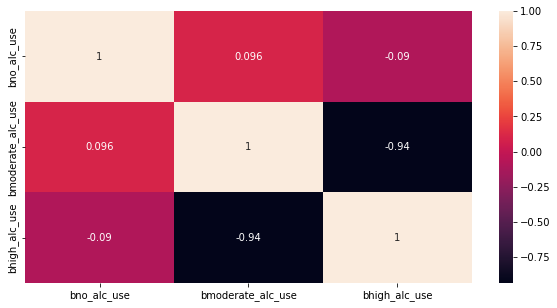

In [162]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAB153_trimmed[['bno_alc_use','bmoderate_alc_use','bhigh_alc_use']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [163]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAB153_trimmed.bmoderate_alc_use)) # keep
print(target.corr(LASAB153_trimmed.bhigh_alc_use))

0.038051343697750276
-0.019251653106523558


In [164]:
LASAB153_trimmed.drop(columns = 'bhigh_alc_use', inplace = True)
LASAC153_trimmed.drop(columns = 'chigh_alc_use', inplace = True)
LASAD153_trimmed.drop(columns = 'dhigh_alc_use', inplace = True)

In [165]:
# Save files to output folder
LASAB153_trimmed.to_csv(path + 'output/LASAB153_trimmed.csv', index=False)
LASAC153_trimmed.to_csv(path + 'output/LASAC153_trimmed.csv', index=False)
LASAD153_trimmed.to_csv(path + 'output/LASAD153_trimmed.csv', index=False)

## LASA 154
#### Smoking

In [ ]:
# Read in LASA 154 files
LASAB154 = pd.read_spss(path + "lasafiles/LASAB154.SAV")
LASAC154 = pd.read_spss(path + "lasafiles/LASAC154.SAV")
LASAD154 = pd.read_spss(path + "lasafiles/LASAD154.SAV")
# Select appropriate individuals
# B
LASAB154_trimmed = LASAB154[LASAB154.respnr.isin(B_individuals)]
LASAB154_trimmed = LASAB154_trimmed.reset_index(drop = True)
# C
LASAC154_trimmed = LASAC154[LASAC154.respnr.isin(C_individuals)]
LASAC154_trimmed = LASAC154_trimmed.reset_index(drop = True)
# D
LASAD154_trimmed = LASAD154[LASAD154.respnr.isin(D_individuals)]
LASAD154_trimmed = LASAD154_trimmed.reset_index(drop = True)

In [ ]:
# Fix C wave first feature
LASAC154_trimmed = LASAC154_trimmed.rename(columns={"cmsmoke": "cmsmokeyn"})

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB154_trimmed.columns.str[1:], LASAC154_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD154_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB154_trimmed = LASAB154_trimmed[b_cols]
LASAC154_trimmed = LASAC154_trimmed[c_cols]
LASAD154_trimmed = LASAD154_trimmed[d_cols]

In [ ]:
for na_col in LASAB154_trimmed.columns:
    for x in range(len(LASAB154_trimmed)):
        fix_na(LASAB154_trimmed, na_col, x)
for na_col in LASAC154_trimmed.columns:
    for x in range(len(LASAC154_trimmed)):
        fix_na(LASAC154_trimmed, na_col, x)
for na_col in LASAD154_trimmed.columns:
    for x in range(len(LASAD154_trimmed)):
        fix_na(LASAD154_trimmed, na_col, x)

In [ ]:
LASAB154_trimmed=pd.read_csv(path + 'output/LASAB154_trimmed.csv')
LASAC154_trimmed=pd.read_csv(path + 'output/LASAC154_trimmed.csv')
LASAD154_trimmed=pd.read_csv(path + 'output/LASAD154_trimmed.csv')

In [ ]:
# Fix Nas for C and D
for i in LASAC154_trimmed.columns:
    LASAC154_trimmed[i] = np.where(LASAC154_trimmed[i] == 'Na, see CMVAR31 & 32', LASAC154_trimmed['cmsmokeyn'], LASAC154_trimmed[i])
    LASAC154_trimmed[i] = np.where(LASAC154_trimmed[i] == 'Na, see CMVAR32', LASAC154_trimmed['cmsmokeyn'], LASAC154_trimmed[i])


In [ ]:
# Convert Yes/No to 1.0/0.0 
# Fix bmsmokesage for R neve smoked (make very high number)
LASAB154_trimmed['bmsmokesage'] = LASAB154_trimmed['bmsmokesage'].replace('R never smoked', '99.0')

LASAB154_trimmed.replace('Yes', '1.0', inplace = True)
LASAB154_trimmed.replace('R smokes', '1.0', inplace = True)
LASAB154_trimmed.replace('No', '0.0', inplace = True)
LASAB154_trimmed.replace('R does not smoke', '0.0', inplace = True)
LASAB154_trimmed.replace('R smokes, but not cigars', '0.0', inplace = True)
LASAB154_trimmed.replace('R smokes, but not cigg', '0.0', inplace = True)
LASAB154_trimmed.replace('R smokes, but not pipe', '0.0', inplace = True)
LASAB154_trimmed.replace('R never smoked', '0.0', inplace = True)
LASAB154_trimmed.replace('R smokes', '99.0', inplace = True)

In [ ]:
LASAC154_trimmed

In [ ]:
for i in LASAB154_trimmed.columns:
    LASAB154_trimmed[i] = pd.to_numeric(LASAB154_trimmed[i], errors = 'coerce')
for i in LASAC154_trimmed.columns:
    LASAC154_trimmed[i] = pd.to_numeric(LASAC154_trimmed[i], errors = 'coerce')
for i in LASAD154_trimmed.columns:
    LASAD154_trimmed[i] = pd.to_numeric(LASAD154_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB154_trimmed.to_csv(path + 'output/LASAB154_trimmed.csv', index=False)
LASAC154_trimmed.to_csv(path + 'output/LASAC154_trimmed.csv', index=False)
LASAD154_trimmed.to_csv(path + 'output/LASAD154_trimmed.csv', index=False)

## LASA 156
#### Episodic Memory
###### Maybe use scaled

In [ ]:
# Read in LASA 156 files
LASAB156 = pd.read_spss(path + "lasafiles/LASAB156.SAV")
LASAC156 = pd.read_spss(path + "lasafiles/LASAC156.SAV")
LASAD156 = pd.read_spss(path + "lasafiles/LASAD156.SAV")
# Select appropriate individuals
# B
LASAB156_trimmed = LASAB156[LASAB156.respnr.isin(B_individuals)]
LASAB156_trimmed = LASAB156_trimmed.reset_index(drop = True)
# C
LASAC156_trimmed = LASAC156[LASAC156.respnr.isin(C_individuals)]
LASAC156_trimmed = LASAC156_trimmed.reset_index(drop = True)
# D
LASAD156_trimmed = LASAD156[LASAD156.respnr.isin(D_individuals)]
LASAD156_trimmed = LASAD156_trimmed.reset_index(drop = True)

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB156_trimmed.columns.str[1:], LASAC156_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD156_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB156_trimmed = LASAB156_trimmed[b_cols]
LASAC156_trimmed = LASAC156_trimmed[c_cols]
LASAD156_trimmed = LASAD156_trimmed[d_cols]

In [ ]:
# Replace all No answers with NA
LASAB156_trimmed.replace('No answer, asked', 'Na', inplace = True)
LASAC156_trimmed.replace('No answer, asked', 'Na', inplace = True)
LASAD156_trimmed.replace('No answer, asked', 'Na', inplace = True)
LASAB156_trimmed.replace('No valid data', 'Na', inplace = True)
LASAC156_trimmed.replace('No valid data', 'Na', inplace = True)
LASAD156_trimmed.replace('No valid data', 'Na', inplace = True)
LASAB156_trimmed.replace('No recall test', 'Na', inplace = True)
LASAC156_trimmed.replace('No recall test', 'Na', inplace = True)
LASAD156_trimmed.replace('No recall test', 'Na', inplace = True)
LASAB156_trimmed.replace('No test', 'Na', inplace = True)
LASAC156_trimmed.replace('No test', 'Na', inplace = True)
LASAD156_trimmed.replace('No test', 'Na', inplace = True)

In [ ]:
# Only keep last 4 columns (time of interview)
LASAB156_trimmed = LASAB156_trimmed[['respnr','bm15wth','bm15wtm','bm15wtrnd','bm15wtrno']]
LASAC156_trimmed = LASAC156_trimmed[['respnr','cm15wth','cm15wtm','cm15wtrnd','cm15wtrno']]
LASAD156_trimmed = LASAD156_trimmed[['respnr','dm15wth','dm15wtm','dm15wtrnd','dm15wtrno']]

In [ ]:
for i in LASAB156_trimmed.columns:
    LASAB156_trimmed[i] = pd.to_numeric(LASAB156_trimmed[i], errors = 'coerce')
for i in LASAC156_trimmed.columns:
    LASAC156_trimmed[i] = pd.to_numeric(LASAC156_trimmed[i], errors = 'coerce')
for i in LASAD156_trimmed.columns:
    LASAD156_trimmed[i] = pd.to_numeric(LASAD156_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB156_trimmed.to_csv(path + 'output/LASAB156_trimmed.csv', index=False)
LASAC156_trimmed.to_csv(path + 'output/LASAC156_trimmed.csv', index=False)
LASAD156_trimmed.to_csv(path + 'output/LASAD156_trimmed.csv', index=False)

## LASA 157
#### Vision/Contrast Sensitivity

In [ ]:
# Read in LASA 157 files
LASAB157 = pd.read_spss(path + "lasafiles/LASAB157.SAV")
LASAC157 = pd.read_spss(path + "lasafiles/LASAC157.SAV")
LASAD157 = pd.read_spss(path + "lasafiles/LASAD157.SAV")
# Select appropriate individuals
# B
LASAB157_trimmed = LASAB157[LASAB157.respnr.isin(B_individuals)]
LASAB157_trimmed = LASAB157_trimmed.reset_index(drop = True)
# C
LASAC157_trimmed = LASAC157[LASAC157.respnr.isin(C_individuals)]
LASAC157_trimmed = LASAC157_trimmed.reset_index(drop = True)
# D
LASAD157_trimmed = LASAD157[LASAD157.respnr.isin(D_individuals)]
LASAD157_trimmed = LASAD157_trimmed.reset_index(drop = True)

In [ ]:
# Fix Na, see previous
for na_col in LASAC157_trimmed.columns:
    for x in range(len(LASAC157_trimmed)):
        fix_na(LASAC157_trimmed, na_col, x)

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB157_trimmed.columns.str[1:], LASAC157_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD157_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')

# Subset the dataframes so all have same columns:
LASAB157_trimmed = LASAB157_trimmed[b_cols]
LASAC157_trimmed = LASAC157_trimmed[c_cols]
LASAD157_trimmed = LASAD157_trimmed[d_cols]

In [ ]:
# Replace all No answers with NA
LASAB157_trimmed.replace('No answer, asked', 'Na', inplace = True)
LASAB157_trimmed.replace('No valid data', 'Na', inplace = True)
LASAB157_trimmed.replace('No measurement done', 'Na', inplace = True)
LASAB157_trimmed.replace('refused', 'Na', inplace = True)

#C
LASAC157_trimmed.replace('Na, asked', 'Na', inplace = True)
LASAC157_trimmed.replace('na, wrong skip', 'Na', inplace = True)
LASAC157_trimmed.replace('Na, wrong skip', 'Na', inplace = True)
LASAC157_trimmed.replace('na, asked', 'Na', inplace = True)
#D
LASAD157_trimmed.replace('No measurement', 'Na', inplace = True)
LASAD157_trimmed.replace('No answer asked', 'Na', inplace = True)
LASAD157_trimmed.replace('Refused', 'Na', inplace = True)
LASAD157_trimmed.replace('No answer, asked', 'Na', inplace = True)

In [ ]:
LASAB157_trimmed.replace('excellent', '1.0', inplace = True)
LASAB157_trimmed.replace('good', '2.0', inplace = True)
LASAB157_trimmed.replace('moderate', '3.0', inplace = True)
LASAB157_trimmed.replace('bad', '4.0', inplace = True)

LASAB157_trimmed.replace('rarely', '1.0', inplace = True)
LASAB157_trimmed.replace('sometimes', '2.0', inplace = True)
LASAB157_trimmed.replace('almost always', '3.0', inplace = True)
LASAB157_trimmed.replace('often', '4.0', inplace = True)

LASAC157_trimmed.replace('excellent', '1.0', inplace = True)
LASAC157_trimmed.replace('good', '2.0', inplace = True)
LASAC157_trimmed.replace('moderate', '3.0', inplace = True)
LASAC157_trimmed.replace('bad', '4.0', inplace = True)

LASAC157_trimmed.replace('rarely', '1.0', inplace = True)
LASAC157_trimmed.replace('sometimes', '2.0', inplace = True)
LASAC157_trimmed.replace('almost always', '3.0', inplace = True)
LASAC157_trimmed.replace('often', '4.0', inplace = True)

LASAD157_trimmed.replace('Excellent', '1.0', inplace = True)
LASAD157_trimmed.replace('Good', '2.0', inplace = True)
LASAD157_trimmed.replace('Moderate', '3.0', inplace = True)
LASAD157_trimmed.replace('Bad', '4.0', inplace = True)

LASAD157_trimmed.replace('rarely', '1.0', inplace = True)
LASAD157_trimmed.replace('sometimes', '2.0', inplace = True)
LASAD157_trimmed.replace('almost always', '3.0', inplace = True)
LASAD157_trimmed.replace('often', '4.0', inplace = True)


In [ ]:
for i in LASAB157_trimmed.columns:
    LASAB157_trimmed[i] = pd.to_numeric(LASAB157_trimmed[i], errors = 'coerce')
for i in LASAC157_trimmed.columns:
    LASAC157_trimmed[i] = pd.to_numeric(LASAC157_trimmed[i], errors = 'coerce')
for i in LASAD157_trimmed.columns:
    LASAD157_trimmed[i] = pd.to_numeric(LASAD157_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB157_trimmed.to_csv(path + 'output/LASAB157_trimmed.csv', index=False)
LASAC157_trimmed.to_csv(path + 'output/LASAC157_trimmed.csv', index=False)
LASAD157_trimmed.to_csv(path + 'output/LASAD157_trimmed.csv', index=False)

## LASA 158
#### Pulmonary Function Test

In [ ]:
# Read in LASA 158 files
LASAB158 = pd.read_spss(path + "lasafiles/LASAB158.SAV")
LASAC158 = pd.read_spss(path + "lasafiles/LASAC158.SAV")
LASAD158 = pd.read_spss(path + "lasafiles/LASAD158.SAV")
# Select appropriate individuals
# B
LASAB158_trimmed = LASAB158[LASAB158.respnr.isin(B_individuals)]
LASAB158_trimmed = LASAB158_trimmed.reset_index(drop = True)
# C
LASAC158_trimmed = LASAC158[LASAC158.respnr.isin(C_individuals)]
LASAC158_trimmed = LASAC158_trimmed.reset_index(drop = True)
# D
LASAD158_trimmed = LASAD158[LASAD158.respnr.isin(D_individuals)]
LASAD158_trimmed = LASAD158_trimmed.reset_index(drop = True)

In [ ]:
# Rename one of D features
LASAD158_trimmed.rename(columns = {'dmpeakfm':'dmpeamax'}, inplace = True)

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB158_trimmed.columns.str[1:], LASAC158_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD158_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')

# Subset the dataframes so all have same columns:
LASAB158_trimmed = LASAB158_trimmed[b_cols]
LASAC158_trimmed = LASAC158_trimmed[c_cols]
LASAD158_trimmed = LASAD158_trimmed[d_cols]

In [ ]:
# Replace all No answers with NA
LASAB158_trimmed.replace('No answer, asked', 'Na', inplace = True)
LASAB158_trimmed.replace('refused', 'Na', inplace = True)

#C
LASAC158_trimmed.replace('other: not able to: phys', 'Na', inplace = True)
LASAC158_trimmed.replace('other: not able to: cogn', 'Na', inplace = True)
LASAC158_trimmed.replace('Na, wrong skip', 'Na', inplace = True)
#D
LASAD158_trimmed.replace('No valid measurement', 'Na', inplace = True)
LASAD158_trimmed.replace('Na, asked', 'Na', inplace = True)
LASAD158_trimmed.replace('Refused', 'Na', inplace = True)

In [ ]:
# Convert to numeric
LASAB158_trimmed.replace('standing', '1.0', inplace = True)
LASAB158_trimmed.replace('sitting', '2.0', inplace = True)
LASAB158_trimmed.replace('lying', '3.0', inplace = True)

LASAB158_trimmed.replace('excellent', '1.0', inplace = True)
LASAB158_trimmed.replace('good', '2.0', inplace = True)
LASAB158_trimmed.replace('fair', '3.0', inplace = True)
LASAB158_trimmed.replace('bad', '4.0', inplace = True)

LASAC158_trimmed.replace('standingd', '1.0', inplace = True)
LASAC158_trimmed.replace('sitting', '2.0', inplace = True)
LASAC158_trimmed.replace('lying', '3.0', inplace = True)

LASAC158_trimmed.replace('excellent', '1.0', inplace = True)
LASAC158_trimmed.replace('good', '2.0', inplace = True)
LASAC158_trimmed.replace('fair', '3.0', inplace = True)
LASAC158_trimmed.replace('bad', '4.0', inplace = True)

LASAD158_trimmed.replace('Standing', '1.0', inplace = True)
LASAD158_trimmed.replace('Sitting', '2.0', inplace = True)
LASAD158_trimmed.replace('Lying', '3.0', inplace = True)

LASAD158_trimmed.replace('Excellent', '1.0', inplace = True)
LASAD158_trimmed.replace('Good', '2.0', inplace = True)
LASAD158_trimmed.replace('Fair', '3.0', inplace = True)
LASAD158_trimmed.replace('Bad', '4.0', inplace = True)

In [ ]:
for i in LASAB158_trimmed.columns:
    LASAB158_trimmed[i] = pd.to_numeric(LASAB158_trimmed[i], errors = 'coerce')
for i in LASAC158_trimmed.columns:
    LASAC158_trimmed[i] = pd.to_numeric(LASAC158_trimmed[i], errors = 'coerce')
for i in LASAD158_trimmed.columns:
    LASAD158_trimmed[i] = pd.to_numeric(LASAD158_trimmed[i], errors = 'coerce')

In [ ]:
LASAB158_trimmed

In [ ]:
# Save files to output folder
LASAB158_trimmed.to_csv(path + 'output/LASAB158_trimmed.csv', index=False)
LASAC158_trimmed.to_csv(path + 'output/LASAC158_trimmed.csv', index=False)
LASAD158_trimmed.to_csv(path + 'output/LASAD158_trimmed.csv', index=False)

## LASA 159
#### Decubitus bed sores

In [ ]:
# Read in LASA 159 files
LASAB159 = pd.read_spss(path + "lasafiles/LASAB159.SAV")
# Select appropriate individuals
# B
LASAB159_trimmed = LASAB159[LASAB159.respnr.isin(B_individuals)]
LASAB159_trimmed = LASAB159_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB159_trimmed.replace('No valid data', 'Na', inplace = True)
LASAB159_trimmed.replace('No answer, asked', 'Na', inplace = True)
LASAB159_trimmed.replace('No answer, routing', 'Na', inplace = True)

In [ ]:
### Provides no information will not be included ********

In [ ]:
# Save files to output folder
# LASAB159_trimmed.to_csv(path + 'output/LASAB159_trimmed.csv', index=False)

## LASA 160
#### Weight Change

In [ ]:
# Read in LASA 160 files
LASAB160 = pd.read_spss(path + "lasafiles/LASAB160.SAV")
LASAC160 = pd.read_spss(path + "lasafiles/LASAC160.SAV")
LASAD160 = pd.read_spss(path + "lasafiles/LASAD160.SAV")
# Select appropriate individuals
# B
LASAB160_trimmed = LASAB160[LASAB160.respnr.isin(B_individuals)]
LASAB160_trimmed = LASAB160_trimmed.reset_index(drop = True)
# C
LASAC160_trimmed = LASAC160[LASAC160.respnr.isin(C_individuals)]
LASAC160_trimmed = LASAC160_trimmed.reset_index(drop = True)
# D
LASAD160_trimmed = LASAD160[LASAD160.respnr.isin(D_individuals)]
LASAD160_trimmed = LASAD160_trimmed.reset_index(drop = True)

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB160_trimmed.columns.str[1:], LASAC160_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD160_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')

# Subset the dataframes so all have same columns:
LASAB160_trimmed = LASAB160_trimmed[b_cols]
LASAC160_trimmed = LASAC160_trimmed[c_cols]
LASAD160_trimmed = LASAD160_trimmed[d_cols]

In [ ]:
# Replace all No answers with NA
LASAB160_trimmed.replace('No answer, asked', 'Na', inplace = True)
LASAB160_trimmed.replace('no answer, asked', 'Na', inplace = True)
LASAB160_trimmed.replace('No valid data', 'Na', inplace = True)
LASAB160_trimmed.replace('no valid data', 'Na', inplace = True)
LASAB160_trimmed.replace('No answer, routing', 'Na', inplace = True)
LASAB160_trimmed.replace('na, asked', 'Na', inplace = True)

#C
LASAC160_trimmed.replace('Na, interview terminated', 'Na', inplace = True)
LASAC160_trimmed.replace('No valid data', 'Na', inplace = True)
LASAC160_trimmed.replace('no valid data', 'Na', inplace = True)
LASAC160_trimmed.replace('na, asked', 'Na', inplace = True)
#D
LASAD160_trimmed.replace('Na, asked', 'Na', inplace = True)
LASAD160_trimmed.replace('na, asked', 'Na', inplace = True)
LASAD160_trimmed.replace('no answer, asked', 'Na', inplace = True)
LASAD160_trimmed.replace('no valid data', 'Na', inplace = True)

In [ ]:
for na_col in LASAB160_trimmed.columns:
    for x in range(len(LASAB160_trimmed)):
        fix_na(LASAB160_trimmed, na_col, x)
for na_col in LASAC160_trimmed.columns:
    for x in range(len(LASAC160_trimmed)):
        fix_na(LASAC160_trimmed, na_col, x)
for na_col in LASAD160_trimmed.columns:
    for x in range(len(LASAD160_trimmed)):
        fix_na(LASAD160_trimmed, na_col, x)

In [ ]:
# Remove bmweightchr because of unfixable NAs
LASAB160_trimmed.drop(columns = 'bmweightchr', inplace = True)
LASAC160_trimmed.drop(columns = 'cmweightchr', inplace = True)
LASAD160_trimmed.drop(columns = 'dmweightchr', inplace = True)

In [ ]:
# Convert weight changed to numeric
LASAB160_trimmed.replace('not changed', '0.0', inplace = True)
LASAB160_trimmed.replace('lost weight', '-1.0', inplace = True)
LASAB160_trimmed.replace('gained weight', '1.0', inplace = True)

LASAC160_trimmed.replace('Not changed', '0.0', inplace = True)
LASAC160_trimmed.replace('Lost weight', '-1.0', inplace = True)
LASAC160_trimmed.replace('Gained weight', '1.0', inplace = True)

LASAD160_trimmed.replace('Not changed', '0.0', inplace = True)
LASAD160_trimmed.replace('Lost weight', '-1.0', inplace = True)
LASAD160_trimmed.replace('Gained weight', '1.0', inplace = True)

In [ ]:
LASAB160_trimmed['bmweightchkg'] = np.where(LASAB160_trimmed['bmweightchkg'] == 'Na', LASAB160_trimmed['bmweightch'], LASAB160_trimmed['bmweightchkg'])
LASAC160_trimmed['cmweightchkg'] = np.where(LASAC160_trimmed['cmweightchkg'] == 'Na', LASAC160_trimmed['cmweightch'], LASAC160_trimmed['cmweightchkg'])
LASAD160_trimmed['dmweightchkg'] = np.where(LASAD160_trimmed['dmweightchkg'] == 'Na', LASAD160_trimmed['dmweightch'], LASAD160_trimmed['dmweightchkg'])

In [ ]:
LASAB160_trimmed.replace('no weight gain', '0.0', inplace = True)
LASAB160_trimmed.replace('related to eating', '1.0', inplace = True)
LASAB160_trimmed.replace('physical inactivity', '2.0', inplace = True)
LASAB160_trimmed.replace('eating and physical inactivity', '3.0', inplace = True)
LASAB160_trimmed.replace('medical reasons', '4.0', inplace = True)
LASAB160_trimmed.replace('other', '5.0', inplace = True)

LASAC160_trimmed.replace('no weight gain', '0.0', inplace = True)
LASAC160_trimmed.replace('related to eating', '1.0', inplace = True)
LASAC160_trimmed.replace('physical inactivity', '2.0', inplace = True)
LASAC160_trimmed.replace('eating and physical inactivity', '3.0', inplace = True)
LASAC160_trimmed.replace('medical reasons', '4.0', inplace = True)
LASAC160_trimmed.replace('other', '5.0', inplace = True)

LASAD160_trimmed.replace('no weight gain', '0.0', inplace = True)
LASAD160_trimmed.replace('related to eating', '1.0', inplace = True)
LASAD160_trimmed.replace('physical inactivity', '2.0', inplace = True)
LASAD160_trimmed.replace('eating and physical inactivity', '3.0', inplace = True)
LASAD160_trimmed.replace('medical reasons', '4.0', inplace = True)
LASAD160_trimmed.replace('other', '5.0', inplace = True)

In [ ]:
LASAB160_trimmed.replace('no weight loss', '0.0', inplace = True)
LASAB160_trimmed.replace('voluntary', '1.0', inplace = True)
LASAB160_trimmed.replace('involuntary', '2.0', inplace = True)
LASAB160_trimmed.replace('eating less or different', '3.0', inplace = True)

LASAC160_trimmed.replace('no weight loss', '0.0', inplace = True)
LASAC160_trimmed.replace('voluntary', '1.0', inplace = True)
LASAC160_trimmed.replace('involuntary', '2.0', inplace = True)
LASAC160_trimmed.replace('eating less or different', '3.0', inplace = True)

LASAD160_trimmed.replace('no weight loss', '0.0', inplace = True)
LASAD160_trimmed.replace('voluntary', '1.0', inplace = True)
LASAD160_trimmed.replace('involuntary', '2.0', inplace = True)
LASAD160_trimmed.replace('eating less or different', '3.0', inplace = True)

In [ ]:
for i in LASAB160_trimmed.columns:
    LASAB160_trimmed[i] = pd.to_numeric(LASAB160_trimmed[i], errors = 'coerce')
for i in LASAC160_trimmed.columns:
    LASAC160_trimmed[i] = pd.to_numeric(LASAC160_trimmed[i], errors = 'coerce')
for i in LASAD160_trimmed.columns:
    LASAD160_trimmed[i] = pd.to_numeric(LASAD160_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB160_trimmed.to_csv(path + 'output/LASAB160_trimmed.csv', index=False)
LASAC160_trimmed.to_csv(path + 'output/LASAC160_trimmed.csv', index=False)
LASAD160_trimmed.to_csv(path + 'output/LASAD160_trimmed.csv', index=False)

## LASA 161
#### Antrhopometrics

In [ ]:
# Read in LASA 161 files
LASAB161 = pd.read_spss(path + "lasafiles/LASAB161.SAV")
LASAC161 = pd.read_spss(path + "lasafiles/LASAC161.SAV")
LASAD161 = pd.read_spss(path + "lasafiles/LASAD161.SAV")
# Select appropriate individuals
# B
LASAB161_trimmed = LASAB161[LASAB161.respnr.isin(B_individuals)]
LASAB161_trimmed = LASAB161_trimmed.reset_index(drop = True)
# C
LASAC161_trimmed = LASAC161[LASAC161.respnr.isin(C_individuals)]
LASAC161_trimmed = LASAC161_trimmed.reset_index(drop = True)
# D
LASAD161_trimmed = LASAD161[LASAD161.respnr.isin(D_individuals)]
LASAD161_trimmed = LASAD161_trimmed.reset_index(drop = True)

In [ ]:
# For b take recorded height from c, because wasn't recorded originally
LASAB161_trimmed['bmheight'] = LASAC161_trimmed['cmheight']

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB161_trimmed.columns.str[1:], LASAC161_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD161_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')

# Subset the dataframes so all have same columns:
LASAB161_trimmed = LASAB161_trimmed[b_cols]
LASAC161_trimmed = LASAC161_trimmed[c_cols]
LASAD161_trimmed = LASAD161_trimmed[d_cols]

In [ ]:
# Replace all No answers with NA
LASAB161_trimmed.replace('No measurement', 'Na', inplace = True)
LASAB161_trimmed.replace('No valid data', 'Na', inplace = True)
LASAB161_trimmed.replace('refused', 'Na', inplace = True)

#C
LASAC161_trimmed.replace('No (valid) data', 'Na', inplace = True)
LASAC161_trimmed.replace('no valid data', 'Na', inplace = True)
LASAC161_trimmed.replace('na, wrong skip', 'Na', inplace = True)
#D
LASAD161_trimmed.replace('Na, asked', 'Na', inplace = True)
LASAD161_trimmed.replace('no valid data', 'Na', inplace = True)

In [ ]:
LASAC161_trimmed

In [ ]:
for na_col in LASAB161_trimmed.columns:
    for x in range(len(LASAB161_trimmed)):
        fix_na(LASAB161_trimmed, na_col, x)
for na_col in LASAC161_trimmed.columns:
    for x in range(len(LASAC161_trimmed)):
        fix_na(LASAC161_trimmed, na_col, x)
for na_col in LASAD161_trimmed.columns:
    for x in range(len(LASAD161_trimmed)):
        fix_na(LASAD161_trimmed, na_col, x)

In [ ]:
# Remove bmheightself and bmhipp and bmtricepp and bmwaistp and bmweightp and bmweightself and bmarmp and bmheightp
LASAB161_trimmed.drop(columns = ['bmheightself','bmhipp','bmtricepp','bmwaistp','bmweightp','bmweightself','bmarmp','bmheightp'], inplace = True)
LASAC161_trimmed.drop(columns = ['cmheightself','cmhipp','cmtricepp','cmwaistp','cmweightp','cmweightself','cmarmp','cmheightp'], inplace = True)
LASAD161_trimmed.drop(columns = ['dmheightself','dmhipp','dmtricepp','dmwaistp','dmweightp','dmweightself','dmarmp','dmheightp'], inplace = True)

In [ ]:
for i in LASAB161_trimmed.columns:
    LASAB161_trimmed[i] = pd.to_numeric(LASAB161_trimmed[i], errors = 'coerce')
for i in LASAC161_trimmed.columns:
    LASAC161_trimmed[i] = pd.to_numeric(LASAC161_trimmed[i], errors = 'coerce')
for i in LASAD161_trimmed.columns:
    LASAD161_trimmed[i] = pd.to_numeric(LASAD161_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB161_trimmed.to_csv(path + 'output/LASAB161_trimmed.csv', index=False)
LASAC161_trimmed.to_csv(path + 'output/LASAC161_trimmed.csv', index=False)
LASAD161_trimmed.to_csv(path + 'output/LASAD161_trimmed.csv', index=False)

## LASA 171
#### Calf Measurements

In [ ]:
# Read in LASA 171 files
LASAB171 = pd.read_spss(path + "lasafiles/LASAB171.SAV")
# Select appropriate individuals
# B
LASAB171_trimmed = LASAB171[LASAB171.respnr.isin(B_individuals)]
LASAB171_trimmed = LASAB171_trimmed.reset_index(drop = True)

In [ ]:
# Remove entirely too many Not in sample

In [ ]:
# Save files to output folder
#LASAB171_trimmed.to_csv(path + 'output/LASAB171_trimmed.csv', index=False)

## LASA 221
#### MMSE Scaled

In [7]:
# Read in LASA 221 files
LASAB221 = pd.read_spss(path + "lasafiles/LASAB221.SAV")
LASAC221 = pd.read_spss(path + "lasafiles/LASAC221.SAV")
LASAD221 = pd.read_spss(path + "lasafiles/LASAD221.SAV")
# Select appropriate individuals
# B
LASAB221_trimmed = LASAB221[LASAB221.respnr.isin(B_individuals)]
LASAB221_trimmed = LASAB221_trimmed.reset_index(drop = True)
# C
LASAC221_trimmed = LASAC221[LASAC221.respnr.isin(C_individuals)]
LASAC221_trimmed = LASAC221_trimmed.reset_index(drop = True)
# D
LASAD221_trimmed = LASAD221[LASAD221.respnr.isin(D_individuals)]
LASAD221_trimmed = LASAD221_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB221_trimmed.replace('no scale (too many missing)', 'Na', inplace = True)
LASAB221_trimmed.replace('low', '1.0', inplace = True)
LASAB221_trimmed.replace('high', '30.0', inplace = True)

#C
LASAC221_trimmed.replace('no scale (too many missing)', 'Na', inplace = True)
LASAC221_trimmed.replace('low', '1.0', inplace = True)
LASAC221_trimmed.replace('high', '30.0', inplace = True)
#D
LASAD221_trimmed.replace('no scale (too many missing)', 'Na', inplace = True)
LASAD221_trimmed.replace('interview terminated', 'Na', inplace = True)
LASAD221_trimmed.replace('low', '1.0', inplace = True)
LASAD221_trimmed.replace('high', '30.0', inplace = True)

In [ ]:
# Make feature numeric
# LASAB221_trimmed.bmmsesc = LASAB221_trimmed.bmmsesc.apply(pd.to_numeric, args=('coerce',))
LASAB221_trimmed.bmmsesc = pd.to_numeric(LASAB221_trimmed['bmmsesc'], errors = 'coerce')
LASAC221_trimmed.cmmsesc = pd.to_numeric(LASAC221_trimmed['cmmsesc'], errors = 'coerce')
LASAD221_trimmed.dmmsesc = pd.to_numeric(LASAD221_trimmed['dmmsesc'], errors = 'coerce')

In [ ]:
LASAB221_trimmed.bmmsesc.value_counts()

In [ ]:
# Save files to output folder
LASAB221_trimmed.to_csv(path + 'output/LASAB221_trimmed.csv', index=False)
LASAC221_trimmed.to_csv(path + 'output/LASAC221_trimmed.csv', index=False)
LASAD221_trimmed.to_csv(path + 'output/LASAD221_trimmed.csv', index=False)

## LASA 222
#### RAVEN scaled

In [ ]:
# Read in LASA 222 files
LASAB222 = pd.read_spss(path + "lasafiles/LASAB222.SAV")
LASAC222 = pd.read_spss(path + "lasafiles/LASAC222.SAV")
LASAD222 = pd.read_spss(path + "lasafiles/LASAD222.SAV")
# Select appropriate individuals
# B
LASAB222_trimmed = LASAB222[LASAB222.respnr.isin(B_individuals)]
LASAB222_trimmed = LASAB222_trimmed.reset_index(drop = True)
# C
LASAC222_trimmed = LASAC222[LASAC222.respnr.isin(C_individuals)]
LASAC222_trimmed = LASAC222_trimmed.reset_index(drop = True)
# D
LASAD222_trimmed = LASAD222[LASAD222.respnr.isin(D_individuals)]
LASAD222_trimmed = LASAD222_trimmed.reset_index(drop = True)

In [ ]:
LASAB222_trimmed.drop(columns = 'brmcrav', inplace = True)
LASAC222_trimmed.drop(columns = 'crmcrav', inplace = True)
LASAD222_trimmed.drop(columns = 'drmcrav', inplace = True)

In [ ]:
LASAB222_trimmed

In [ ]:
# Replace all No answers with NA
LASAB222_trimmed.replace('refused test', 'Na', inplace = True)
LASAB222_trimmed.replace('interview terminated', 'Na', inplace = True)
LASAB222_trimmed.replace('short version', 'Na', inplace = True)
LASAB222_trimmed.replace('not able to (cognitive)', 'Na', inplace = True)
LASAB222_trimmed.replace('not able to (fysical): visus', 'Na', inplace = True)
LASAB222_trimmed.replace('technical problems', 'Na', inplace = True)
LASAB222_trimmed.replace('unknown', 'Na', inplace = True)
LASAB222_trimmed.replace('too many missings', 'Na', inplace = True)
LASAB222_trimmed.replace('Na, see BRMCRAV', 'Na', inplace = True)



#C
LASAC222_trimmed.replace('refused test', 'Na', inplace = True)
LASAC222_trimmed.replace('interview terminated', 'Na', inplace = True)
LASAC222_trimmed.replace('short version', 'Na', inplace = True)
LASAC222_trimmed.replace('not able to (cognitive)', 'Na', inplace = True)
LASAC222_trimmed.replace('not able to (fysical): visus', 'Na', inplace = True)
LASAC222_trimmed.replace('technical problems', 'Na', inplace = True)
LASAC222_trimmed.replace('unknown', 'Na', inplace = True)
LASAC222_trimmed.replace('too many missings', 'Na', inplace = True)
LASAC222_trimmed.replace('Na, see CRMCRAV', 'Na', inplace = True)
#D
LASAD222_trimmed.replace('refused test', 'Na', inplace = True)
LASAD222_trimmed.replace('interview terminated', 'Na', inplace = True)
LASAD222_trimmed.replace('short version', 'Na', inplace = True)
LASAD222_trimmed.replace('not able to (cognitive)', 'Na', inplace = True)
LASAD222_trimmed.replace('not able to (fysical): visus', 'Na', inplace = True)
LASAD222_trimmed.replace('technical problems', 'Na', inplace = True)
LASAD222_trimmed.replace('unknown', 'Na', inplace = True)
LASAD222_trimmed.replace('no valid data', 'Na', inplace = True)
LASAD222_trimmed.replace('too many missings', 'Na', inplace = True)
LASAD222_trimmed.replace('not able to (physical)', 'Na', inplace = True)
LASAD222_trimmed.replace('Na, see DRMCRAV', 'Na', inplace = True)


In [ ]:
# Convert to numeric
LASAB222_trimmed.bravatot = pd.to_numeric(LASAB222_trimmed['bravatot'], errors = 'coerce')
LASAB222_trimmed.bravbtot = pd.to_numeric(LASAB222_trimmed['bravbtot'], errors = 'coerce')
LASAB222_trimmed.bcraven = pd.to_numeric(LASAB222_trimmed['bcraven'], errors = 'coerce')

LASAC222_trimmed.cravatot = pd.to_numeric(LASAC222_trimmed['cravatot'], errors = 'coerce')
LASAC222_trimmed.cravbtot = pd.to_numeric(LASAC222_trimmed['cravbtot'], errors = 'coerce')
LASAC222_trimmed.ccraven = pd.to_numeric(LASAC222_trimmed['ccraven'], errors = 'coerce')

LASAD222_trimmed.dravatot = pd.to_numeric(LASAD222_trimmed['dravatot'], errors = 'coerce')
LASAD222_trimmed.dravbtot = pd.to_numeric(LASAD222_trimmed['dravbtot'], errors = 'coerce')
LASAD222_trimmed.dcraven = pd.to_numeric(LASAD222_trimmed['dcraven'], errors = 'coerce')


In [ ]:
LASAB222_trimmed

In [ ]:
# Save files to output folder
LASAB222_trimmed.to_csv(path + 'output/LASAB222_trimmed.csv', index=False)
LASAC222_trimmed.to_csv(path + 'output/LASAC222_trimmed.csv', index=False)
LASAD222_trimmed.to_csv(path + 'output/LASAD222_trimmed.csv', index=False)

## LASA 225
#### Depressive Symptoms scaled

In [ ]:
# Read in LASA 225 files
LASAB225 = pd.read_spss(path + "lasafiles/LASAB225.SAV")
LASAC225 = pd.read_spss(path + "lasafiles/LASAC225.SAV")
LASAD225 = pd.read_spss(path + "lasafiles/LASAD225.SAV")
# Select appropriate individuals
# B
LASAB225_trimmed = LASAB225[LASAB225.respnr.isin(B_individuals)]
LASAB225_trimmed = LASAB225_trimmed.reset_index(drop = True)
# C
LASAC225_trimmed = LASAC225[LASAC225.respnr.isin(C_individuals)]
LASAC225_trimmed = LASAC225_trimmed.reset_index(drop = True)
# D
LASAD225_trimmed = LASAD225[LASAD225.respnr.isin(D_individuals)]
LASAD225_trimmed = LASAD225_trimmed.reset_index(drop = True)

In [ ]:
LASAB225_trimmed.drop(columns = 'brmcesd', inplace = True)
LASAC225_trimmed.drop(columns = 'crmcesd', inplace = True)
LASAD225_trimmed.drop(columns = 'drmcesd', inplace = True)

In [ ]:
# Replace all No answers with NA
LASAB225_trimmed.replace('Na, see BRMCESD', 'Na', inplace = True)
LASAB225_trimmed.replace('low', '0.0', inplace = True)
LASAB225_trimmed.replace('cut off', '16.0', inplace = True)
LASAB225_trimmed.replace('high (maximum 60)', '60.0', inplace = True)

#C
LASAC225_trimmed.replace('Na, see CRMCESD', 'Na', inplace = True)
LASAC225_trimmed.replace('low', '0.0', inplace = True)
LASAC225_trimmed.replace('cut off', '16.0', inplace = True)
LASAC225_trimmed.replace('high (maximum 60)', '60.0', inplace = True)
#D
LASAD225_trimmed.replace('Na, see DRMCESD', 'Na', inplace = True)
LASAD225_trimmed.replace('low', '0.0', inplace = True)
LASAD225_trimmed.replace('cut off', '16.0', inplace = True)
LASAD225_trimmed.replace('high (maximum 60)', '60.0', inplace = True)

In [ ]:
# Make feature numeric
LASAB225_trimmed.bcesdint = pd.to_numeric(LASAB225_trimmed['bcesdint'], errors = 'coerce')
LASAC225_trimmed.ccesdint = pd.to_numeric(LASAC225_trimmed['ccesdint'], errors = 'coerce')
LASAD225_trimmed.dcesdint = pd.to_numeric(LASAD225_trimmed['dcesdint'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB225_trimmed.to_csv(path + 'output/LASAB225_trimmed.csv', index=False)
LASAC225_trimmed.to_csv(path + 'output/LASAC225_trimmed.csv', index=False)
LASAD225_trimmed.to_csv(path + 'output/LASAD225_trimmed.csv', index=False)

## LASA 226
#### Anxiety Scaled

In [ ]:
# Read in LASA 226 files
LASAB226 = pd.read_spss(path + "lasafiles/LASAB226.SAV")
LASAC226 = pd.read_spss(path + "lasafiles/LASAC226.SAV")
LASAD226 = pd.read_spss(path + "lasafiles/LASAD226.SAV")
# Select appropriate individuals
# B
LASAB226_trimmed = LASAB226[LASAB226.respnr.isin(B_individuals)]
LASAB226_trimmed = LASAB226_trimmed.reset_index(drop = True)
# C
LASAC226_trimmed = LASAC226[LASAC226.respnr.isin(C_individuals)]
LASAC226_trimmed = LASAC226_trimmed.reset_index(drop = True)
# D
LASAD226_trimmed = LASAD226[LASAD226.respnr.isin(D_individuals)]
LASAD226_trimmed = LASAD226_trimmed.reset_index(drop = True)

In [ ]:
LASAB226_trimmed.drop(columns = 'brmanx', inplace = True)
LASAC226_trimmed.drop(columns = 'crmanx', inplace = True)
LASAD226_trimmed.drop(columns = 'drmanx', inplace = True)

In [ ]:
# Replace all No answers with NA
LASAB226_trimmed.replace('Na, see BRMANX', 'Na', inplace = True)
LASAB226_trimmed.replace('low', '0.0', inplace = True)
LASAB226_trimmed.replace('cut off', '7.0', inplace = True)
LASAB226_trimmed.replace('high', '21.0', inplace = True)

#C
LASAC226_trimmed.replace('Na, see CRMANX', 'Na', inplace = True)
LASAC226_trimmed.replace('no valid data', 'Na', inplace = True)
LASAC226_trimmed.replace('low', '0.0', inplace = True)
LASAC226_trimmed.replace('cut off', '7.0', inplace = True)
LASAC226_trimmed.replace('high', '21.0', inplace = True)
#D
LASAD226_trimmed.replace('Na, see DRMANX', 'Na', inplace = True)
LASAD226_trimmed.replace('no valid data', 'Na', inplace = True)
LASAD226_trimmed.replace('low', '0.0', inplace = True)
LASAD226_trimmed.replace('cut off', '7.0', inplace = True)
LASAD226_trimmed.replace('high', '21.0', inplace = True)

In [ ]:
# Convert to numeric
LASAB226_trimmed.banxint = pd.to_numeric(LASAB226_trimmed['banxint'], errors = 'coerce')
LASAC226_trimmed.canxint = pd.to_numeric(LASAC226_trimmed['canxint'], errors = 'coerce')
LASAD226_trimmed.danxint = pd.to_numeric(LASAD226_trimmed['danxint'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB226_trimmed.to_csv(path + 'output/LASAB226_trimmed.csv', index=False)
LASAC226_trimmed.to_csv(path + 'output/LASAC226_trimmed.csv', index=False)
LASAD226_trimmed.to_csv(path + 'output/LASAD226_trimmed.csv', index=False)

## LASA 227
#### Mastery scaled

In [ ]:
# Read in LASA 227 files
LASAB227 = pd.read_spss(path + "lasafiles/LASAB227.SAV")
LASAC227 = pd.read_spss(path + "lasafiles/LASAC227.SAV")
LASAD227 = pd.read_spss(path + "lasafiles/LASAD227.SAV")
# Select appropriate individuals
# B
LASAB227_trimmed = LASAB227[LASAB227.respnr.isin(B_individuals)]
LASAB227_trimmed = LASAB227_trimmed.reset_index(drop = True)
# C
LASAC227_trimmed = LASAC227[LASAC227.respnr.isin(C_individuals)]
LASAC227_trimmed = LASAC227_trimmed.reset_index(drop = True)
# D
LASAD227_trimmed = LASAD227[LASAD227.respnr.isin(D_individuals)]
LASAD227_trimmed = LASAD227_trimmed.reset_index(drop = True)

In [ ]:
LASAB227_trimmed = LASAB227_trimmed[['respnr', 'bmastery']]
LASAC227_trimmed = LASAC227_trimmed[['respnr', 'cmastery']]
LASAD227_trimmed = LASAD227_trimmed[['respnr', 'dmastery']]

In [ ]:
# Replace all No answers with NA
LASAB227_trimmed.replace('Na, see BRMMAS', 'Na', inplace = True)
LASAB227_trimmed.replace('low', '5.0', inplace = True)
#LASAB227_trimmed.replace('cut off', '7.0', inplace = True)
LASAB227_trimmed.replace('high', '25.0', inplace = True)

#C
LASAC227_trimmed.replace('no valid data', 'Na', inplace = True)
LASAC227_trimmed.replace('low', '5.0', inplace = True)
#LASAC227_trimmed.replace('cut off', '7.0', inplace = True)
LASAC227_trimmed.replace('high', '25.0', inplace = True)
#D
LASAD227_trimmed.replace('no valid data', 'Na', inplace = True)
LASAD227_trimmed.replace('low', '5.0', inplace = True)
#LASAD227_trimmed.replace('cut off', '7.0', inplace = True)
LASAD227_trimmed.replace('high', '25.0', inplace = True)

In [ ]:
LASAB227_trimmed.bmastery = pd.to_numeric(LASAB227_trimmed['bmastery'], errors = 'coerce')
LASAC227_trimmed.cmastery = pd.to_numeric(LASAC227_trimmed['cmastery'], errors = 'coerce')
LASAD227_trimmed.dmastery = pd.to_numeric(LASAD227_trimmed['dmastery'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB227_trimmed.to_csv(path + 'output/LASAB227_trimmed.csv', index=False)
LASAC227_trimmed.to_csv(path + 'output/LASAC227_trimmed.csv', index=False)
LASAD227_trimmed.to_csv(path + 'output/LASAD227_trimmed.csv', index=False)

## LASA 228
#### Perceived Self-efficacy scaled

In [ ]:
# Read in LASA 228 files
LASAB228 = pd.read_spss(path + "lasafiles/LASAB228.SAV")
LASAC228 = pd.read_spss(path + "lasafiles/LASAC228.SAV")
LASAD228 = pd.read_spss(path + "lasafiles/LASAD228.SAV")
# Select appropriate individuals
# B
LASAB228_trimmed = LASAB228[LASAB228.respnr.isin(B_individuals)]
LASAB228_trimmed = LASAB228_trimmed.reset_index(drop = True)
# C
LASAC228_trimmed = LASAC228[LASAC228.respnr.isin(C_individuals)]
LASAC228_trimmed = LASAC228_trimmed.reset_index(drop = True)
# D
LASAD228_trimmed = LASAD228[LASAD228.respnr.isin(D_individuals)]
LASAD228_trimmed = LASAD228_trimmed.reset_index(drop = True)

In [ ]:
LASAB228_trimmed.drop(columns = 'brmalc', inplace = True)
LASAC228_trimmed.drop(columns = 'crmalc', inplace = True)
LASAD228_trimmed.drop(columns = 'drmalc', inplace = True)

In [ ]:
# Replace all low and high by correct values by column and convert all to numeric
LASAB228_trimmed.replace('Na, see BRMALC', 'Na', inplace = True)
LASAB228_trimmed['balcos'] = LASAB228_trimmed['balcos'].replace('high', '60.0')
LASAB228_trimmed['balcos'] = LASAB228_trimmed['balcos'].replace('low', '14.0')
LASAB228_trimmed['bcomple'] = LASAB228_trimmed['bcomple'].replace('high', '25.0')
LASAB228_trimmed['bcomple'] = LASAB228_trimmed['bcomple'].replace('low', '5.0')
LASAB228_trimmed['badversi'] = LASAB228_trimmed['badversi'].replace('high', '20.0')
LASAB228_trimmed['badversi'] = LASAB228_trimmed['badversi'].replace('low', '4.0')
LASAB228_trimmed['bcomple'] = LASAB228_trimmed['binitia'].replace('high', '15.0')
LASAB228_trimmed['bcomple'] = LASAB228_trimmed['binitia'].replace('low', '3.0')

#C
LASAC228_trimmed.replace('no valid data', 'Na', inplace = True)
LASAC228_trimmed['calcos'] = LASAC228_trimmed['calcos'].replace('high', '60.0')
LASAC228_trimmed['calcos'] = LASAC228_trimmed['calcos'].replace('low', '14.0')
LASAC228_trimmed['ccomple'] = LASAC228_trimmed['ccomple'].replace('high', '25.0')
LASAC228_trimmed['ccomple'] = LASAC228_trimmed['ccomple'].replace('low', '5.0')
LASAC228_trimmed['cadversi'] = LASAC228_trimmed['cadversi'].replace('high', '20.0')
LASAC228_trimmed['cadversi'] = LASAC228_trimmed['cadversi'].replace('low', '4.0')
LASAC228_trimmed['ccomple'] = LASAC228_trimmed['cinitia'].replace('high', '15.0')
LASAC228_trimmed['ccomple'] = LASAC228_trimmed['cinitia'].replace('low', '3.0')
#D
LASAD228_trimmed.replace('no valid data', 'Na', inplace = True)
LASAD228_trimmed['dalcos'] = LASAD228_trimmed['dalcos'].replace('high', '60.0')
LASAD228_trimmed['dalcos'] = LASAD228_trimmed['dalcos'].replace('low', '14.0')
LASAD228_trimmed['dcomple'] = LASAD228_trimmed['dcomple'].replace('high', '25.0')
LASAD228_trimmed['dcomple'] = LASAD228_trimmed['dcomple'].replace('low', '5.0')
LASAD228_trimmed['dadversi'] = LASAD228_trimmed['dadversi'].replace('high', '20.0')
LASAD228_trimmed['dadversi'] = LASAD228_trimmed['dadversi'].replace('low', '4.0')
LASAD228_trimmed['dcomple'] = LASAD228_trimmed['dinitia'].replace('high', '15.0')
LASAD228_trimmed['dcomple'] = LASAD228_trimmed['dinitia'].replace('low', '3.0')

In [ ]:
# Convert to numeric
LASAB228_trimmed.balcos = pd.to_numeric(LASAB228_trimmed['balcos'], errors = 'coerce')
LASAC228_trimmed.calcos = pd.to_numeric(LASAC228_trimmed['calcos'], errors = 'coerce')
LASAD228_trimmed.dalcos = pd.to_numeric(LASAD228_trimmed['dalcos'], errors = 'coerce')

LASAB228_trimmed.bcomple = pd.to_numeric(LASAB228_trimmed['bcomple'], errors = 'coerce')
LASAC228_trimmed.ccomple = pd.to_numeric(LASAC228_trimmed['ccomple'], errors = 'coerce')
LASAD228_trimmed.dcomple = pd.to_numeric(LASAD228_trimmed['dcomple'], errors = 'coerce')

LASAB228_trimmed.badversi = pd.to_numeric(LASAB228_trimmed['badversi'], errors = 'coerce')
LASAC228_trimmed.cadversi = pd.to_numeric(LASAC228_trimmed['cadversi'], errors = 'coerce')
LASAD228_trimmed.dadversi = pd.to_numeric(LASAD228_trimmed['dadversi'], errors = 'coerce')

LASAB228_trimmed.binitia = pd.to_numeric(LASAB228_trimmed['binitia'], errors = 'coerce')
LASAC228_trimmed.cinitia = pd.to_numeric(LASAC228_trimmed['cinitia'], errors = 'coerce')
LASAD228_trimmed.dinitia = pd.to_numeric(LASAD228_trimmed['dinitia'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB228_trimmed.to_csv(path + 'output/LASAB228_trimmed.csv', index=False)
LASAC228_trimmed.to_csv(path + 'output/LASAC228_trimmed.csv', index=False)
LASAD228_trimmed.to_csv(path + 'output/LASAD228_trimmed.csv', index=False)

## LASA 230
#### Functional Limitations constructed

In [ ]:
# Read in LASA 230 files
LASAB230 = pd.read_spss(path + "lasafiles/LASAB230.SAV")
LASAC230 = pd.read_spss(path + "lasafiles/LASAC230.SAV")
LASAD230 = pd.read_spss(path + "lasafiles/LASAD230.SAV")
# Select appropriate individuals
# B
LASAB230_trimmed = LASAB230[LASAB230.respnr.isin(B_individuals)]
LASAB230_trimmed = LASAB230_trimmed.reset_index(drop = True)
# C
LASAC230_trimmed = LASAC230[LASAC230.respnr.isin(C_individuals)]
LASAC230_trimmed = LASAC230_trimmed.reset_index(drop = True)
# D
LASAD230_trimmed = LASAD230[LASAD230.respnr.isin(D_individuals)]
LASAD230_trimmed = LASAD230_trimmed.reset_index(drop = True)

In [ ]:
# Only features in all waves
LASAC230_trimmed.drop(columns = 'cflwd#6', inplace = True)
LASAD230_trimmed.drop(columns = 'dflwd#6', inplace = True)

In [ ]:
# Replace all low and high by correct values by column
LASAB230_trimmed.replace('no valid data', 'Na', inplace = True)
#C
LASAC230_trimmed.replace('no valid data', 'Na', inplace = True)
#D
LASAD230_trimmed.replace('no valid data', 'Na', inplace = True)

In [ ]:
# Convert to numeric
LASAB230_trimmed.replace('no difficulties', '0.0', inplace = True)
LASAB230_trimmed.replace('2 without difficulty', '1.0', inplace = True)
LASAB230_trimmed.replace('1 without dificulty', '2.0', inplace = True)
LASAB230_trimmed.replace('all with difficulty', '3.0', inplace = True)

LASAC230_trimmed.replace('no difficulties', '0.0', inplace = True)
LASAC230_trimmed.replace('2 without difficulty', '1.0', inplace = True)
LASAC230_trimmed.replace('1 without dificulty', '2.0', inplace = True)
LASAC230_trimmed.replace('all with difficulty', '3.0', inplace = True)

LASAD230_trimmed.replace('no difficulties', '0.0', inplace = True)
LASAD230_trimmed.replace('2 without difficulty', '1.0', inplace = True)
LASAD230_trimmed.replace('1 without dificulty', '2.0', inplace = True)
LASAD230_trimmed.replace('all with difficulty', '3.0', inplace = True)


In [ ]:
LASAB230_trimmed.bflwdiff = pd.to_numeric(LASAB230_trimmed['bflwdiff'], errors = 'coerce')
LASAC230_trimmed.cflwdiff = pd.to_numeric(LASAC230_trimmed['cflwdiff'], errors = 'coerce')
LASAD230_trimmed.dflwdiff = pd.to_numeric(LASAD230_trimmed['dflwdiff'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB230_trimmed.to_csv(path + 'output/LASAB230_trimmed.csv', index=False)
LASAC230_trimmed.to_csv(path + 'output/LASAC230_trimmed.csv', index=False)
LASAD230_trimmed.to_csv(path + 'output/LASAD230_trimmed.csv', index=False)

## LASA 231
#### Vision Total Scores

In [ ]:
# Read in LASA 231 files
LASAB231 = pd.read_spss(path + "lasafiles/LASAB231.SAV")
LASAC231 = pd.read_spss(path + "lasafiles/LASAC231.SAV")
LASAD231 = pd.read_spss(path + "lasafiles/LASAD231.SAV")
# Select appropriate individuals
# B
LASAB231_trimmed = LASAB231[LASAB231.respnr.isin(B_individuals)]
LASAB231_trimmed = LASAB231_trimmed.reset_index(drop = True)
# C
LASAC231_trimmed = LASAC231[LASAC231.respnr.isin(C_individuals)]
LASAC231_trimmed = LASAC231_trimmed.reset_index(drop = True)
# D
LASAD231_trimmed = LASAD231[LASAD231.respnr.isin(D_individuals)]
LASAD231_trimmed = LASAD231_trimmed.reset_index(drop = True)

In [ ]:
# Replace all low and high by correct values by column
LASAB231_trimmed.replace('no valid data', 'Na', inplace = True)
#C
LASAC231_trimmed.replace('no valid data', 'Na', inplace = True)
#D
LASAD231_trimmed.replace('no valid data', 'Na', inplace = True)

In [ ]:
# Convert to numeric 
LASAB231_trimmed.replace('without or with some difficulty', '0.0', inplace = True)
LASAB231_trimmed.replace('> 1 item with some difficulty', '1.0', inplace = True)

LASAC231_trimmed.replace('without or with some difficulty', '0.0', inplace = True)
LASAC231_trimmed.replace('> 1 item with some difficulty', '1.0', inplace = True)

LASAD231_trimmed.replace('without or with some difficulty', '0.0', inplace = True)
LASAD231_trimmed.replace('> 1 item with some difficulty', '1.0', inplace = True)

In [ ]:
for i in LASAB231_trimmed.columns:
    LASAB231_trimmed[i] = pd.to_numeric(LASAB231_trimmed[i], errors = 'coerce')
for i in LASAC231_trimmed.columns:
    LASAC231_trimmed[i] = pd.to_numeric(LASAC231_trimmed[i], errors = 'coerce')
for i in LASAD231_trimmed.columns:
    LASAD231_trimmed[i] = pd.to_numeric(LASAD231_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB231_trimmed.to_csv(path + 'output/LASAB231_trimmed.csv', index=False)
LASAC231_trimmed.to_csv(path + 'output/LASAC231_trimmed.csv', index=False)
LASAD231_trimmed.to_csv(path + 'output/LASAD231_trimmed.csv', index=False)

## LASA 235
#### Number of diseases reported

In [ ]:
# Read in LASA 235 files
LASAB235 = pd.read_spss(path + "lasafiles/LASAB235.SAV")
LASAC235 = pd.read_spss(path + "lasafiles/LASAC235.SAV")
LASAD235 = pd.read_spss(path + "lasafiles/LASAD235.SAV")
# Select appropriate individuals
# B
LASAB235_trimmed = LASAB235[LASAB235.respnr.isin(B_individuals)]
LASAB235_trimmed = LASAB235_trimmed.reset_index(drop = True)
# C
LASAC235_trimmed = LASAC235[LASAC235.respnr.isin(C_individuals)]
LASAC235_trimmed = LASAC235_trimmed.reset_index(drop = True)
# D
LASAD235_trimmed = LASAD235[LASAD235.respnr.isin(D_individuals)]
LASAD235_trimmed = LASAD235_trimmed.reset_index(drop = True)

In [ ]:
LASAB235_trimmed = LASAB235_trimmed[['respnr','bnochrot','bnochrom']]
LASAC235_trimmed =LASAC235_trimmed[['respnr','cnochrot','cnochrom']]
LASAD235_trimmed = LASAD235_trimmed[['respnr','dnochrot','dnochrom']]

In [ ]:
# Replace No valid data with Na
LASAB235_trimmed.replace('no valid data', 'Na', inplace = True)
LASAB235_trimmed.replace('No valid data', 'Na', inplace = True)
#C
LASAC235_trimmed.replace('no valid data', 'Na', inplace = True)
LASAC235_trimmed.replace('No valid data', 'Na', inplace = True)
#D
LASAD235_trimmed.replace('no valid data', 'Na', inplace = True)
LASAD235_trimmed.replace('No valid data', 'Na', inplace = True)

In [ ]:
# Convert to numeric
LASAB235_trimmed.bnochrot = pd.to_numeric(LASAB235_trimmed['bnochrot'], errors = 'coerce')
LASAC235_trimmed.cnochrot = pd.to_numeric(LASAC235_trimmed['cnochrot'], errors = 'coerce')
LASAD235_trimmed.dnochrot = pd.to_numeric(LASAD235_trimmed['dnochrot'], errors = 'coerce')

LASAB235_trimmed.bnochrom = pd.to_numeric(LASAB235_trimmed['bnochrom'], errors = 'coerce')
LASAC235_trimmed.cnochrom = pd.to_numeric(LASAC235_trimmed['cnochrom'], errors = 'coerce')
LASAD235_trimmed.dnochrom = pd.to_numeric(LASAD235_trimmed['dnochrom'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB235_trimmed.to_csv(path + 'output/LASAB235_trimmed.csv', index=False)
LASAC235_trimmed.to_csv(path + 'output/LASAC235_trimmed.csv', index=False)
LASAD235_trimmed.to_csv(path + 'output/LASAD235_trimmed.csv', index=False)

## LASA 245
#### Hospitalization

In [ ]:
# Read in LASA 245 files
LASAB245 = pd.read_spss(path + "lasafiles/LASAB245.SAV")
LASAC245 = pd.read_spss(path + "lasafiles/LASAC245.SAV")
LASAD245 = pd.read_spss(path + "lasafiles/LASAD245.SAV")
# Select appropriate individuals
# B
LASAB245_trimmed = LASAB245[LASAB245.respnr.isin(B_individuals)]
LASAB245_trimmed = LASAB245_trimmed.reset_index(drop = True)
# C
LASAC245_trimmed = LASAC245[LASAC245.respnr.isin(C_individuals)]
LASAC245_trimmed = LASAC245_trimmed.reset_index(drop = True)
# D
LASAD245_trimmed = LASAD245[LASAD245.respnr.isin(D_individuals)]
LASAD245_trimmed = LASAD245_trimmed.reset_index(drop = True)

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB245_trimmed.columns.str[1:], LASAC245_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD245_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')

# Subset the dataframes so all have same columns:
LASAB245_trimmed = LASAB245_trimmed[b_cols]
LASAC245_trimmed = LASAC245_trimmed[c_cols]
LASAD245_trimmed = LASAD245_trimmed[d_cols]

In [ ]:
LASAB245_trimmed

In [ ]:
for na_col in LASAB245_trimmed.columns:
    for x in range(len(LASAB245_trimmed)):
        fix_na(LASAB245_trimmed, na_col, x)
for na_col in LASAC245_trimmed.columns:
    for x in range(len(LASAC245_trimmed)):
        fix_na(LASAC245_trimmed, na_col, x)
for na_col in LASAD245_trimmed.columns:
    for x in range(len(LASAD245_trimmed)):
        fix_na(LASAD245_trimmed, na_col, x)

In [ ]:
LASAB045_trimmed=pd.read_csv(path + 'output/LASAB045_trimmed.csv')
LASAC045_trimmed=pd.read_csv(path + 'output/LASAC045_trimmed.csv')
LASAD045_trimmed=pd.read_csv(path + 'output/LASAD045_trimmed.csv')

In [ ]:
# Replace all Bmedspec values
for i in LASAB245_trimmed.columns:
    LASAB245_trimmed[i] = np.where(LASAB245_trimmed[i] == 'Na, see BMEDSPEC', LASAB045_trimmed['bmedspec'], LASAB245_trimmed[i])
# Replace all Bmedspec values
for i in LASAC245_trimmed.columns:
    LASAC245_trimmed[i] = np.where(LASAC245_trimmed[i] == 'Na, see CMEDSPEC', LASAC045_trimmed['cmedspec'], LASAC245_trimmed[i])
# Replace all Bmedspec values
for i in LASAD245_trimmed.columns:
    LASAD245_trimmed[i] = np.where(LASAD245_trimmed[i] == 'Na, see DMEDSPEC', LASAD045_trimmed['dmedspec'], LASAD245_trimmed[i])

In [ ]:
# Replace not reported with 0.0 and reported with 1.0
LASAB245_trimmed.replace('Non reported', '0.0', inplace = True)
LASAB245_trimmed.replace('reported', '1.0', inplace = True)

LASAC245_trimmed.replace('Non reported', '0.0', inplace = True)
LASAC245_trimmed.replace('reported', '1.0', inplace = True)

LASAD245_trimmed.replace('not reported', '0.0', inplace = True)
LASAD245_trimmed.replace('reported', '1.0', inplace = True)

In [ ]:
for i in LASAB245_trimmed.columns:
    LASAB245_trimmed[i] = pd.to_numeric(LASAB245_trimmed[i], errors = 'coerce')
for i in LASAC245_trimmed.columns:
    LASAC245_trimmed[i] = pd.to_numeric(LASAC245_trimmed[i], errors = 'coerce')
for i in LASAD245_trimmed.columns:
    LASAD245_trimmed[i] = pd.to_numeric(LASAD245_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB245_trimmed.to_csv(path + 'output/LASAB245_trimmed.csv', index=False)
LASAC245_trimmed.to_csv(path + 'output/LASAC245_trimmed.csv', index=False)
LASAD245_trimmed.to_csv(path + 'output/LASAD245_trimmed.csv', index=False)

## LASA 247
#### Network size (2)

In [ ]:
# Read in LASA 247 files
LASAB247 = pd.read_spss(path + "lasafiles/LASAB247.SAV")
LASAC247 = pd.read_spss(path + "lasafiles/LASAC247.SAV")
LASAD247 = pd.read_spss(path + "lasafiles/LASAD247.SAV")
# Select appropriate individuals
# B
LASAB247_trimmed = LASAB247[LASAB247.respnr.isin(B_individuals)]
LASAB247_trimmed = LASAB247_trimmed.reset_index(drop = True)
# C
LASAC247_trimmed = LASAC247[LASAC247.respnr.isin(C_individuals)]
LASAC247_trimmed = LASAC247_trimmed.reset_index(drop = True)
# D
LASAD247_trimmed = LASAD247[LASAD247.respnr.isin(D_individuals)]
LASAD247_trimmed = LASAD247_trimmed.reset_index(drop = True)

In [ ]:
LASAB247_trimmed.drop(columns = ['Bconfnum','Bconfinf','Bnwconftype'], inplace = True)
LASAC247_trimmed.drop(columns = ['Cconfnum','Cconfinf','Cnwconftype'], inplace = True)
LASAD247_trimmed.drop(columns = ['Dconfnum','Dconfinf','Dnwconftype'], inplace = True)

In [ ]:
# Replace No valid data with Na
LASAB247_trimmed.replace('short version', 'Na', inplace = True)
LASAB247_trimmed.replace('terminated', 'Na', inplace = True)
LASAB247_trimmed.replace('terminated interview', 'Na', inplace = True)
LASAB247_trimmed.replace('>char skip', 'Na', inplace = True)
LASAB247_trimmed.replace('refusal R/skip by Iter', 'Na', inplace = True)
LASAB247_trimmed.replace('damaged information', 'Na', inplace = True)


LASAB247_trimmed['Bnwsize'] = LASAB247_trimmed['Bnwsize'].replace('1 member', '1.0')
LASAB247_trimmed.Bnwsize = pd.to_numeric(LASAB247_trimmed['Bnwsize'], errors = 'coerce')

# C
LASAC247_trimmed.replace('short version', 'Na', inplace = True)
LASAC247_trimmed.replace('terminated', 'Na', inplace = True)
LASAC247_trimmed.replace('terminated interview', 'Na', inplace = True)
LASAC247_trimmed.replace('>char skip', 'Na', inplace = True)
LASAC247_trimmed.replace('refusal R/skip by Iter', 'Na', inplace = True)
LASAC247_trimmed.replace('damaged information', 'Na', inplace = True)


LASAC247_trimmed['Cnwsize'] = LASAC247_trimmed['Cnwsize'].replace('1 member', '1.0')
LASAC247_trimmed.Cnwsize = pd.to_numeric(LASAC247_trimmed['Cnwsize'], errors = 'coerce')

# D
LASAD247_trimmed.replace('short version', 'Na', inplace = True)
LASAD247_trimmed.replace('terminated', 'Na', inplace = True)
LASAD247_trimmed.replace('terminated interview', 'Na', inplace = True)
LASAD247_trimmed.replace('>char skip', 'Na', inplace = True)
LASAD247_trimmed.replace('refusal R/skip by Iter', 'Na', inplace = True)
LASAD247_trimmed.replace('damaged information', 'Na', inplace = True)


LASAD247_trimmed['Dnwsize'] = LASAD247_trimmed['Dnwsize'].replace('1 member', '1.0')
LASAD247_trimmed.Dnwsize = pd.to_numeric(LASAD247_trimmed['Dnwsize'], errors = 'coerce')



In [ ]:
# Remove Bmis247 not enough info
# Remove Bnwpctnonkin because unclear description
# Remove Bsq because unclearly coded
LASAB247_trimmed.drop(columns=['Bmis247','Bnwpctnonkin','Bsq'], inplace=True)
LASAC247_trimmed.drop(columns=['Cmis247','Cnwpctnonkin','Csq'], inplace=True)
LASAD247_trimmed.drop(columns=['Dmis247','Dnwpctnonkin','Dsq'], inplace=True)

In [ ]:
# Convert daily to numeric
LASAB247_trimmed.replace('no network members', '0.0', inplace = True)
LASAB247_trimmed.replace('weekly contact', '1.0', inplace = True)
LASAB247_trimmed.replace('several times/week', '2.0', inplace = True)
LASAB247_trimmed.replace('daily conctact w/ other than partner', '3.0', inplace = True)
LASAB247_trimmed.replace('partner: living w/ | daily conctact', '4.0', inplace = True)

LASAB247_trimmed.replace('no (other) members', '0.0', inplace = True)
LASAB247_trimmed.replace('maximum (9x4)', '36.0', inplace = True)

LASAB247_trimmed.replace('no members/never support', '0.0', inplace = True)
LASAB247_trimmed.replace('seldom', '1.0', inplace = True)
LASAB247_trimmed.replace('sometimes', '3.0', inplace = True)
LASAB247_trimmed.replace('often', '4.0', inplace = True)

# Convert daily to numeric
LASAC247_trimmed.replace('no network members', '0.0', inplace = True)
LASAC247_trimmed.replace('weekly contact', '1.0', inplace = True)
LASAC247_trimmed.replace('several times/week', '2.0', inplace = True)
LASAC247_trimmed.replace('daily conctact w/ other than partner', '3.0', inplace = True)
LASAC247_trimmed.replace('partner: living w/ | daily conctact', '4.0', inplace = True)

LASAC247_trimmed.replace('no (other) members', '0.0', inplace = True)
LASAC247_trimmed.replace('maximum (9x4)', '36.0', inplace = True)

LASAC247_trimmed.replace('no members/never support', '0.0', inplace = True)
LASAC247_trimmed.replace('seldom', '1.0', inplace = True)
LASAC247_trimmed.replace('sometimes', '3.0', inplace = True)
LASAC247_trimmed.replace('often', '4.0', inplace = True)

# Convert daily to numeric
LASAD247_trimmed.replace('no network members', '0.0', inplace = True)
LASAD247_trimmed.replace('weekly contact', '1.0', inplace = True)
LASAD247_trimmed.replace('several times/week', '2.0', inplace = True)
LASAD247_trimmed.replace('daily conctact w/ other than partner', '3.0', inplace = True)
LASAD247_trimmed.replace('partner: living w/ | daily conctact', '4.0', inplace = True)

LASAD247_trimmed.replace('no (other) members', '0.0', inplace = True)
LASAD247_trimmed.replace('maximum (9x4)', '36.0', inplace = True)

LASAD247_trimmed.replace('no members/never support', '0.0', inplace = True)
LASAD247_trimmed.replace('seldom', '1.0', inplace = True)
LASAD247_trimmed.replace('sometimes', '3.0', inplace = True)
LASAD247_trimmed.replace('often', '4.0', inplace = True)


In [ ]:
for i in LASAB247_trimmed.columns:
    LASAB247_trimmed[i] = pd.to_numeric(LASAB247_trimmed[i], errors = 'coerce')
for i in LASAC247_trimmed.columns:
    LASAC247_trimmed[i] = pd.to_numeric(LASAC247_trimmed[i], errors = 'coerce')
for i in LASAD247_trimmed.columns:
    LASAD247_trimmed[i] = pd.to_numeric(LASAD247_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB247_trimmed.to_csv(path + 'output/LASAB247_trimmed.csv', index=False)
LASAC247_trimmed.to_csv(path + 'output/LASAC247_trimmed.csv', index=False)
LASAD247_trimmed.to_csv(path + 'output/LASAD247_trimmed.csv', index=False)

## LASA 273
#### Loneliness scaled

In [ ]:
# Read in LASA 273 files
LASAB273 = pd.read_spss(path + "lasafiles/LASAB273.SAV")
LASAC273 = pd.read_spss(path + "lasafiles/LASAC273.SAV")
LASAD273 = pd.read_spss(path + "lasafiles/LASAD273.SAV")
# Select appropriate individuals
# B
LASAB273_trimmed = LASAB273[LASAB273.respnr.isin(B_individuals)]
LASAB273_trimmed = LASAB273_trimmed.reset_index(drop = True)
# C
LASAC273_trimmed = LASAC273[LASAC273.respnr.isin(C_individuals)]
LASAC273_trimmed = LASAC273_trimmed.reset_index(drop = True)
# D
LASAD273_trimmed = LASAD273[LASAD273.respnr.isin(D_individuals)]
LASAD273_trimmed = LASAD273_trimmed.reset_index(drop = True)

In [ ]:
# Replace all terminated interview + refusal by Na
LASAB273_trimmed.replace('terminated interview', 'Na', inplace = True)
LASAB273_trimmed.replace('refusal/skip by I', 'Na', inplace = True)
#C
LASAC273_trimmed.replace('terminated interview', 'Na', inplace = True)
LASAC273_trimmed.replace('refusal/skip by I', 'Na', inplace = True)
#D
LASAD273_trimmed.replace('terminated interview', 'Na', inplace = True)
LASAD273_trimmed.replace('refusal/skip by I', 'Na', inplace = True)

In [ ]:
LASAB273_trimmed['blo'] = LASAB273_trimmed['blo'].replace('no loneliness', '0.0')
LASAB273_trimmed['blo'] = LASAB273_trimmed['blo'].replace('severe loneliness', '11.0')
LASAB273_trimmed['bloemo'] = LASAB273_trimmed['bloemo'].replace('no loneliness', '0.0')
LASAB273_trimmed['bloemo'] = LASAB273_trimmed['bloemo'].replace('severe loneliness', '6.0')
LASAB273_trimmed['blosoc'] = LASAB273_trimmed['blosoc'].replace('no loneliness', '0.0')
LASAB273_trimmed['blosoc'] = LASAB273_trimmed['blosoc'].replace('severe loneliness', '5.0')

LASAC273_trimmed['clo'] = LASAC273_trimmed['clo'].replace('no loneliness', '0.0')
LASAC273_trimmed['clo'] = LASAC273_trimmed['clo'].replace('severe loneliness', '11.0')
LASAC273_trimmed['cloemo'] = LASAC273_trimmed['cloemo'].replace('no loneliness', '0.0')
LASAC273_trimmed['cloemo'] = LASAC273_trimmed['cloemo'].replace('severe loneliness', '6.0')
LASAC273_trimmed['closoc'] = LASAC273_trimmed['closoc'].replace('no loneliness', '0.0')
LASAC273_trimmed['closoc'] = LASAC273_trimmed['closoc'].replace('severe loneliness', '5.0')

LASAD273_trimmed['dlo'] = LASAD273_trimmed['dlo'].replace('no loneliness', '0.0')
LASAD273_trimmed['dlo'] = LASAD273_trimmed['dlo'].replace('severe loneliness', '11.0')
LASAD273_trimmed['dloemo'] = LASAD273_trimmed['dloemo'].replace('no loneliness', '0.0')
LASAD273_trimmed['dloemo'] = LASAD273_trimmed['dloemo'].replace('severe loneliness', '6.0')
LASAD273_trimmed['dlosoc'] = LASAD273_trimmed['dlosoc'].replace('no loneliness', '0.0')
LASAD273_trimmed['dlosoc'] = LASAD273_trimmed['dlosoc'].replace('severe loneliness', '5.0')

In [ ]:
# Convert feature to numeric
LASAB273_trimmed.blo = pd.to_numeric(LASAB273_trimmed['blo'], errors = 'coerce')
LASAB273_trimmed.bloemo = pd.to_numeric(LASAB273_trimmed['bloemo'], errors = 'coerce')
LASAB273_trimmed.blosoc = pd.to_numeric(LASAB273_trimmed['blosoc'], errors = 'coerce')

LASAC273_trimmed.clo = pd.to_numeric(LASAC273_trimmed['clo'], errors = 'coerce')
LASAC273_trimmed.cloemo = pd.to_numeric(LASAC273_trimmed['cloemo'], errors = 'coerce')
LASAC273_trimmed.closoc = pd.to_numeric(LASAC273_trimmed['closoc'], errors = 'coerce')

LASAD273_trimmed.dlo = pd.to_numeric(LASAD273_trimmed['dlo'], errors = 'coerce')
LASAD273_trimmed.dloemo = pd.to_numeric(LASAD273_trimmed['dloemo'], errors = 'coerce')
LASAD273_trimmed.dlosoc = pd.to_numeric(LASAD273_trimmed['dlosoc'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB273_trimmed.to_csv(path + 'output/LASAB273_trimmed.csv', index=False)
LASAC273_trimmed.to_csv(path + 'output/LASAC273_trimmed.csv', index=False)
LASAD273_trimmed.to_csv(path + 'output/LASAD273_trimmed.csv', index=False)

## LASA 278
#### Need for affiliation scaled

In [ ]:
# Read in LASA 278 files
LASAB278 = pd.read_spss(path + "lasafiles/LASAB278.SAV")
# Select appropriate individuals
# B
LASAB278_trimmed = LASAB278[LASAB278.respnr.isin(B_individuals)]
LASAB278_trimmed = LASAB278_trimmed.reset_index(drop = True)

In [ ]:
# Replace short version Q, interview broken off, >0 miss item, no valid data with Na
# Give low and strong numeric values
LASAB278_trimmed.replace('short version Q', 'Na', inplace = True)
LASAB278_trimmed.replace('interview broken off', 'Na', inplace = True)
LASAB278_trimmed.replace('>0 miss item', 'Na', inplace = True)
LASAB278_trimmed.replace('no valid data', 'Na', inplace = True)

LASAB278_trimmed.replace('low aff need', '6', inplace = True)
LASAB278_trimmed.replace('strong aff need', '18', inplace = True)

In [ ]:
# Convert feature to numeric
LASAB278_trimmed.ban = pd.to_numeric(LASAB278_trimmed['ban'], errors = 'coerce')

In [ ]:
LASAB278_trimmed

## LASA 313
#### GHPQ scaled

In [ ]:
# Read in LASA 313 files
LASAB313 = pd.read_spss(path + "lasafiles/LASAB313.SAV")
LASAC313 = pd.read_spss(path + "lasafiles/LASAC313.SAV")
LASAD313 = pd.read_spss(path + "lasafiles/LASAD313.SAV")
# Select appropriate individuals
# B
LASAB313_trimmed = LASAB313[LASAB313.respnr.isin(B_individuals)]
LASAB313_trimmed = LASAB313_trimmed.reset_index(drop = True)
# C
LASAC313_trimmed = LASAC313[LASAC313.respnr.isin(C_individuals)]
LASAC313_trimmed = LASAC313_trimmed.reset_index(drop = True)
# D
LASAD313_trimmed = LASAD313[LASAD313.respnr.isin(D_individuals)]
LASAD313_trimmed = LASAD313_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB313_trimmed.replace('no valid data', 'Na', inplace = True)
LASAB313_trimmed['bqrand1'] = LASAB313_trimmed['bqrand1'].replace('poor', '4.0')
LASAB313_trimmed['bqrand1'] = LASAB313_trimmed['bqrand1'].replace('good', '20.0')
LASAB313_trimmed['bqrand2'] = LASAB313_trimmed['bqrand2'].replace('poor', '3.0')
LASAB313_trimmed['bqrand2'] = LASAB313_trimmed['bqrand2'].replace('good', '15.0')

#C
LASAC313_trimmed.replace('no valid data (mv)', 'Na', inplace = True)
LASAC313_trimmed['cqrand1'] = LASAC313_trimmed['cqrand1'].replace('poor', '4.0')
LASAC313_trimmed['cqrand1'] = LASAC313_trimmed['cqrand1'].replace('good', '20.0')
LASAC313_trimmed['cqrand2'] = LASAC313_trimmed['cqrand2'].replace('poor', '3.0')
LASAC313_trimmed['cqrand2'] = LASAC313_trimmed['cqrand2'].replace('good', '15.0')
#D
LASAD313_trimmed.replace('no valid data', 'Na', inplace = True)
LASAD313_trimmed['dqrand1'] = LASAD313_trimmed['dqrand1'].replace('poor', '4.0')
LASAD313_trimmed['dqrand1'] = LASAD313_trimmed['dqrand1'].replace('good', '20.0')
LASAD313_trimmed['dqrand2'] = LASAD313_trimmed['dqrand2'].replace('poor', '3.0')
LASAD313_trimmed['dqrand2'] = LASAD313_trimmed['dqrand2'].replace('good', '15.0')

In [ ]:
# Convert to numeric
LASAB313_trimmed.bqrand1 = pd.to_numeric(LASAB313_trimmed['bqrand1'], errors = 'coerce')
LASAC313_trimmed.cqrand1 = pd.to_numeric(LASAC313_trimmed['cqrand1'], errors = 'coerce')
LASAD313_trimmed.dqrand1 = pd.to_numeric(LASAD313_trimmed['dqrand1'], errors = 'coerce')

LASAB313_trimmed.bqrand2 = pd.to_numeric(LASAB313_trimmed['bqrand2'], errors = 'coerce')
LASAC313_trimmed.cqrand2 = pd.to_numeric(LASAC313_trimmed['cqrand2'], errors = 'coerce')
LASAD313_trimmed.dqrand2 = pd.to_numeric(LASAD313_trimmed['dqrand2'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB313_trimmed.to_csv(path + 'output/LASAB313_trimmed.csv', index=False)
LASAC313_trimmed.to_csv(path + 'output/LASAC313_trimmed.csv', index=False)
LASAD313_trimmed.to_csv(path + 'output/LASAD313_trimmed.csv', index=False)

## LASA 314
#### Perceived Physical activity scaled

In [ ]:
# Read in LASA 314 files
LASAB314 = pd.read_spss(path + "lasafiles/LASAB314.SAV")
LASAC314 = pd.read_spss(path + "lasafiles/LASAC314.SAV")
LASAD314 = pd.read_spss(path + "lasafiles/LASAD314.SAV")
# Select appropriate individuals
# B
LASAB314_trimmed = LASAB314[LASAB314.respnr.isin(B_individuals)]
LASAB314_trimmed = LASAB314_trimmed.reset_index(drop = True)
# C
LASAC314_trimmed = LASAC314[LASAC314.respnr.isin(C_individuals)]
LASAC314_trimmed = LASAC314_trimmed.reset_index(drop = True)
# D
LASAD314_trimmed = LASAD314[LASAD314.respnr.isin(D_individuals)]
LASAD314_trimmed = LASAD314_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB314_trimmed.replace('No valid data', 'Na', inplace = True)
LASAB314_trimmed.replace('Low', '10.0', inplace = True)
LASAB314_trimmed.replace('High', '50.0', inplace = True)

#C
LASAC314_trimmed.replace('No valid data', 'Na', inplace = True)
LASAC314_trimmed.replace('Low', '10.0', inplace = True)
LASAC314_trimmed.replace('High', '50.0', inplace = True)
#D
LASAD314_trimmed.replace('No valid data', 'Na', inplace = True)
LASAD314_trimmed.replace('Low', '10.0', inplace = True)
LASAD314_trimmed.replace('High', '50.0', inplace = True)

In [ ]:
# Convert to numeric
LASAB314_trimmed.bqphseff = pd.to_numeric(LASAB314_trimmed['bqphseff'], errors = 'coerce')
LASAC314_trimmed.cqphseff = pd.to_numeric(LASAC314_trimmed['cqphseff'], errors = 'coerce')
LASAD314_trimmed.dqphseff = pd.to_numeric(LASAD314_trimmed['dqphseff'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB314_trimmed.to_csv(path + 'output/LASAB314_trimmed.csv', index=False)
LASAC314_trimmed.to_csv(path + 'output/LASAC314_trimmed.csv', index=False)
LASAD314_trimmed.to_csv(path + 'output/LASAD314_trimmed.csv', index=False)

## LASA 315
#### Pain Scaled

In [ ]:
# Read in LASA 315 files
LASAB315 = pd.read_spss(path + "lasafiles/LASAB315.SAV")
LASAC315 = pd.read_spss(path + "lasafiles/LASAC315.SAV")
LASAD315 = pd.read_spss(path + "lasafiles/LASAD315.SAV")
# Select appropriate individuals
# B
LASAB315_trimmed = LASAB315[LASAB315.respnr.isin(B_individuals)]
LASAB315_trimmed = LASAB315_trimmed.reset_index(drop = True)
# C
LASAC315_trimmed = LASAC315[LASAC315.respnr.isin(C_individuals)]
LASAC315_trimmed = LASAC315_trimmed.reset_index(drop = True)
# D
LASAD315_trimmed = LASAD315[LASAD315.respnr.isin(D_individuals)]
LASAD315_trimmed = LASAD315_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB315_trimmed.replace('No valid data mv', 'Na', inplace = True)
LASAB315_trimmed.replace('low (no pain)', '5.0', inplace = True)
LASAB315_trimmed.replace('high (severe pain)', '10.0', inplace = True)

#C
LASAC315_trimmed.replace('No valid data mv', 'Na', inplace = True)
LASAC315_trimmed.replace('Low (no pain)', '5.0', inplace = True)
LASAC315_trimmed.replace('High (severe pain)', '10.0', inplace = True)
#D
LASAD315_trimmed.replace('No valid data mv', 'Na', inplace = True)
LASAD315_trimmed.replace('Low (no pain)', '5.0', inplace = True)
LASAD315_trimmed.replace('High (severe pain)', '10.0', inplace = True)

In [ ]:
# Convert to numeric
LASAB315_trimmed.bqpain = pd.to_numeric(LASAB315_trimmed['bqpain'], errors = 'coerce')
LASAC315_trimmed.cqpain = pd.to_numeric(LASAC315_trimmed['cqpain'], errors = 'coerce')
LASAD315_trimmed.dqpain = pd.to_numeric(LASAD315_trimmed['dqpain'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB315_trimmed.to_csv(path + 'output/LASAB315_trimmed.csv', index=False)
LASAC315_trimmed.to_csv(path + 'output/LASAC315_trimmed.csv', index=False)
LASAD315_trimmed.to_csv(path + 'output/LASAD315_trimmed.csv', index=False)

In [ ]:
LASAB315_trimmed

## LASA 317
#### Sleep Quality Scaled

In [ ]:
# Read in LASA 317 files
LASAB317 = pd.read_spss(path + "lasafiles/LASAB317.SAV")
LASAC317 = pd.read_spss(path + "lasafiles/LASAC317.SAV")
LASAD317 = pd.read_spss(path + "lasafiles/LASAD317.SAV")
# Select appropriate individuals
# B
LASAB317_trimmed = LASAB317[LASAB317.respnr.isin(B_individuals)]
LASAB317_trimmed = LASAB317_trimmed.reset_index(drop = True)
# C
LASAC317_trimmed = LASAC317[LASAC317.respnr.isin(C_individuals)]
LASAC317_trimmed = LASAC317_trimmed.reset_index(drop = True)
# D
LASAD317_trimmed = LASAD317[LASAD317.respnr.isin(D_individuals)]
LASAD317_trimmed = LASAD317_trimmed.reset_index(drop = True)

In [ ]:
# Only features in all waves
LASAB317_trimmed = LASAB317_trimmed[['respnr', 'bqsleep']]

In [ ]:
# Replace all No answers with NA
LASAB317_trimmed.replace('No valid data mv', 'Na', inplace = True)
LASAB317_trimmed.replace('No problems', '3.0', inplace = True)
LASAB317_trimmed.replace('Many problems', '12.0', inplace = True)

#C
LASAC317_trimmed.replace('No valid data mv', 'Na', inplace = True)
LASAC317_trimmed.replace('No problems', '3.0', inplace = True)
LASAC317_trimmed.replace('Many problems', '12.0', inplace = True)
#D
LASAD317_trimmed.replace('No valid data mv', 'Na', inplace = True)
LASAD317_trimmed.replace('No problems', '3.0', inplace = True)
LASAD317_trimmed.replace('Many problems', '12.0', inplace = True)

In [ ]:
# Convert to numeric
LASAB317_trimmed.bqsleep = pd.to_numeric(LASAB317_trimmed['bqsleep'], errors = 'coerce')
LASAC317_trimmed.cqsleep = pd.to_numeric(LASAC317_trimmed['cqsleep'], errors = 'coerce')
LASAD317_trimmed.dqsleep = pd.to_numeric(LASAD317_trimmed['dqsleep'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB317_trimmed.to_csv(path + 'output/LASAB317_trimmed.csv', index=False)
LASAC317_trimmed.to_csv(path + 'output/LASAC317_trimmed.csv', index=False)
LASAD317_trimmed.to_csv(path + 'output/LASAD317_trimmed.csv', index=False)

In [ ]:
LASAB317_trimmed

## LASA 323
#### Neuroticism scaled

In [ ]:
# Read in LASA 323 files
LASAB323 = pd.read_spss(path + "lasafiles/LASAB323.SAV")
LASAC323 = pd.read_spss(path + "lasafiles/LASAC323.SAV")
LASAD323 = pd.read_spss(path + "lasafiles/LASAD323.SAV")
# Select appropriate individuals
# B
LASAB323_trimmed = LASAB323[LASAB323.respnr.isin(B_individuals)]
LASAB323_trimmed = LASAB323_trimmed.reset_index(drop = True)
# C
LASAC323_trimmed = LASAC323[LASAC323.respnr.isin(C_individuals)]
LASAC323_trimmed = LASAC323_trimmed.reset_index(drop = True)
# D
LASAD323_trimmed = LASAD323[LASAD323.respnr.isin(D_individuals)]
LASAD323_trimmed = LASAD323_trimmed.reset_index(drop = True)

In [ ]:
# Replace all No answers with NA
LASAB323_trimmed.replace('No scale, mv', 'Na', inplace = True)
LASAB323_trimmed['bqneurot'] = LASAB323_trimmed['bqneurot'].replace('low', '0.0')
LASAB323_trimmed['bqneurot'] = LASAB323_trimmed['bqneurot'].replace('high', '30.0')
LASAB323_trimmed['bqsocina'] = LASAB323_trimmed['bqsocina'].replace('low', '0.0')
LASAB323_trimmed['bqsocina'] = LASAB323_trimmed['bqsocina'].replace('high', '20.0')

#C
LASAC323_trimmed.replace('No scale, mv', 'Na', inplace = True)
LASAC323_trimmed['cqneurot'] = LASAC323_trimmed['cqneurot'].replace('low', '0.0')
LASAC323_trimmed['cqneurot'] = LASAC323_trimmed['cqneurot'].replace('high', '30.0')
LASAC323_trimmed['cqsocina'] = LASAC323_trimmed['cqsocina'].replace('low', '0.0')
LASAC323_trimmed['cqsocina'] = LASAC323_trimmed['cqsocina'].replace('high', '20.0')
#D
LASAD323_trimmed.replace('No scale, mv', 'Na', inplace = True)
LASAD323_trimmed['dqneurot'] = LASAD323_trimmed['dqneurot'].replace('low', '0.0')
LASAD323_trimmed['dqneurot'] = LASAD323_trimmed['dqneurot'].replace('high', '30.0')
LASAD323_trimmed['dqsocina'] = LASAD323_trimmed['dqsocina'].replace('low', '0.0')
LASAD323_trimmed['dqsocina'] = LASAD323_trimmed['dqsocina'].replace('high', '20.0')

In [ ]:
# Convert to numeric
LASAB323_trimmed.bqneurot = pd.to_numeric(LASAB323_trimmed['bqneurot'], errors = 'coerce')
LASAC323_trimmed.cqneurot = pd.to_numeric(LASAC323_trimmed['cqneurot'], errors = 'coerce')
LASAD323_trimmed.dqneurot = pd.to_numeric(LASAD323_trimmed['dqneurot'], errors = 'coerce')

# Convert to numeric
LASAB323_trimmed.bqsocina = pd.to_numeric(LASAB323_trimmed['bqsocina'], errors = 'coerce')
LASAC323_trimmed.cqsocina = pd.to_numeric(LASAC323_trimmed['cqsocina'], errors = 'coerce')
LASAD323_trimmed.dqsocina = pd.to_numeric(LASAD323_trimmed['dqsocina'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB323_trimmed.to_csv(path + 'output/LASAB323_trimmed.csv', index=False)
LASAC323_trimmed.to_csv(path + 'output/LASAC323_trimmed.csv', index=False)
LASAD323_trimmed.to_csv(path + 'output/LASAD323_trimmed.csv', index=False)

In [ ]:
LASAB323_trimmed

## LASA 324
#### Metamemory scored

In [ ]:
# Read in LASA 324 files
LASAB324 = pd.read_spss(path + "lasafiles/LASAB324.SAV")
LASAC324 = pd.read_spss(path + "lasafiles/LASAC324.SAV")
LASAD324 = pd.read_spss(path + "lasafiles/LASAD324.SAV")
# Select appropriate individuals
# B
LASAB324_trimmed = LASAB324[LASAB324.respnr.isin(B_individuals)]
LASAB324_trimmed = LASAB324_trimmed.reset_index(drop = True)
# C
LASAC324_trimmed = LASAC324[LASAC324.respnr.isin(C_individuals)]
LASAC324_trimmed = LASAC324_trimmed.reset_index(drop = True)
# D
LASAD324_trimmed = LASAD324[LASAD324.respnr.isin(D_individuals)]
LASAD324_trimmed = LASAD324_trimmed.reset_index(drop = True)

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB324_trimmed.columns.str[1:], LASAC324_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD324_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB324_trimmed = LASAB324_trimmed[b_cols]
LASAC324_trimmed = LASAC324_trimmed[c_cols]
LASAD324_trimmed = LASAD324_trimmed[d_cols]

In [ ]:
# Replace all No answers with NA
LASAB324_trimmed.replace('No valid data', 'Na', inplace = True)
LASAB324_trimmed['bqachcha'] = LASAB324_trimmed['bqachcha'].replace('Low', '4.0')
LASAB324_trimmed['bqachcha'] = LASAB324_trimmed['bqachcha'].replace('High', '20.0')
LASAB324_trimmed['bqanxiet'] = LASAB324_trimmed['bqanxiet'].replace('Low', '9.0')
LASAB324_trimmed['bqanxiet'] = LASAB324_trimmed['bqanxiet'].replace('High', '45.0')
LASAB324_trimmed['bqlocus'] = LASAB324_trimmed['bqlocus'].replace('Low', '5.0')
LASAB324_trimmed['bqlocus'] = LASAB324_trimmed['bqlocus'].replace('High', '25.0')
LASAB324_trimmed['bqstrat1'] = LASAB324_trimmed['bqstrat1'].replace('Low', '4.0')
LASAB324_trimmed['bqstrat1'] = LASAB324_trimmed['bqstrat1'].replace('High', '20.0')
LASAB324_trimmed['bqstrat2'] = LASAB324_trimmed['bqstrat2'].replace('Low', '6.0')
LASAB324_trimmed['bqstrat2'] = LASAB324_trimmed['bqstrat2'].replace('High', '30.0')
LASAB324_trimmed['bqstratt'] = LASAB324_trimmed['bqstratt'].replace('Low', '10.0')
LASAB324_trimmed['bqstratt'] = LASAB324_trimmed['bqstratt'].replace('High', '50.0')

# C
LASAC324_trimmed.replace('No valid data', 'Na', inplace = True)
LASAC324_trimmed['cqachcha'] = LASAC324_trimmed['cqachcha'].replace('Low', '4.0')
LASAC324_trimmed['cqachcha'] = LASAC324_trimmed['cqachcha'].replace('High', '20.0')
LASAC324_trimmed['cqanxiet'] = LASAC324_trimmed['cqanxiet'].replace('Low', '9.0')
LASAC324_trimmed['cqanxiet'] = LASAC324_trimmed['cqanxiet'].replace('High', '45.0')
LASAC324_trimmed['cqlocus'] = LASAC324_trimmed['cqlocus'].replace('Low', '5.0')
LASAC324_trimmed['cqlocus'] = LASAC324_trimmed['cqlocus'].replace('High', '25.0')
LASAC324_trimmed['cqstrat1'] = LASAC324_trimmed['cqstrat1'].replace('Low', '4.0')
LASAC324_trimmed['cqstrat1'] = LASAC324_trimmed['cqstrat1'].replace('High', '20.0')
LASAC324_trimmed['cqstrat2'] = LASAC324_trimmed['cqstrat2'].replace('Low', '6.0')
LASAC324_trimmed['cqstrat2'] = LASAC324_trimmed['cqstrat2'].replace('High', '30.0')
LASAC324_trimmed['cqstratt'] = LASAC324_trimmed['cqstratt'].replace('Low', '10.0')
LASAC324_trimmed['cqstratt'] = LASAC324_trimmed['cqstratt'].replace('High', '50.0')
# D
LASAD324_trimmed.replace('No valid data', 'Na', inplace = True)
LASAD324_trimmed['dqachcha'] = LASAD324_trimmed['dqachcha'].replace('Low', '4.0')
LASAD324_trimmed['dqachcha'] = LASAD324_trimmed['dqachcha'].replace('High', '20.0')
LASAD324_trimmed['dqanxiet'] = LASAD324_trimmed['dqanxiet'].replace('Low', '9.0')
LASAD324_trimmed['dqanxiet'] = LASAD324_trimmed['dqanxiet'].replace('High', '45.0')
LASAD324_trimmed['dqlocus'] = LASAD324_trimmed['dqlocus'].replace('Low', '5.0')
LASAD324_trimmed['dqlocus'] = LASAD324_trimmed['dqlocus'].replace('High', '25.0')
LASAD324_trimmed['dqstrat1'] = LASAD324_trimmed['dqstrat1'].replace('Low', '4.0')
LASAD324_trimmed['dqstrat1'] = LASAD324_trimmed['dqstrat1'].replace('High', '20.0')
LASAD324_trimmed['dqstrat2'] = LASAD324_trimmed['dqstrat2'].replace('Low', '6.0')
LASAD324_trimmed['dqstrat2'] = LASAD324_trimmed['dqstrat2'].replace('High', '30.0')
LASAD324_trimmed['dqstratt'] = LASAD324_trimmed['dqstratt'].replace('Low', '10.0')
LASAD324_trimmed['dqstratt'] = LASAD324_trimmed['dqstratt'].replace('High', '50.0')


In [ ]:
# Convert to numeric
LASAB324_trimmed.bqachcha = pd.to_numeric(LASAB324_trimmed['bqachcha'], errors = 'coerce')
LASAC324_trimmed.cqachcha = pd.to_numeric(LASAC324_trimmed['cqachcha'], errors = 'coerce')
LASAD324_trimmed.dqachcha = pd.to_numeric(LASAD324_trimmed['dqachcha'], errors = 'coerce')

LASAB324_trimmed.bqanxiet = pd.to_numeric(LASAB324_trimmed['bqanxiet'], errors = 'coerce')
LASAC324_trimmed.cqanxiet = pd.to_numeric(LASAC324_trimmed['cqanxiet'], errors = 'coerce')
LASAD324_trimmed.dqanxiet = pd.to_numeric(LASAD324_trimmed['dqanxiet'], errors = 'coerce')

LASAB324_trimmed.bqlocus = pd.to_numeric(LASAB324_trimmed['bqlocus'], errors = 'coerce')
LASAC324_trimmed.cqlocus = pd.to_numeric(LASAC324_trimmed['cqlocus'], errors = 'coerce')
LASAD324_trimmed.dqlocus = pd.to_numeric(LASAD324_trimmed['dqlocus'], errors = 'coerce')

LASAB324_trimmed.bqstrat1 = pd.to_numeric(LASAB324_trimmed['bqstrat1'], errors = 'coerce')
LASAC324_trimmed.cqstrat1 = pd.to_numeric(LASAC324_trimmed['cqstrat1'], errors = 'coerce')
LASAD324_trimmed.dqstrat1 = pd.to_numeric(LASAD324_trimmed['dqstrat1'], errors = 'coerce')

LASAB324_trimmed.bqstrat2 = pd.to_numeric(LASAB324_trimmed['bqstrat2'], errors = 'coerce')
LASAC324_trimmed.cqstrat2 = pd.to_numeric(LASAC324_trimmed['cqstrat2'], errors = 'coerce')
LASAD324_trimmed.dqstrat2 = pd.to_numeric(LASAD324_trimmed['dqstrat2'], errors = 'coerce')

LASAB324_trimmed.bqstratt = pd.to_numeric(LASAB324_trimmed['bqstratt'], errors = 'coerce')
LASAC324_trimmed.cqstratt = pd.to_numeric(LASAC324_trimmed['cqstratt'], errors = 'coerce')
LASAD324_trimmed.dqstratt = pd.to_numeric(LASAD324_trimmed['dqstratt'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB324_trimmed.to_csv(path + 'output/LASAB324_trimmed.csv', index=False)
LASAC324_trimmed.to_csv(path + 'output/LASAC324_trimmed.csv', index=False)
LASAD324_trimmed.to_csv(path + 'output/LASAD324_trimmed.csv', index=False)

## LASA 352
#### Types of Medication used

In [ ]:
# Read in LASA 352 files
LASAB352 = pd.read_spss(path + "lasafiles/LASAB352.SAV")
LASAC352 = pd.read_spss(path + "lasafiles/LASAC352.SAV")
LASAD352 = pd.read_spss(path + "lasafiles/LASAD352.SAV")
# Select appropriate individuals
# B
LASAB352_trimmed = LASAB352[LASAB352.respnr.isin(B_individuals)]
LASAB352_trimmed = LASAB352_trimmed.reset_index(drop = True)
# C
LASAC352_trimmed = LASAC352[LASAC352.respnr.isin(C_individuals)]
LASAC352_trimmed = LASAC352_trimmed.reset_index(drop = True)
# D
LASAD352_trimmed = LASAD352[LASAD352.respnr.isin(D_individuals)]
LASAD352_trimmed = LASAD352_trimmed.reset_index(drop = True)

In [ ]:
# Replace none with 0, yes with 1 and no with 0 Make numeric
LASAB352_trimmed.replace('none', '0.0', inplace = True)
LASAB352_trimmed.replace('no', '0.0', inplace = True)
LASAB352_trimmed.replace('yes', '1.0', inplace = True)

LASAC352_trimmed.replace('none', '0.0', inplace = True)
LASAC352_trimmed.replace('no', '0.0', inplace = True)
LASAC352_trimmed.replace('yes', '1.0', inplace = True)

LASAD352_trimmed.replace('none', '0.0', inplace = True)
LASAD352_trimmed.replace('no', '0.0', inplace = True)
LASAD352_trimmed.replace('yes', '1.0', inplace = True)


In [ ]:
for i in LASAB352_trimmed.columns:
    LASAB352_trimmed[i] = pd.to_numeric(LASAB352_trimmed[i], errors = 'coerce')
for i in LASAC352_trimmed.columns:
    LASAC352_trimmed[i] = pd.to_numeric(LASAC352_trimmed[i], errors = 'coerce')
for i in LASAD352_trimmed.columns:
    LASAD352_trimmed[i] = pd.to_numeric(LASAD352_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB352_trimmed.to_csv(path + 'output/LASAB352_trimmed.csv', index=False)
LASAC352_trimmed.to_csv(path + 'output/LASAC352_trimmed.csv', index=False)
LASAD352_trimmed.to_csv(path + 'output/LASAD352_trimmed.csv', index=False)

## LASA 353
#### Alcohol use scaled

In [ ]:
# Read in LASA 353 files
LASAB353 = pd.read_spss(path + "lasafiles/LASAB353.SAV")
LASAC353 = pd.read_spss(path + "lasafiles/LASAC353.SAV")
LASAD353 = pd.read_spss(path + "lasafiles/LASAD353.SAV")
# Select appropriate individuals
# B
LASAB353_trimmed = LASAB353[LASAB353.respnr.isin(B_individuals)]
LASAB353_trimmed = LASAB353_trimmed.reset_index(drop = True)
# C
LASAC353_trimmed = LASAC353[LASAC353.respnr.isin(C_individuals)]
LASAC353_trimmed = LASAC353_trimmed.reset_index(drop = True)
# D
LASAD353_trimmed = LASAD353[LASAD353.respnr.isin(D_individuals)]
LASAD353_trimmed = LASAD353_trimmed.reset_index(drop = True)

In [ ]:
LASAB353_trimmed.drop(columns = 'bmalcppp', inplace = True)

In [ ]:
# Replace all No answers with NA
LASAB353_trimmed.replace('No valid data', 'Na', inplace = True)
LASAB353_trimmed.replace('no valid data', 'Na', inplace = True)
LASAB353_trimmed.replace('< 1 glass a week', '0.5', inplace = True)
LASAB353_trimmed.replace('77 or more', '80.0', inplace = True)
LASAB353_trimmed.replace('R does not drink', '0.0', inplace = True)
# C
LASAC353_trimmed.replace('No valid data', 'Na', inplace = True)
LASAC353_trimmed.replace('no valid data', 'Na', inplace = True)
LASAC353_trimmed.replace('< 1 glass a week', '0.5', inplace = True)
LASAC353_trimmed.replace('77 or more', '80.0', inplace = True)
LASAC353_trimmed.replace('R does not drink', '0.0', inplace = True)
# D
LASAD353_trimmed.replace('No valid data', 'Na', inplace = True)
LASAD353_trimmed.replace('no valid data', 'Na', inplace = True)
LASAD353_trimmed.replace('< 1 glass a week', '0.5', inplace = True)
LASAD353_trimmed.replace('77 or more', '80.0', inplace = True)
LASAD353_trimmed.replace('R does not drink', '0.0', inplace = True)



In [ ]:
# Convert to numeric
LASAB353_trimmed.bmalconw = pd.to_numeric(LASAB353_trimmed['bmalconw'], errors = 'coerce')
LASAC353_trimmed.cmalconw = pd.to_numeric(LASAC353_trimmed['cmalconw'], errors = 'coerce')
LASAD353_trimmed.dmalconw = pd.to_numeric(LASAD353_trimmed['dmalconw'], errors = 'coerce')

In [ ]:
# Convert all columns to numeric
LASAB353_trimmed.replace('Light', '1.0', inplace = True)
LASAB353_trimmed.replace('Moderate', '2.0', inplace = True)
LASAB353_trimmed.replace('Excessive', '3.0', inplace = True)
LASAB353_trimmed.replace('Very excessive', '4.0', inplace = True)

LASAB353_trimmed.replace('Not a problem drinker', '0.0', inplace = True)
LASAB353_trimmed.replace('Potential problem drinker', '1.0', inplace = True)

LASAB353_trimmed.replace('No use', '0.0', inplace = True)
LASAB353_trimmed.replace('Moderate use', '1.0', inplace = True)
LASAB353_trimmed.replace('Grey area', '2.0', inplace = True)
LASAB353_trimmed.replace('Excessive use', '3.0', inplace = True)


LASAC353_trimmed.replace('Light', '1.0', inplace = True)
LASAC353_trimmed.replace('Moderate', '2.0', inplace = True)
LASAC353_trimmed.replace('Excessive', '3.0', inplace = True)
LASAC353_trimmed.replace('Very excessive', '4.0', inplace = True)

LASAC353_trimmed.replace('Not a problem drinker', '0.0', inplace = True)
LASAC353_trimmed.replace('Potential problem drinker', '1.0', inplace = True)

LASAC353_trimmed.replace('No use', '0.0', inplace = True)
LASAC353_trimmed.replace('Moderate use', '1.0', inplace = True)
LASAC353_trimmed.replace('Grey area', '2.0', inplace = True)
LASAC353_trimmed.replace('Excessive use', '3.0', inplace = True)


LASAD353_trimmed.replace('Light', '1.0', inplace = True)
LASAD353_trimmed.replace('Moderate', '2.0', inplace = True)
LASAD353_trimmed.replace('Excessive', '3.0', inplace = True)
LASAD353_trimmed.replace('Very excessive', '4.0', inplace = True)

LASAD353_trimmed.replace('Not a problem drinker', '0.0', inplace = True)
LASAD353_trimmed.replace('Potential problem drinker', '1.0', inplace = True)

LASAD353_trimmed.replace('No use', '0.0', inplace = True)
LASAD353_trimmed.replace('Moderate use', '1.0', inplace = True)
LASAD353_trimmed.replace('Grey area', '2.0', inplace = True)
LASAD353_trimmed.replace('Excessive use', '3.0', inplace = True)

In [ ]:
for i in LASAB353_trimmed.columns:
    LASAB353_trimmed[i] = pd.to_numeric(LASAB353_trimmed[i], errors = 'coerce')
for i in LASAC353_trimmed.columns:
    LASAC353_trimmed[i] = pd.to_numeric(LASAC353_trimmed[i], errors = 'coerce')
for i in LASAD353_trimmed.columns:
    LASAD353_trimmed[i] = pd.to_numeric(LASAD353_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB353_trimmed.to_csv(path + 'output/LASAB353_trimmed.csv', index=False)
LASAC353_trimmed.to_csv(path + 'output/LASAC353_trimmed.csv', index=False)
LASAD353_trimmed.to_csv(path + 'output/LASAD353_trimmed.csv', index=False)

## LASA 356
#### Episodic memory constructed

In [9]:
# Read in LASA 356 files
LASAB356 = pd.read_spss(path + "lasafiles/LASAB356.SAV")
LASAC356 = pd.read_spss(path + "lasafiles/LASAC356.SAV")
LASAD356 = pd.read_spss(path + "lasafiles/LASAD356.SAV")
# Select appropriate individuals
# B
LASAB356_trimmed = LASAB356[LASAB356.respnr.isin(B_individuals)]
LASAB356_trimmed = LASAB356_trimmed.reset_index(drop = True)
# C
LASAC356_trimmed = LASAC356[LASAC356.respnr.isin(C_individuals)]
LASAC356_trimmed = LASAC356_trimmed.reset_index(drop = True)
# D
LASAD356_trimmed = LASAD356[LASAD356.respnr.isin(D_individuals)]
LASAD356_trimmed = LASAD356_trimmed.reset_index(drop = True)

In [10]:
# Select features present in all of the waves
a = np.intersect1d(LASAB356_trimmed.columns.str[1:], LASAC356_trimmed.columns.str[1:])
b = np.intersect1d(a, LASAD356_trimmed.columns.str[1:])
b = np.delete(b, 0)
b_cols = ["b" + col for col in b]
c_cols = ["c" + col for col in b]
d_cols = ["d" + col for col in b]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')
d_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB356_trimmed = LASAB356_trimmed[b_cols]
LASAC356_trimmed = LASAC356_trimmed[c_cols]
LASAD356_trimmed = LASAD356_trimmed[d_cols]

In [11]:
# Replace all No answers with NA
LASAB356_trimmed.replace('Test not done', 'Na', inplace = True)

LASAC356_trimmed.replace('No valid data', 'Na', inplace = True)
LASAC356_trimmed.replace('Interview terminated', 'Na', inplace = True)

LASAD356_trimmed.replace('No valid data', 'Na', inplace = True)
LASAD356_trimmed.replace('Test not done', 'Na', inplace = True)

In [12]:
# Convert to numeric
LASAB356_trimmed.bmdelta = pd.to_numeric(LASAB356_trimmed['bmdelta'], errors = 'coerce')
LASAC356_trimmed.cmdelta = pd.to_numeric(LASAC356_trimmed['cmdelta'], errors = 'coerce')
LASAD356_trimmed.dmdelta = pd.to_numeric(LASAD356_trimmed['dmdelta'], errors = 'coerce')

LASAB356_trimmed.bmret1pc = pd.to_numeric(LASAB356_trimmed['bmret1pc'], errors = 'coerce')
LASAC356_trimmed.cmret1pc = pd.to_numeric(LASAC356_trimmed['cmret1pc'], errors = 'coerce')
LASAD356_trimmed.dmret1pc = pd.to_numeric(LASAD356_trimmed['dmret1pc'], errors = 'coerce')

LASAB356_trimmed.bmret2pc = pd.to_numeric(LASAB356_trimmed['bmret2pc'], errors = 'coerce')
LASAC356_trimmed.cmret2pc = pd.to_numeric(LASAC356_trimmed['cmret2pc'], errors = 'coerce')
LASAD356_trimmed.dmret2pc = pd.to_numeric(LASAD356_trimmed['dmret2pc'], errors = 'coerce')

LASAB356_trimmed.bmtmax = pd.to_numeric(LASAB356_trimmed['bmtmax'], errors = 'coerce')
LASAC356_trimmed.cmtmax = pd.to_numeric(LASAC356_trimmed['cmtmax'], errors = 'coerce')
LASAD356_trimmed.dmtmax = pd.to_numeric(LASAD356_trimmed['dmtmax'], errors = 'coerce')

LASAB356_trimmed.bmtotal = pd.to_numeric(LASAB356_trimmed['bmtotal'], errors = 'coerce')
LASAC356_trimmed.cmtotal = pd.to_numeric(LASAC356_trimmed['cmtotal'], errors = 'coerce')
LASAD356_trimmed.dmtotal = pd.to_numeric(LASAD356_trimmed['dmtotal'], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB356_trimmed.to_csv(path + 'output/LASAB356_trimmed.csv', index=False)
LASAC356_trimmed.to_csv(path + 'output/LASAC356_trimmed.csv', index=False)
LASAD356_trimmed.to_csv(path + 'output/LASAD356_trimmed.csv', index=False)

## LASA Z002
#### Non-response

In [ ]:
# Read in LASA 002 files
LASAZ002 = pd.read_spss(path + "lasafiles/LASAB002.SAV")
# Select appropriate individuals
LASAZ002_trimmed = LASAZ002[LASAZ002.respnr.isin(B_individuals)]
LASAZ002_trimmed = LASAZ002_trimmed.reset_index(drop = True)

In [ ]:
# Not sure if bycohort will be useful, probably just getting the age is fine Drop it as well

In [ ]:
# Drop features with only one value (not informative)
LASAZ002_trimmed.drop(columns = ['bresult', 'bresulsp', 'mainint', 'medint', 'bmresusp','bmresult', 'bmresul2', 'bmresus2', 'bycohort'], inplace = True)

In [ ]:
# Convert male and female to 0.0 and 1.0
LASAZ002_trimmed.replace('male', '0.0', inplace = True)
LASAZ002_trimmed.replace('female', '1.0', inplace = True)


In [ ]:
LASAZ002_trimmed

In [ ]:
# Save files to output folder
LASAZ002_trimmed.to_csv(path + 'output/LASAZ002_trimmed.csv', index=False)

## LASA Z004
#### Sex, education, nationality, ethnicity (Careful with ethnicity stuff)

In [166]:
# Read in LASA 004 files
LASAZ004 = pd.read_spss(path + "lasafiles/LASAZ004.SAV")
# Select appropriate individuals
LASAZ004_trimmed = LASAZ004[LASAZ004.respnr.isin(B_individuals)]
LASAZ004_trimmed = LASAZ004_trimmed.reset_index(drop = True)

In [167]:
# Dropped because we already have these features elsewhere
LASAZ004_trimmed.drop(columns = ['sex', 'byear', 'bycohort', 'aedu'], inplace = True)

In [168]:
# Code education as numeric
LASAZ004_trimmed.replace('elementary not completed', '1.0', inplace = True)
LASAZ004_trimmed.replace('elementary education', '2.0', inplace = True)
LASAZ004_trimmed.replace('lower vocational education', '3.0', inplace = True)
LASAZ004_trimmed.replace('general intermediate education', '4.0', inplace = True)
LASAZ004_trimmed.replace('intermediate vocational education', '5.0', inplace = True)
LASAZ004_trimmed.replace('general secondary education', '6.0', inplace = True)
LASAZ004_trimmed.replace('higher vocational education', '7.0', inplace = True)
LASAZ004_trimmed.replace('college education', '8.0', inplace = True)
LASAZ004_trimmed.replace('university education', '9.0', inplace = True)

LASAZ004_trimmed['aeducat'] = pd.to_numeric(LASAZ004_trimmed['aeducat'], errors = 'coerce')

In [169]:
# Education: Level of education was classified into four categories (primary education or less, lower/intermediate general education or lower vocational education, 
# intermediate vocational education or higher general education and higher vocational education or university)

# ApoE4 genotype was dichotomized into carriers (presence of at least one E4 allele) and non-carriers.

## Features for baseline
# bme4 (APOE4)
# sex (sex)
# Level of education
# Create new education variables with 4 categories defined above (one hot encoded)
LASAZ004_trimmed['primary_educat'] = (LASAZ004_trimmed.aeducat == 1).astype(int)
LASAZ004_trimmed['lower_gen'] = (LASAZ004_trimmed.aeducat == 2).astype(int) + (LASAZ004_trimmed.aeducat == 3).astype(int) + (LASAZ004_trimmed.aeducat == 4).astype(int)
LASAZ004_trimmed['intermediate_voc'] = (LASAZ004_trimmed.aeducat == 5).astype(int) + (LASAZ004_trimmed.aeducat == 6).astype(int) + (LASAZ004_trimmed.aeducat == 7).astype(int) + (LASAZ004_trimmed.aeducat == 8).astype(int)
LASAZ004_trimmed['higher_educat'] = (LASAZ004_trimmed.aeducat == 9).astype(int)

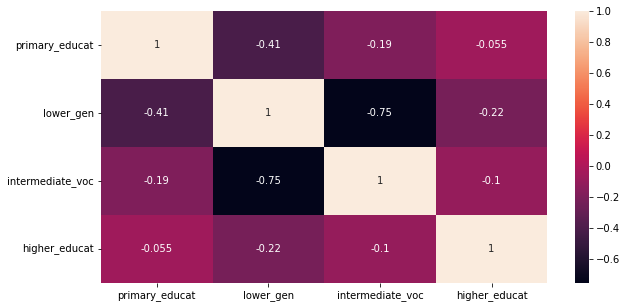

In [170]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAZ004_trimmed[['primary_educat','lower_gen','intermediate_voc','higher_educat']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [171]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAZ004_trimmed.intermediate_voc)) # keep
print(target.corr(LASAZ004_trimmed.lower_gen))

0.25888850713683464
-0.16234233405508147


In [172]:
LASAZ004_trimmed.drop(columns = 'lower_gen', inplace = True)

In [173]:
# Save files to output folder
LASAZ004_trimmed.to_csv(path + 'output/LASAZ004_trimmed.csv', index=False)

## LASAZ008
#### Age stuff
# Don't Include

In [ ]:
# Read in LASA 004 files
LASAZ008 = pd.read_spss(path + "lasafiles/LASAZ008.SAV")
# Select appropriate individuals
LASAZ008_trimmed = LASAZ008[LASAZ008.respnr.isin(B_individuals)]
LASAZ008_trimmed = LASAZ008_trimmed.reset_index(drop = True)

In [ ]:
LASAZ008_trimmed

In [ ]:
LASAZ008_trimmed

## LASA Z010
#### Marital and Partner data

In [174]:
# Read in LASA 010 files
LASAZ010 = pd.read_spss(path + "lasafiles/LASAZ010.SAV")
# Select appropriate individuals
LASAZ010_trimmed = LASAZ010[LASAZ010.respnr.isin(B_individuals)]
LASAZ010_trimmed = LASAZ010_trimmed.reset_index(drop = True)

In [175]:
# Only keep A,B and C, D waves
LASAZ010_trimmed = LASAZ010_trimmed.drop(LASAZ010_trimmed.filter(regex='^e').columns, axis=1)
LASAZ010_trimmed = LASAZ010_trimmed.drop(LASAZ010_trimmed.filter(regex='^f').columns, axis=1)
LASAZ010_trimmed = LASAZ010_trimmed.drop(LASAZ010_trimmed.filter(regex='^g').columns, axis=1)
LASAZ010_trimmed = LASAZ010_trimmed.drop(LASAZ010_trimmed.filter(regex='^h').columns, axis=1)
LASAZ010_trimmed = LASAZ010_trimmed.drop(LASAZ010_trimmed.filter(regex='^i').columns, axis=1)
LASAZ010_trimmed = LASAZ010_trimmed.drop(LASAZ010_trimmed.filter(regex='^j').columns, axis=1)

In [176]:
LASAZB010_trimmed = LASAZ010_trimmed[['respnr','sample','bmarst','bpartst','bsepar','bpartner']]
LASAZC010_trimmed = LASAZ010_trimmed[['respnr','sample','cmarst','cpartst','csepar','cpartner']]
LASAZD010_trimmed = LASAZ010_trimmed[['respnr','sample','dmarst','dpartst','dsepar','dpartner']]

In [177]:
# One hot enocde bmarst
LASAZB010_trimmed['bmarst_married'] = (LASAZB010_trimmed.bmarst == 'married').astype(int)
LASAZB010_trimmed['bmarst_widowhood'] = (LASAZB010_trimmed.bmarst == 'widowhood').astype(int)
LASAZB010_trimmed['bmarst_never_married'] = (LASAZB010_trimmed.bmarst == 'never married').astype(int)
LASAZB010_trimmed['bmarst_divorced'] = (LASAZB010_trimmed.bmarst == 'divorced').astype(int)

LASAZC010_trimmed['cmarst_married'] = (LASAZC010_trimmed.cmarst == 'married').astype(int)
LASAZC010_trimmed['cmarst_widowhood'] = (LASAZC010_trimmed.cmarst == 'widowhood').astype(int)
LASAZC010_trimmed['cmarst_never_married'] = (LASAZC010_trimmed.cmarst == 'never married').astype(int)
LASAZC010_trimmed['cmarst_divorced'] = (LASAZC010_trimmed.cmarst == 'divorced').astype(int)

LASAZD010_trimmed['dmarst_married'] = (LASAZD010_trimmed.dmarst == 'married').astype(int)
LASAZD010_trimmed['dmarst_widowhood'] = (LASAZD010_trimmed.dmarst == 'widowhood').astype(int)
LASAZD010_trimmed['dmarst_never_married'] = (LASAZD010_trimmed.dmarst == 'never married').astype(int)
LASAZD010_trimmed['dmarst_divorced'] = (LASAZD010_trimmed.dmarst == 'divorced').astype(int)

/tmp/ipykernel_3426601/3882871542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZB010_trimmed['bmarst_married'] = (LASAZB010_trimmed.bmarst == 'married').astype(int)
/tmp/ipykernel_3426601/3882871542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZB010_trimmed['bmarst_widowhood'] = (LASAZB010_trimmed.bmarst == 'widowhood').astype(int)
/tmp/ipykernel_3426601/3882871542.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

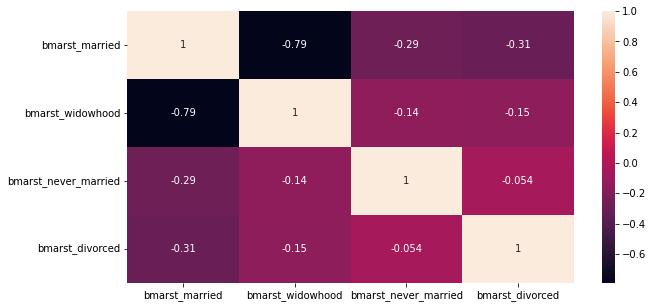

In [178]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAZB010_trimmed[['bmarst_married','bmarst_widowhood','bmarst_never_married','bmarst_divorced']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [179]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAZB010_trimmed.bmarst_married))
print(target.corr(LASAZB010_trimmed.bmarst_widowhood)) # keep

0.1818877490568942
-0.20572333576210497


In [180]:
LASAZB010_trimmed.drop(columns = ['bmarst_married','bmarst'], inplace = True)
LASAZC010_trimmed.drop(columns = ['cmarst_married','cmarst'], inplace = True)
LASAZD010_trimmed.drop(columns = ['dmarst_married','dmarst'], inplace = True)

/tmp/ipykernel_3426601/3989012203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZB010_trimmed.drop(columns = ['bmarst_married','bmarst'], inplace = True)
/tmp/ipykernel_3426601/3989012203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZC010_trimmed.drop(columns = ['cmarst_married','cmarst'], inplace = True)
/tmp/ipykernel_3426601/3989012203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZD010_trimmed.drop(co

In [181]:
# One hot enocde bpartst
LASAZB010_trimmed['bpartst_spouse_opp_sex_ih'] = (LASAZB010_trimmed.bpartst == 'lives with spouse (married or registered partnership) (opposite sex)').astype(int)
LASAZB010_trimmed['bpartst_no_partner'] = (LASAZB010_trimmed.bpartst == 'no partner').astype(int)
LASAZB010_trimmed['bpartst_partner_opp_sex_oh'] = (LASAZB010_trimmed.bpartst == 'partner opposite sex outside household (not married)').astype(int)
LASAZB010_trimmed['bpartst_partner_opp_sex_ih'] = (LASAZB010_trimmed.bpartst == 'lives with opposite sex (not married)').astype(int)
LASAZB010_trimmed['bpartst_spouse_oh'] = (LASAZB010_trimmed.bpartst == 'spouse outside household (married or registered partnership; relationship sometimes broken; see SEPAR)').astype(int)
LASAZB010_trimmed['bpartst_same_sex'] = (LASAZB010_trimmed.bpartst == 'lives with same sex (not married)').astype(int)

LASAZC010_trimmed['cpartst_spouse_opp_sex_ih'] = (LASAZC010_trimmed.cpartst == 'lives with spouse (married or registered partnership) (opposite sex)').astype(int)
LASAZC010_trimmed['cpartst_no_partner'] = (LASAZC010_trimmed.cpartst == 'no partner').astype(int)
LASAZC010_trimmed['cpartst_partner_opp_sex_oh'] = (LASAZC010_trimmed.cpartst == 'partner opposite sex outside household (not married)').astype(int)
LASAZC010_trimmed['cpartst_partner_opp_sex_ih'] = (LASAZC010_trimmed.cpartst == 'lives with opposite sex (not married)').astype(int)
LASAZC010_trimmed['cpartst_spouse_oh'] = (LASAZC010_trimmed.cpartst == 'spouse outside household (married or registered partnership; relationship sometimes broken; see SEPAR)').astype(int)
LASAZC010_trimmed['cpartst_same_sex'] = (LASAZC010_trimmed.cpartst == 'lives with same sex (not married)').astype(int)

LASAZD010_trimmed['dpartst_spouse_opp_sex_ih'] = (LASAZD010_trimmed.dpartst == 'lives with spouse (married or registered partnership) (opposite sex)').astype(int)
LASAZD010_trimmed['dpartst_no_partner'] = (LASAZD010_trimmed.dpartst == 'no partner').astype(int)
LASAZD010_trimmed['dpartst_partner_opp_sex_oh'] = (LASAZD010_trimmed.dpartst == 'partner opposite sex outside household (not married)').astype(int)
LASAZD010_trimmed['dpartst_partner_opp_sex_ih'] = (LASAZD010_trimmed.dpartst == 'lives with opposite sex (not married)').astype(int)
LASAZD010_trimmed['dpartst_spouse_oh'] = (LASAZD010_trimmed.dpartst == 'spouse outside household (married or registered partnership; relationship sometimes broken; see SEPAR)').astype(int)
LASAZD010_trimmed['dpartst_same_sex'] = (LASAZD010_trimmed.dpartst == 'lives with same sex (not married)').astype(int)

/tmp/ipykernel_3426601/2683843908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZB010_trimmed['bpartst_spouse_opp_sex_ih'] = (LASAZB010_trimmed.bpartst == 'lives with spouse (married or registered partnership) (opposite sex)').astype(int)
/tmp/ipykernel_3426601/2683843908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZB010_trimmed['bpartst_no_partner'] = (LASAZB010_trimmed.bpartst == 'no partner').astype(int)
/tmp/ipykernel_3426601/2683843908.py:4: SettingWithCopyWarning: 
A value is try

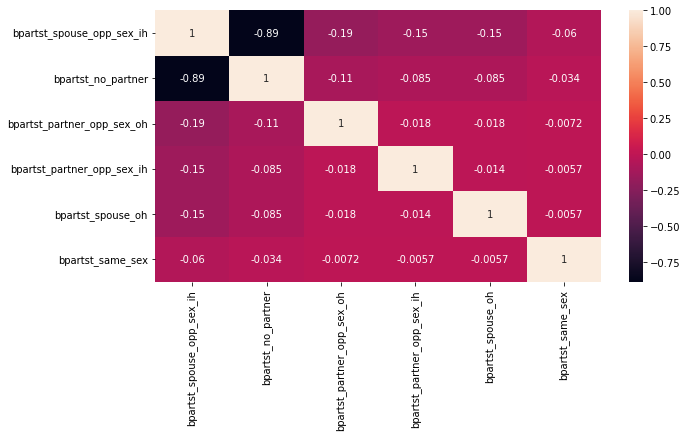

In [182]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAZB010_trimmed[['bpartst_spouse_opp_sex_ih','bpartst_no_partner','bpartst_partner_opp_sex_oh','bpartst_partner_opp_sex_ih','bpartst_spouse_oh','bpartst_same_sex']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [183]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAZB010_trimmed.bpartst_spouse_opp_sex_ih))
print(target.corr(LASAZB010_trimmed.bpartst_no_partner)) # keep

0.19712439888943623
-0.2125643555858868


In [184]:
LASAZB010_trimmed.drop(columns = ['bpartst_spouse_opp_sex_ih','bpartst'], inplace = True)
LASAZC010_trimmed.drop(columns = ['cpartst_spouse_opp_sex_ih','cpartst'], inplace = True)
LASAZD010_trimmed.drop(columns = ['dpartst_spouse_opp_sex_ih','dpartst'], inplace = True)

/tmp/ipykernel_3426601/1852453074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZB010_trimmed.drop(columns = ['bpartst_spouse_opp_sex_ih','bpartst'], inplace = True)
/tmp/ipykernel_3426601/1852453074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZC010_trimmed.drop(columns = ['cpartst_spouse_opp_sex_ih','cpartst'], inplace = True)
/tmp/ipykernel_3426601/1852453074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L

In [185]:
# One hot encode bpartner
LASAZB010_trimmed['bpartner_partner_ih'] = (LASAZB010_trimmed.bpartner == 'partner (co-residence)').astype(int)
LASAZB010_trimmed['bpartner_no_partner'] = (LASAZB010_trimmed.bpartner == 'no partner').astype(int)
LASAZB010_trimmed['bpartner_partner_oh'] = (LASAZB010_trimmed.bpartner == 'partner (outside household)').astype(int)

LASAZC010_trimmed['cpartner_partner_ih'] = (LASAZC010_trimmed.cpartner == 'partner (co-residence)').astype(int)
LASAZC010_trimmed['cpartner_no_partner'] = (LASAZC010_trimmed.cpartner == 'no partner').astype(int)
LASAZC010_trimmed['cpartner_partner_oh'] = (LASAZC010_trimmed.cpartner == 'partner (outside household)').astype(int)

LASAZD010_trimmed['dpartner_partner_ih'] = (LASAZD010_trimmed.dpartner == 'partner (co-residence)').astype(int)
LASAZD010_trimmed['dpartner_no_partner'] = (LASAZD010_trimmed.dpartner == 'no partner').astype(int)
LASAZD010_trimmed['dpartner_partner_oh'] = (LASAZD010_trimmed.dpartner == 'partner (outside household)').astype(int)

/tmp/ipykernel_3426601/1476673009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZB010_trimmed['bpartner_partner_ih'] = (LASAZB010_trimmed.bpartner == 'partner (co-residence)').astype(int)
/tmp/ipykernel_3426601/1476673009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZB010_trimmed['bpartner_no_partner'] = (LASAZB010_trimmed.bpartner == 'no partner').astype(int)
/tmp/ipykernel_3426601/1476673009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

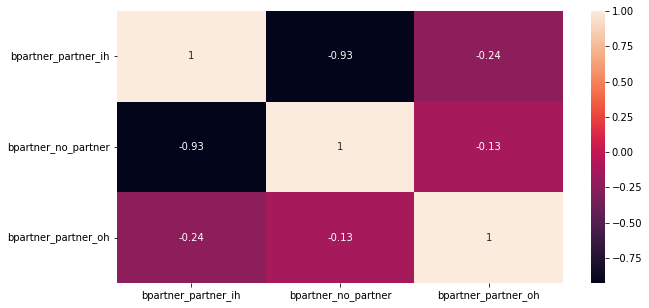

In [186]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAZB010_trimmed[['bpartner_partner_ih','bpartner_no_partner','bpartner_partner_oh']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [187]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAZB010_trimmed.bpartner_partner_ih))
print(target.corr(LASAZB010_trimmed.bpartner_no_partner)) # keep

0.20058533463307482
-0.21385511124025983


In [188]:
LASAZB010_trimmed.drop(columns = ['bpartner_partner_ih','bpartner'], inplace = True)
LASAZC010_trimmed.drop(columns = ['cpartner_partner_ih','cpartner'], inplace = True)
LASAZD010_trimmed.drop(columns = ['dpartner_partner_ih','dpartner'], inplace = True)

/tmp/ipykernel_3426601/1037950065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZB010_trimmed.drop(columns = ['bpartner_partner_ih','bpartner'], inplace = True)
/tmp/ipykernel_3426601/1037950065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZC010_trimmed.drop(columns = ['cpartner_partner_ih','cpartner'], inplace = True)
/tmp/ipykernel_3426601/1037950065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LASAZD010_t

In [189]:
# Save files to output folder
#LASAZ010_trimmed.to_csv(path + 'output/LASAZ010_trimmed.csv', index=False)
LASAZB010_trimmed.to_csv(path + 'output/LASAZB010_trimmed.csv', index=False)
LASAZC010_trimmed.to_csv(path + 'output/LASAZC010_trimmed.csv', index=False)
LASAZD010_trimmed.to_csv(path + 'output/LASAZD010_trimmed.csv', index=False)

## LASA Z052
#### Domestic address

In [ ]:
# Read in LASA 052 files
LASAZ052 = pd.read_spss(path + "lasafiles/LASAZ052.SAV")
# Select appropriate individuals
LASAZ052_trimmed = LASAZ052[LASAZ052.respnr.isin(B_individuals)]
LASAZ052_trimmed = LASAZ052_trimmed.reset_index(drop = True)

In [ ]:
LASAZ052_trimmed.drop(columns = 'sample', inplace = True)

In [ ]:
print(LASAZ052_trimmed.b052record.value_counts())

In [ ]:
# Split dataset and then merge back into one dataset
LASAZ052_trimmed_after_1st_move = LASAZ052_trimmed[LASAZ052_trimmed['b052record'] == 'after 1st move']
LASAZ052_trimmed_after_1st_move = LASAZ052_trimmed_after_1st_move.drop(columns = 'b052record')
LASAZ052_trimmed_after_1st_move.rename(columns={'bMunicipality':'bMunicipality_after_1st_move'}, inplace = True)
LASAZ052_trimmed_at_birth = LASAZ052_trimmed[LASAZ052_trimmed['b052record'] == 'at birth']
LASAZ052_trimmed_at_birth = LASAZ052_trimmed_at_birth.drop(columns = 'b052record')
LASAZ052_trimmed_at_birth.rename(columns={'bMunicipality':'bMunicipality_at_birth'}, inplace = True)
LASAZ052_trimmed_in_1944 = LASAZ052_trimmed[LASAZ052_trimmed['b052record'] == 'in 1944']
LASAZ052_trimmed_in_1944 = LASAZ052_trimmed_in_1944.drop(columns = 'b052record')
LASAZ052_trimmed_in_1944.rename(columns={'bMunicipality':'bMunicipality_in_1944'}, inplace = True)
LASAZ052_trimmed_current_res = LASAZ052_trimmed[LASAZ052_trimmed['b052record'] == 'of current residence']
LASAZ052_trimmed_current_res = LASAZ052_trimmed_current_res.drop(columns = 'b052record')
LASAZ052_trimmed_current_res.rename(columns={'bMunicipality':'bMunicipality_curret_res'}, inplace = True)


# Merge files back into one
#LASAZ052_trimmed = 
#pd.concat([LASAZ052_trimmed_after_1st_move, LASAZ052_trimmed_at_birth])
LASAZ052_trimmed = LASAZ052_trimmed_after_1st_move.merge(LASAZ052_trimmed_at_birth,on='respnr').merge(LASAZ052_trimmed_in_1944,on='respnr').merge(LASAZ052_trimmed_current_res,on='respnr')

In [ ]:
LASAZ052_trimmed

In [ ]:
LASAZ052_trimmed.to_csv(path + 'output/LASAZ052_trimmed.csv', index=False)

## LASA Z095
#### Urbanization

In [ ]:
# Read in LASA 095 files
LASAZ095 = pd.read_spss(path + "lasafiles/LASAZ095.SAV")
# Select appropriate individuals
LASAZ095_trimmed = LASAZ095[LASAZ095.respnr.isin(B_individuals)]
LASAZ095_trimmed = LASAZ095_trimmed.reset_index(drop = True)

In [ ]:
# Only keep A,B and C waves
LASAZ095_trimmed = LASAZ095_trimmed.drop(LASAZ095_trimmed.filter(regex='^E').columns, axis=1)
LASAZ095_trimmed = LASAZ095_trimmed.drop(LASAZ095_trimmed.filter(regex='^F').columns, axis=1)
LASAZ095_trimmed = LASAZ095_trimmed.drop(LASAZ095_trimmed.filter(regex='^G').columns, axis=1)
LASAZ095_trimmed = LASAZ095_trimmed.drop(LASAZ095_trimmed.filter(regex='^H').columns, axis=1)
LASAZ095_trimmed = LASAZ095_trimmed.drop(LASAZ095_trimmed.filter(regex='^I').columns, axis=1)
LASAZ095_trimmed = LASAZ095_trimmed.drop(LASAZ095_trimmed.filter(regex='^J').columns, axis=1)

In [ ]:
LASAZB095_trimmed = LASAZ095_trimmed[['respnr','Burb','Burbyear']]
LASAZC095_trimmed = LASAZ095_trimmed[['respnr','Curb','Curbyear']]
LASAZD095_trimmed = LASAZ095_trimmed[['respnr','Durb','Durbyear']]

In [ ]:
# Convert to numeric
LASAZB095_trimmed.replace('not (<500)', '1.0', inplace = True)
LASAZB095_trimmed.replace('little (500-1000)', '2.0', inplace = True)
LASAZB095_trimmed.replace('somewhat (1000-1500)', '3.0', inplace = True)
LASAZB095_trimmed.replace('highly (1500-2500)', '4.0', inplace = True)
LASAZB095_trimmed.replace('very highly (>=2500)', '5.0', inplace = True)

# Convert to numeric
LASAZC095_trimmed.replace('not (<500)', '1.0', inplace = True)
LASAZC095_trimmed.replace('little (500-1000)', '2.0', inplace = True)
LASAZC095_trimmed.replace('somewhat (1000-1500)', '3.0', inplace = True)
LASAZC095_trimmed.replace('highly (1500-2500)', '4.0', inplace = True)
LASAZC095_trimmed.replace('very highly (>=2500)', '5.0', inplace = True)

# Convert to numeric
LASAZD095_trimmed.replace('not (<500)', '1.0', inplace = True)
LASAZD095_trimmed.replace('little (500-1000)', '2.0', inplace = True)
LASAZD095_trimmed.replace('somewhat (1000-1500)', '3.0', inplace = True)
LASAZD095_trimmed.replace('highly (1500-2500)', '4.0', inplace = True)
LASAZD095_trimmed.replace('very highly (>=2500)', '5.0', inplace = True)


In [ ]:
for i in LASAZB095_trimmed.columns:
    LASAZB095_trimmed[i] = pd.to_numeric(LASAZB095_trimmed[i], errors = 'coerce')
for i in LASAZC095_trimmed.columns:
    LASAZC095_trimmed[i] = pd.to_numeric(LASAZC095_trimmed[i], errors = 'coerce')
for i in LASAZD095_trimmed.columns:
    LASAZD095_trimmed[i] = pd.to_numeric(LASAZD095_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAZ095_trimmed.to_csv(path + 'output/LASAZ095_trimmed.csv', index=False)
LASAZB095_trimmed.to_csv(path + 'output/LASAZB095_trimmed.csv', index=False)
LASAZC095_trimmed.to_csv(path + 'output/LASAZC095_trimmed.csv', index=False)
LASAZD095_trimmed.to_csv(path + 'output/LASAZD095_trimmed.csv', index=False)

## LASAZDC1
#### Diabetes algorithm

In [ ]:
# Read in LASA DC1 files
LASAZDC1 = pd.read_spss(path + "lasafiles/LASAZDC1.SAV")
# Select appropriate individuals
LASAZDC1_trimmed = LASAZDC1[LASAZDC1.respnr.isin(B_individuals)]
LASAZDC1_trimmed = LASAZDC1_trimmed.reset_index(drop = True)

In [ ]:
# Only keep A,B and C, D waves
LASAZDC1_trimmed = LASAZDC1_trimmed.drop(LASAZDC1_trimmed.filter(regex='^e').columns, axis=1)
LASAZDC1_trimmed = LASAZDC1_trimmed.drop(LASAZDC1_trimmed.filter(regex='^f').columns, axis=1)
LASAZDC1_trimmed = LASAZDC1_trimmed.drop(LASAZDC1_trimmed.filter(regex='^g').columns, axis=1)
LASAZDC1_trimmed = LASAZDC1_trimmed.drop(LASAZDC1_trimmed.filter(regex='^h').columns, axis=1)
LASAZDC1_trimmed = LASAZDC1_trimmed.drop(LASAZDC1_trimmed.filter(regex='^i').columns, axis=1)
LASAZDC1_trimmed = LASAZDC1_trimmed.drop(LASAZDC1_trimmed.filter(regex='^j').columns, axis=1)

In [ ]:
# Drop c_alg and d_alg not present for b
LASAZDC1_trimmed.drop(columns = ['c_alg_DM_ruw','d_alg_DM_ruw'], inplace = True)

In [ ]:
# Code as numeric:
LASAZDC1_trimmed.replace('no DM', '0.0', inplace = True)
LASAZDC1_trimmed.replace('definite DM', '2.0', inplace = True)
LASAZDC1_trimmed.replace('possible DM', '1.0', inplace = True)

In [ ]:
for i in LASAZDC1_trimmed.columns:
    LASAZDC1_trimmed[i] = pd.to_numeric(LASAZDC1_trimmed[i], errors = 'coerce')

In [ ]:
LASAZDC1_trimmed

In [ ]:
# Save files to output folder
LASAZDC1_trimmed.to_csv(path + 'output/LASAZDC1_trimmed.csv', index=False)

## LASA ZH01
#### Cardiovascular disease
# Don't Include
#### Using chronic disease features instead

In [ ]:
# Read in LASA H01 files
LASAZH01 = pd.read_spss(path + "lasafiles/LASAZH01.SAV")
# Select appropriate individuals
LASAZH01_trimmed = LASAZH01[LASAZH01.respnr.isin(B_individuals)]
LASAZH01_trimmed = LASAZH01_trimmed.reset_index(drop = True)

In [ ]:
# Only keep A,B and C, D waves
LASAZH01_trimmed = LASAZH01_trimmed.drop(LASAZH01_trimmed.filter(regex='^e').columns, axis=1)
LASAZH01_trimmed = LASAZH01_trimmed.drop(LASAZH01_trimmed.filter(regex='^f').columns, axis=1)
LASAZH01_trimmed = LASAZH01_trimmed.drop(LASAZH01_trimmed.filter(regex='^g').columns, axis=1)
LASAZH01_trimmed = LASAZH01_trimmed.drop(LASAZH01_trimmed.filter(regex='^h').columns, axis=1)
LASAZH01_trimmed = LASAZH01_trimmed.drop(LASAZH01_trimmed.filter(regex='^i').columns, axis=1)
LASAZH01_trimmed = LASAZH01_trimmed.drop(LASAZH01_trimmed.filter(regex='^j').columns, axis=1)

In [ ]:
LASAZH01_trimmed

In [ ]:
LASAZH01_trimmed

## LASA O13
#### Fractures

In [ ]:
# Read in LASA O13 files
LASAZO13 = pd.read_spss(path + "lasafiles/LASAZO13.SAV")
# Select appropriate individuals
LASAZO13_trimmed = LASAZO13[LASAZO13.respnr.isin(B_individuals)]
LASAZO13_trimmed = LASAZO13_trimmed.reset_index(drop = True)

In [ ]:
# Only keep A,B and C, D waves
# LASAZO13_trimmed = LASAZO13_trimmed.drop(LASAZO13_trimmed.filter(regex='^e').columns, axis=1)
# LASAZO13_trimmed = LASAZO13_trimmed.drop(LASAZO13_trimmed.filter(regex='^f').columns, axis=1)
#LASAZO13_trimmed = LASAZO13_trimmed.drop(LASAZO13_trimmed.filter(regex='^g').columns, axis=1)
#LASAZO13_trimmed = LASAZO13_trimmed.drop(LASAZO13_trimmed.filter(regex='^h').columns, axis=1)
#LASAZO13_trimmed = LASAZO13_trimmed.drop(LASAZO13_trimmed.filter(regex='^i').columns, axis=1)
#LASAZO13_trimmed = LASAZO13_trimmed.drop(LASAZO13_trimmed.filter(regex='^j').columns, axis=1)

In [ ]:
LASAZO13

In [ ]:
LASAZO13_trimmed

In [ ]:
LASAzoa1_trimmed

## lasazoa1.sav


In [ ]:
# Read in LASA O13 files
LASAzoa1 = pd.read_spss(path + "lasafiles/lasazoa1.sav")
# Select appropriate individuals
LASAzoa1_trimmed = LASAzoa1[LASAzoa1.respnr.isin(B_individuals)]
LASAzoa1_trimmed = LASAzoa1_trimmed.reset_index(drop = True)

In [ ]:
# Only keep A,B and C, D waves
LASAzoa1_trimmed = LASAzoa1_trimmed.drop(LASAzoa1_trimmed.filter(regex='^e').columns, axis=1)
LASAzoa1_trimmed = LASAzoa1_trimmed.drop(LASAzoa1_trimmed.filter(regex='^f').columns, axis=1)
LASAzoa1_trimmed = LASAzoa1_trimmed.drop(LASAzoa1_trimmed.filter(regex='^g').columns, axis=1)
LASAzoa1_trimmed = LASAzoa1_trimmed.drop(LASAzoa1_trimmed.filter(regex='^h').columns, axis=1)
LASAzoa1_trimmed = LASAzoa1_trimmed.drop(LASAzoa1_trimmed.filter(regex='^i').columns, axis=1)
LASAzoa1_trimmed = LASAzoa1_trimmed.drop(LASAzoa1_trimmed.filter(regex='^j').columns, axis=1)

In [ ]:
# Replace all No answers with NA
LASAzoa1_trimmed.replace('missing', 'Na', inplace = True)

In [ ]:
# Convert to numeric:
LASAzoa1_trimmed.replace('no', '0.0', inplace = True)
LASAzoa1_trimmed.replace('possible', '1.0', inplace = True)
LASAzoa1_trimmed.replace('yes', '2.0', inplace = True)

In [ ]:
for i in LASAzoa1_trimmed.columns:
    LASAzoa1_trimmed[i] = pd.to_numeric(LASAzoa1_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAzoa1_trimmed.to_csv(path + 'output/LASAzoa1_trimmed.csv', index=False)

## LASA 851
#### Blood response
#### Not enough data from all waves

## LASA 860
#### Albumin and Cholesterol

In [ ]:
# Read in LASA 860 files
LASAB860 = pd.read_spss(path + "lasafiles/LASAB860.SAV")
LASAC860 = pd.read_spss(path + "lasafiles/LASAC860.SAV")
# Select appropriate individuals
# B
LASAB860_trimmed = LASAB860[LASAB860.respnr.isin(B_individuals)]
LASAB860_trimmed = LASAB860_trimmed.reset_index(drop = True)
# C
LASAC860_trimmed = LASAC860[LASAC860.respnr.isin(C_individuals)]
LASAC860_trimmed = LASAC860_trimmed.reset_index(drop = True)

In [ ]:
# Select features present in all of the waves
a = np.intersect1d(LASAB860_trimmed.columns.str[1:], LASAC860_trimmed.columns.str[1:])
a = np.delete(a, 0)
b_cols = ["b" + col for col in a]
c_cols = ["c" + col for col in a]

b_cols.insert(0, 'respnr')
c_cols.insert(0, 'respnr')


# Subset the dataframes so all have same columns:
LASAB860_trimmed = LASAB860_trimmed[b_cols]
LASAC860_trimmed = LASAC860_trimmed[c_cols]

In [ ]:
for i in LASAB860_trimmed.columns:
    LASAB860_trimmed[i] = pd.to_numeric(LASAB860_trimmed[i], errors = 'coerce')
for i in LASAC860_trimmed.columns:
    LASAC860_trimmed[i] = pd.to_numeric(LASAC860_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB860_trimmed.to_csv(path + 'output/LASAB860_trimmed.csv', index=False)
LASAC860_trimmed.to_csv(path + 'output/LASAC860_trimmed.csv', index=False)

## LASA 861
#### Inflammation factors

In [ ]:
# Read in LASA 861 files
LASAB861 = pd.read_spss(path + "lasafiles/LASAB861.SAV")
LASAC861 = pd.read_spss(path + "lasafiles/LASAC861.SAV")
# Select appropriate individuals
# B
LASAB861_trimmed = LASAB861[LASAB861.respnr.isin(B_individuals)]
LASAB861_trimmed = LASAB861_trimmed.reset_index(drop = True)
# C
LASAC861_trimmed = LASAC861[LASAC861.respnr.isin(C_individuals)]
LASAC861_trimmed = LASAC861_trimmed.reset_index(drop = True)

In [ ]:
LASAB861_trimmed.drop(columns='volgnr', inplace = True)

In [ ]:
for i in LASAB861_trimmed.columns:
    LASAB861_trimmed[i] = pd.to_numeric(LASAB861_trimmed[i], errors = 'coerce')
for i in LASAC861_trimmed.columns:
    LASAC861_trimmed[i] = pd.to_numeric(LASAC861_trimmed[i], errors = 'coerce')

In [ ]:
# Save files to output folder
LASAB861_trimmed.to_csv(path + 'output/LASAB861_trimmed.csv', index=False)
LASAC861_trimmed.to_csv(path + 'output/LASAC861_trimmed.csv', index=False)

## LASA 870
#### Apoe4

In [190]:
# Read in LASA 861 files
LASAB870 = pd.read_spss(path + "lasafiles/LASAB870.SAV")
# Select appropriate individuals
# B
LASAB870_trimmed = LASAB870[LASAB870.respnr.isin(B_individuals)]
LASAB870_trimmed = LASAB870_trimmed.reset_index(drop = True)

In [191]:
LASAB870_trimmed.bmapo.value_counts()

e3/3    758
e3/4    266
e2/3    143
e4/4     38
e2/4     33
e2/2      7
Name: bmapo, dtype: int64

In [192]:
# One hot encode isoforms using bmapo and remove bmapoe1 and bmapoe2, bmapo and bmbluse 
LASAB870_trimmed['bmapo_e22'] = (LASAB870_trimmed.bmapo == 'e2/2').astype(int)
LASAB870_trimmed['bmapo_e23'] = (LASAB870_trimmed.bmapo == 'e2/3').astype(int)
LASAB870_trimmed['bmapo_e24'] = (LASAB870_trimmed.bmapo == 'e2/4').astype(int)
LASAB870_trimmed['bmapo_e33'] = (LASAB870_trimmed.bmapo == 'e3/3').astype(int)
LASAB870_trimmed['bmapo_e34'] = (LASAB870_trimmed.bmapo == 'e3/4').astype(int)
LASAB870_trimmed['bmapo_e44'] = (LASAB870_trimmed.bmapo == 'e4/4').astype(int)


LASAB870_trimmed.drop(columns=['bmapo', 'bmapoe1','bmapoe2','bmbluse'], inplace=True)

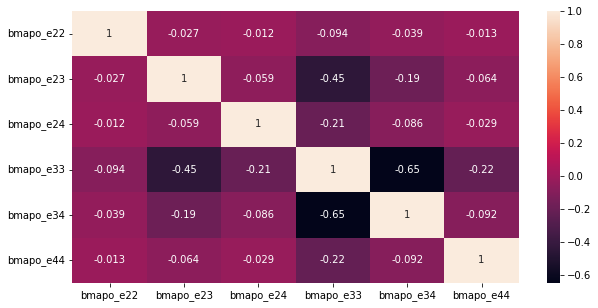

In [193]:
# Find the one-hot encoded features that are most correlated and remove the one with fewer instances
matrix = LASAB870_trimmed[['bmapo_e22','bmapo_e23','bmapo_e24','bmapo_e33','bmapo_e34','bmapo_e44']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True,linewidths=0)
plt.show()

In [194]:
# Decide which feature to keep (most correlated with the target out of the two)
print(target.corr(LASAB870_trimmed.bmapo_e34))
print(target.corr(LASAB870_trimmed.bmapo_e33))

0.015074061116309302
0.04113255386727487


In [195]:
# Drop bhowner_tenant
LASAB870_trimmed.drop(columns = 'bmapo_e34', inplace = True)

In [196]:
# Convert bme4 to numeric
LASAB870_trimmed.replace('no e4 allele', '0.0', inplace = True)
LASAB870_trimmed.replace('any e4 allele', '1.0', inplace = True)



In [197]:
LASAB870_trimmed.bme4.value_counts()

0.0    908
1.0    337
Name: bme4, dtype: int64

In [198]:
for i in LASAB870_trimmed.columns:
    LASAB870_trimmed[i] = pd.to_numeric(LASAB870_trimmed[i], errors = 'coerce')

In [199]:
# Save files to output folder
LASAB870_trimmed.to_csv(path + 'output/LASAB870_trimmed.csv', index=False)

In [ ]:
!pwd

In [ ]:
!ls ../lasafiles/LASAC8*

In [ ]:
!ls  ../lasafiles/LASAz*

In [ ]:
!ls ../lasafiles/LASA?010*